Import necessary libraries.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

# Loading the datasets

In [3]:
plant_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'])
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'])

In [13]:
sum(plant_gen['DATE_TIME'] == plant_gen['DATE_TIME1'])

68778

In [17]:
plant_gen['DATE_TIME1'].min(), plant_gen['DATE_TIME1'].max()

(Timestamp('2020-01-06 00:00:00'), Timestamp('2020-12-06 23:45:00'))

In [ ]:
pd.to_datetime(data['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [3]:
plant_gen.columns, plant_weat.columns

(Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
        'DAILY_YIELD', 'TOTAL_YIELD'],
       dtype='object'),
 Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
        'MODULE_TEMPERATURE', 'IRRADIATION'],
       dtype='object'))

In [4]:
plant_gen.SOURCE_KEY.unique(), plant_gen.PLANT_ID.unique(), plant_weat.SOURCE_KEY.unique(), plant_weat.PLANT_ID.unique()

(array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
        '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
        'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
        'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
        'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
        'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
        'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
        'YxYtjZvoooNbGkE'], dtype=object),
 array([4135001]),
 array(['HmiyD2TTLFNqkNe'], dtype=object),
 array([4135001]))

In [3]:
plt.style.use('seaborn')

In [4]:
def datetime_vs(df, col1, col2=None):
    for _, gp in df.groupby(df['DATE_TIME'].dt.dayofyear):
        plt.figure(figsize=(15, 10))
        plt.plot_date(gp['DATE_TIME'], gp[col1], label=col1)
        if col2:
            scale = gp[col1].max() / gp[col2].max()
            plt.plot_date(gp['DATE_TIME'], gp[col2] * scale, label=col2)
        plt.legend(loc="upper left")
        plt.show()

# Graphs 
* AMBIENT_TEMPERATURE vs MODULE_TEMPERATURE
* AMBIENT_TEMPERATURE vs IRRADIATION
* MODULE_TEMPERATURE vs IRRADIATION

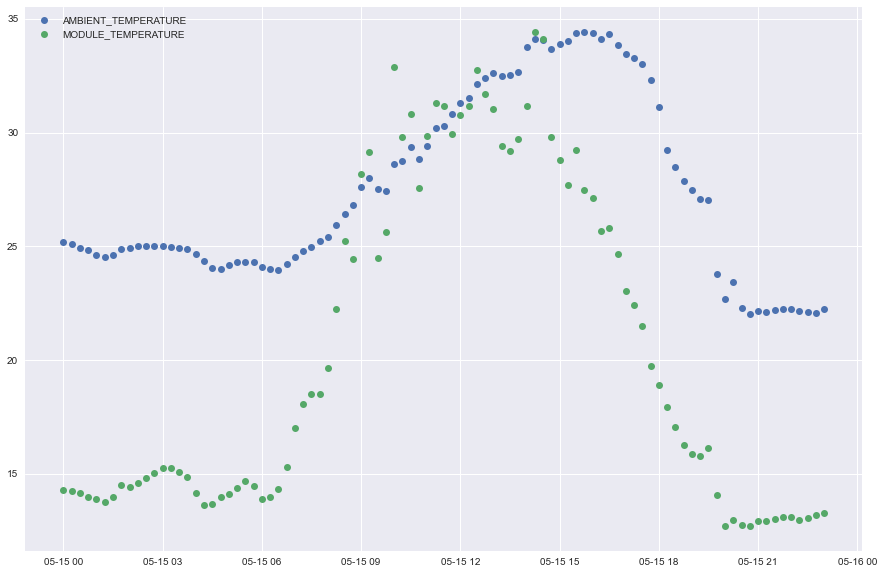

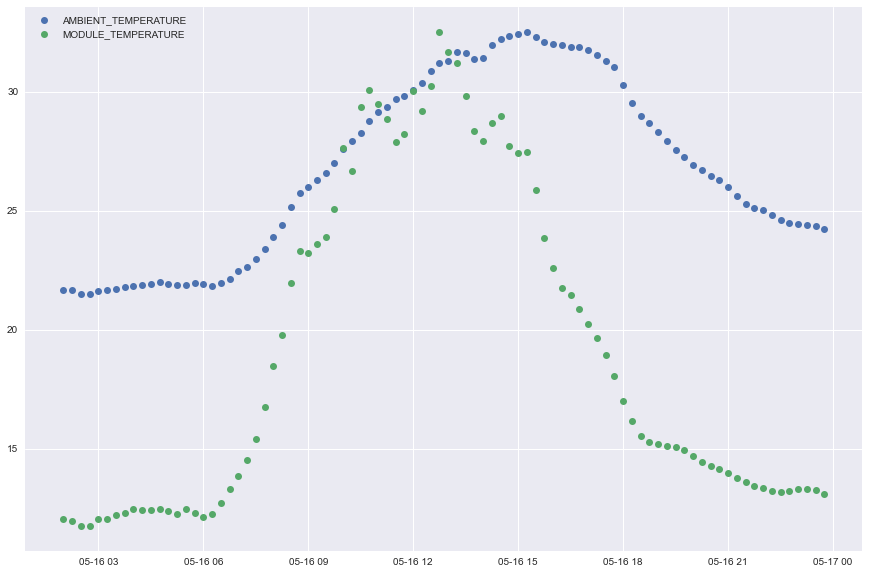

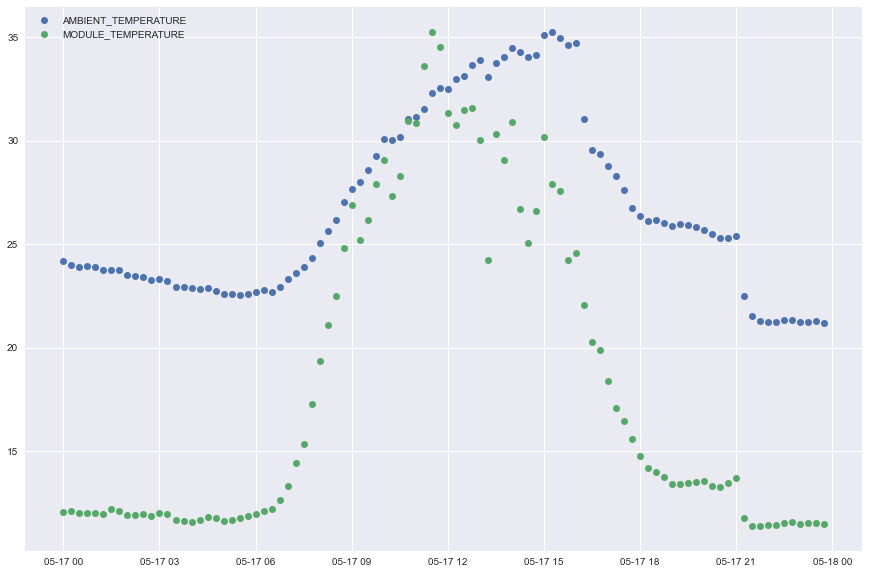

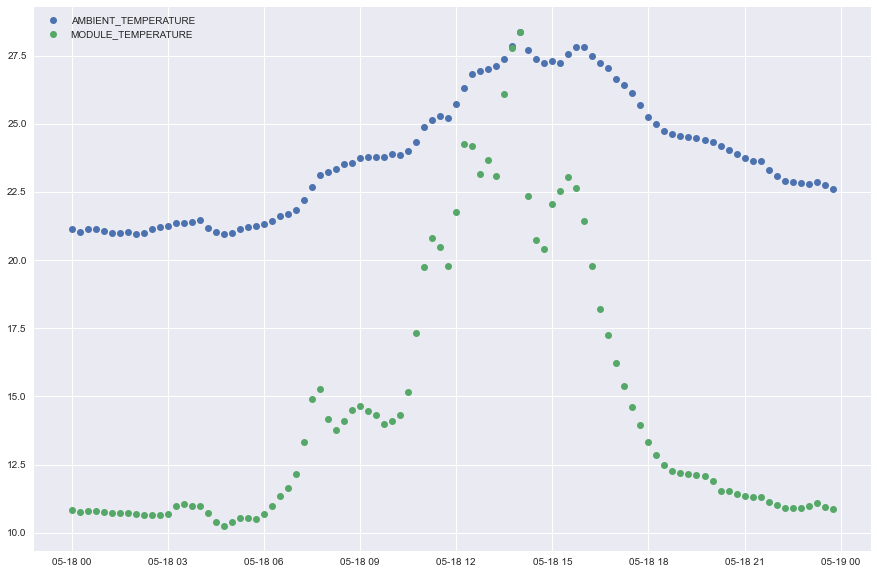

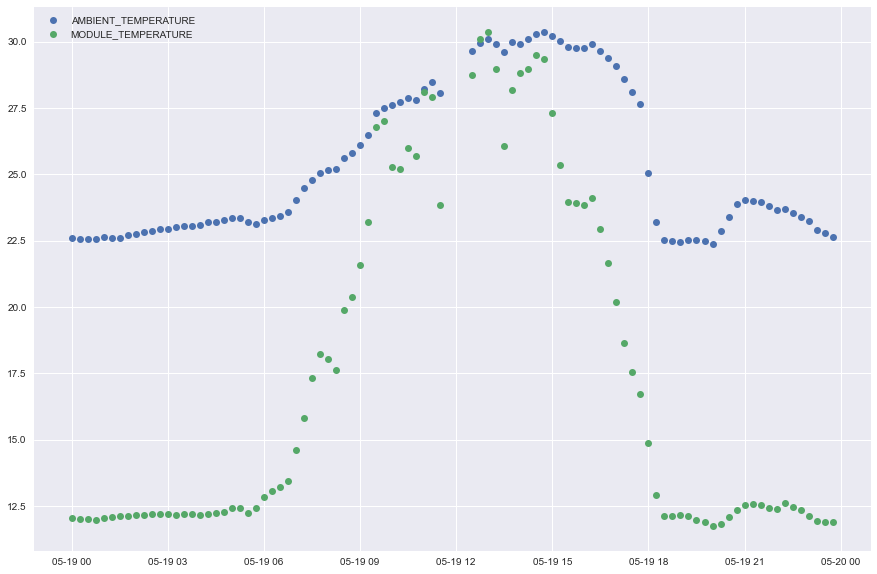

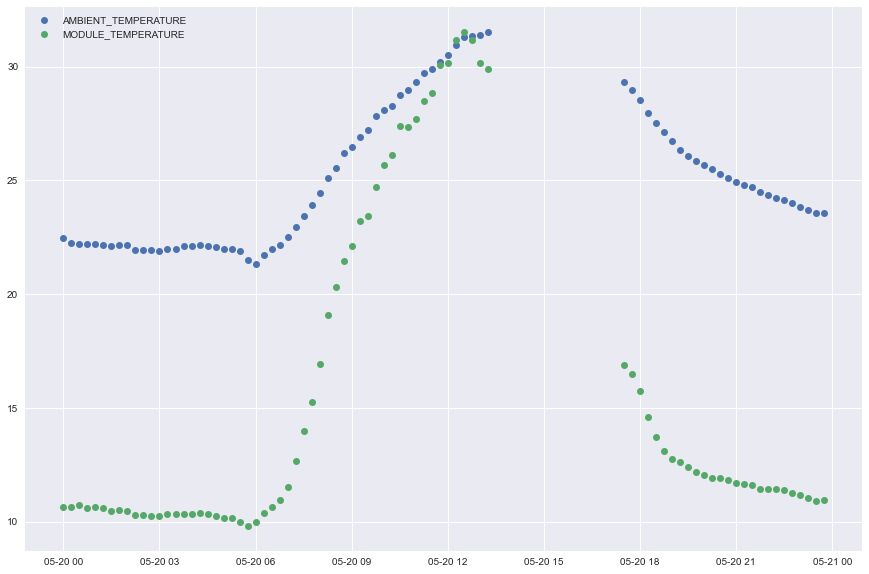

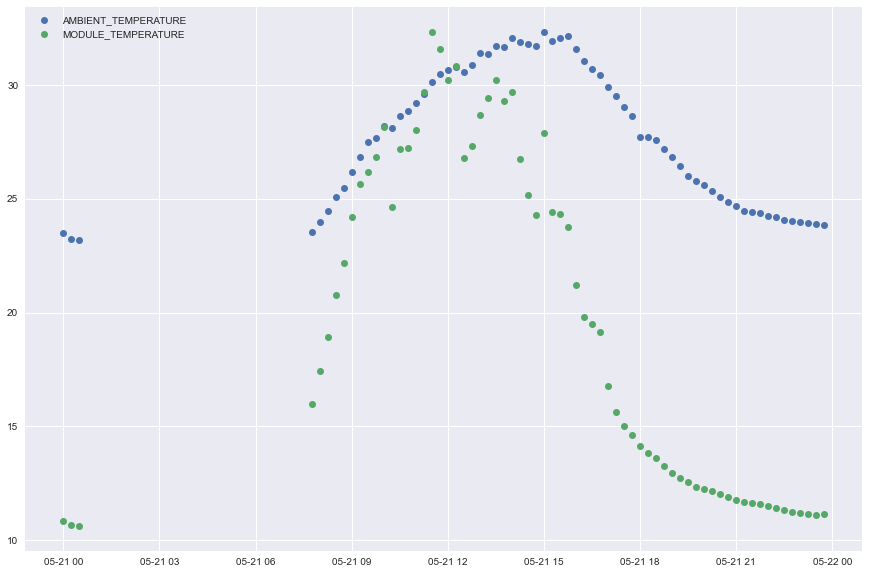

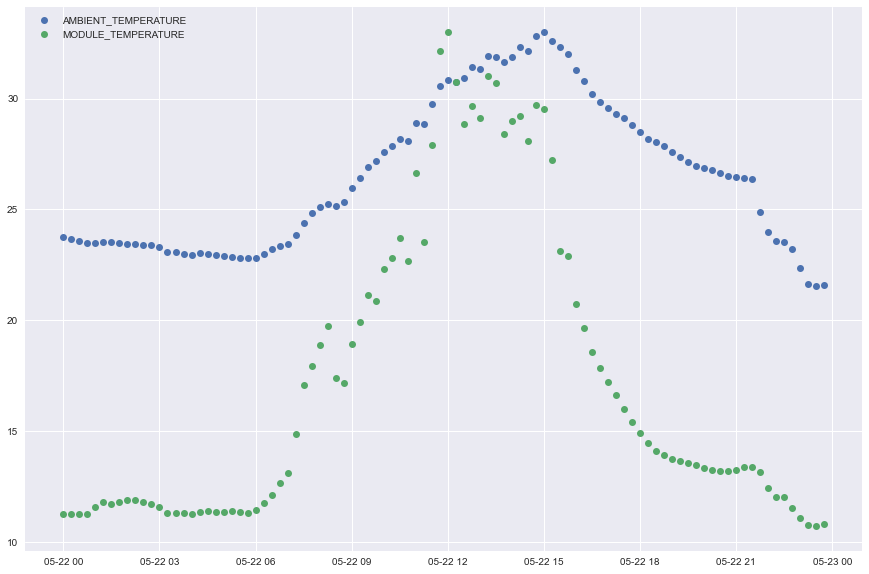

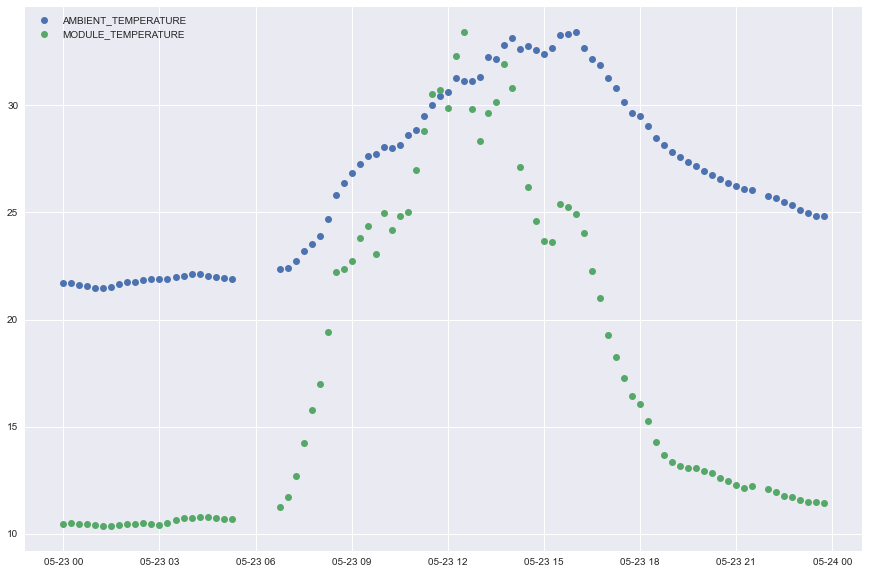

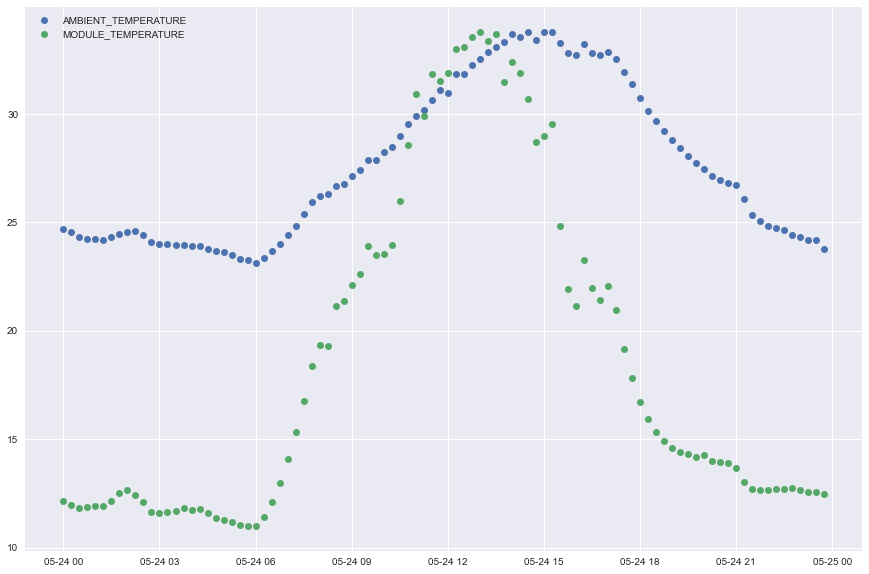

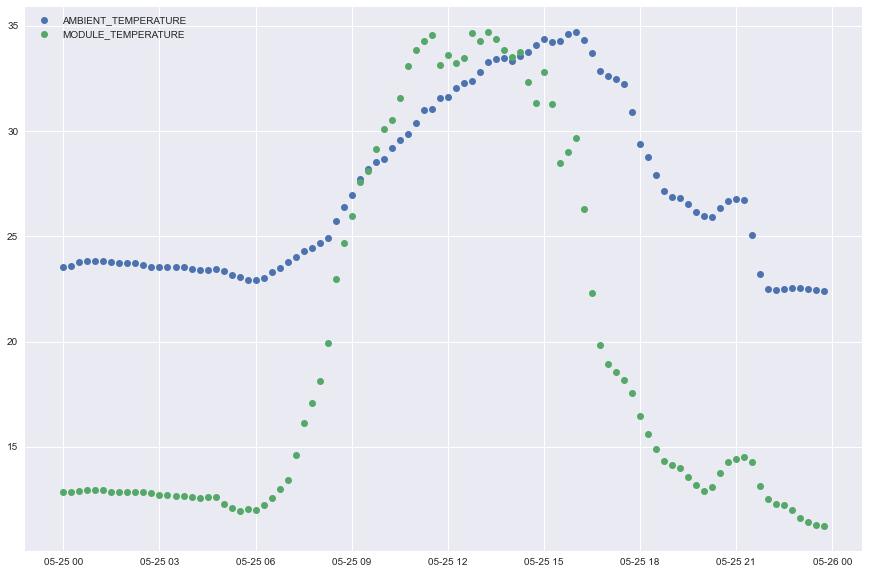

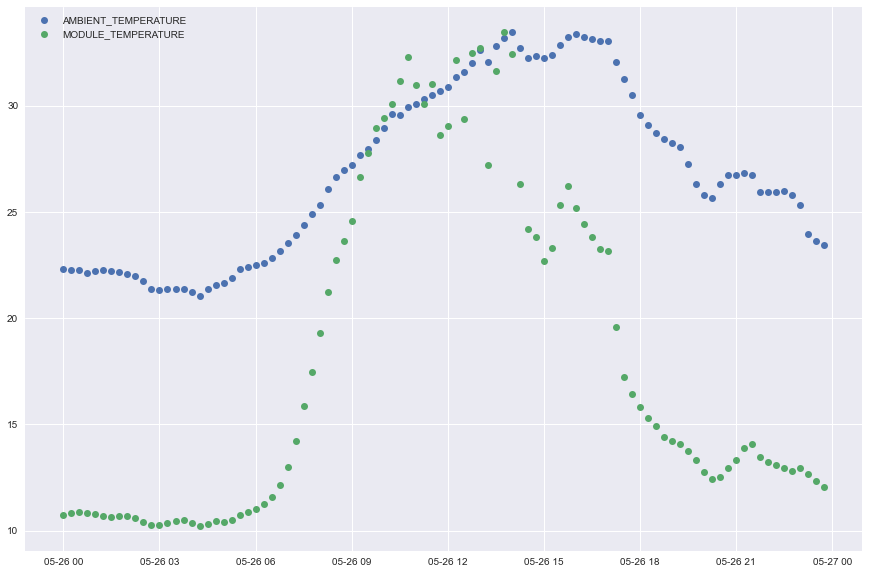

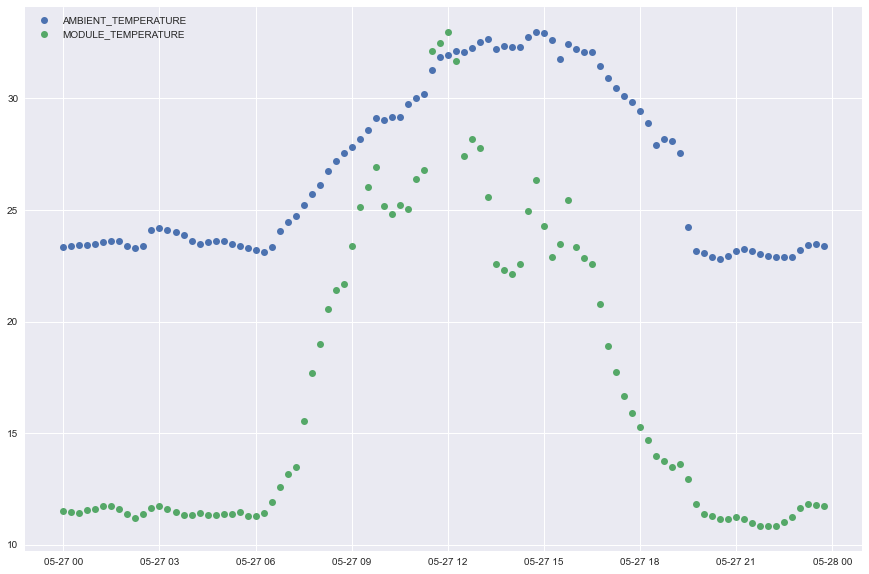

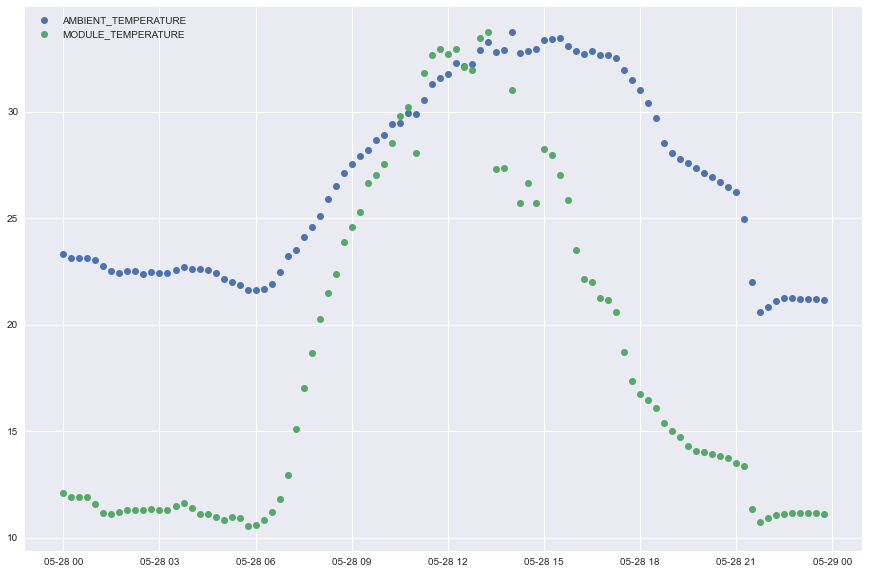

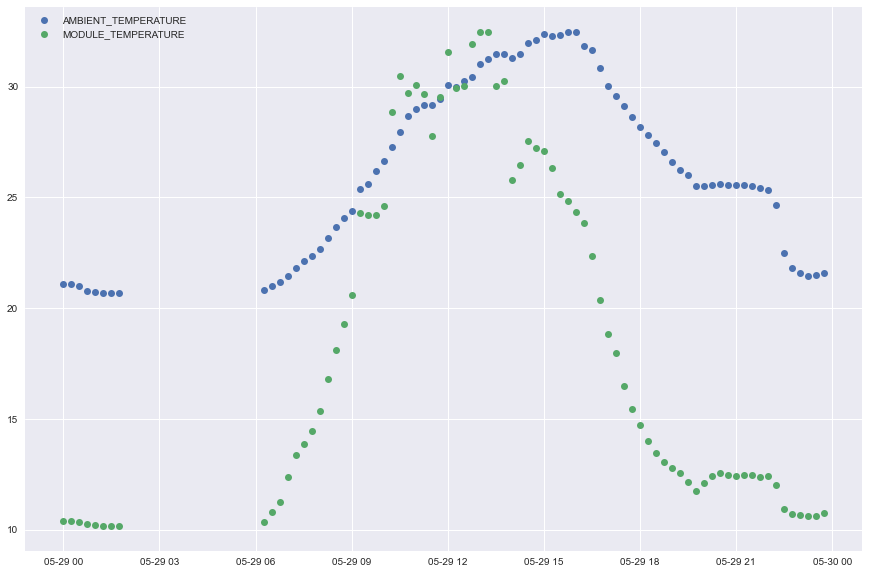

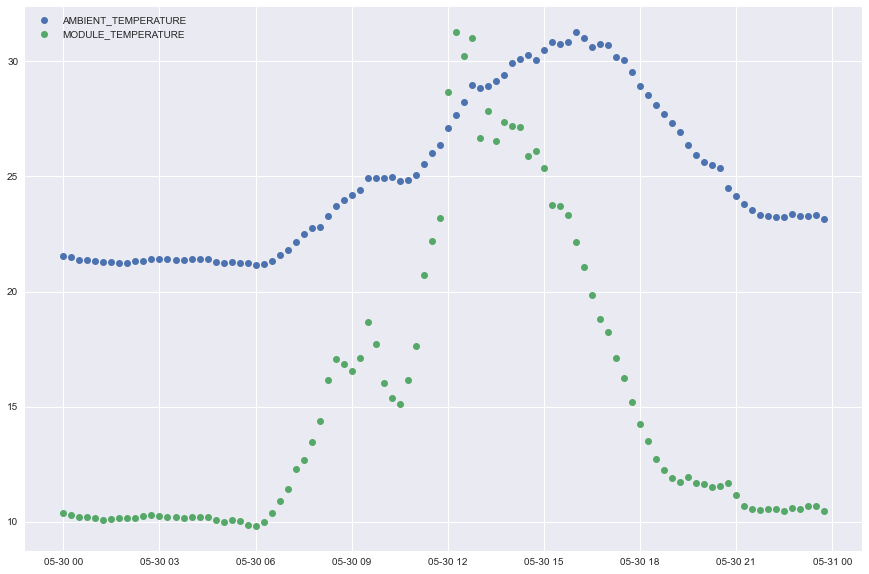

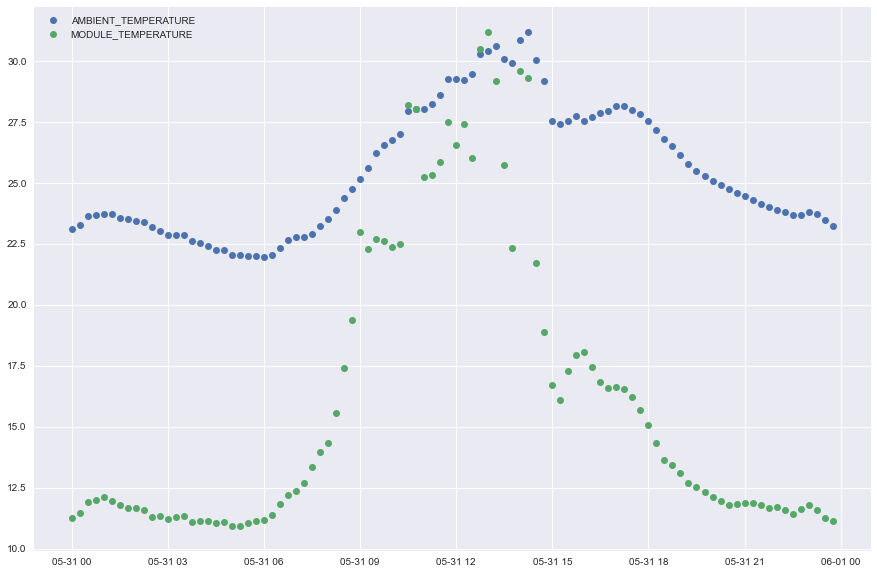

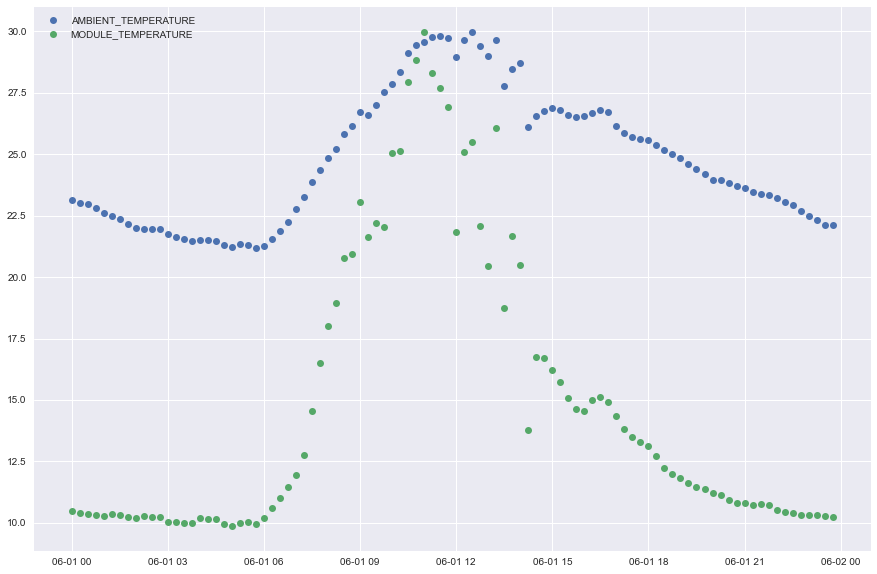

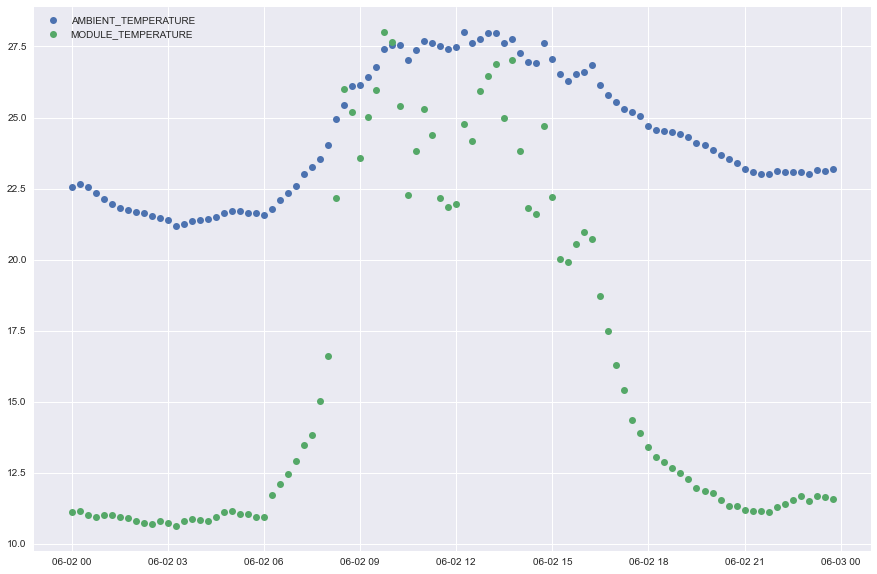

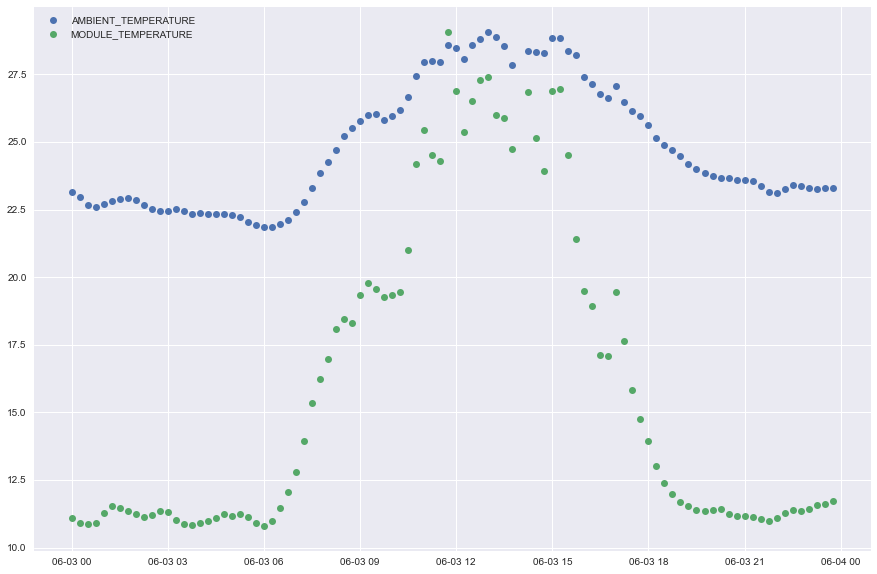

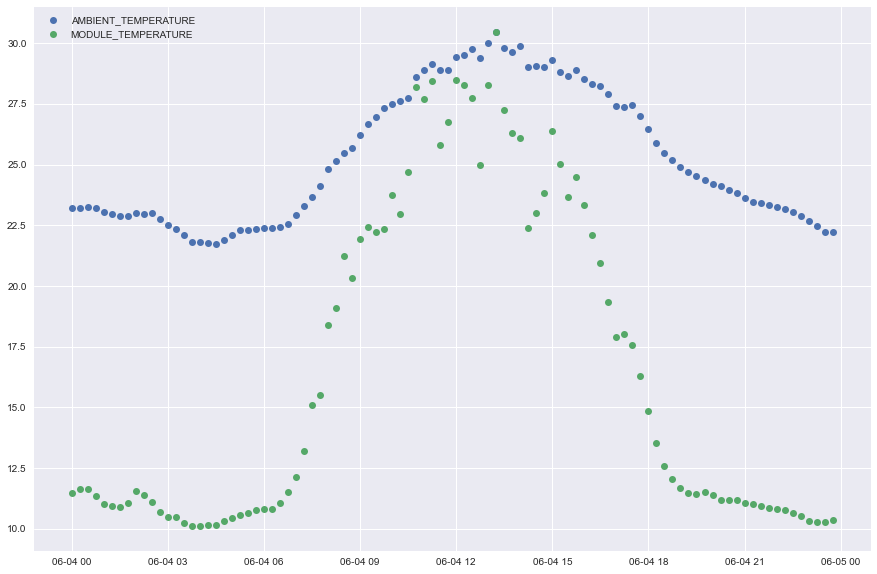

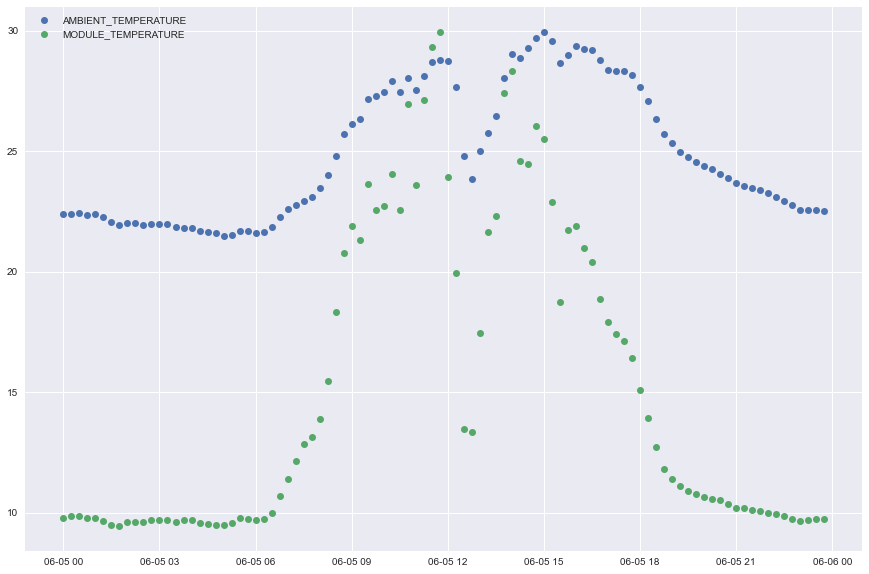

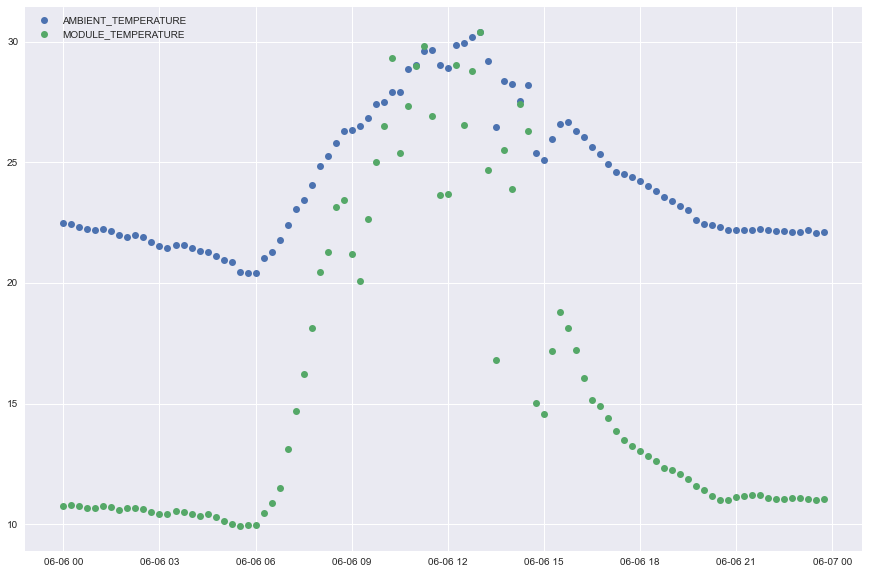

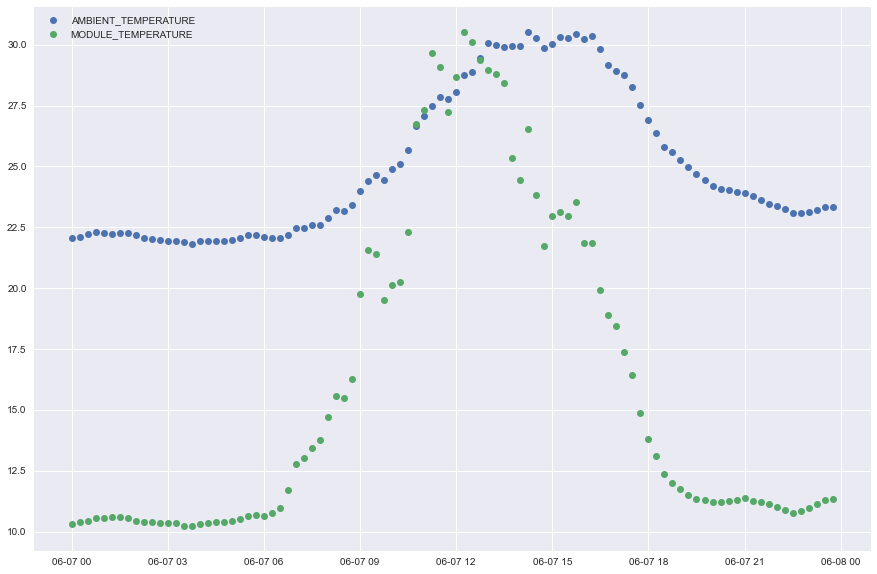

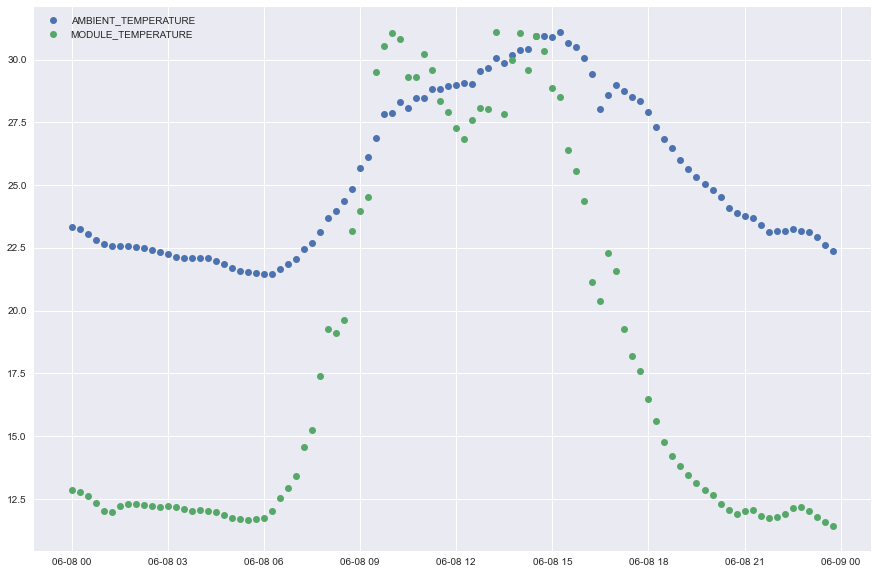

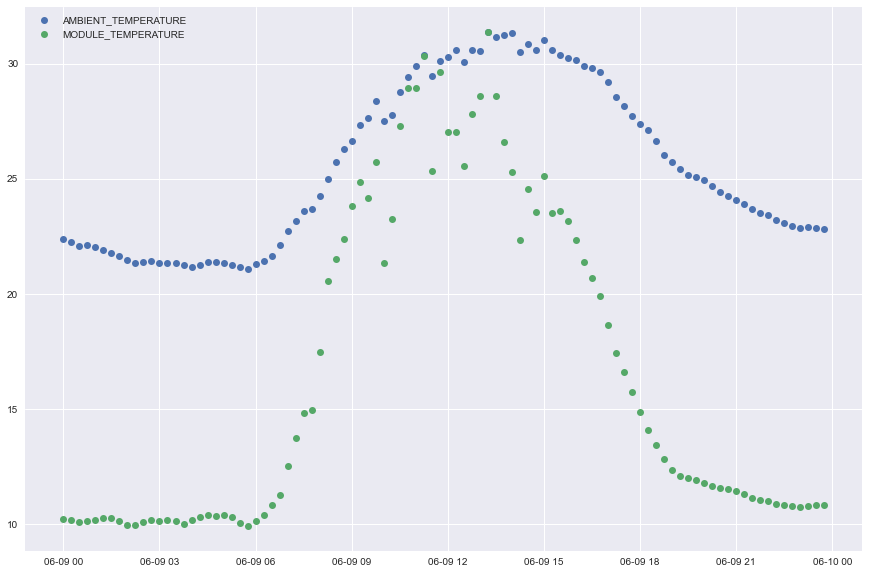

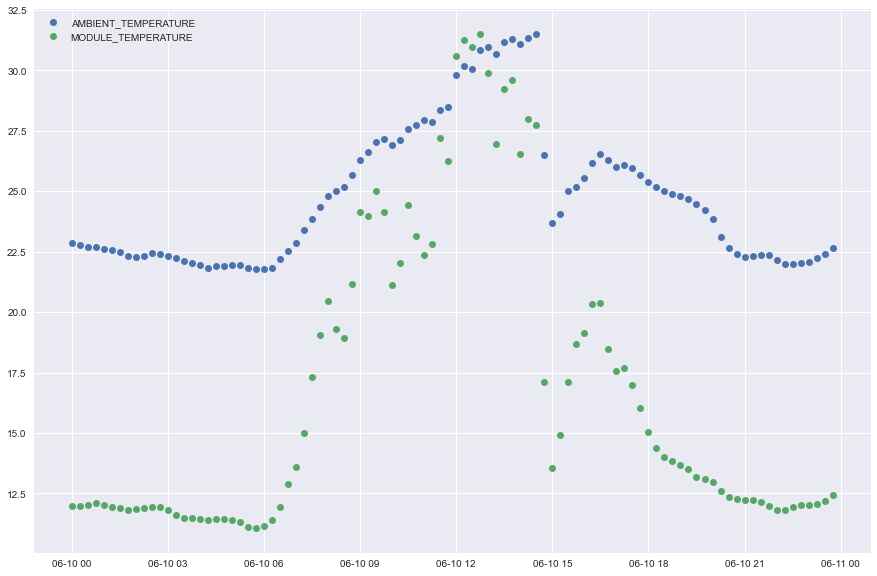

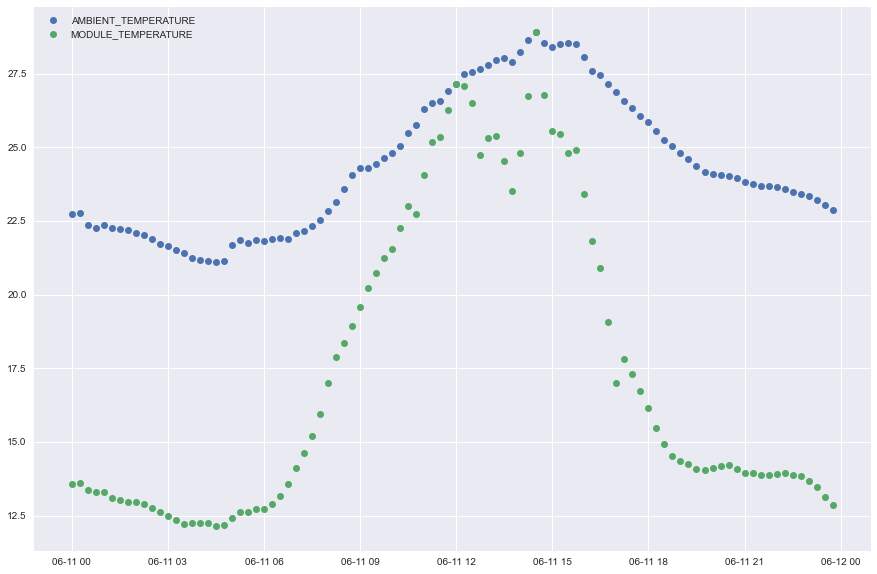

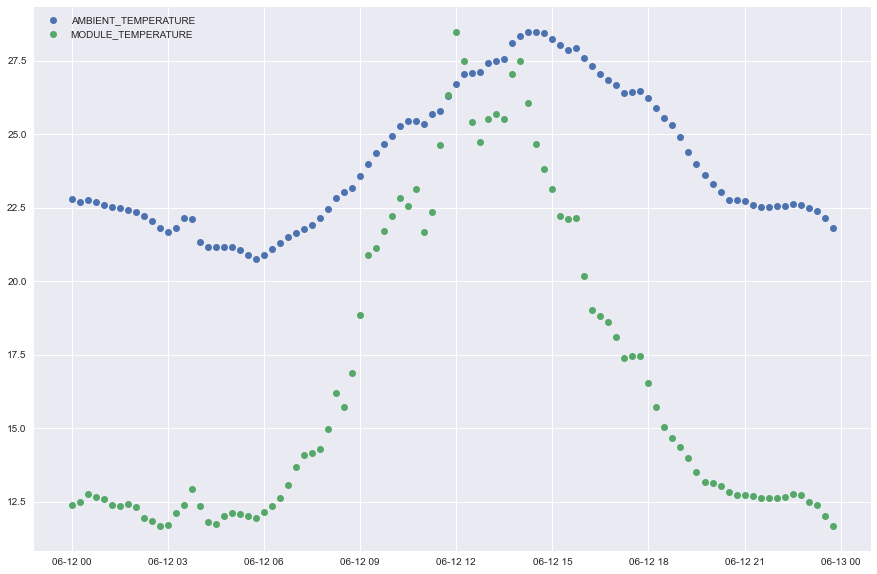

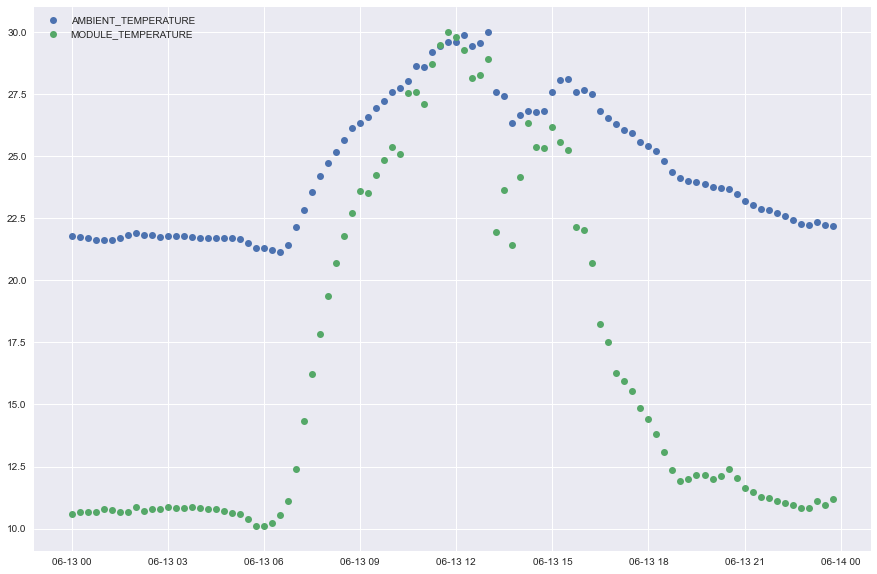

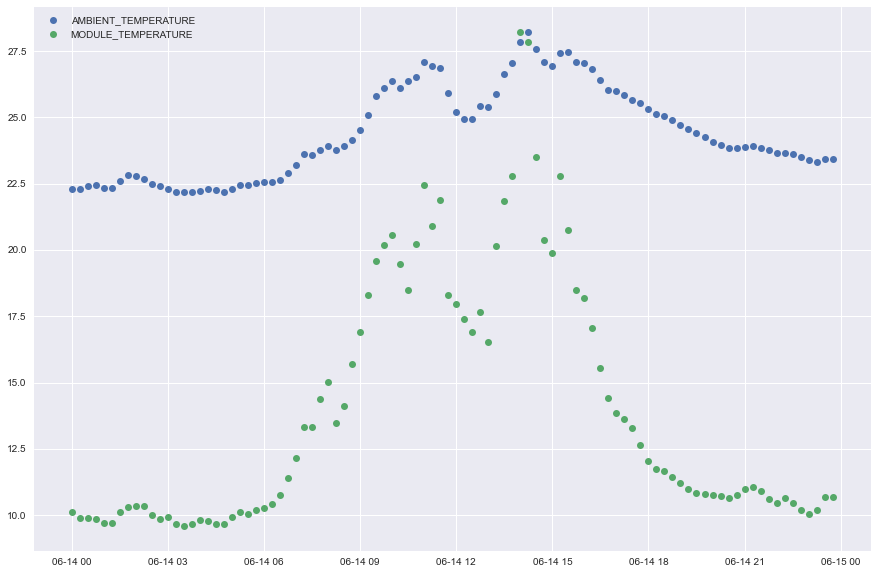

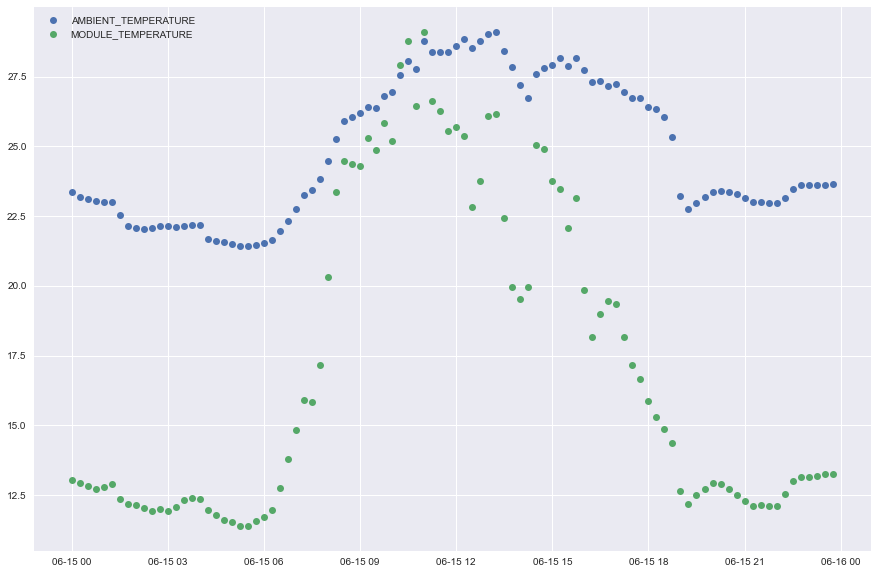

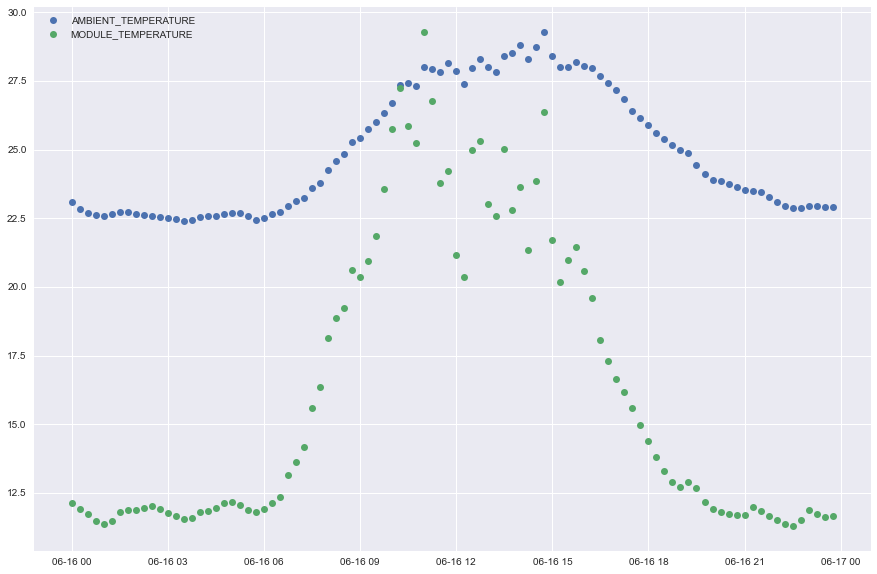

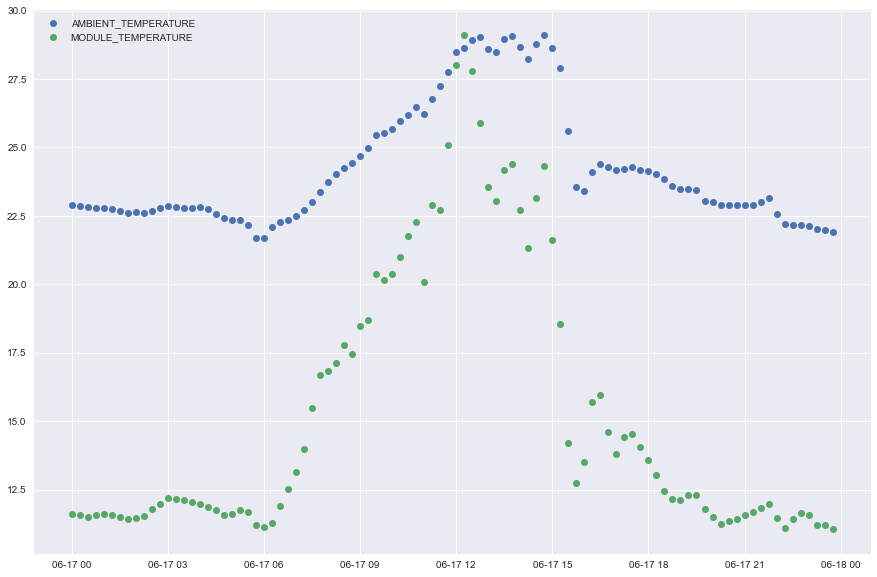

In [7]:
datetime_vs(plant_weat, 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE')

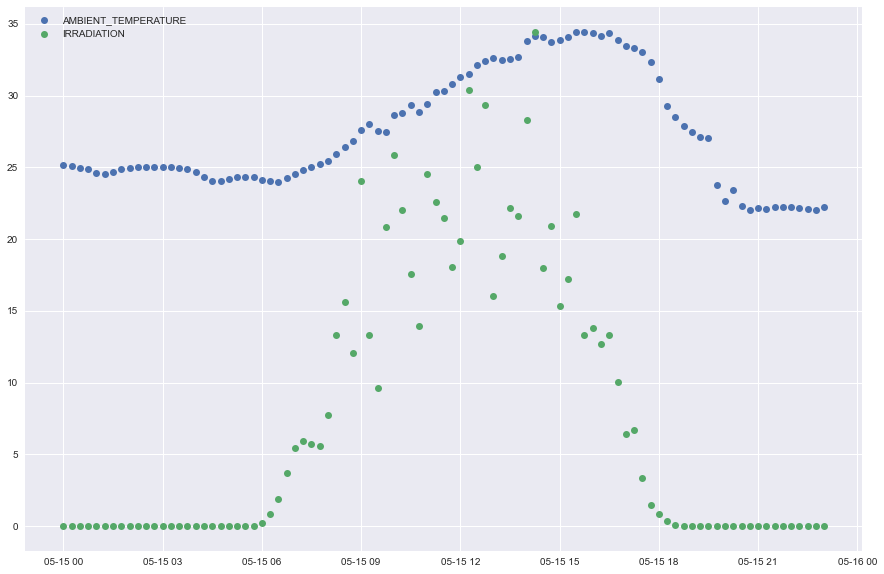

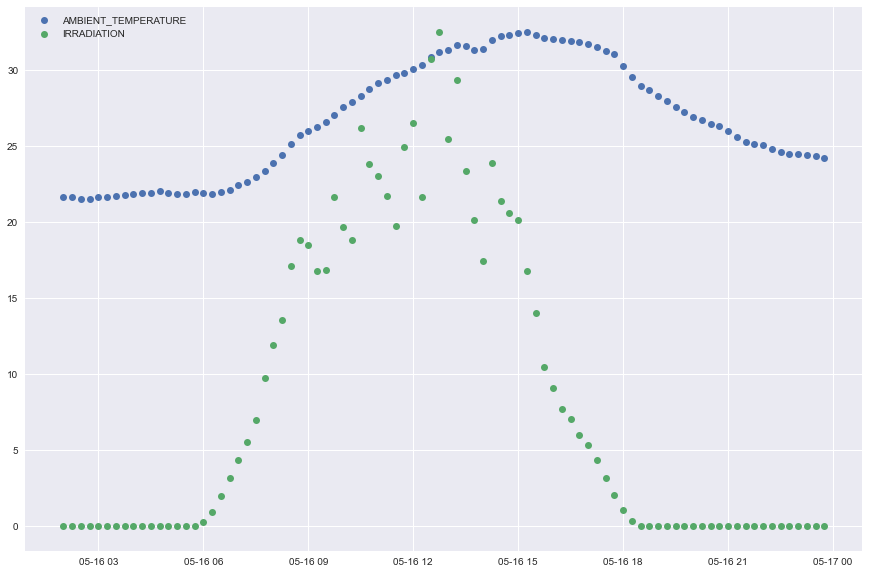

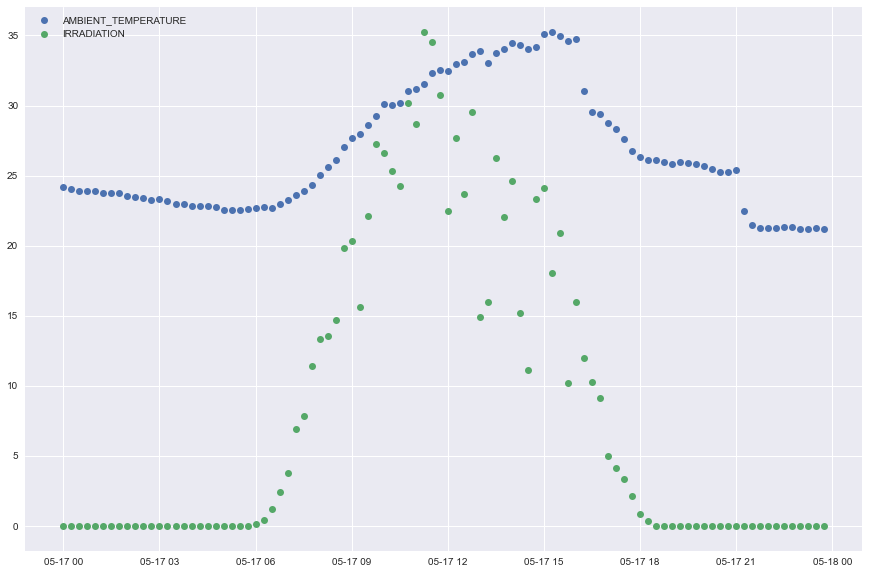

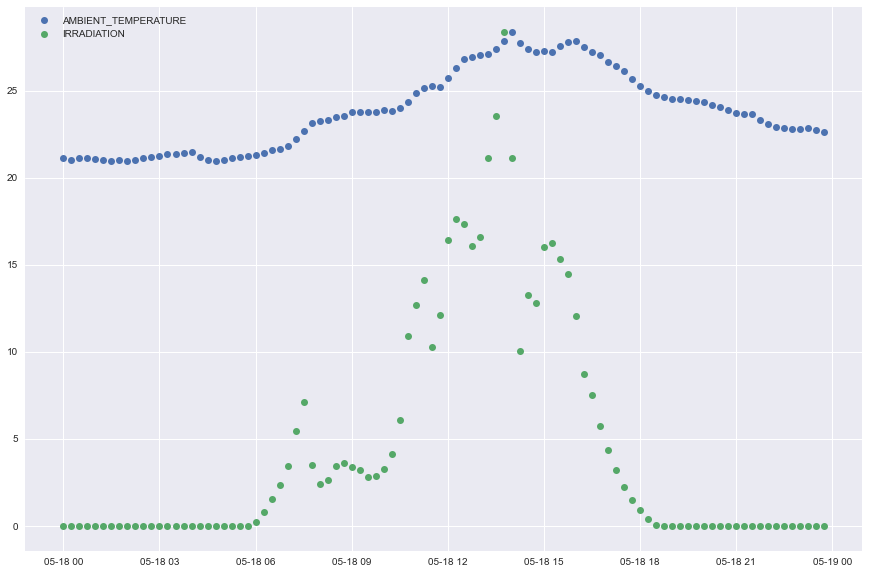

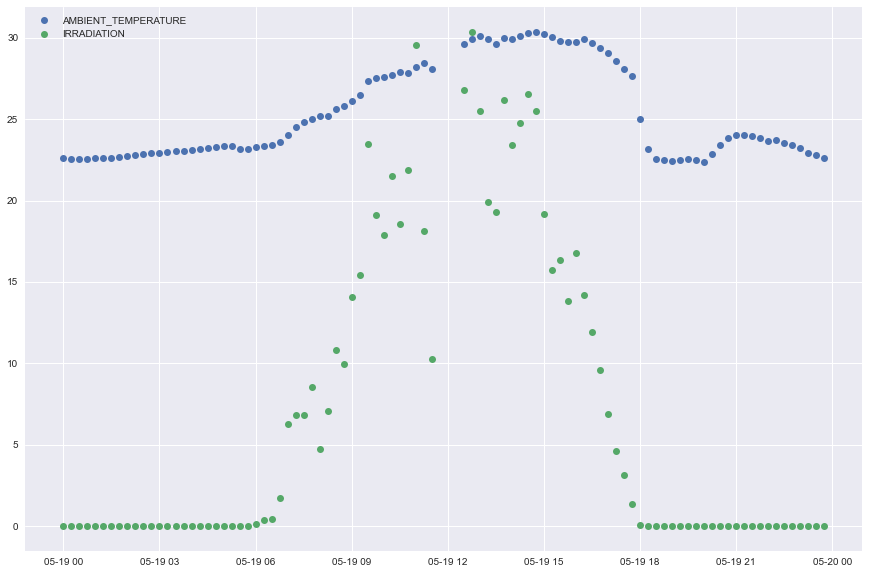

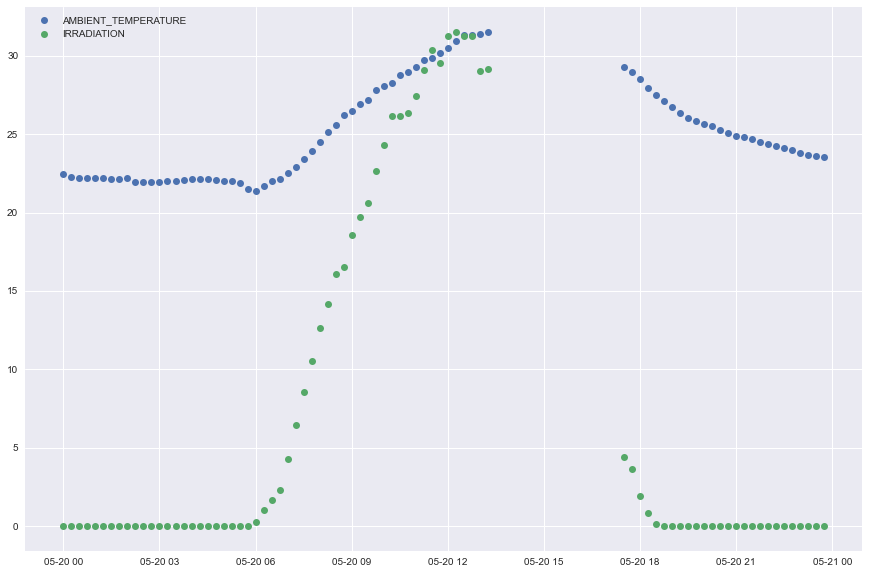

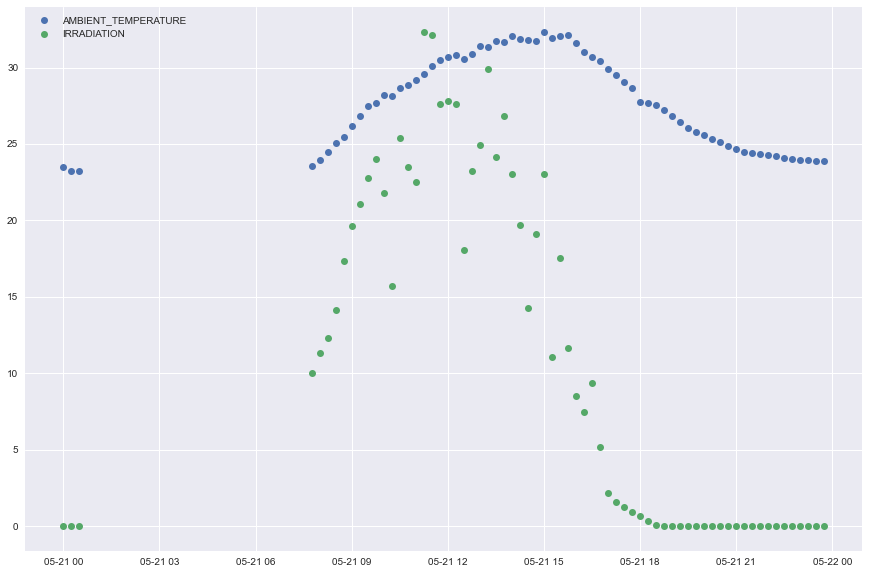

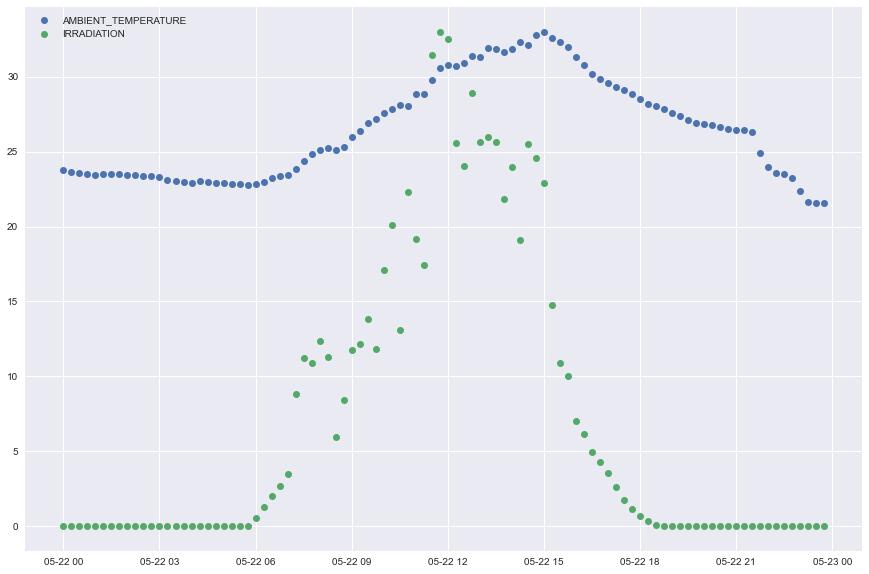

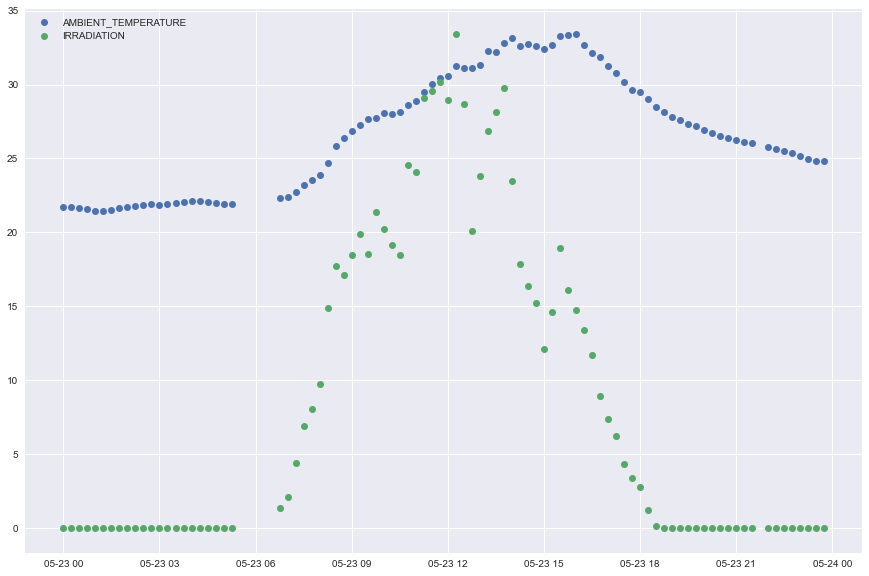

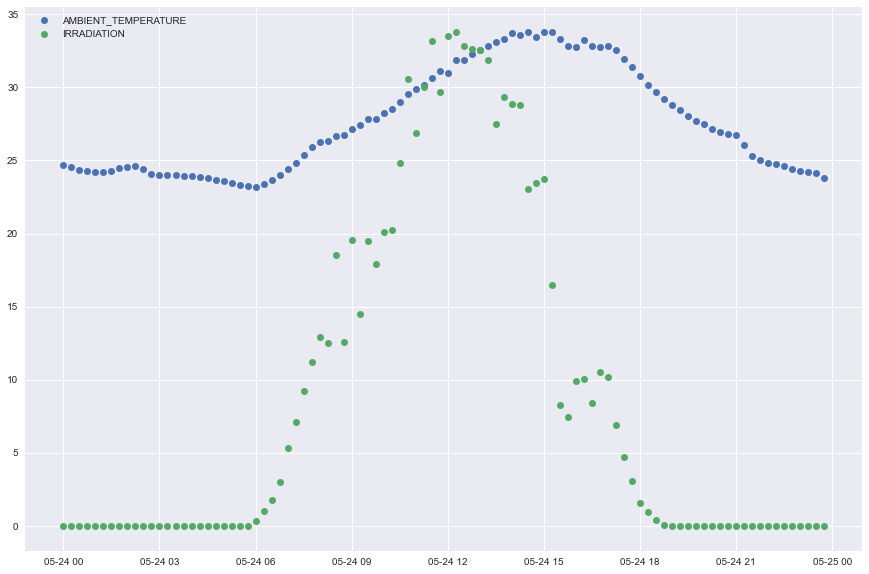

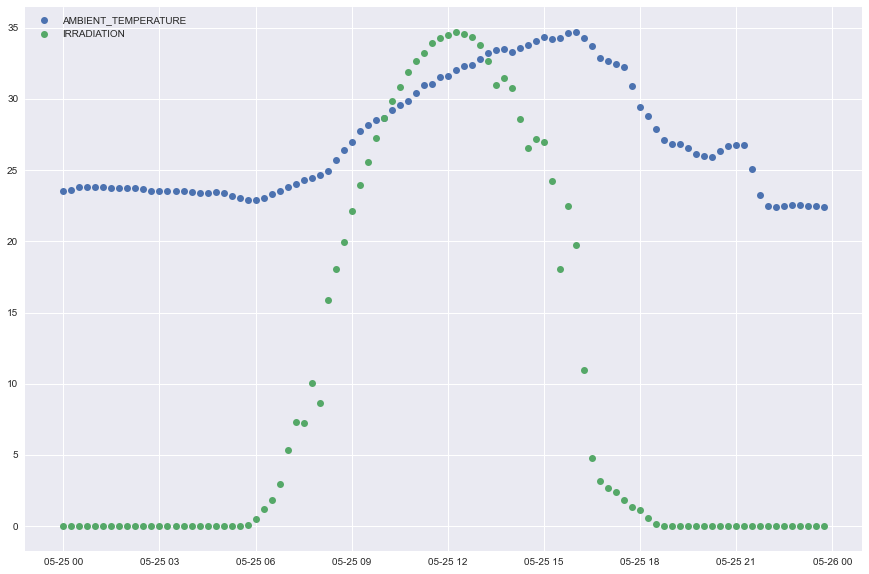

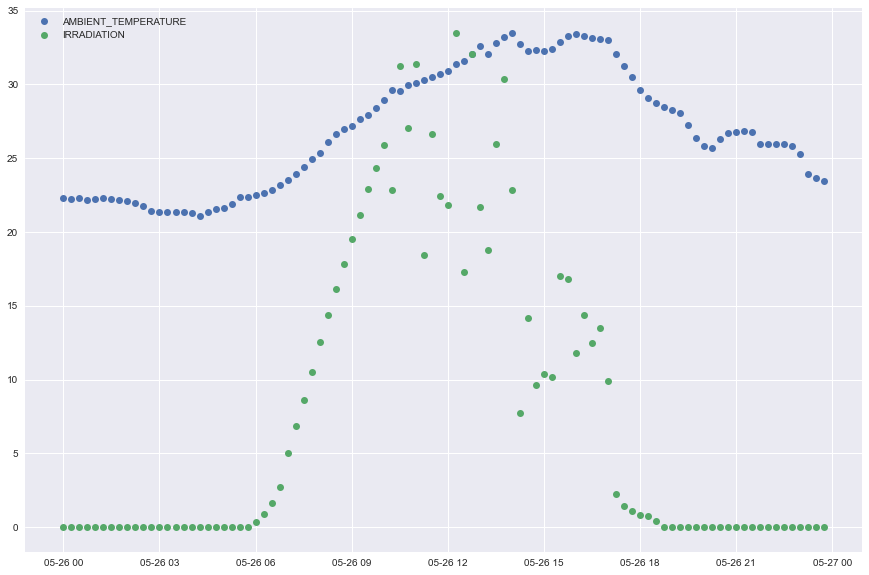

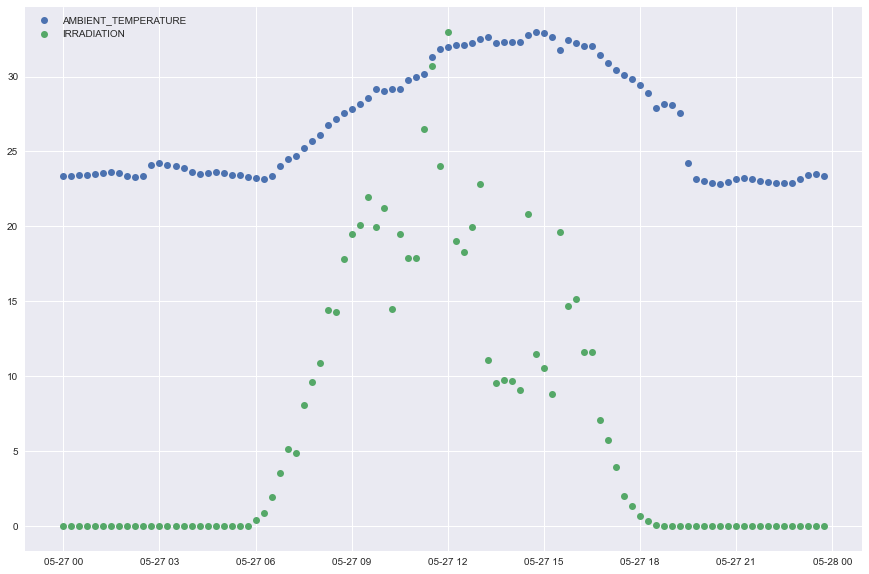

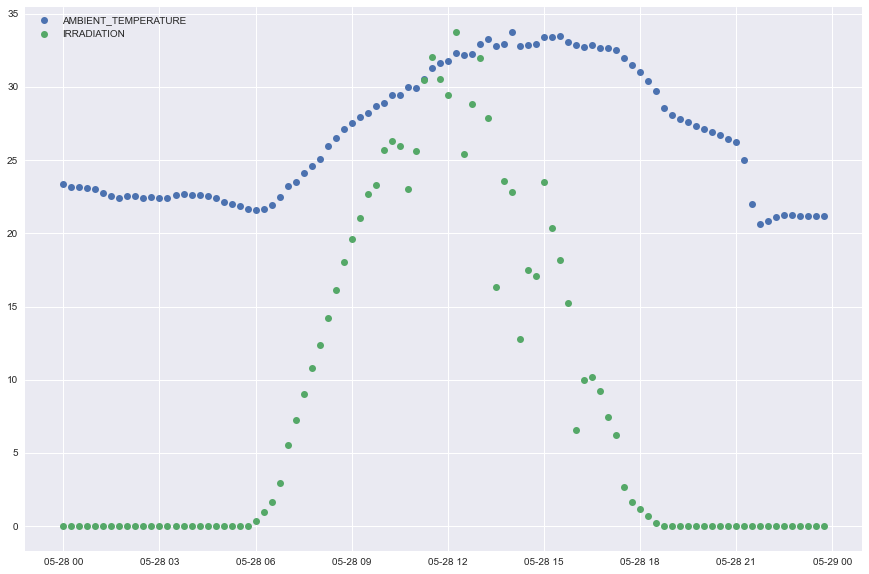

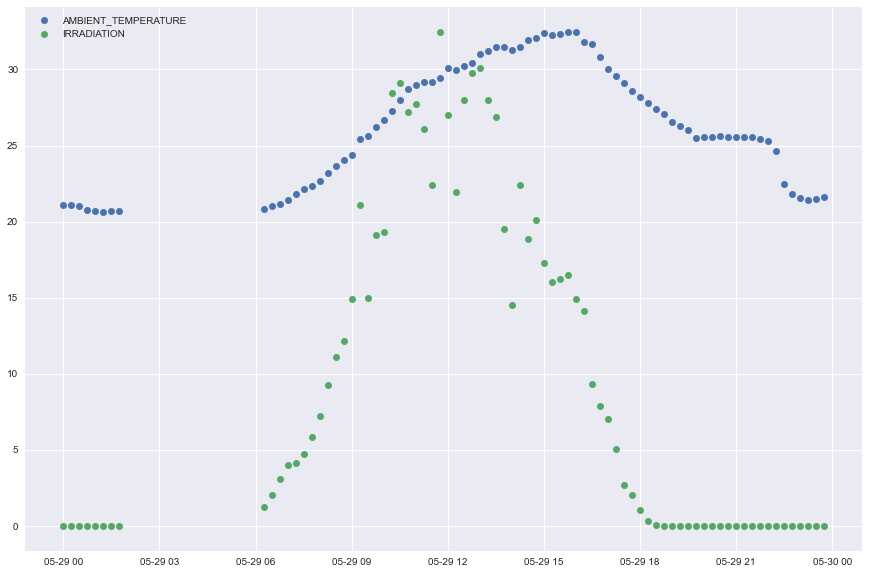

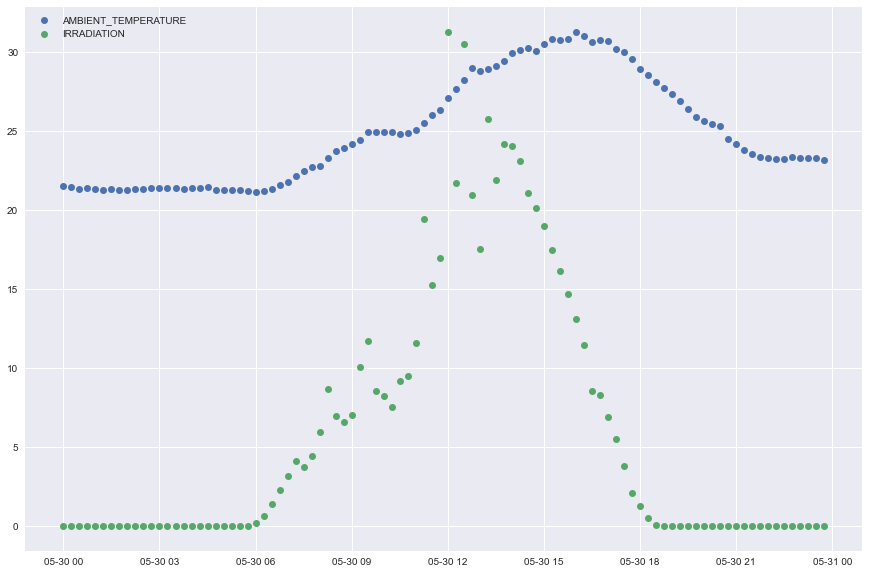

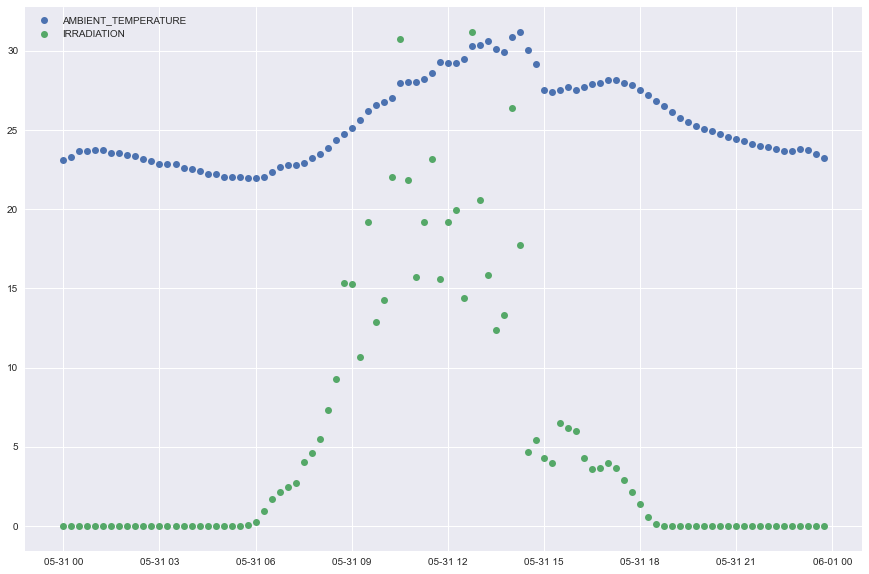

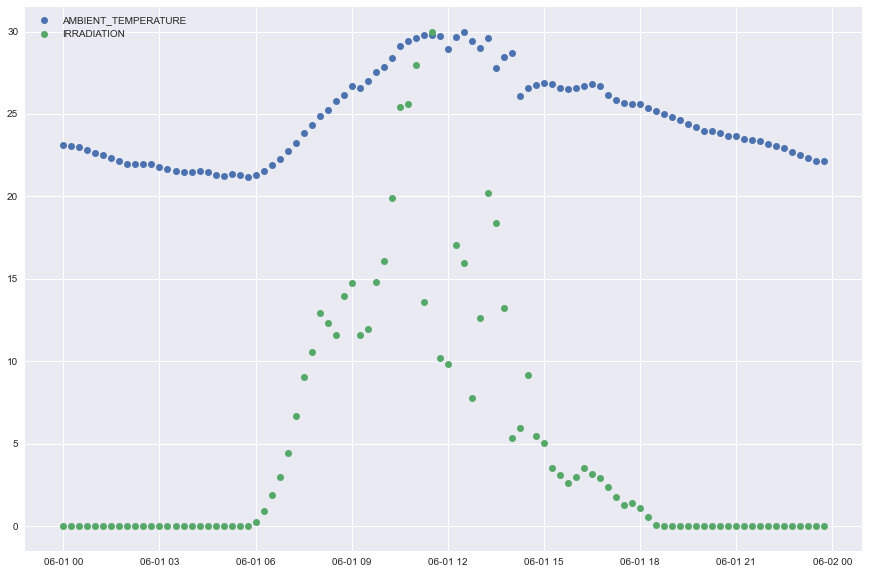

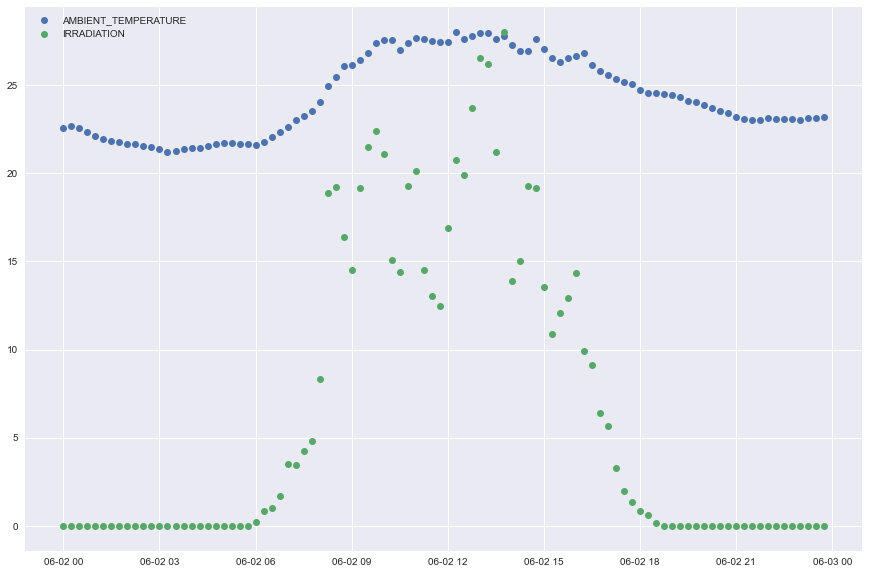

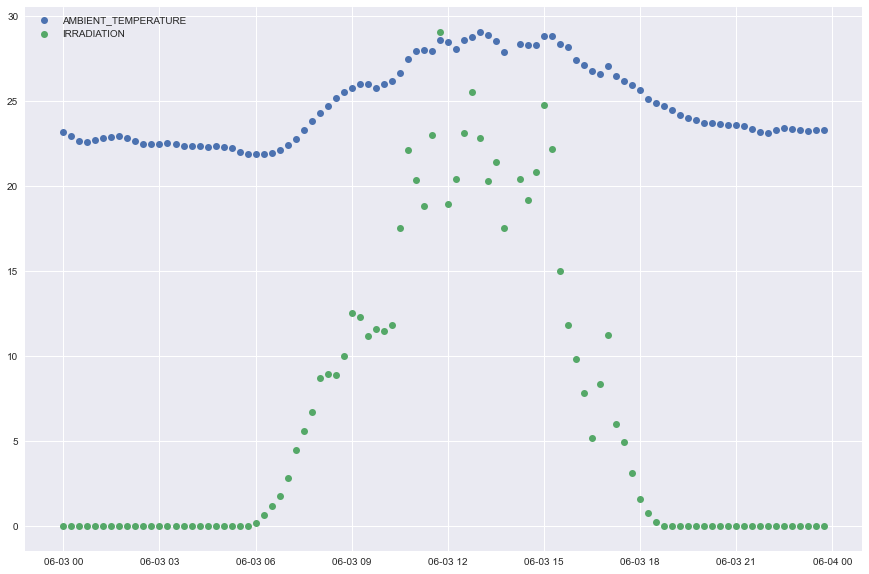

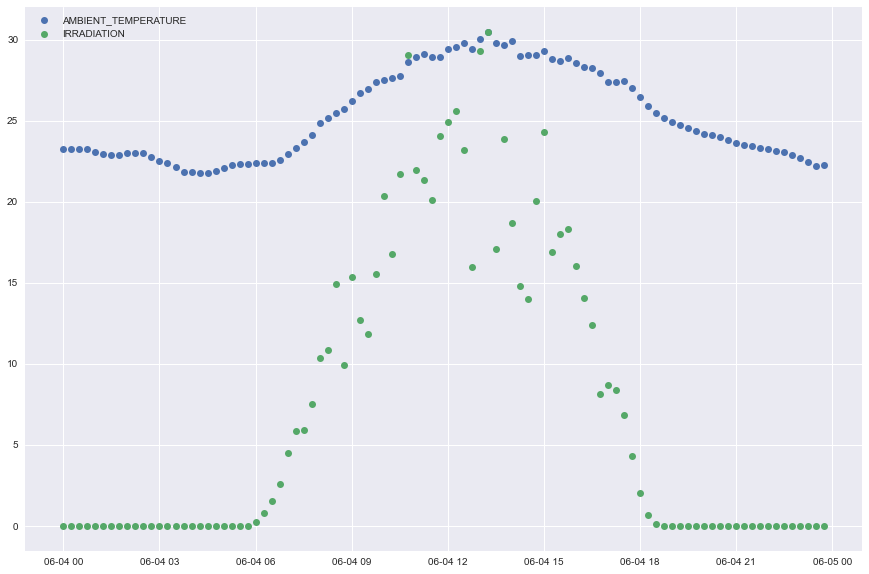

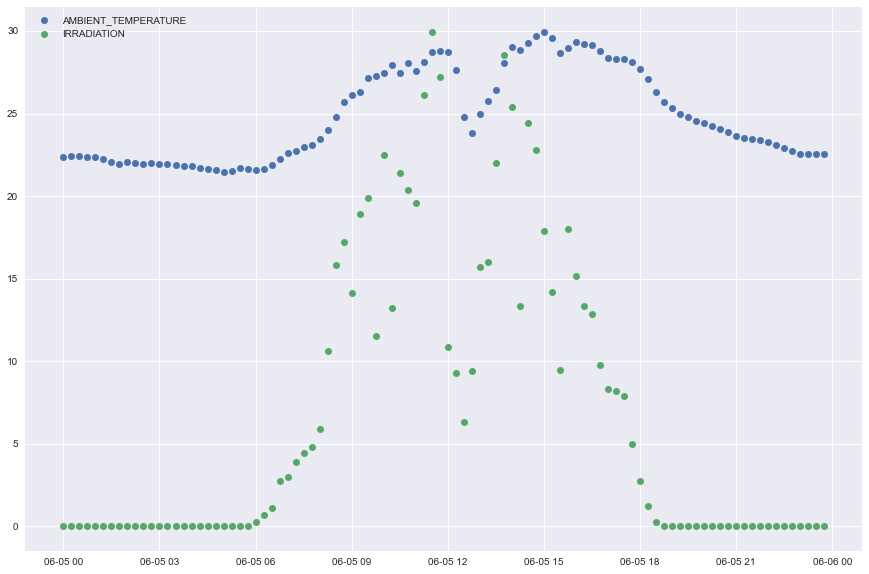

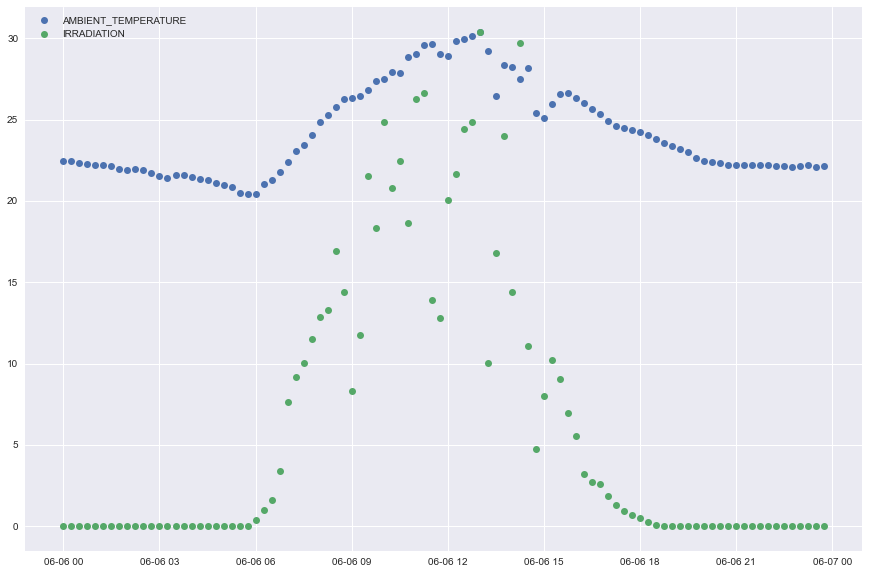

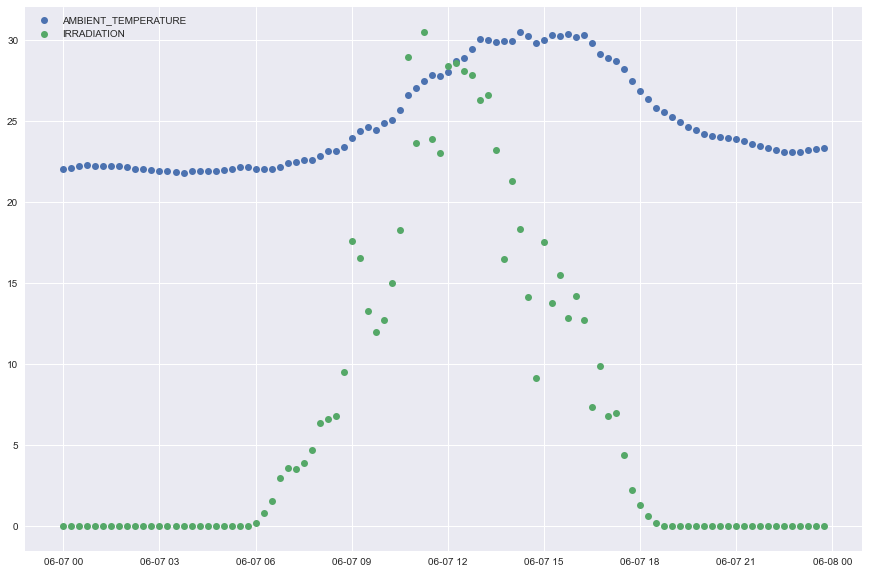

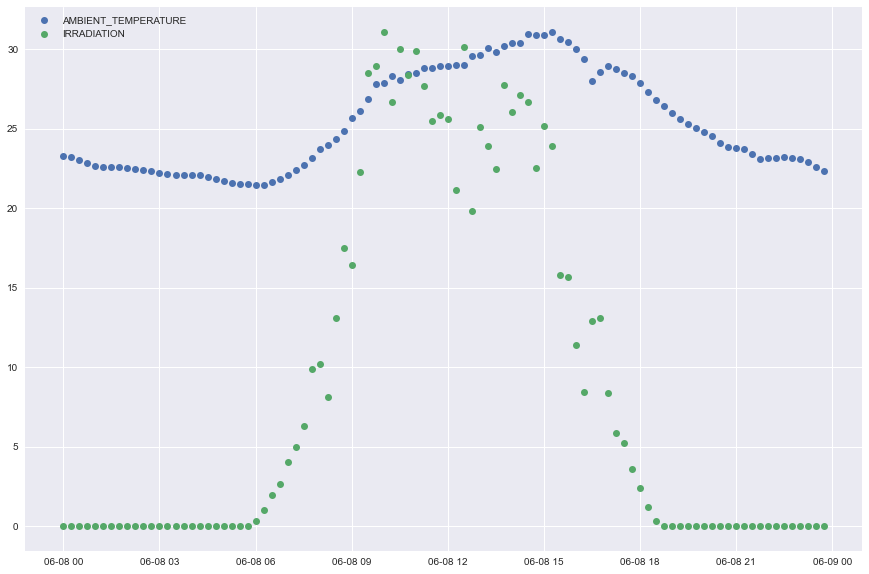

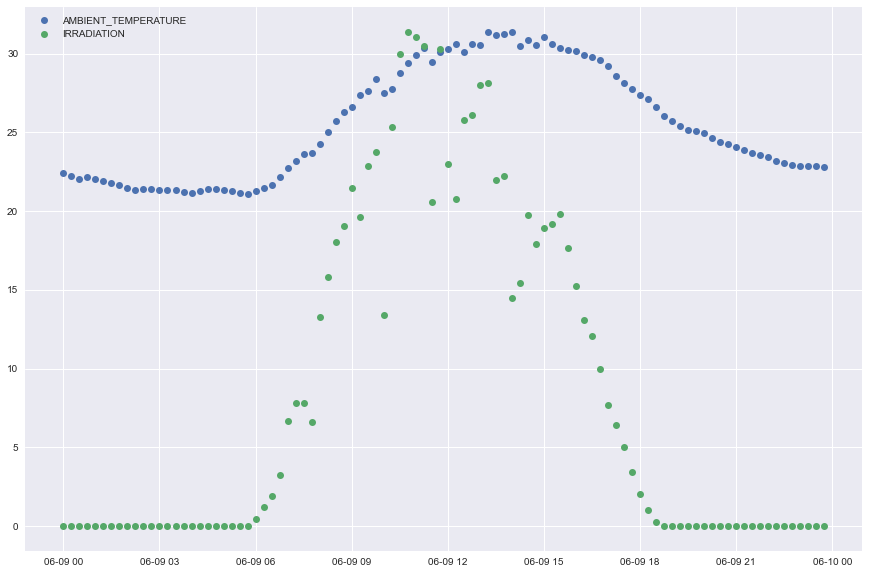

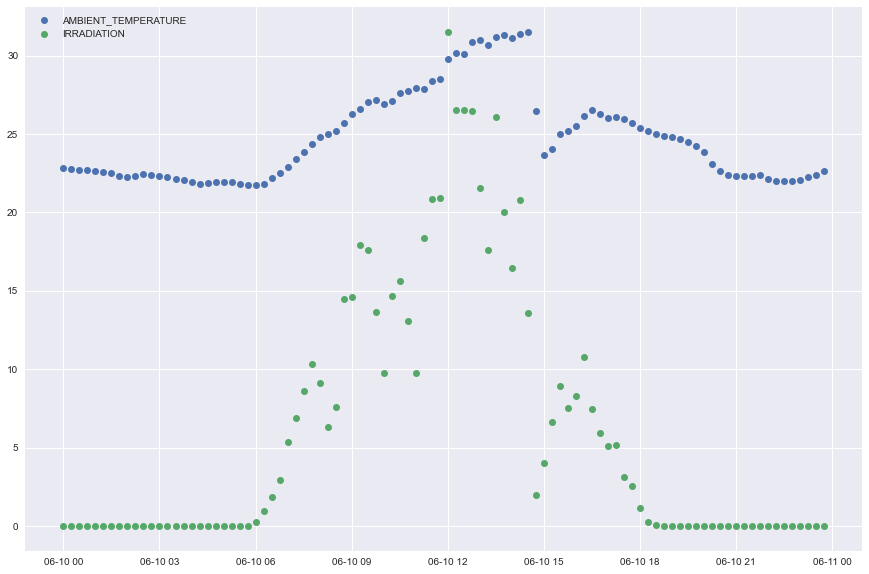

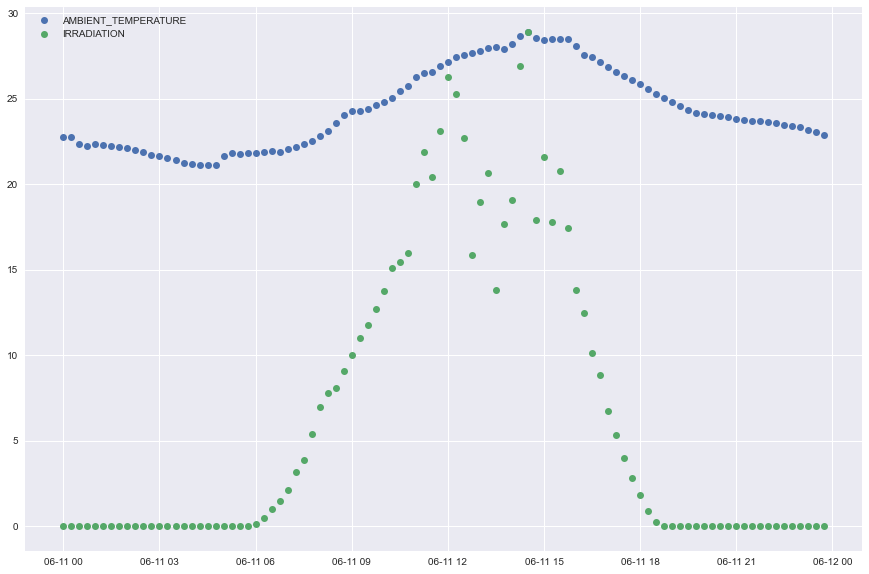

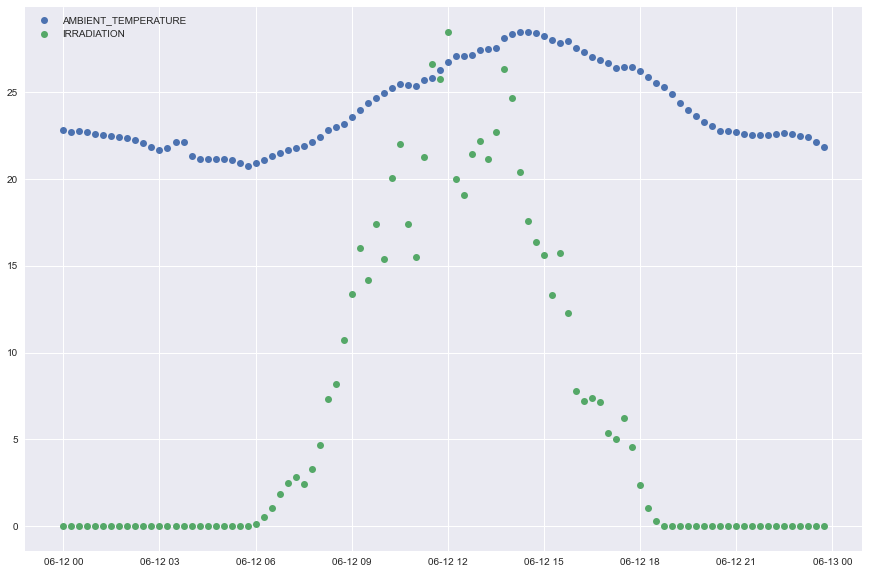

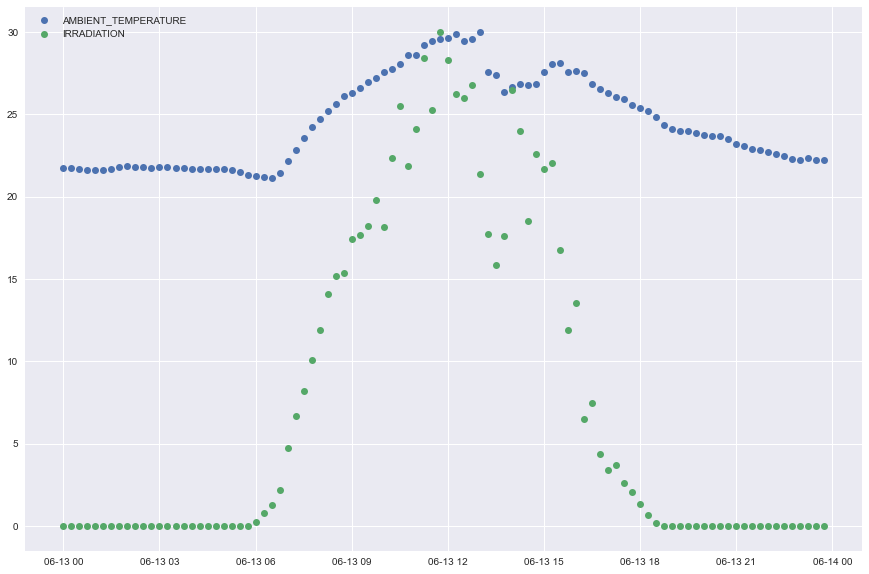

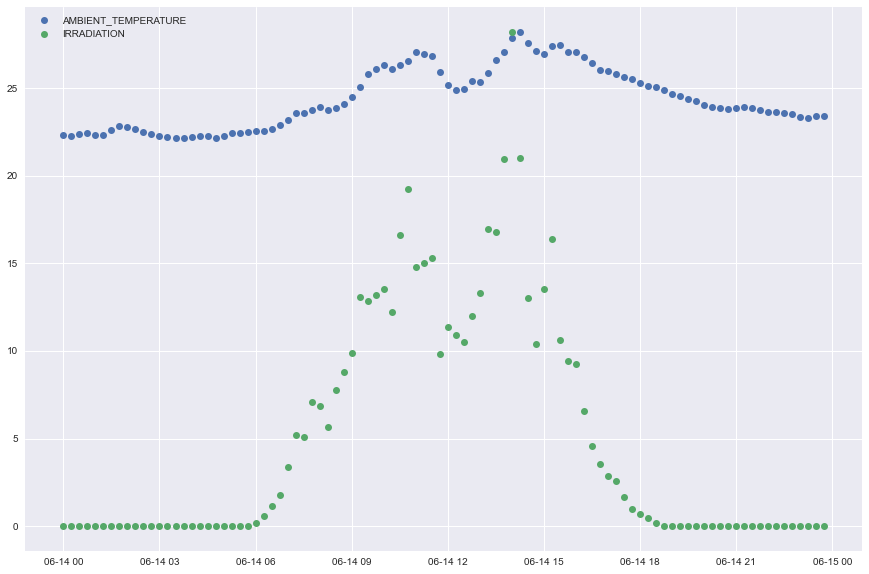

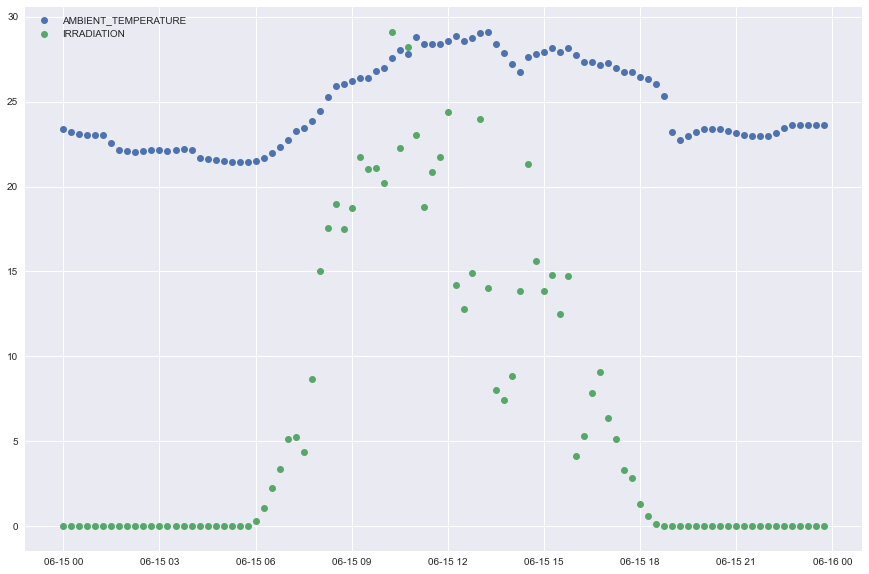

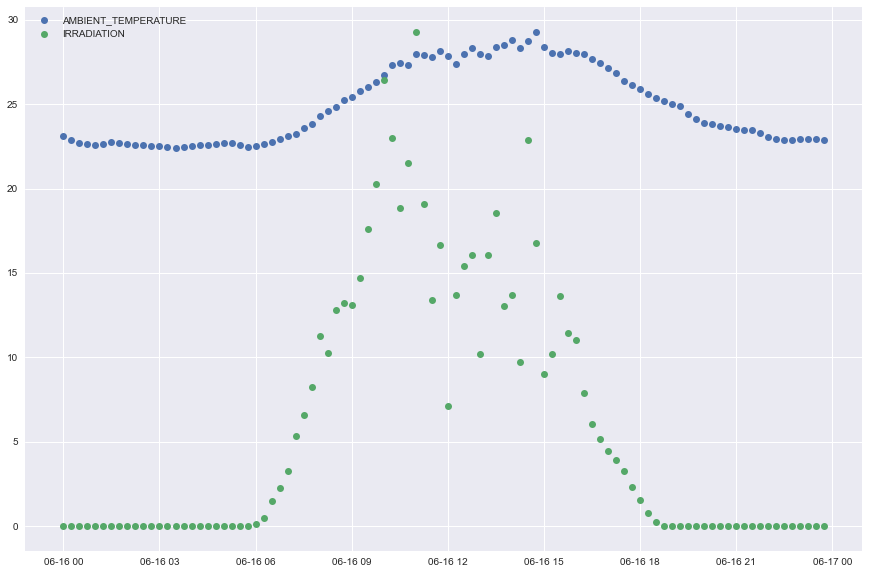

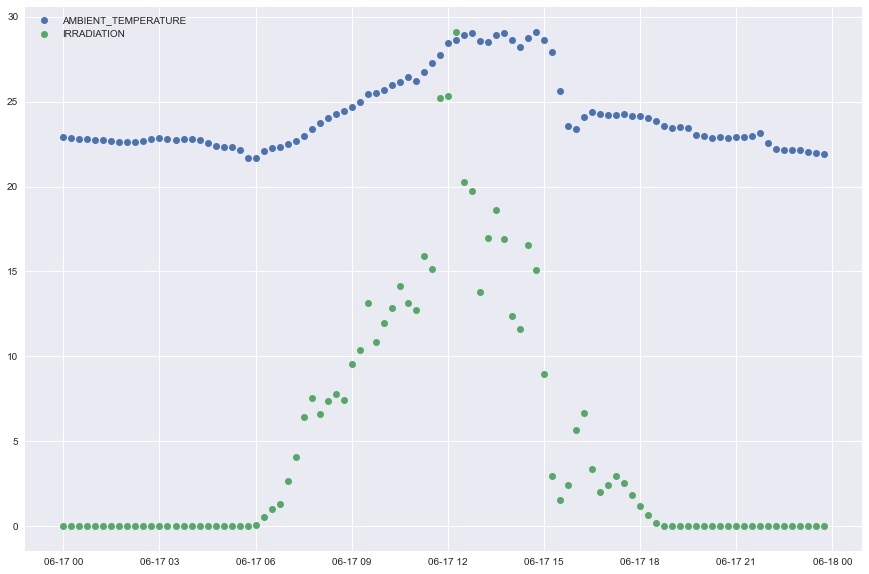

In [8]:
datetime_vs(plant_weat, 'AMBIENT_TEMPERATURE', 'IRRADIATION')

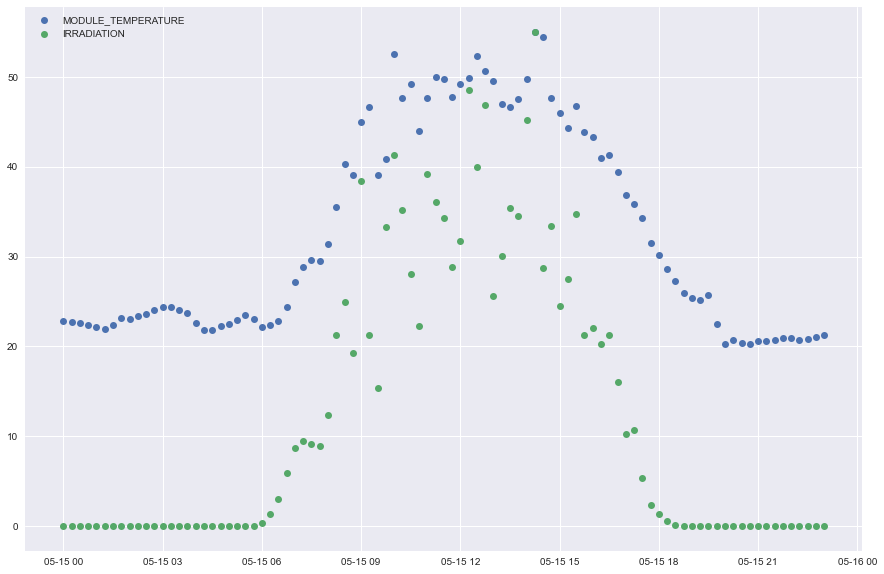

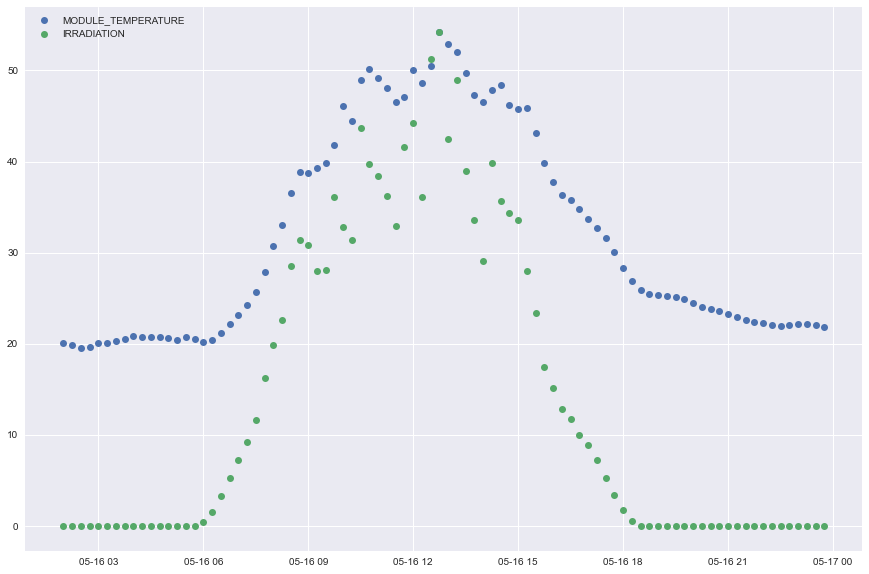

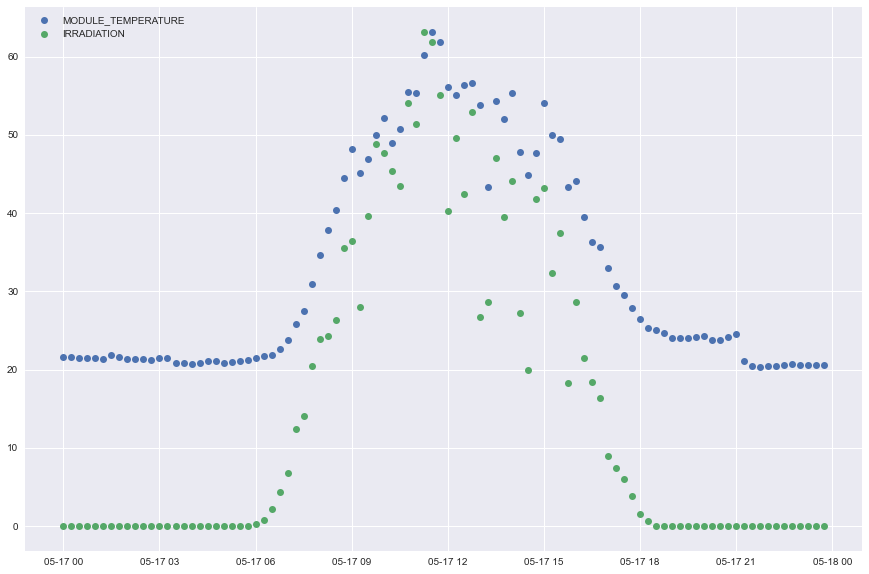

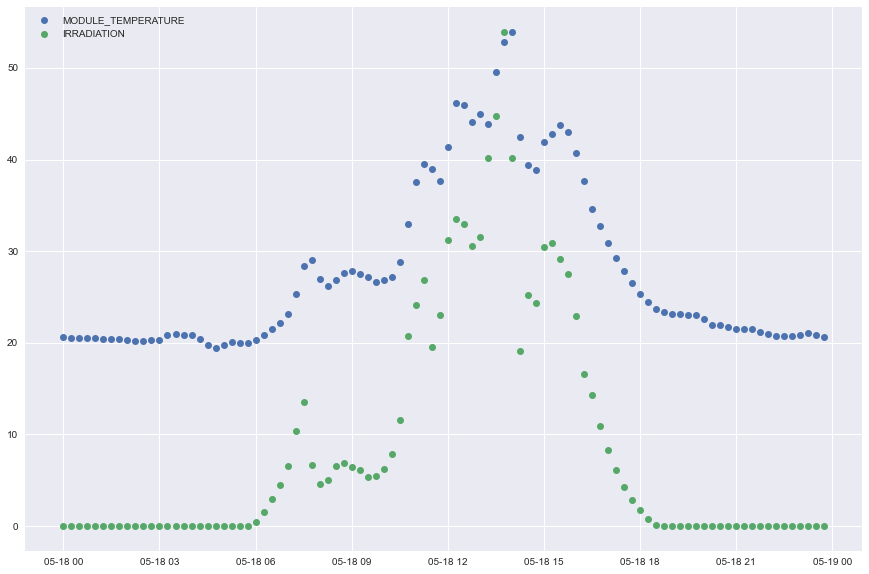

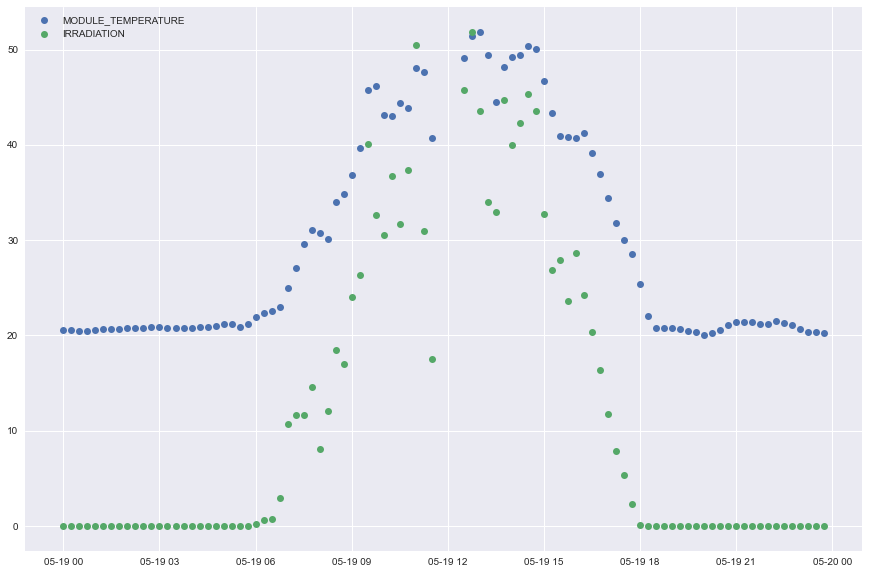

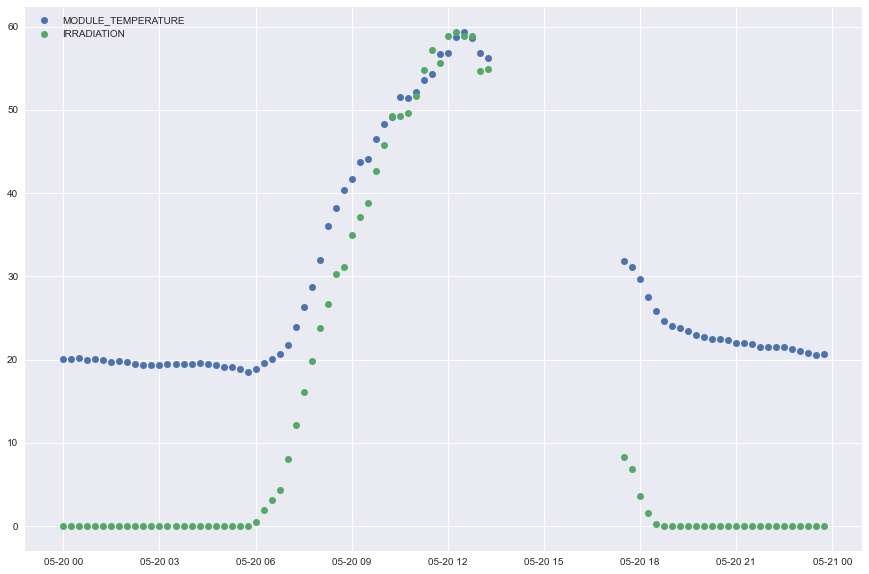

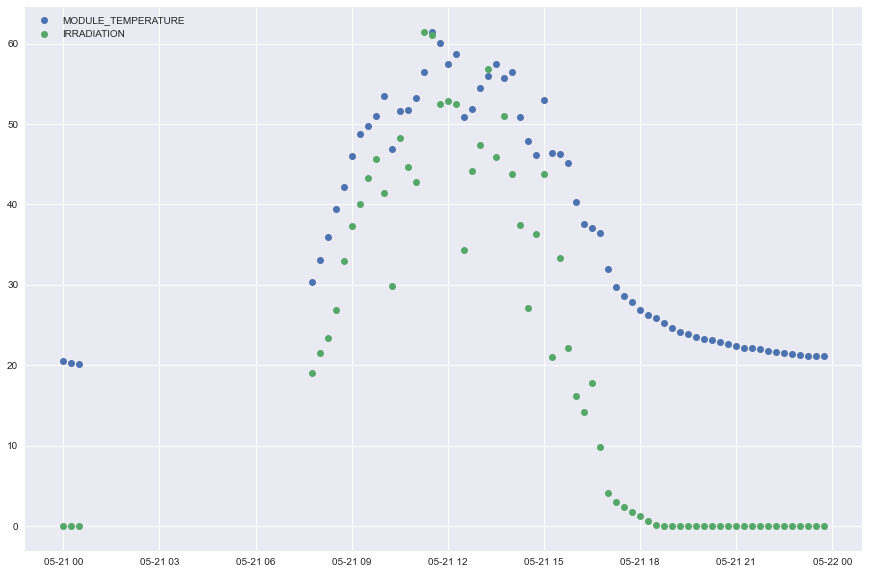

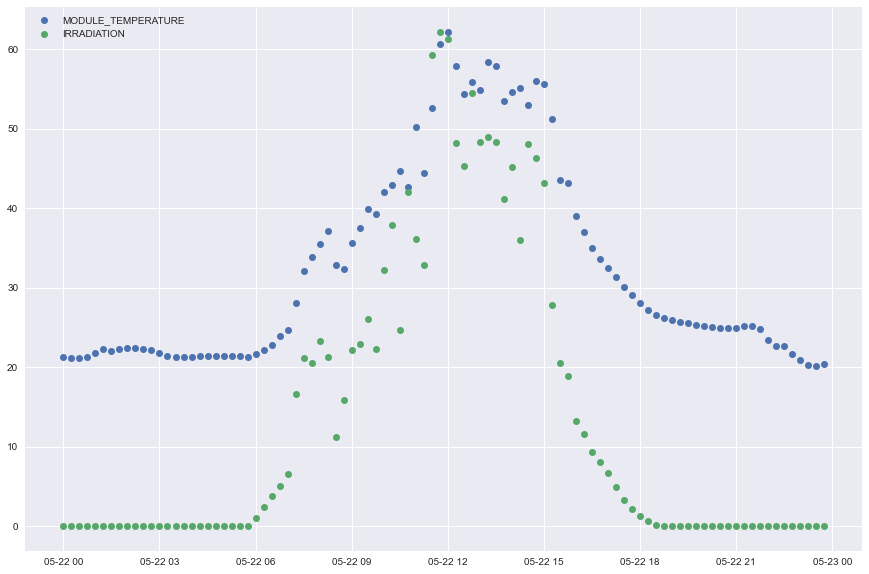

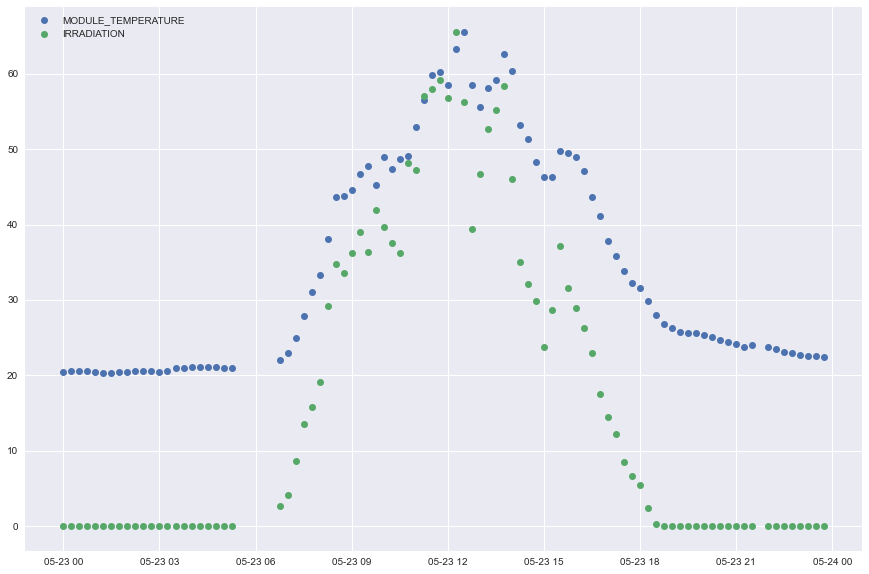

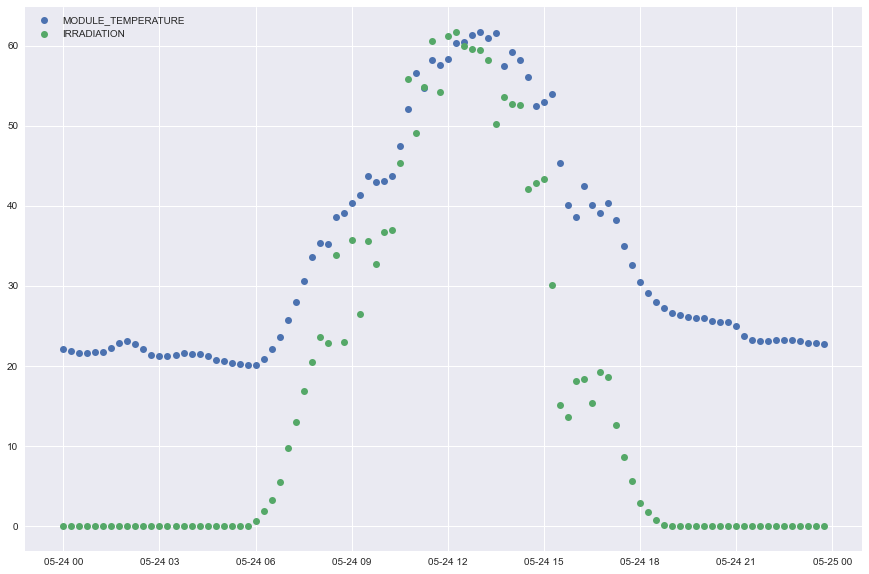

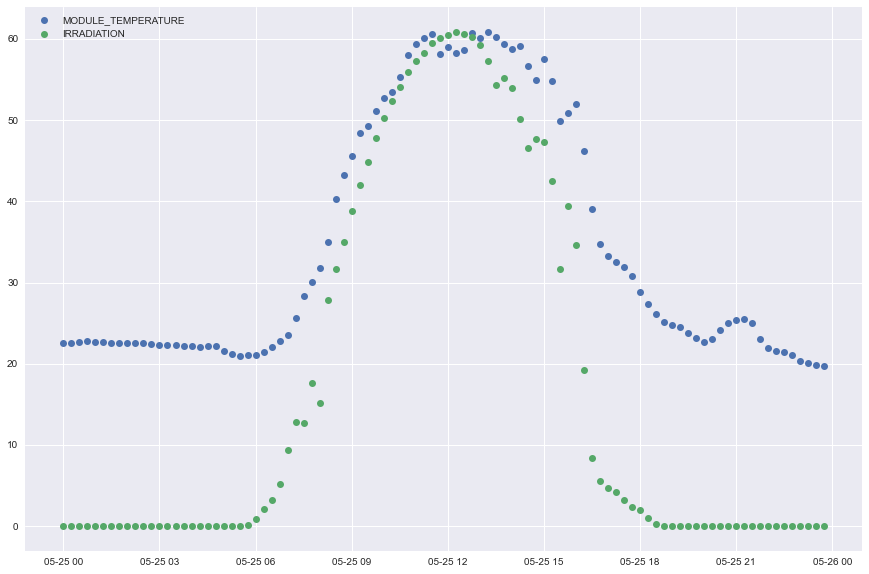

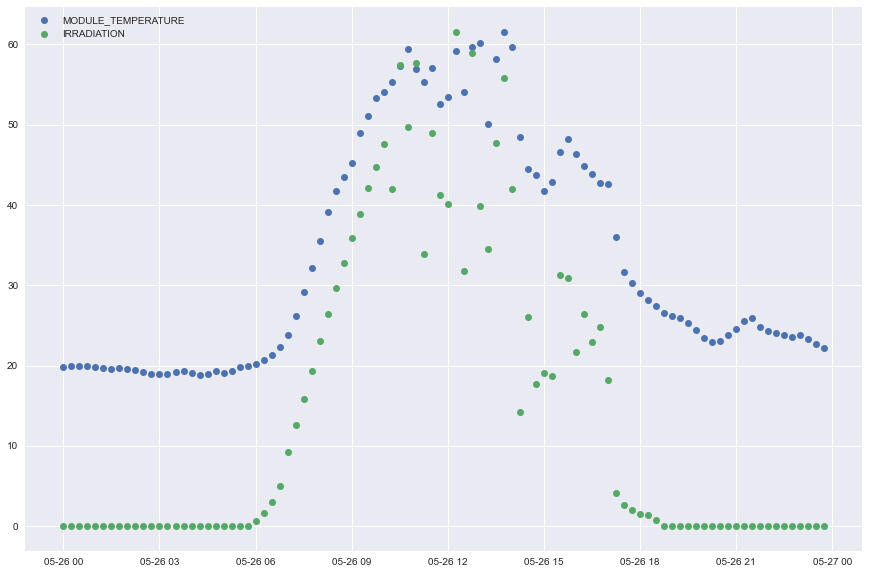

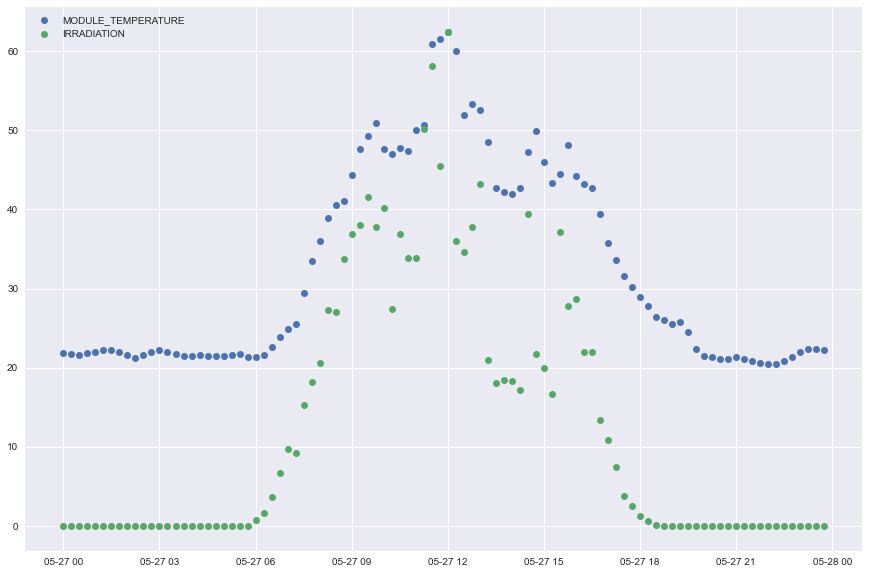

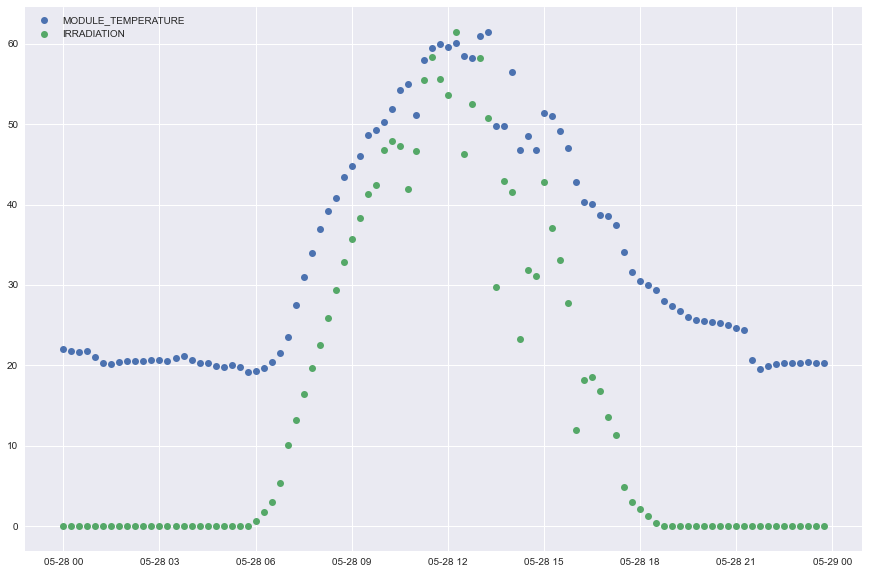

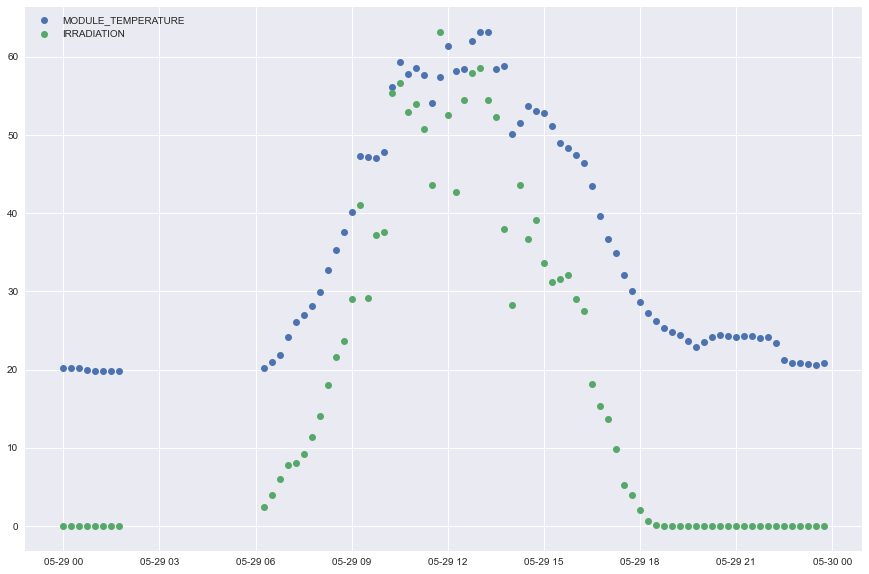

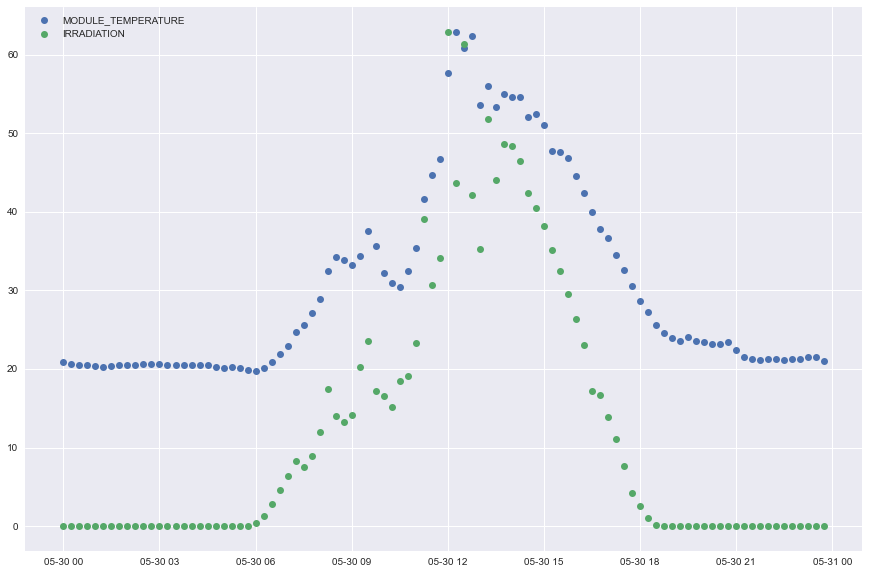

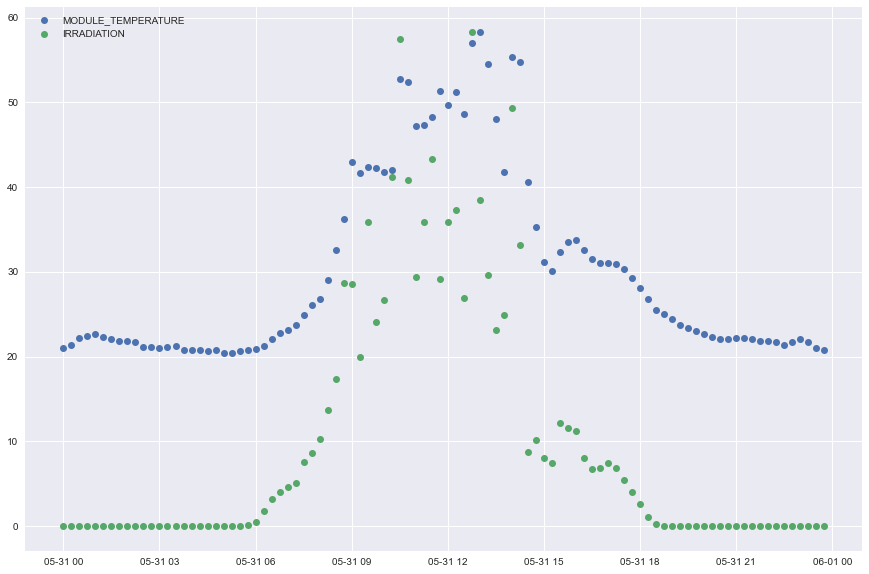

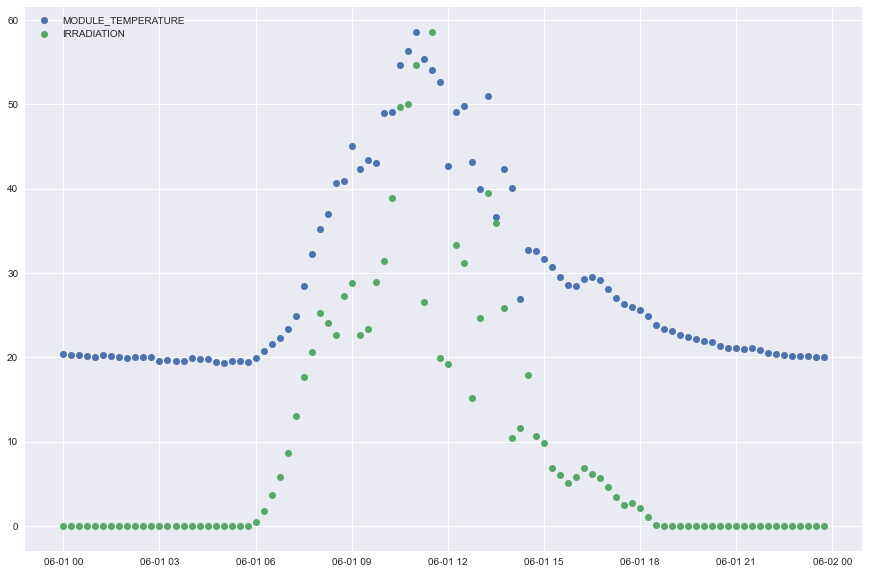

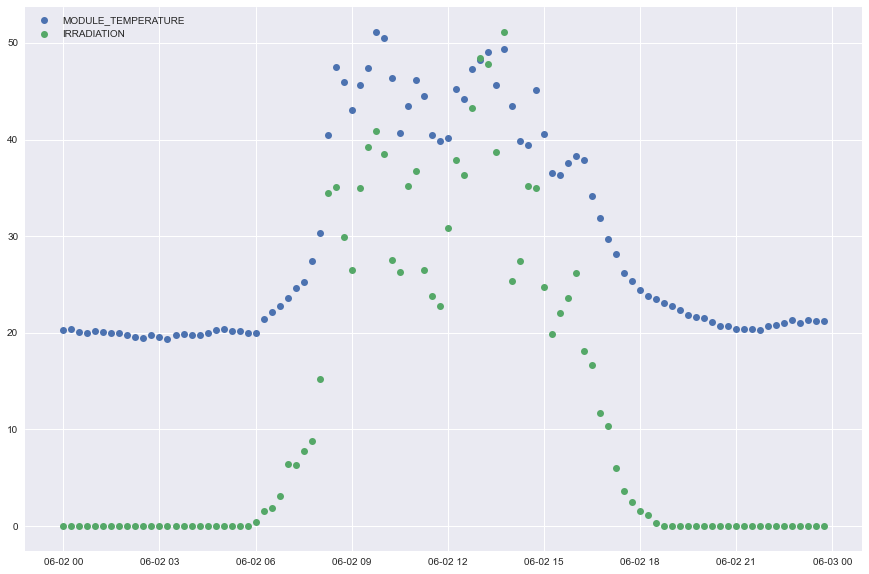

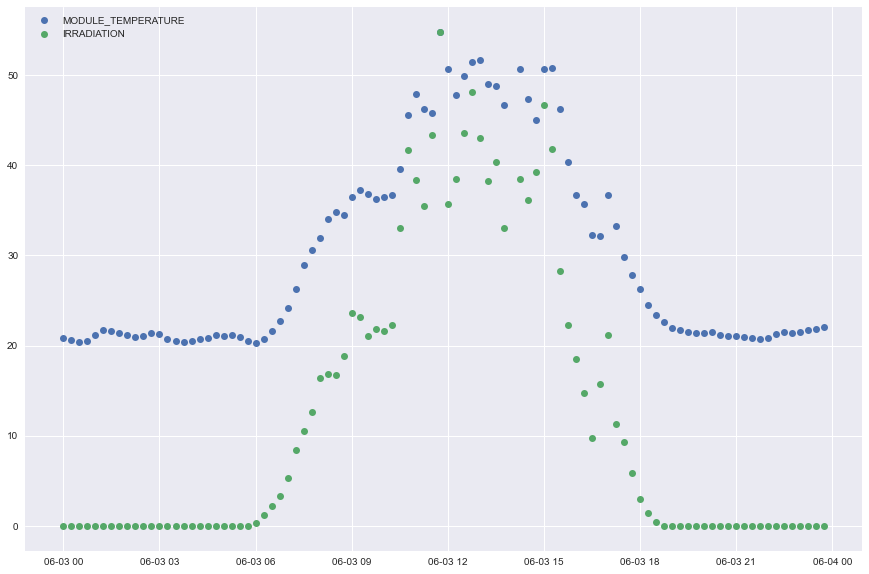

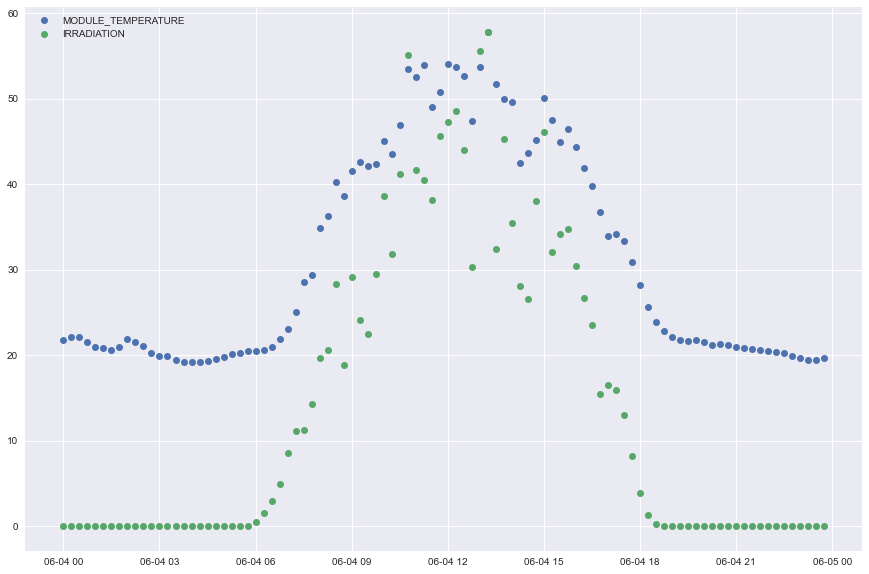

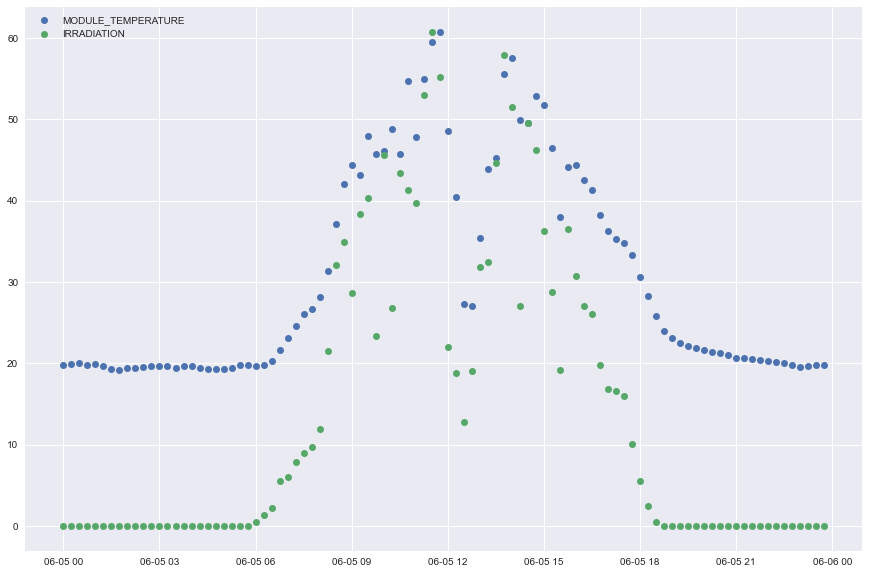

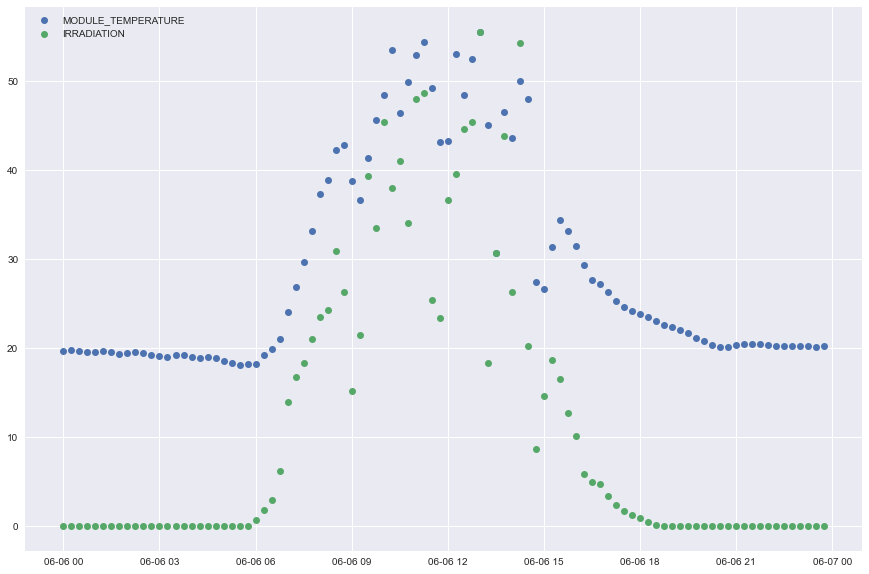

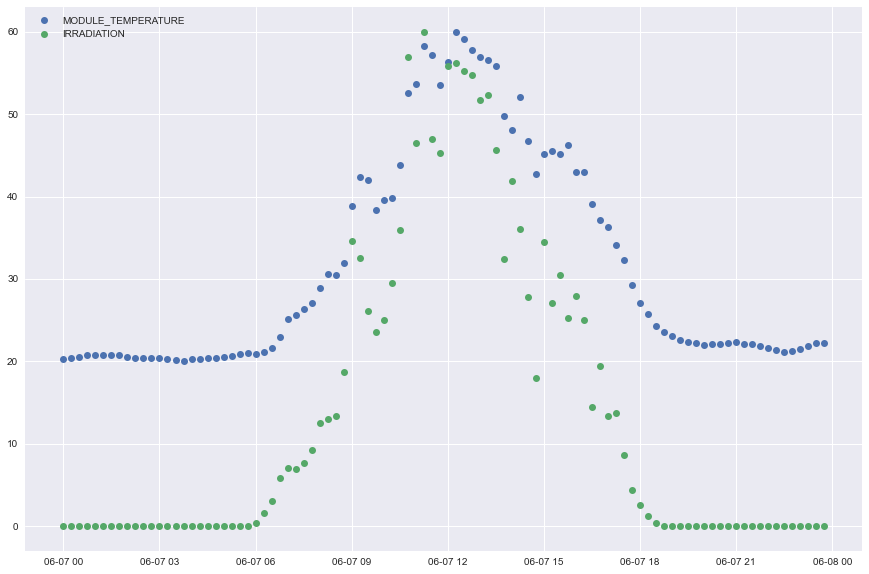

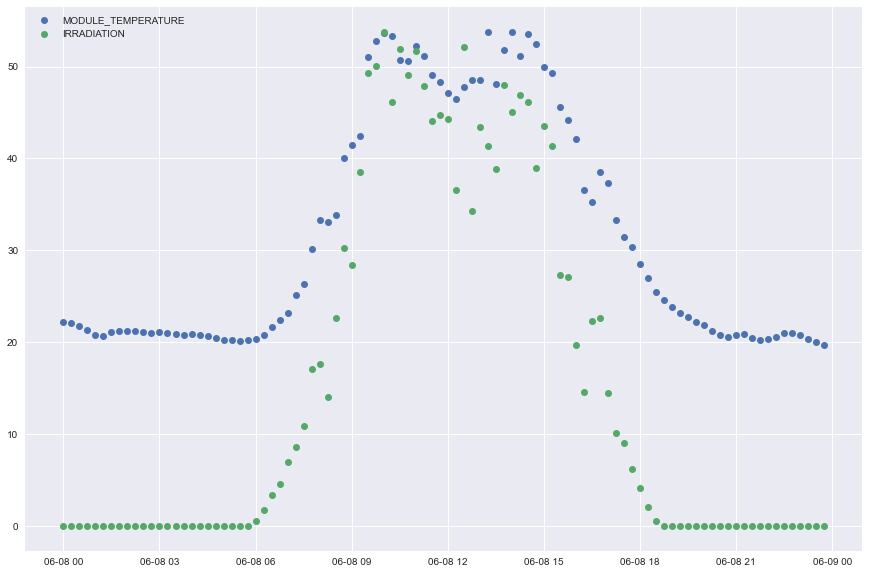

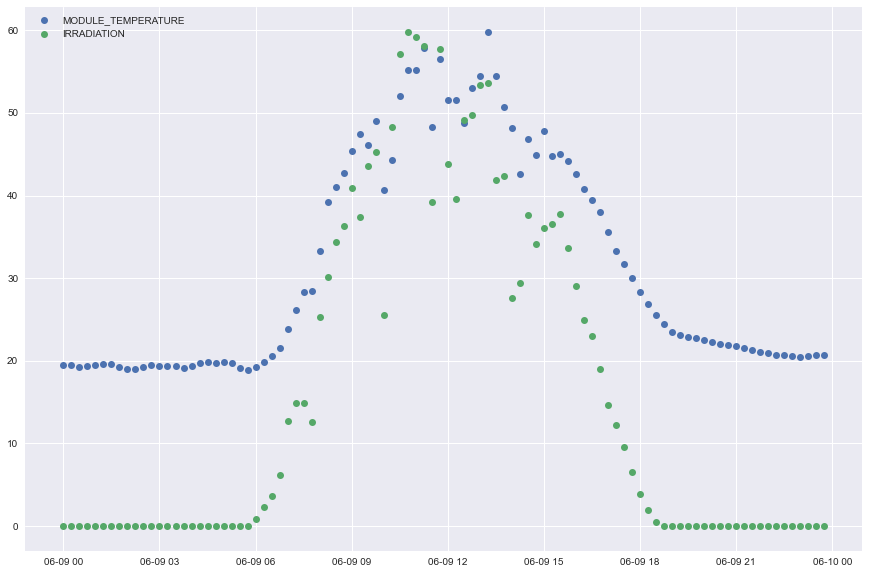

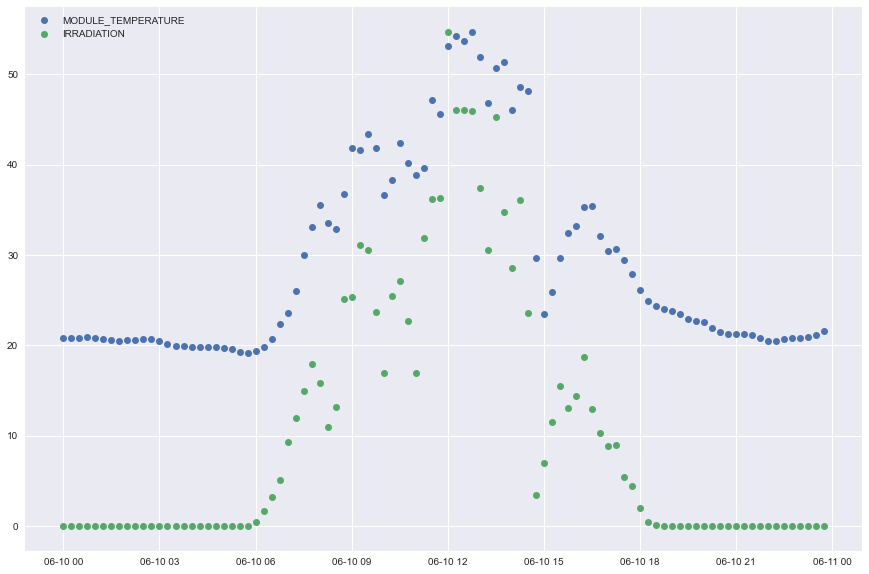

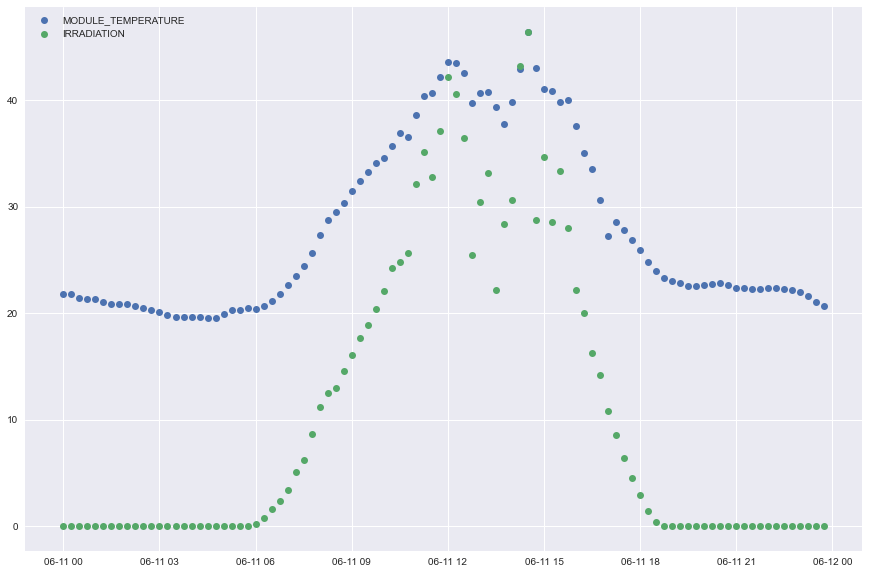

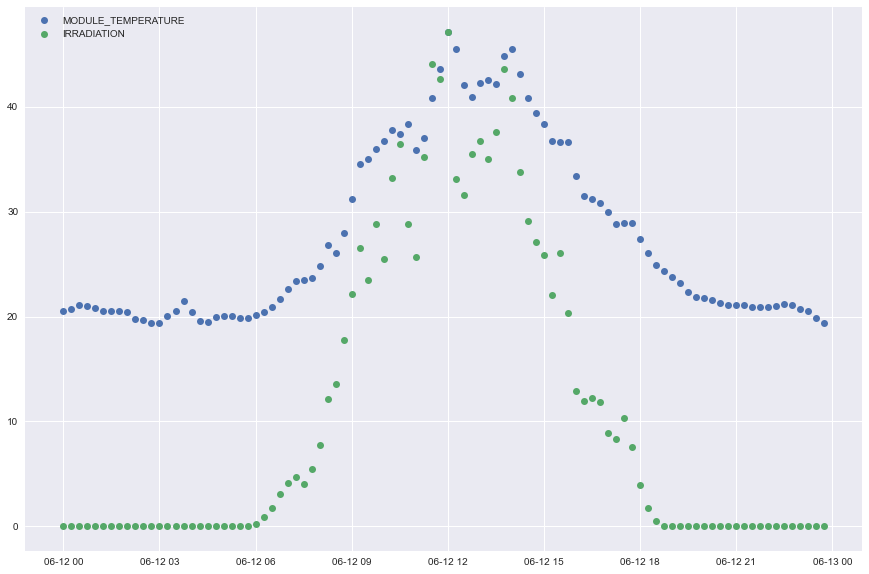

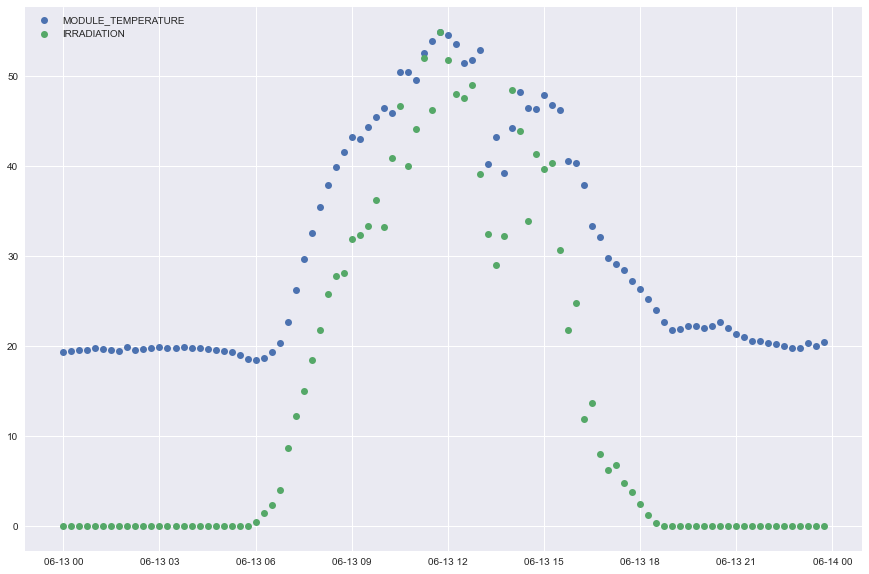

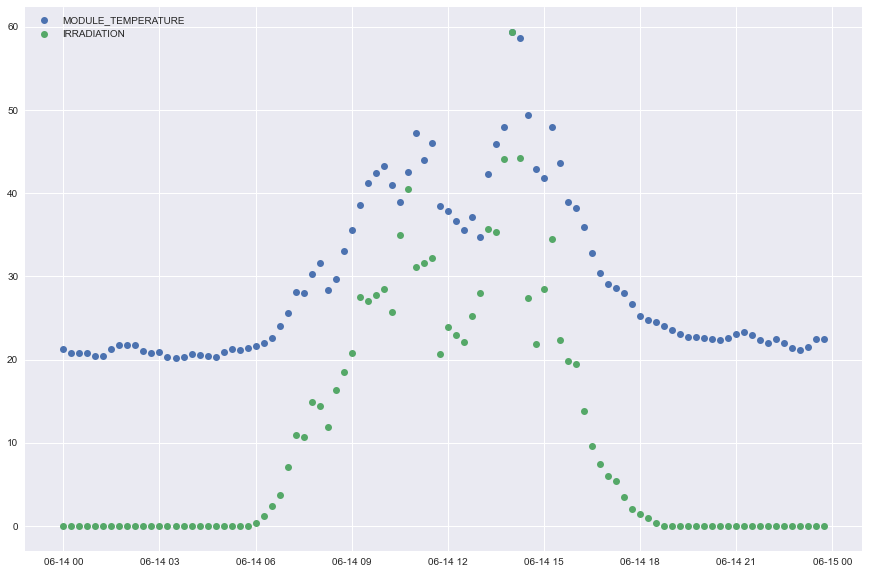

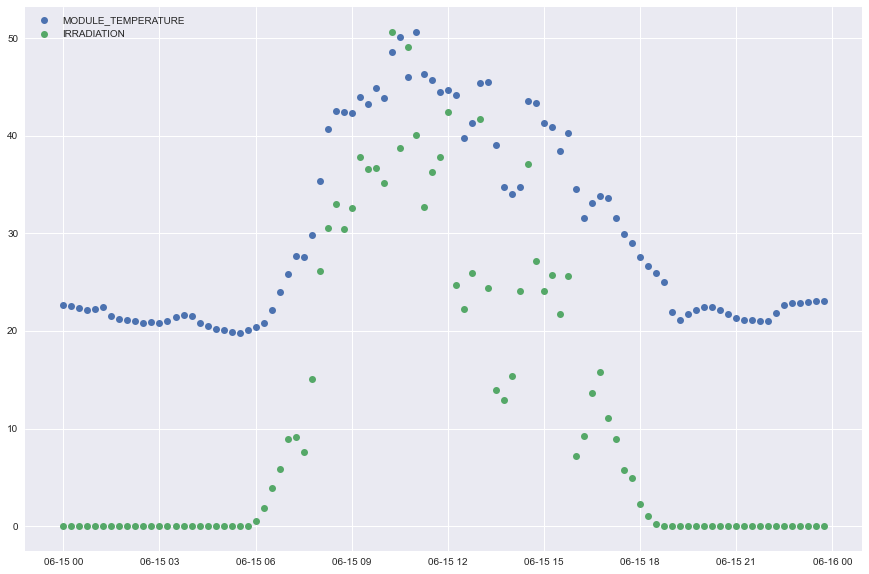

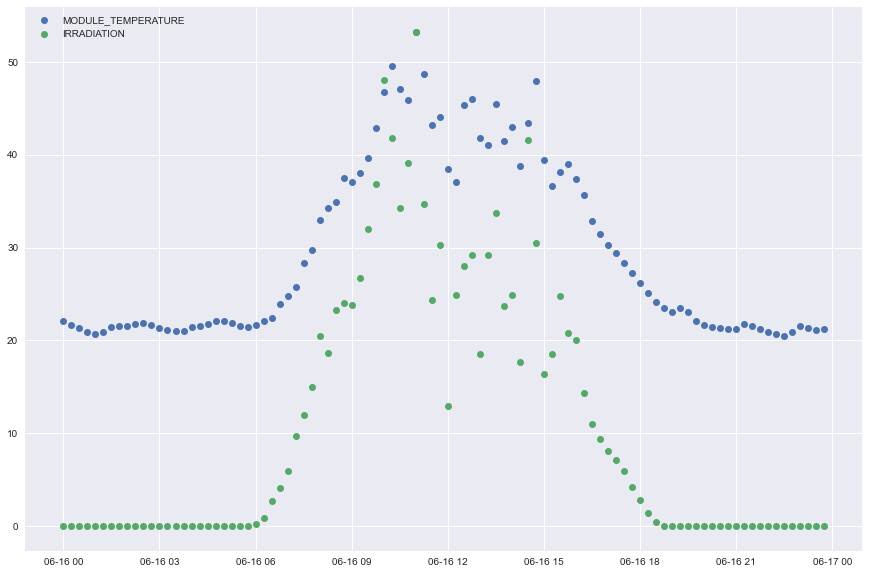

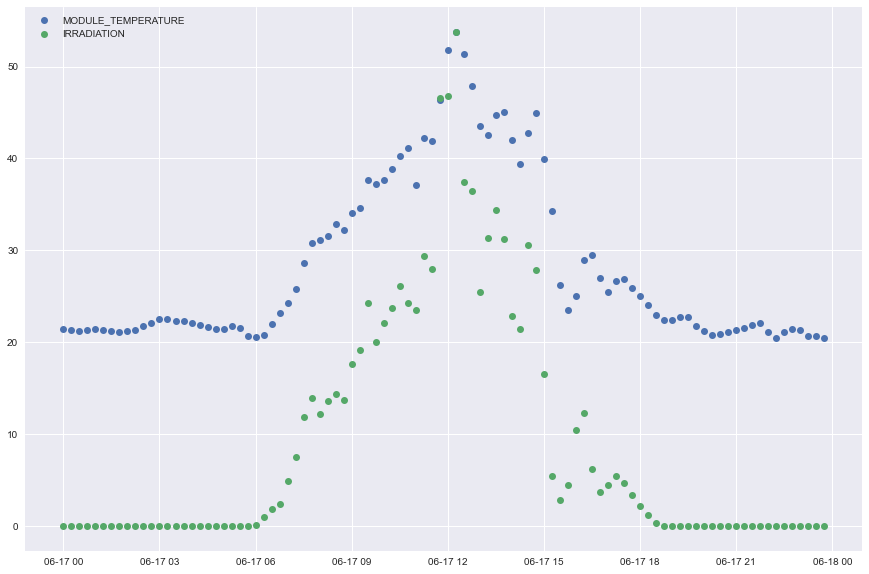

In [9]:
datetime_vs(plant_weat, 'MODULE_TEMPERATURE', 'IRRADIATION')

## Plot ambient temperature vs AC power for a number of inverters of the same plant

Plotting for the 1BY6WEcLGh8j5v7 source key 


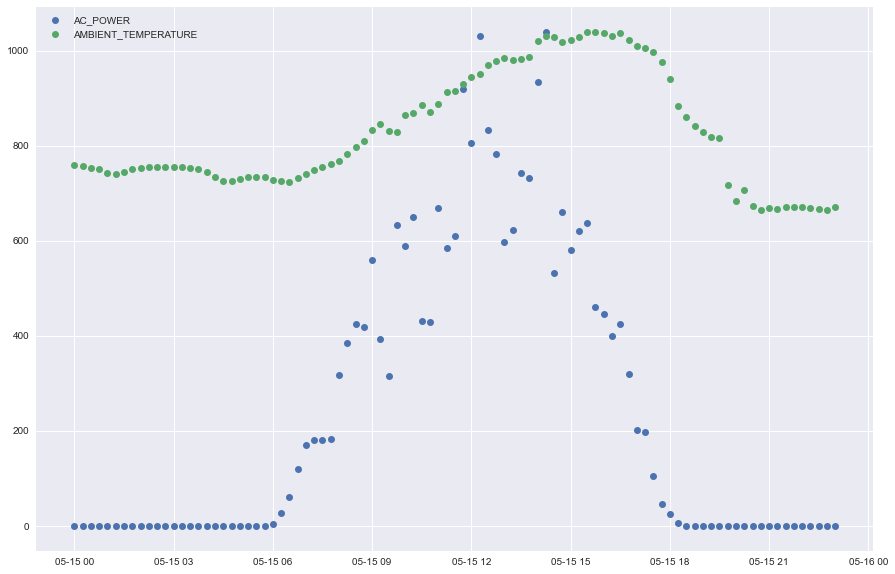

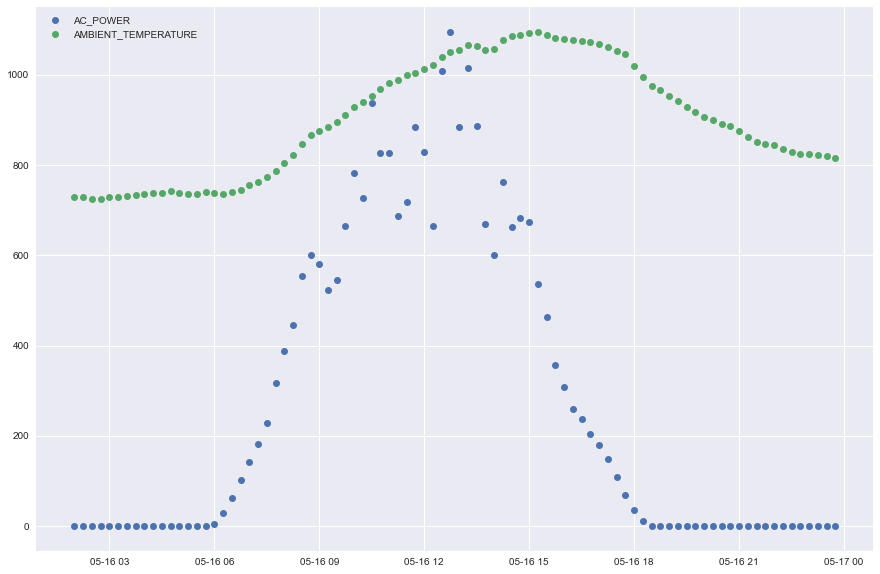

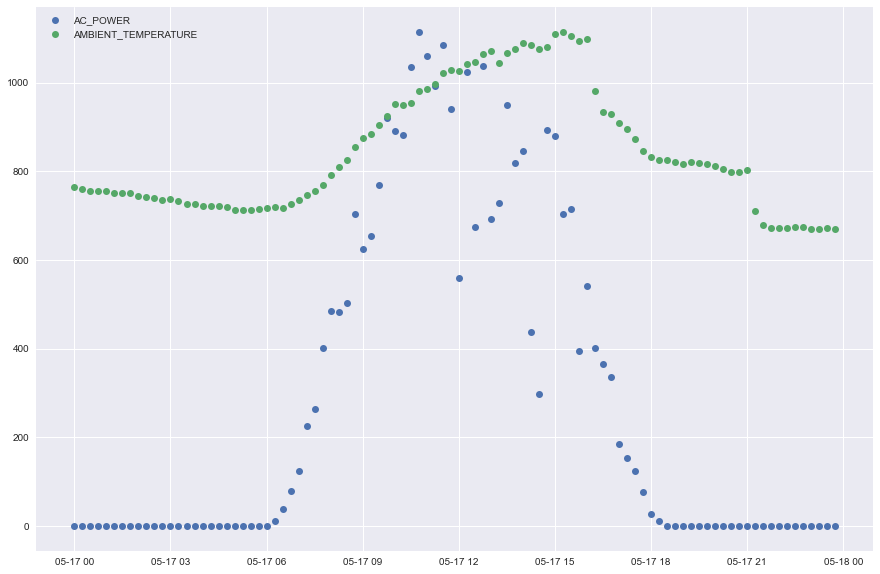

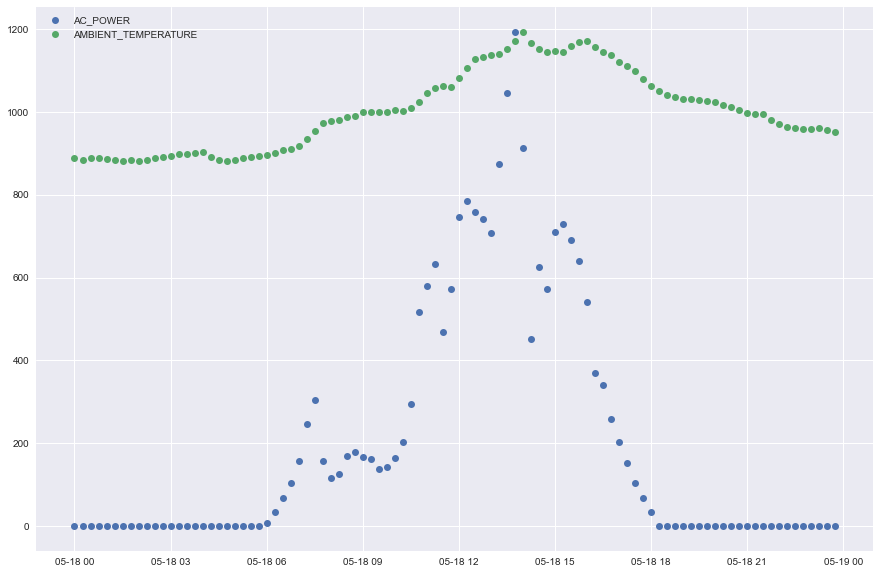

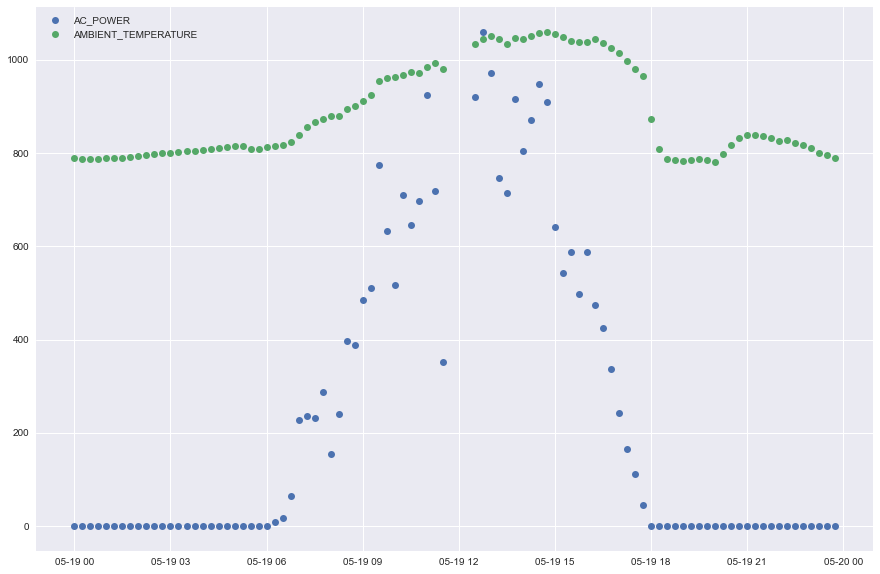

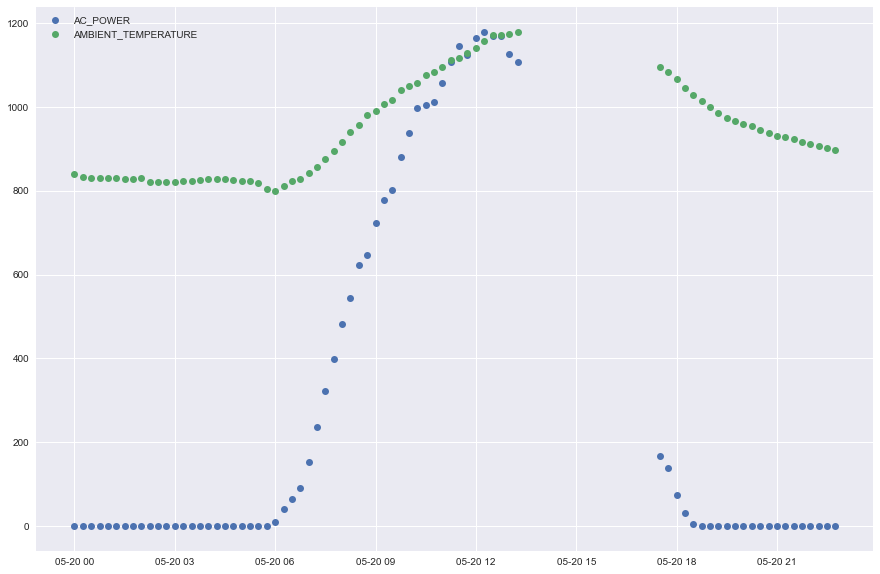

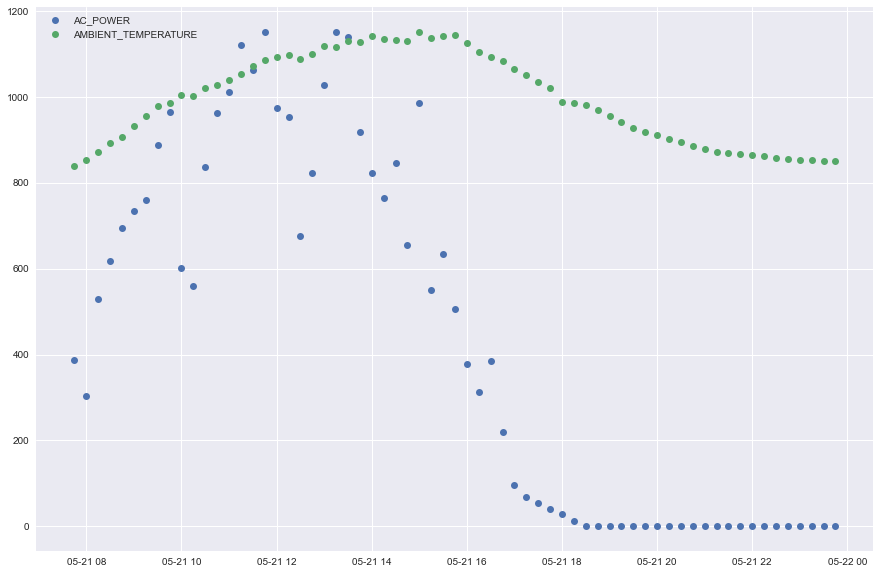

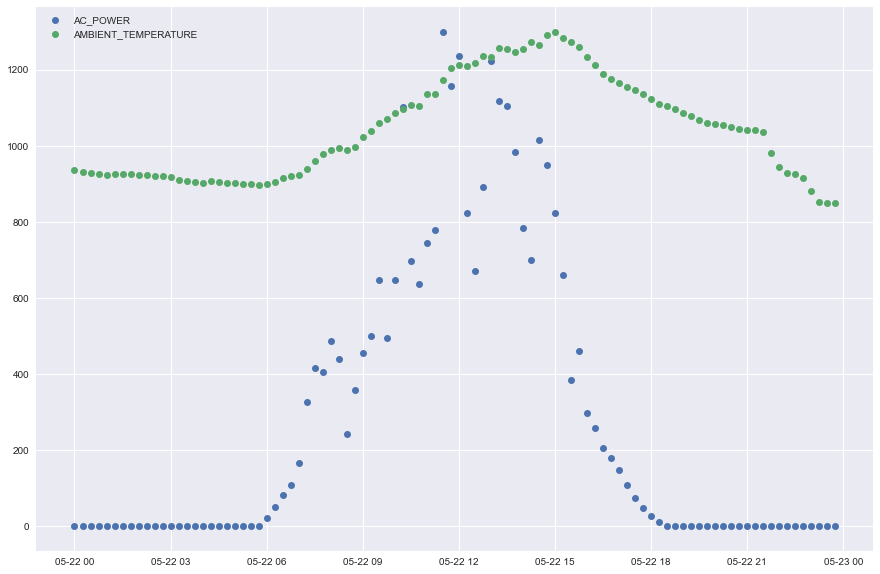

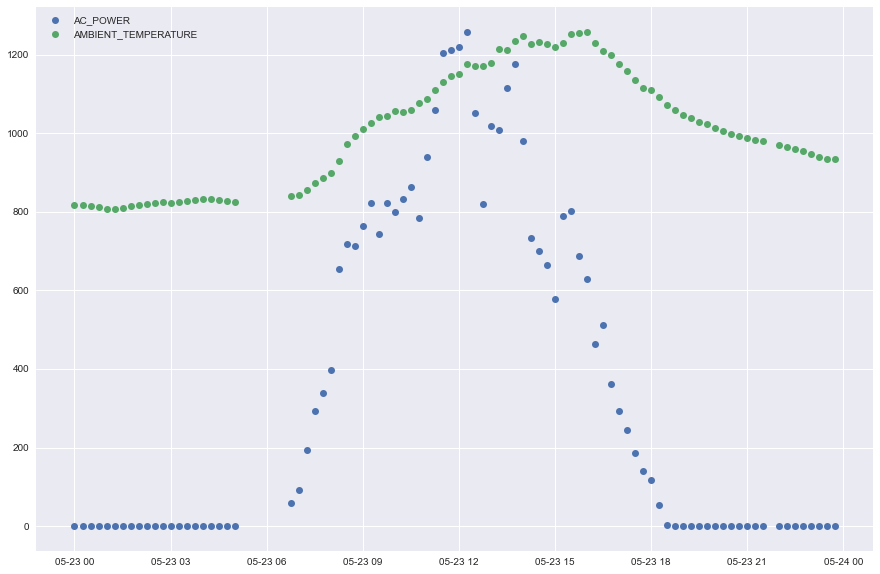

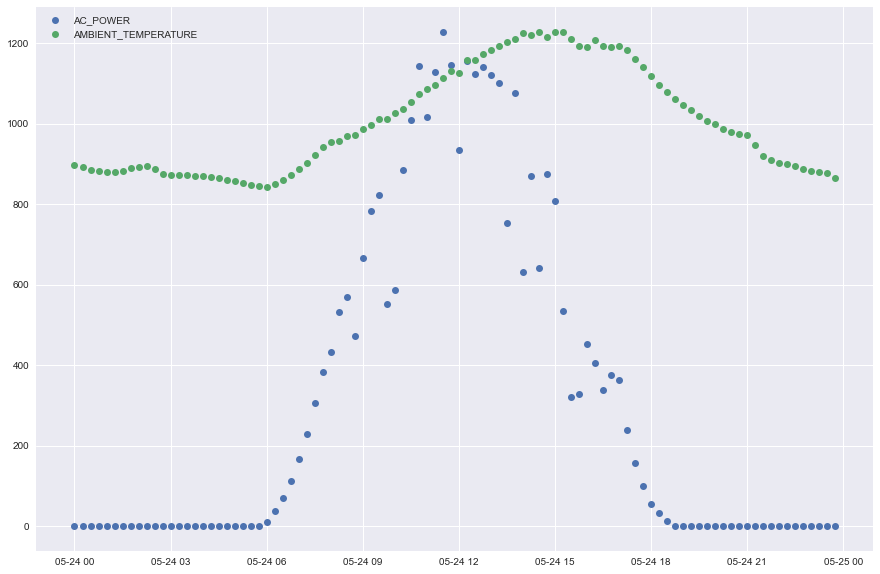

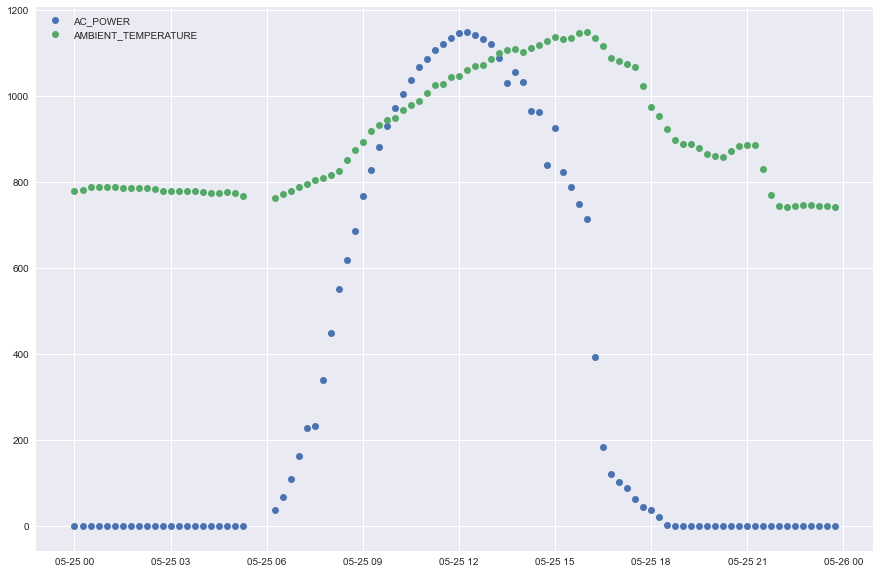

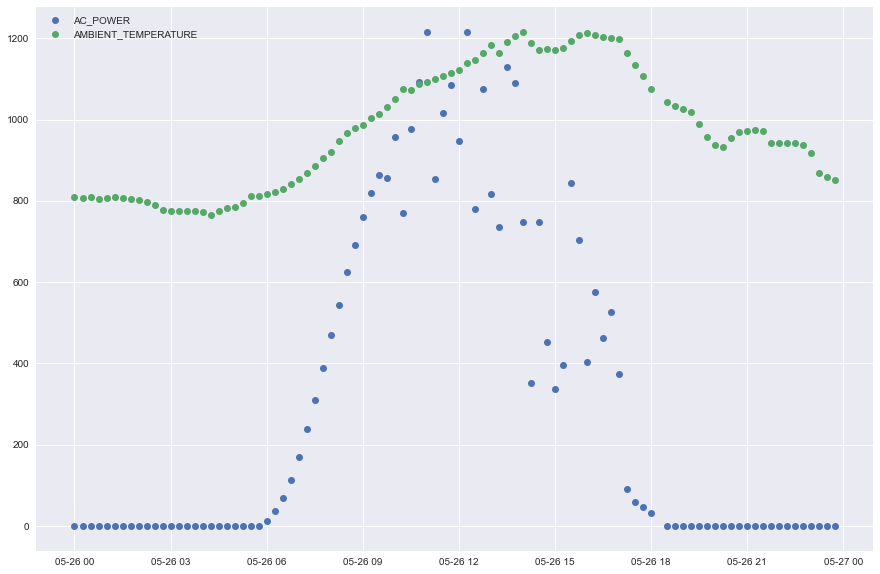

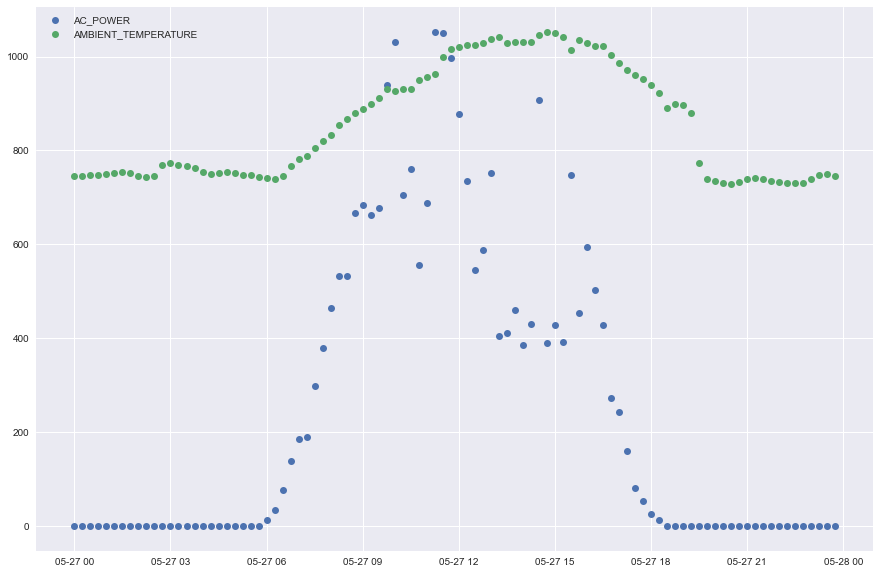

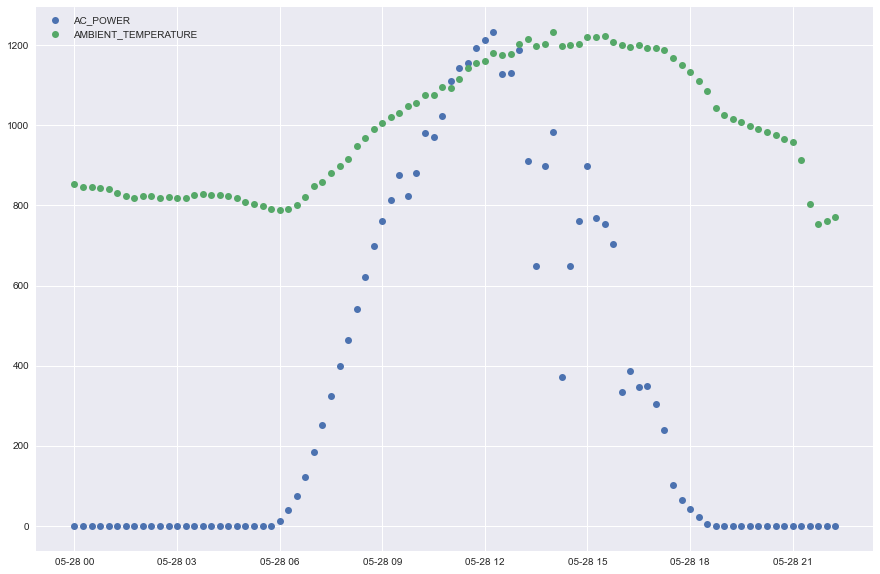

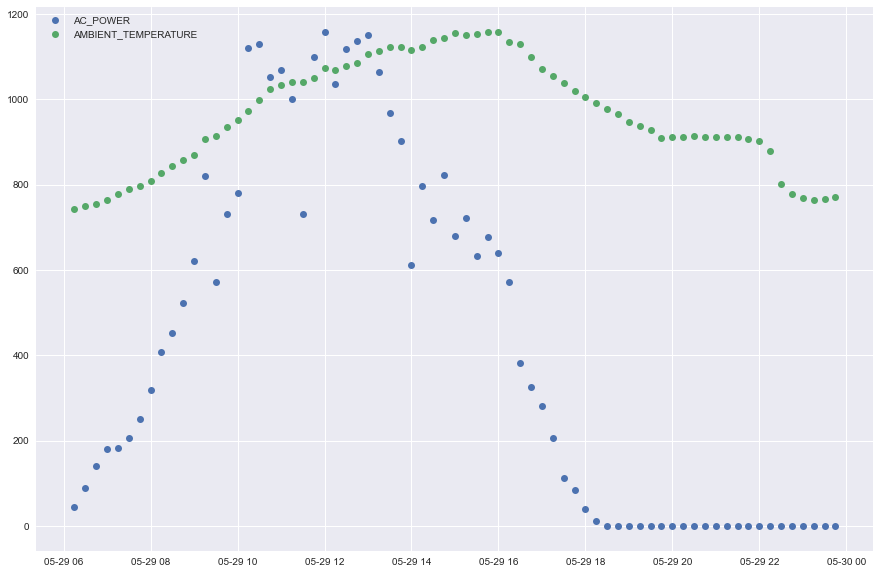

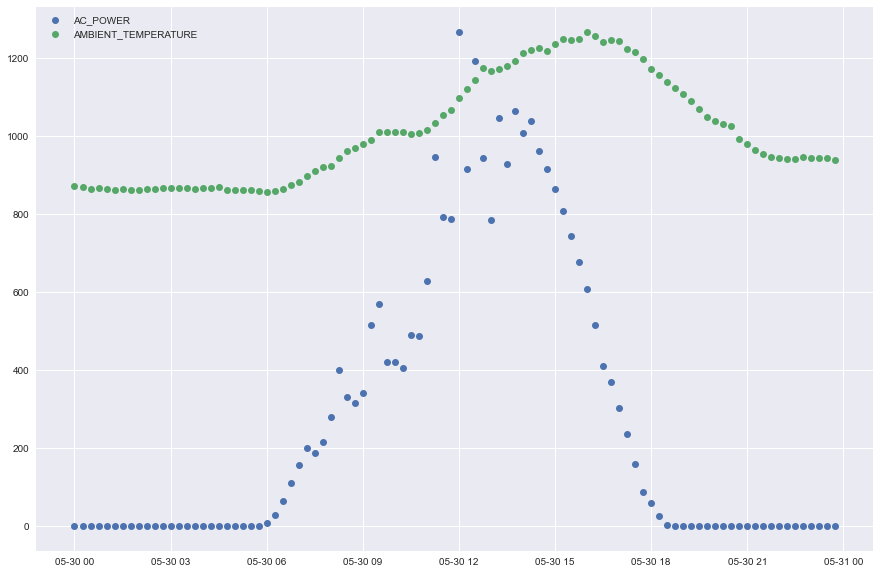

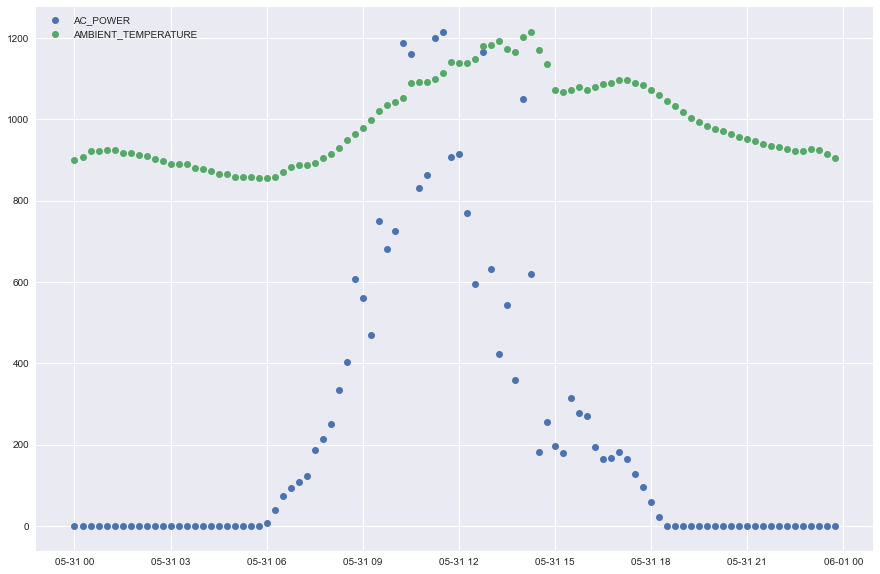

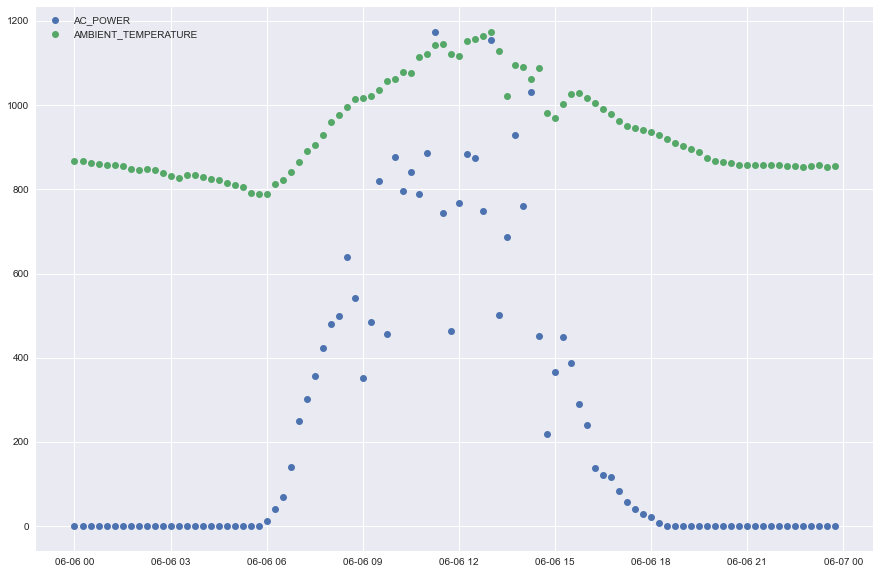

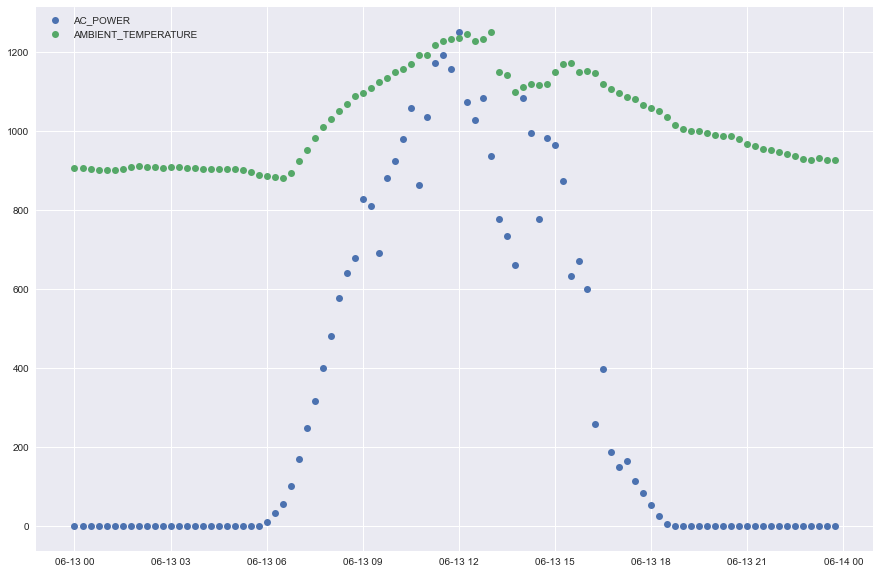

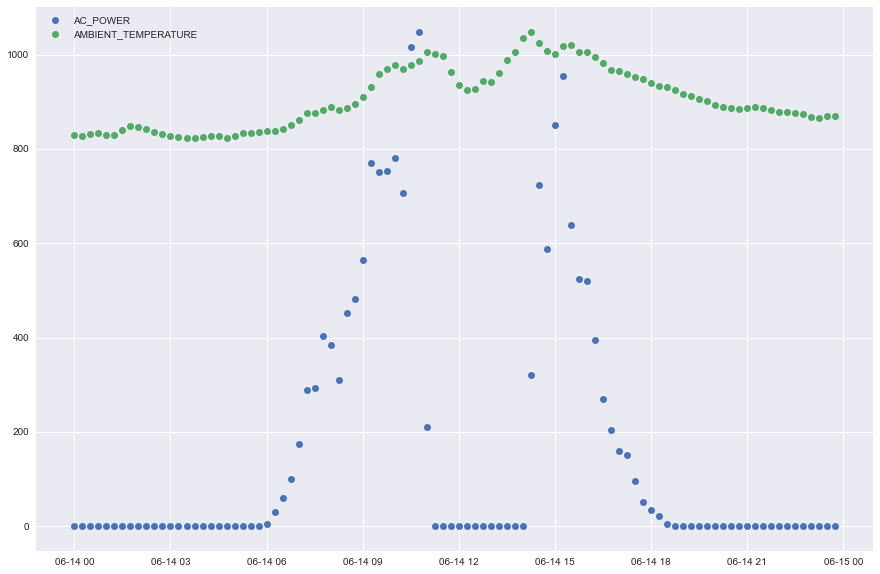

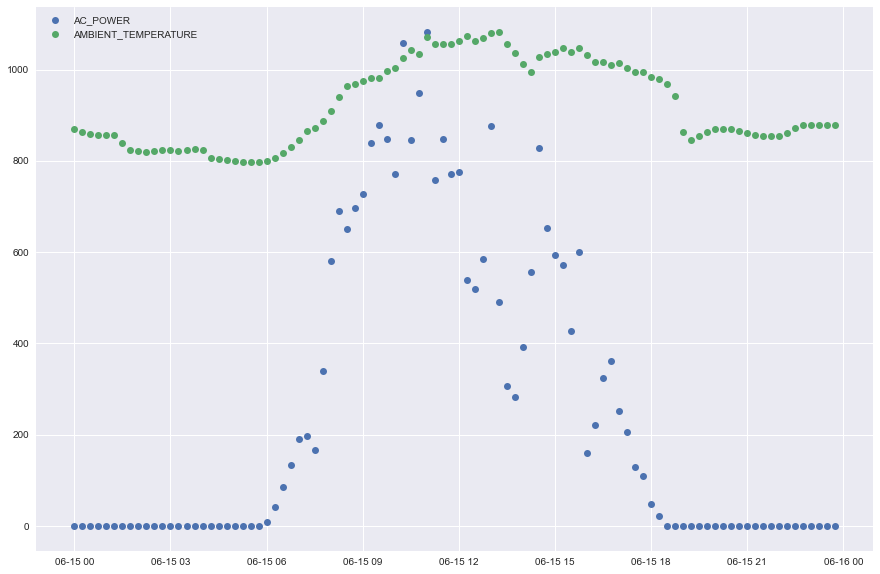

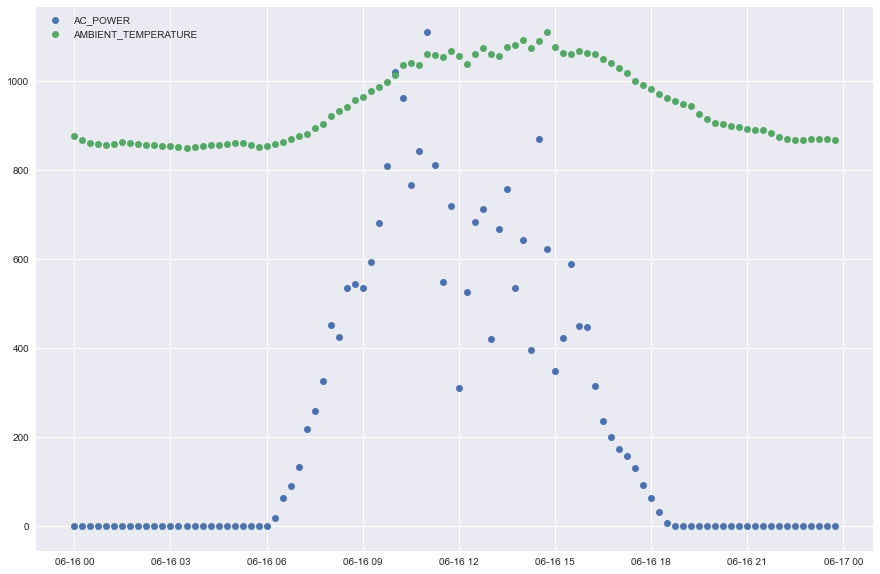

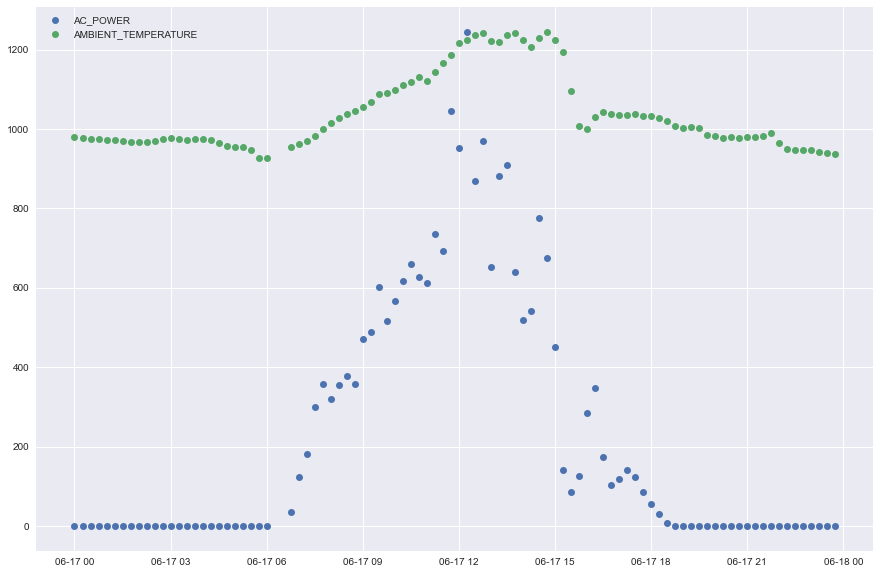

In [10]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'AC_POWER', 'AMBIENT_TEMPERATURE')

## Plot ambient temperature vs DC for a number of inverters of the same plant

Plotting for the 1BY6WEcLGh8j5v7 source key 


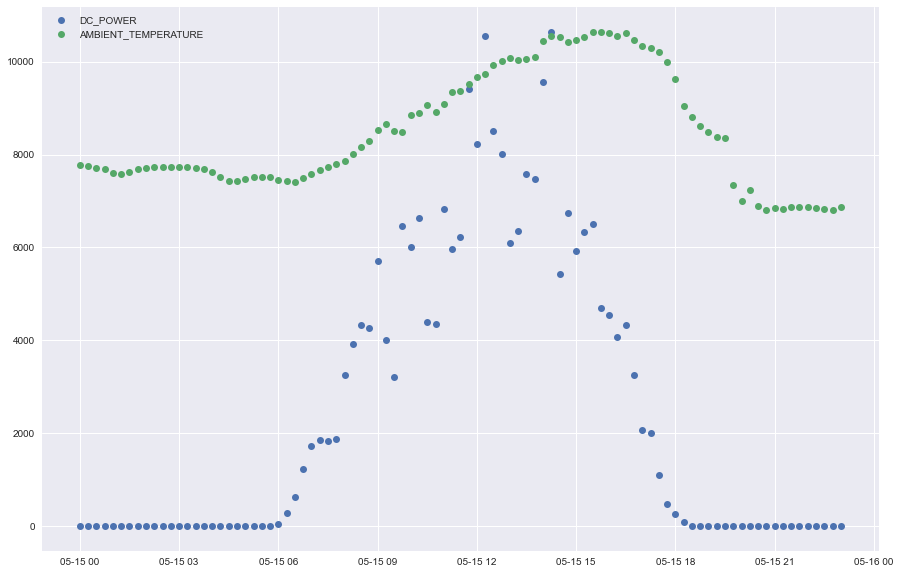

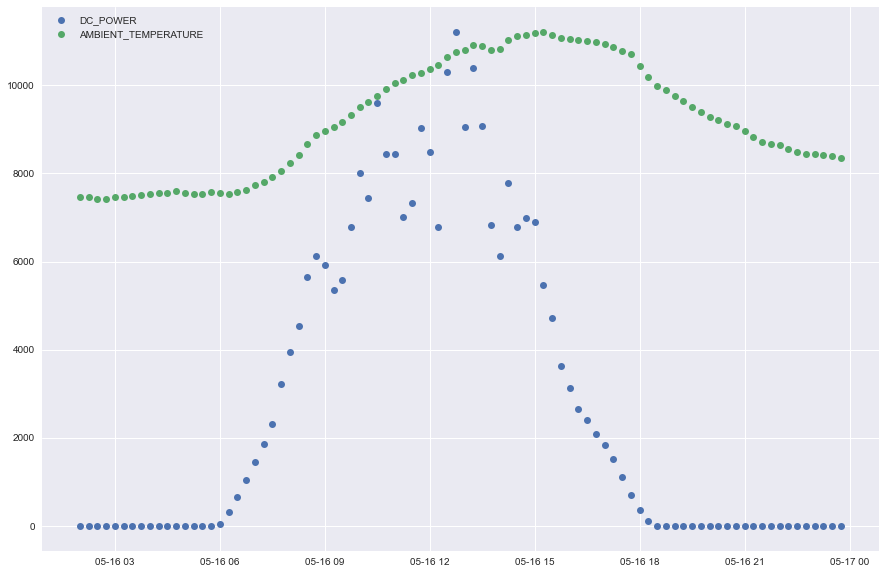

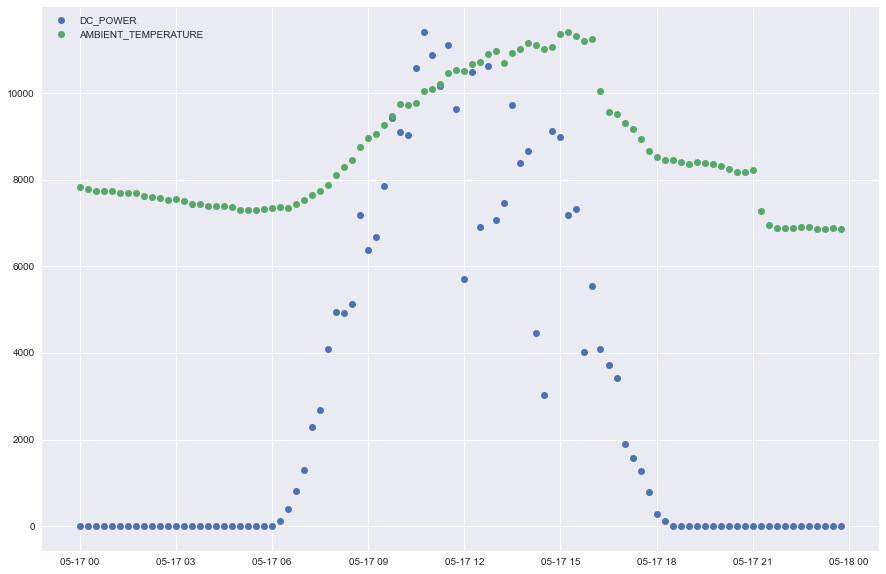

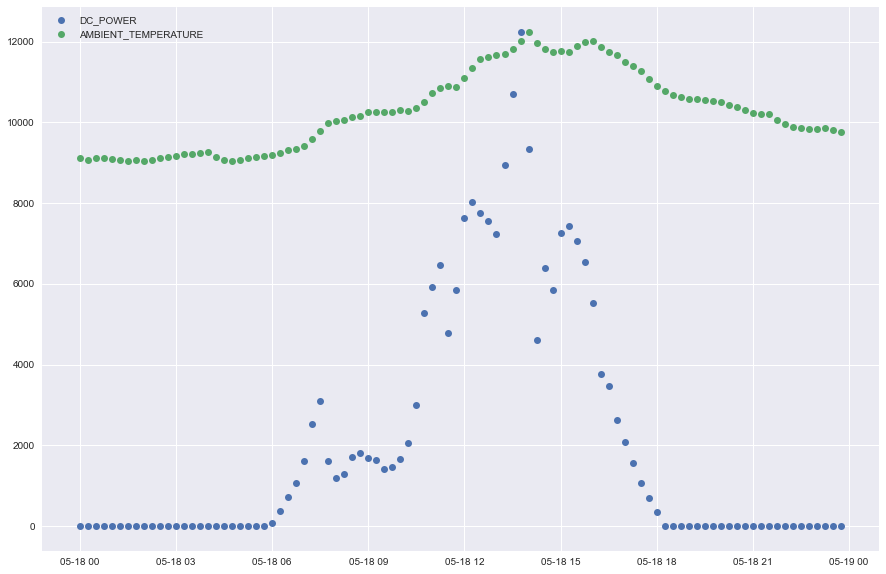

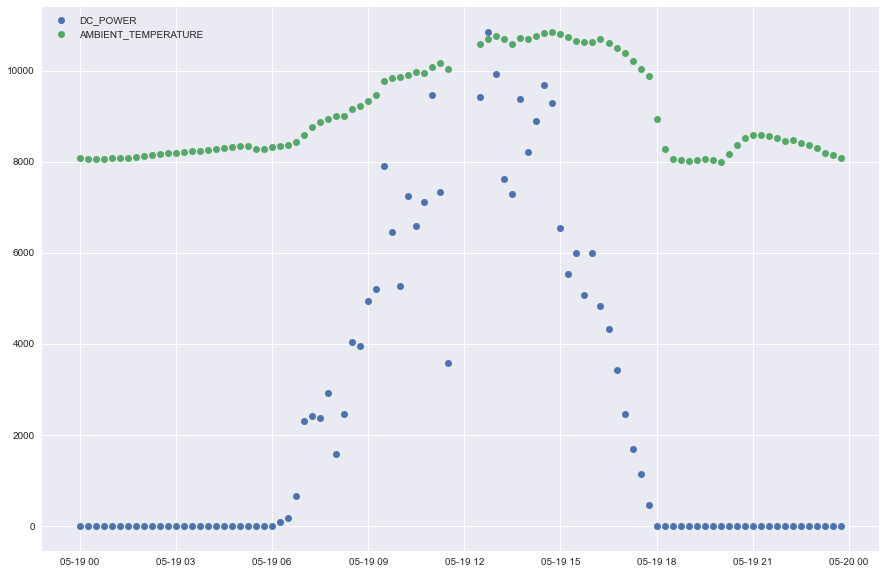

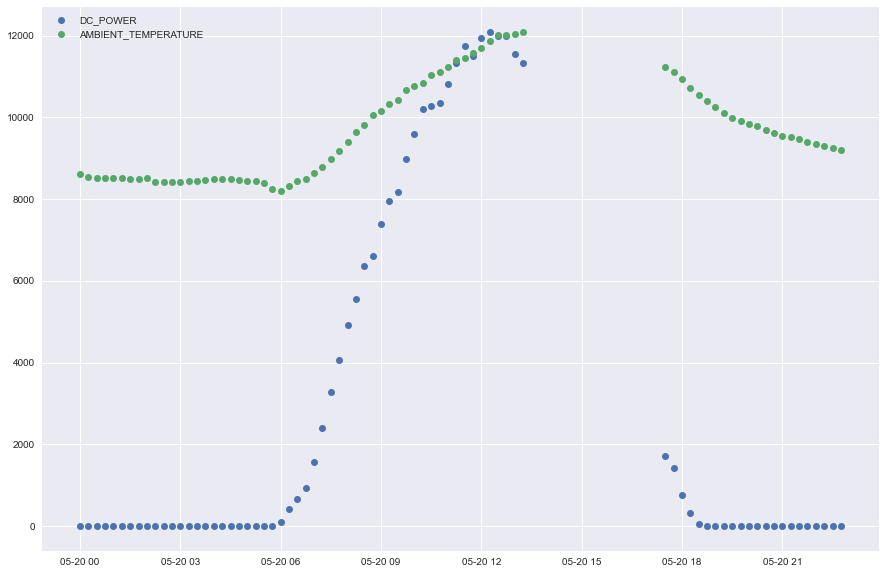

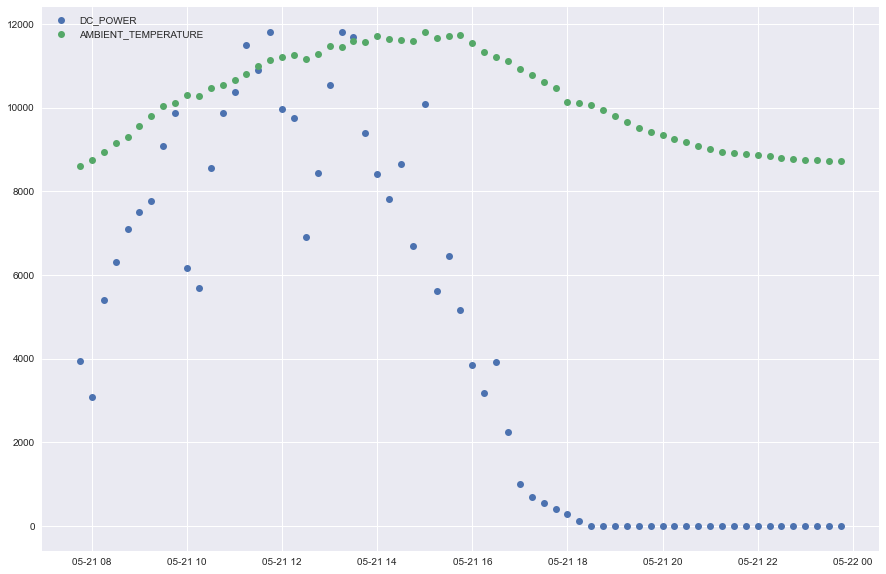

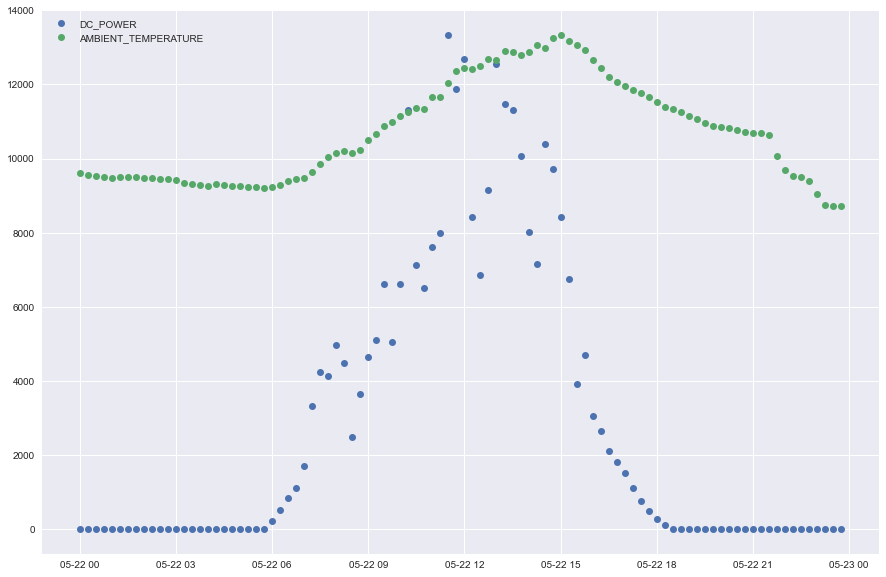

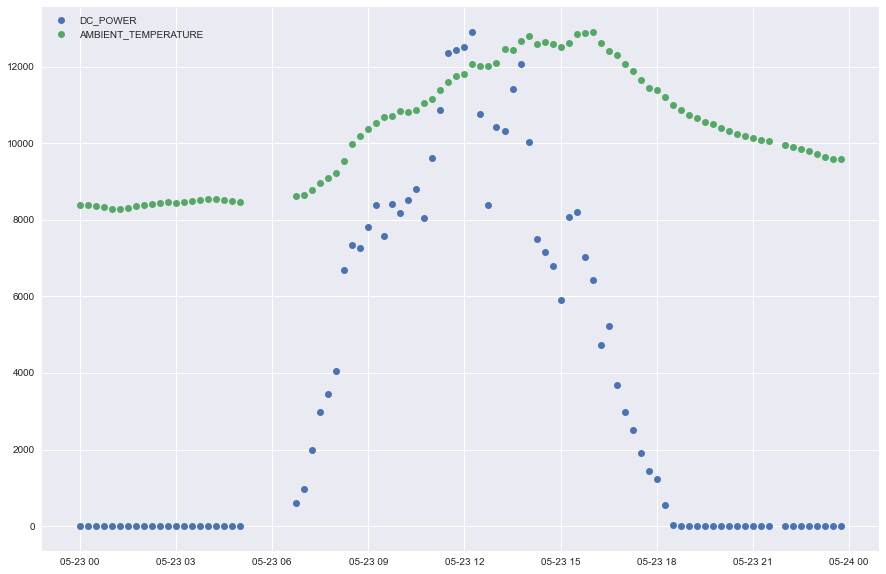

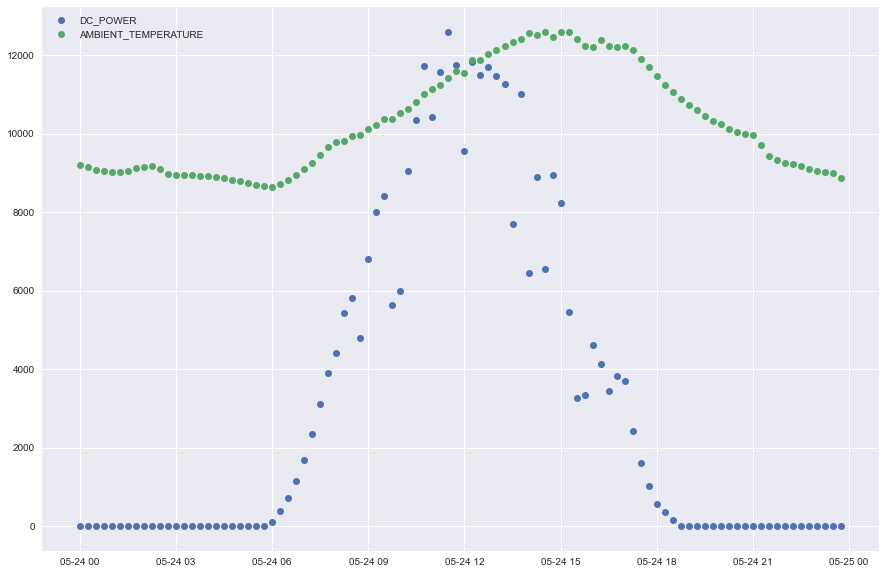

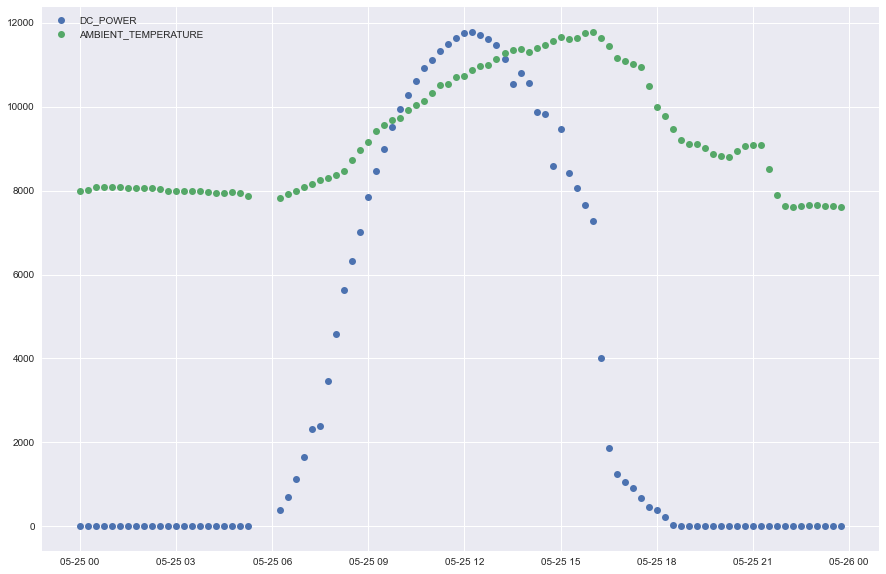

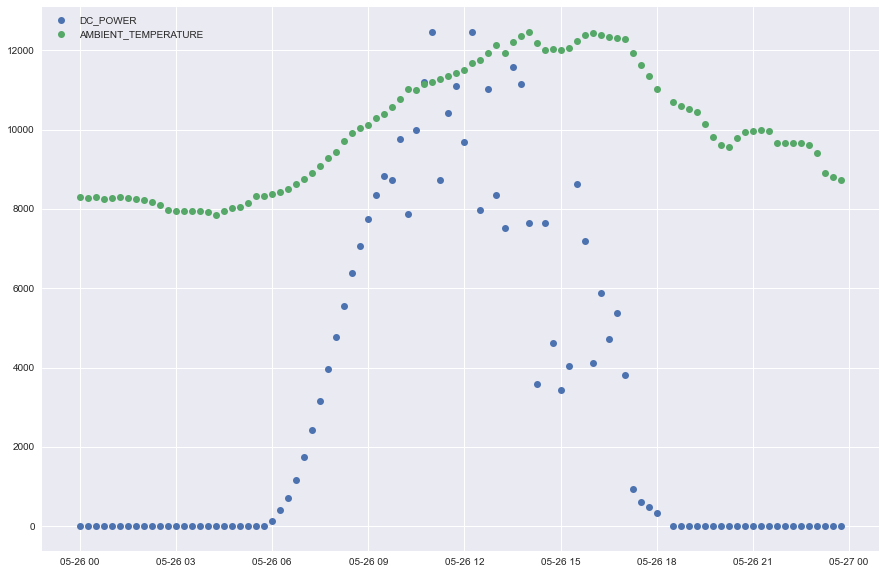

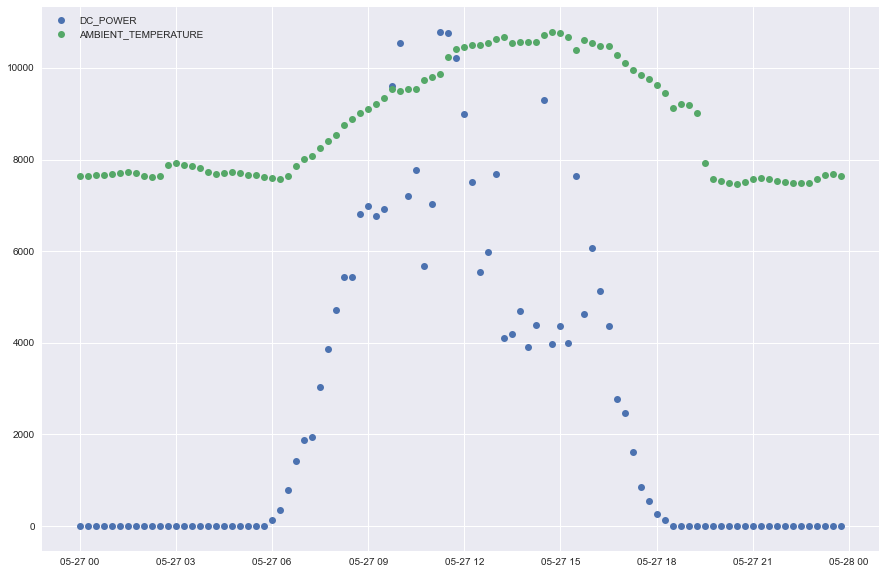

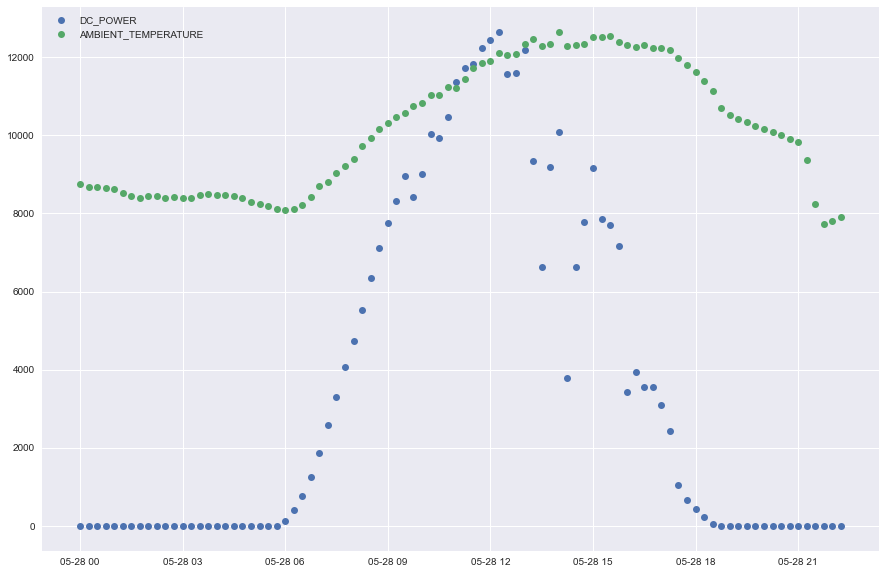

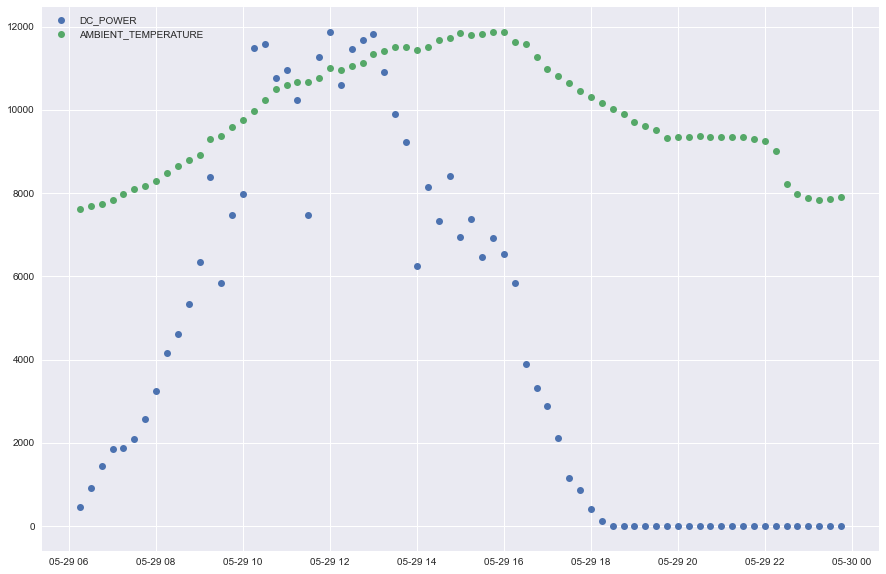

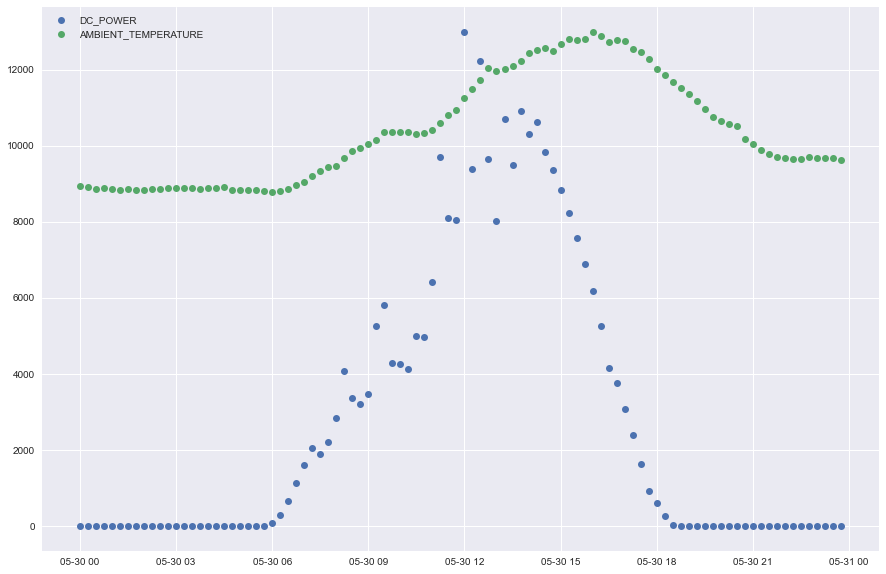

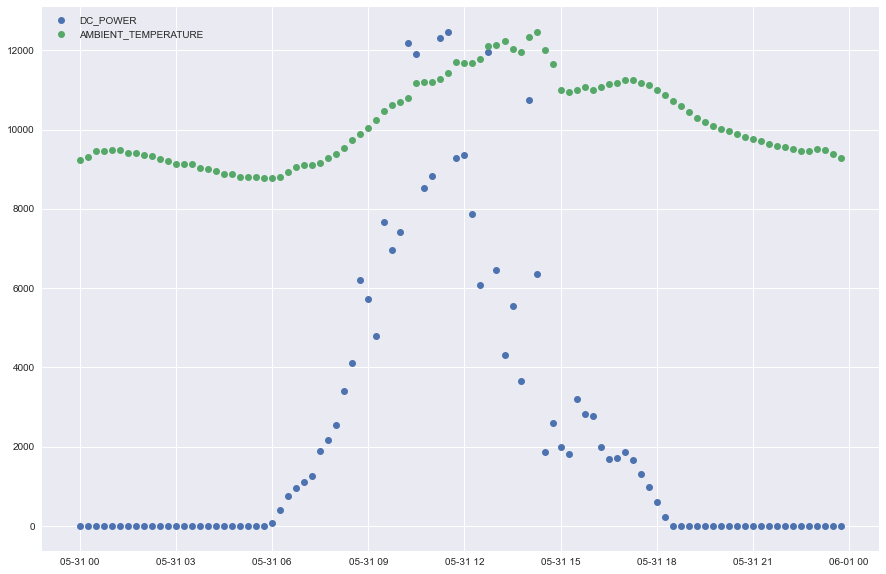

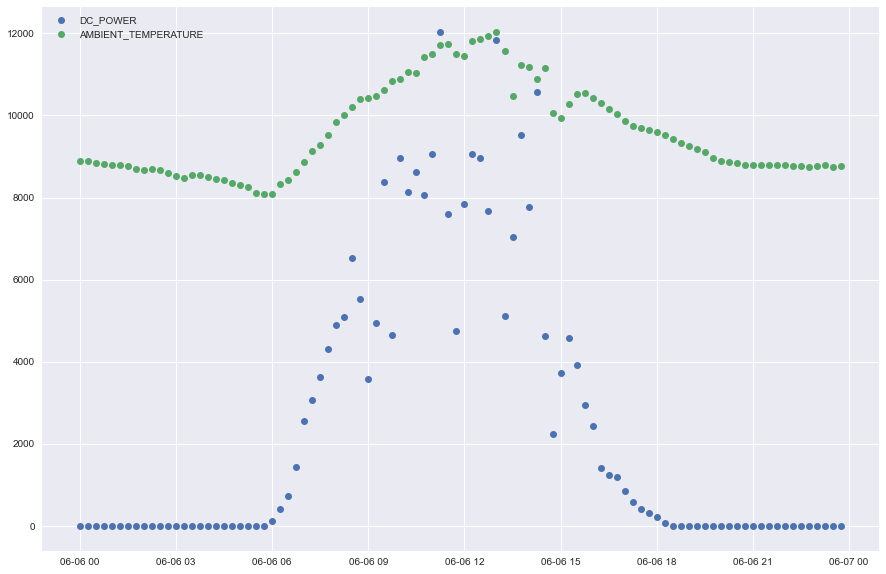

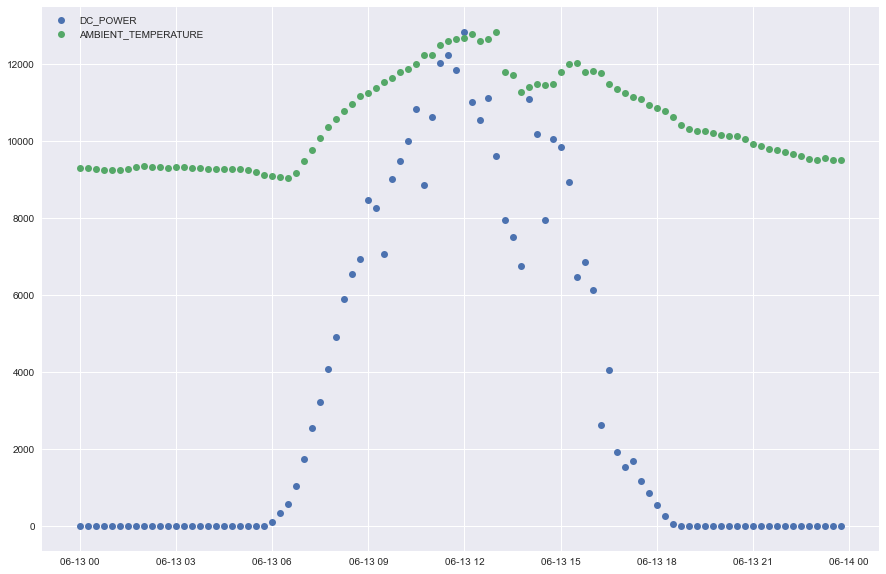

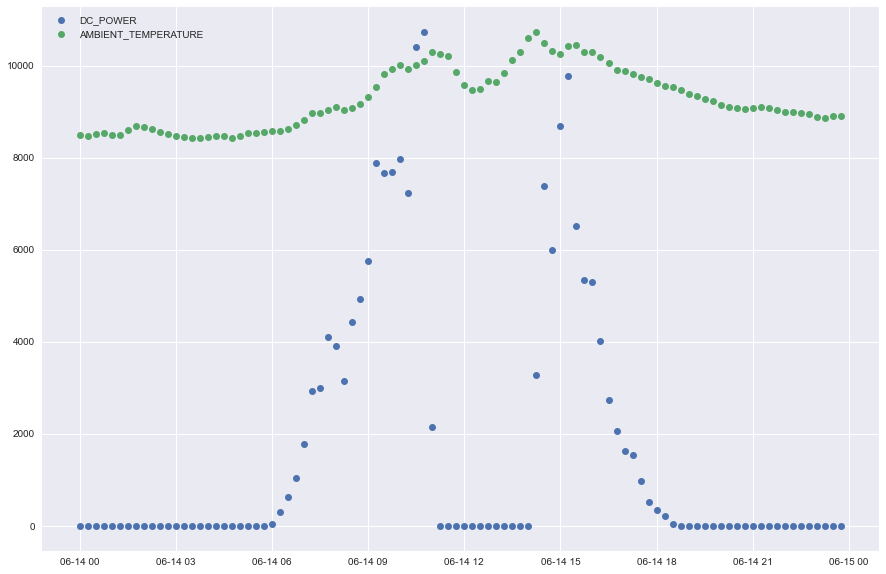

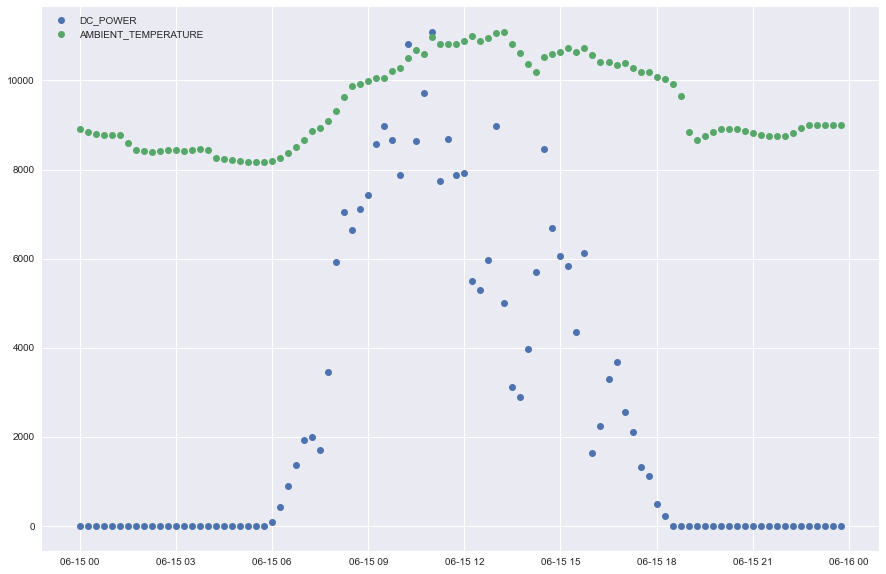

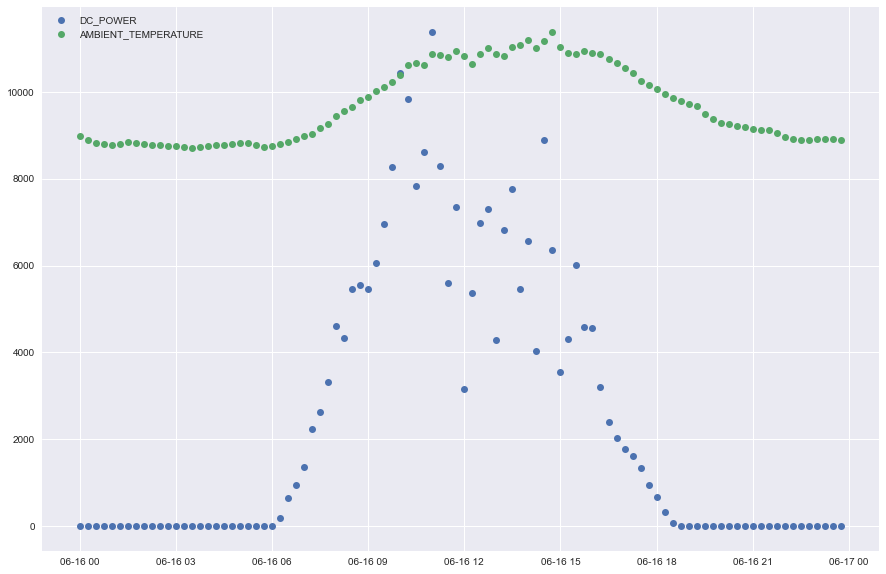

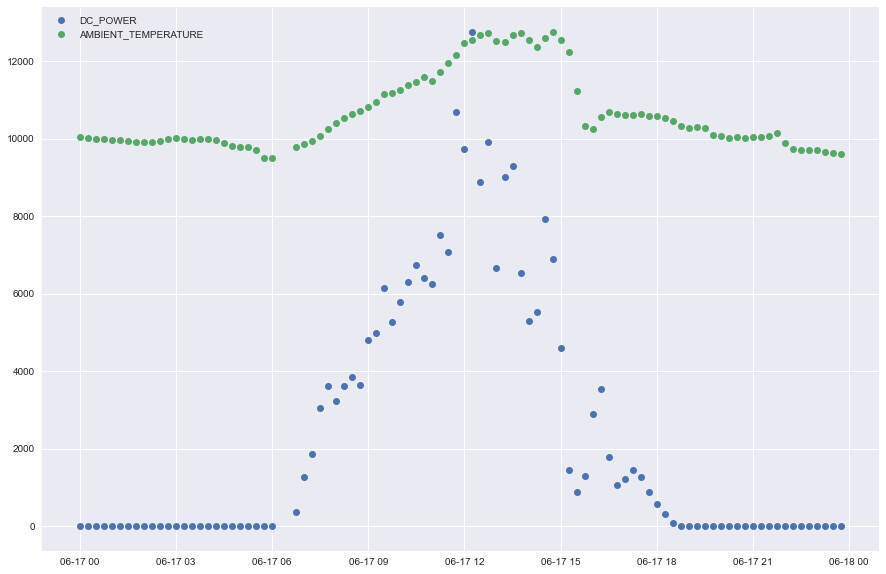

In [11]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DC_POWER', 'AMBIENT_TEMPERATURE')

## Plot module temperature vs AC power for a number of inverters of the same plant

Plotting for the 1BY6WEcLGh8j5v7 source key 


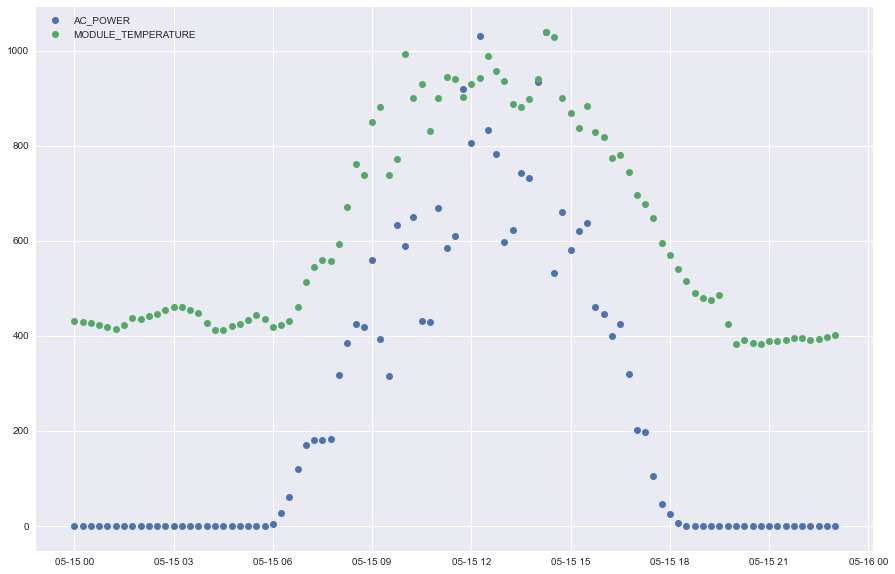

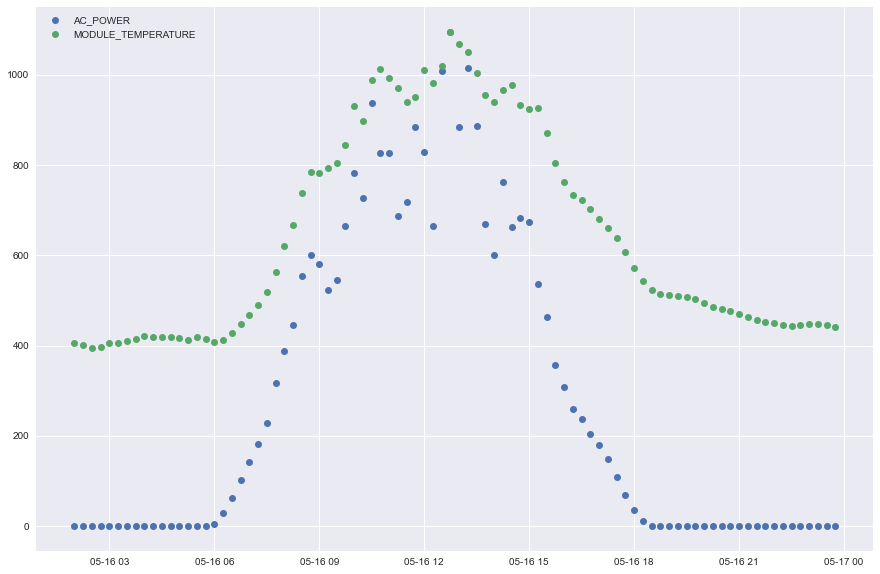

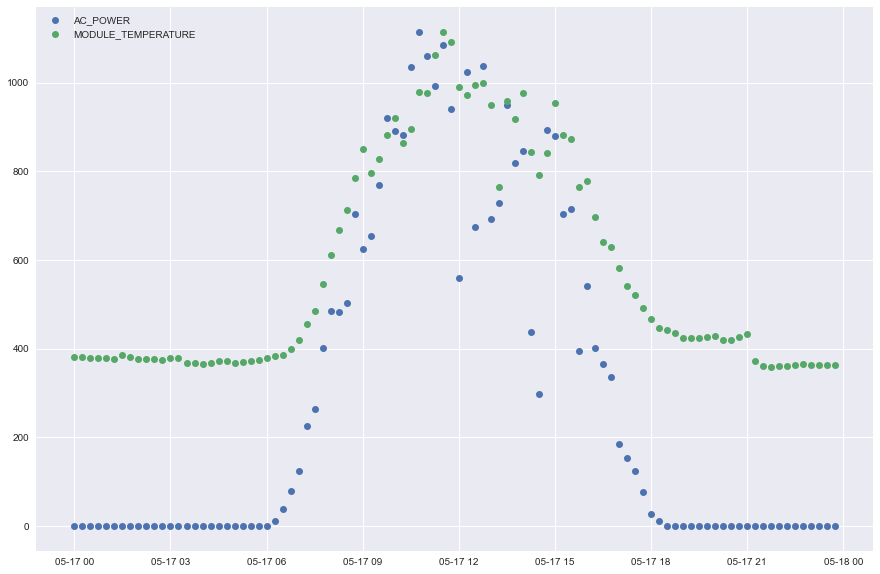

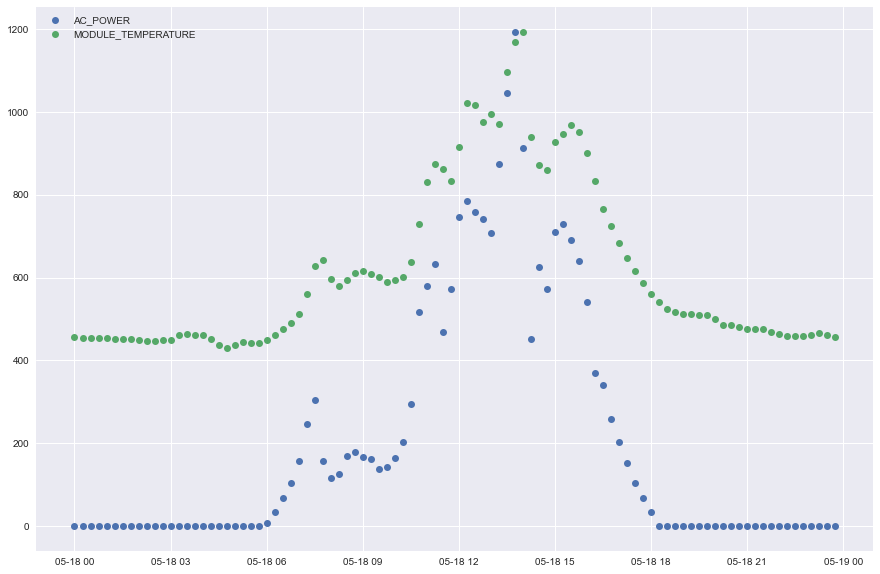

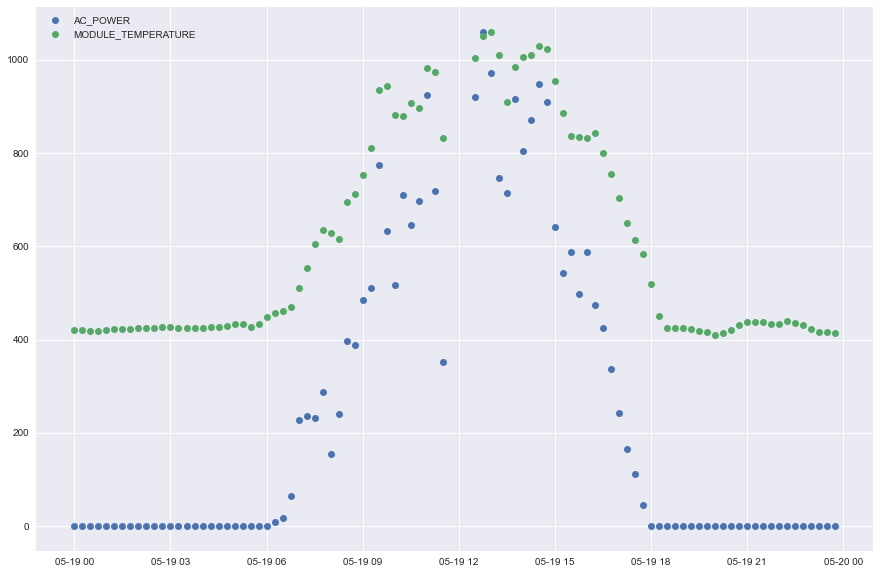

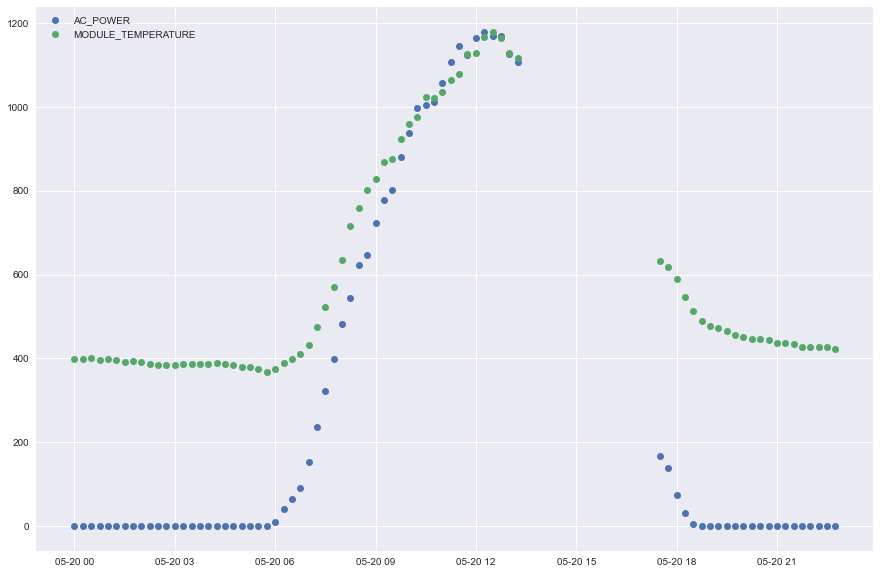

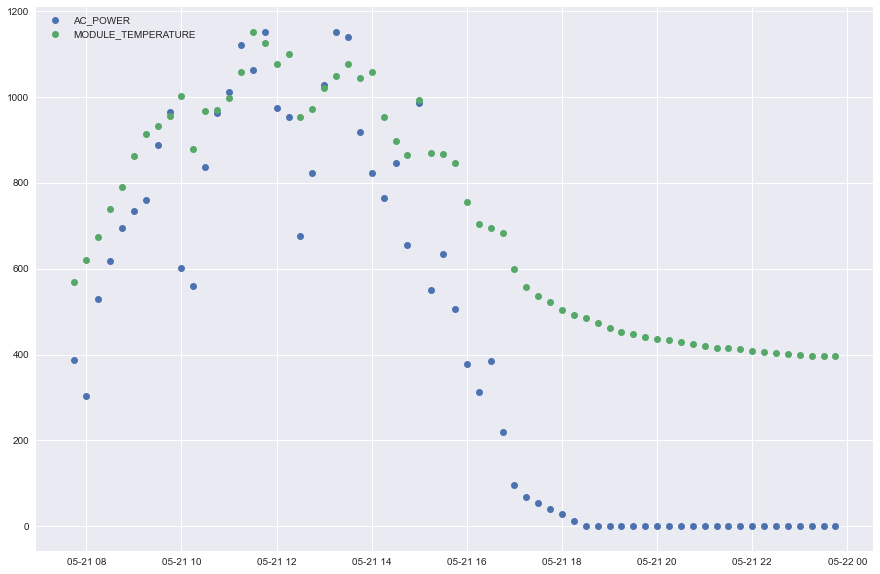

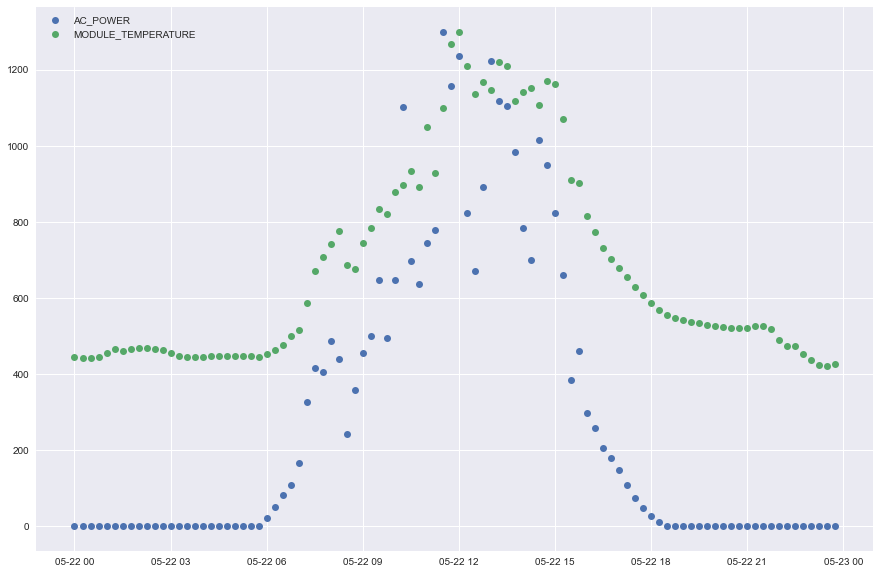

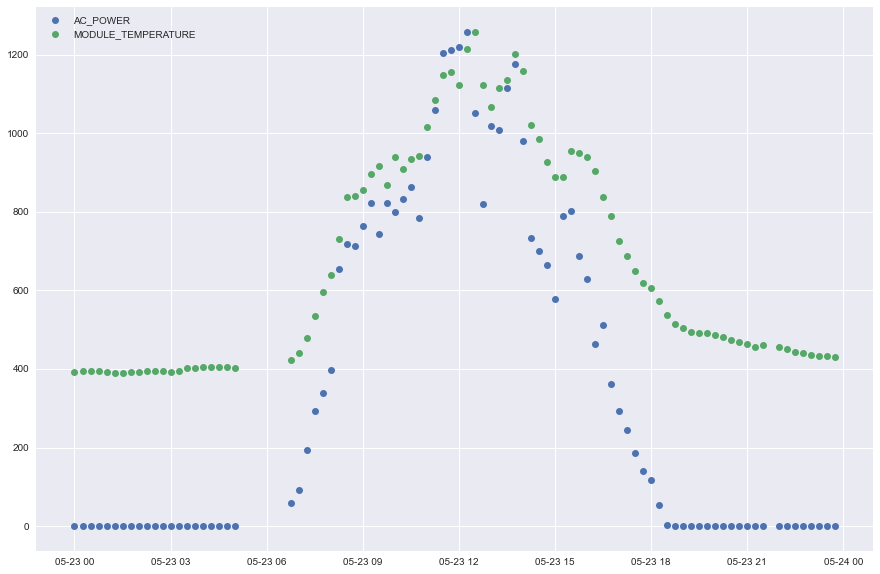

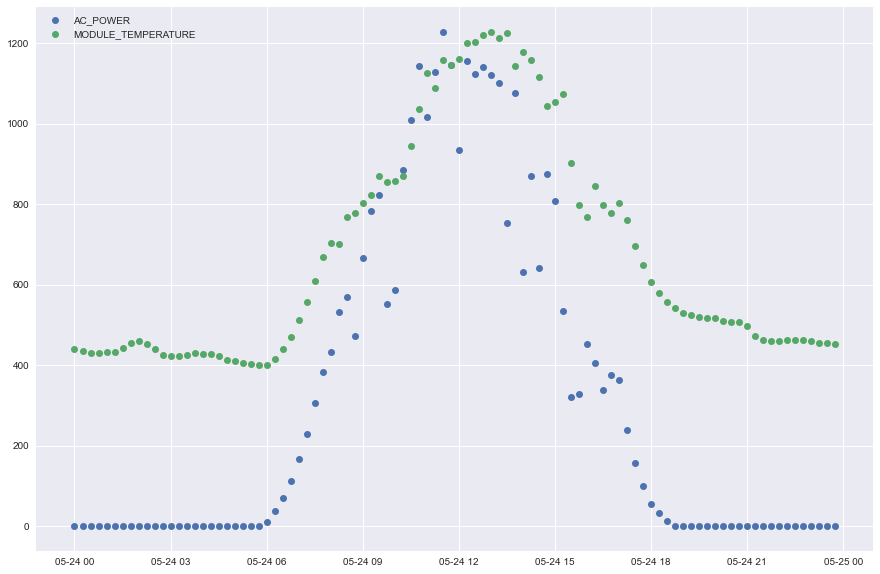

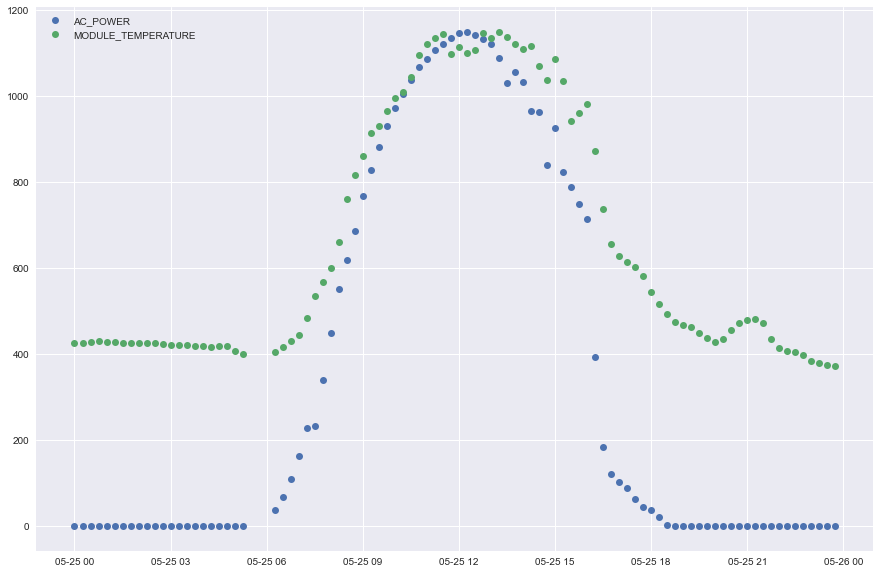

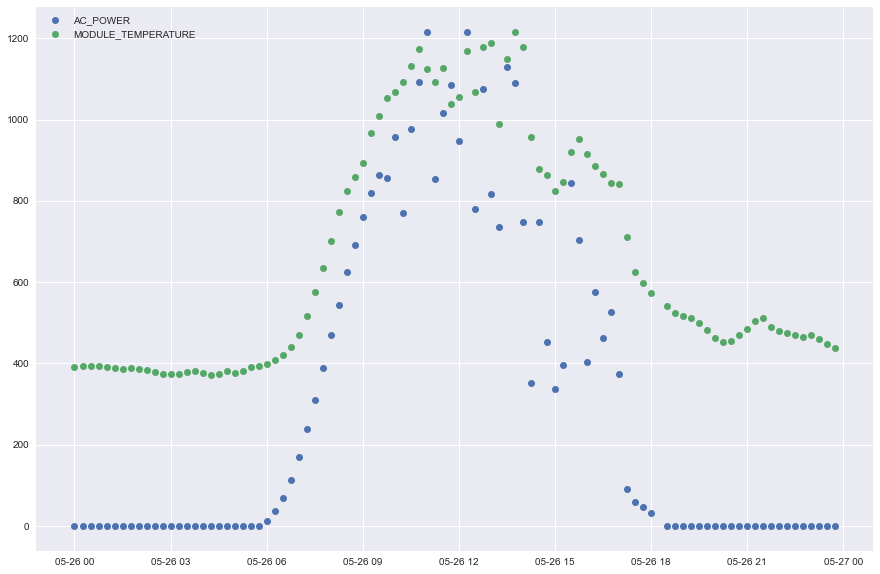

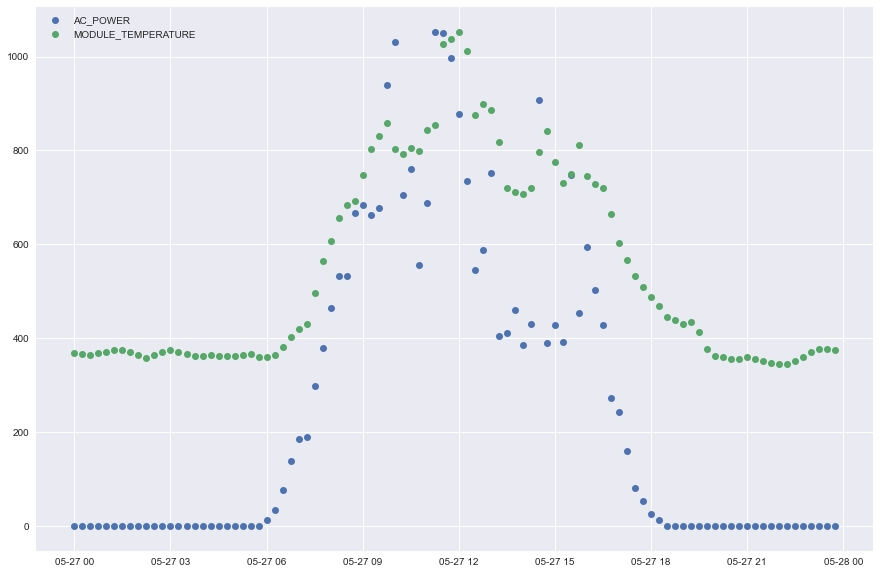

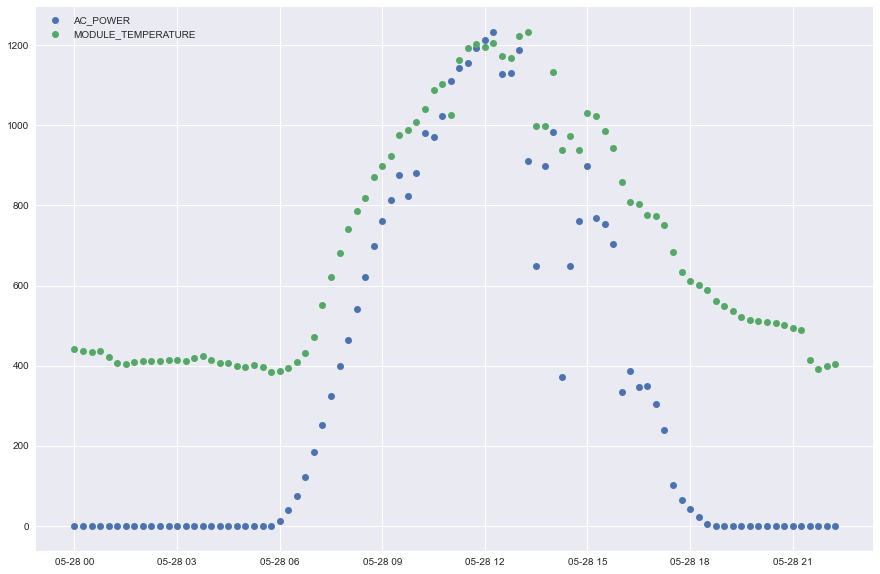

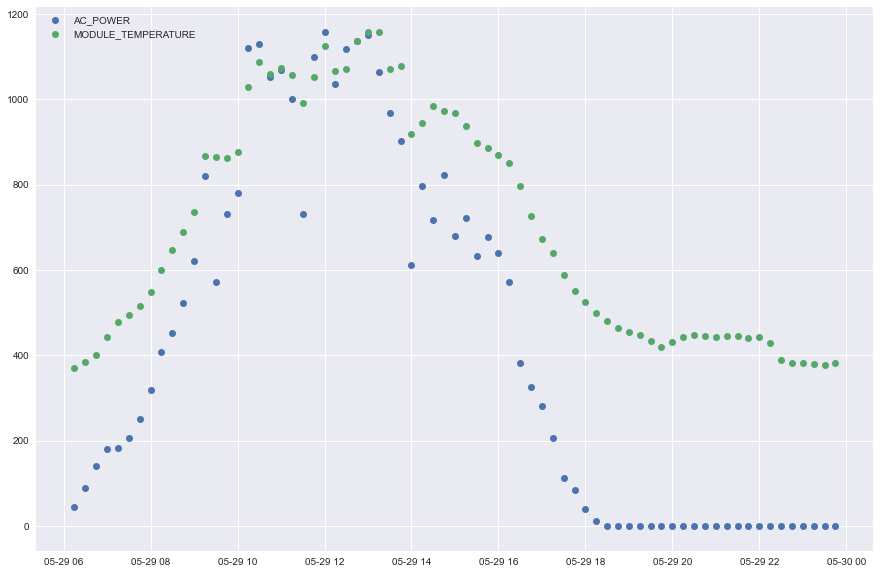

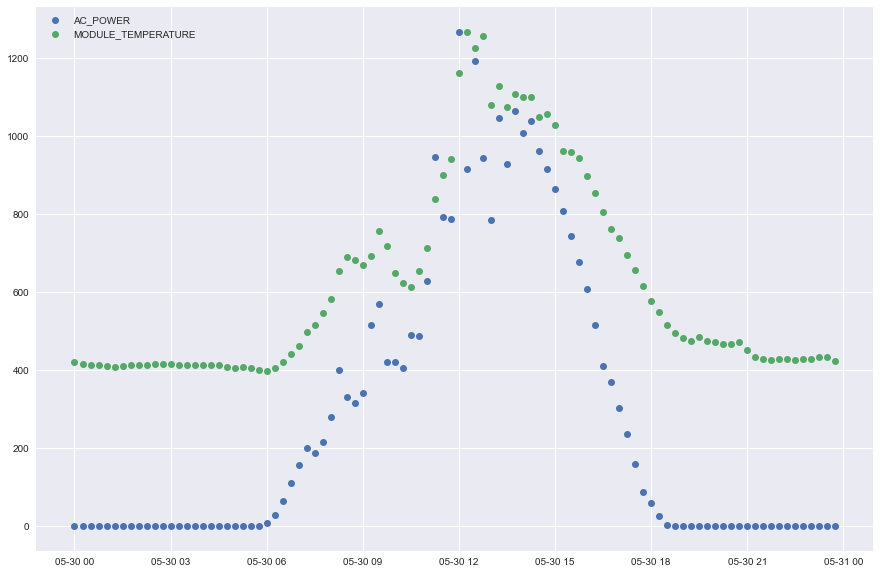

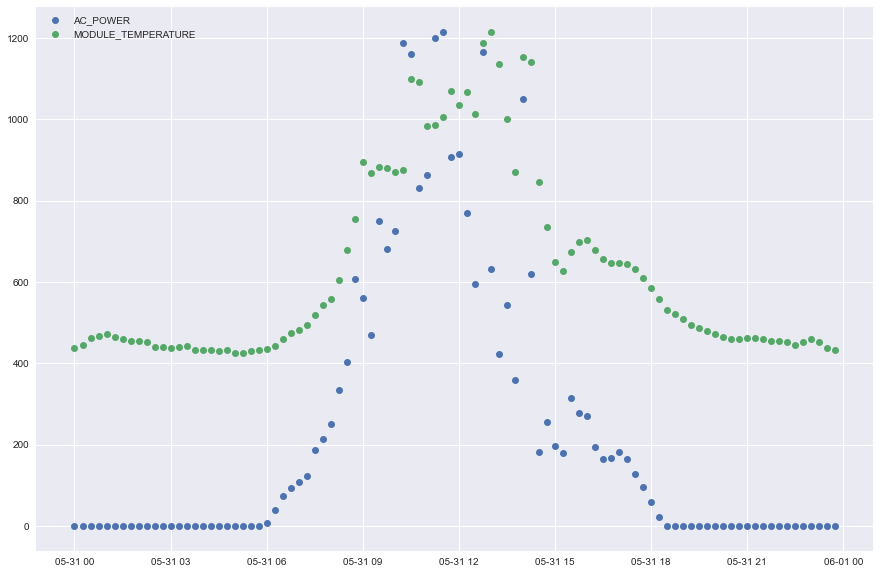

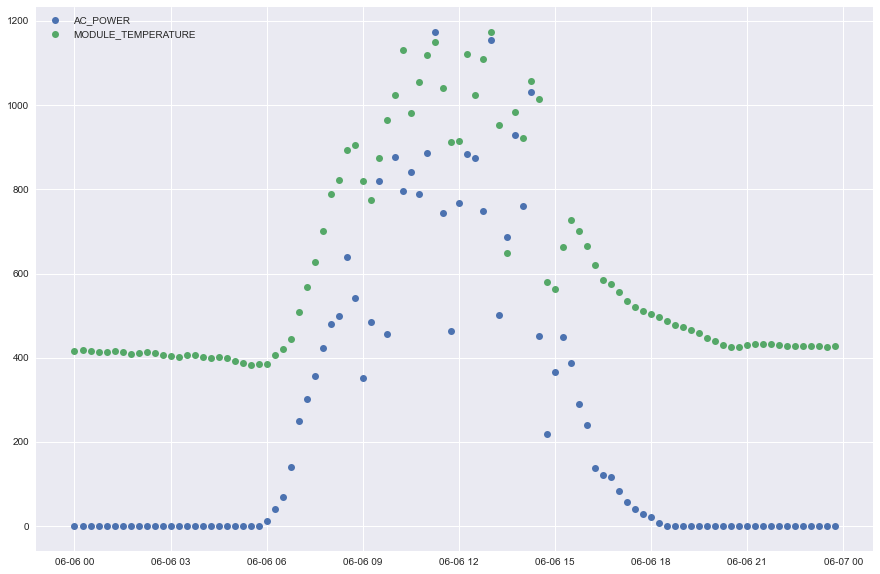

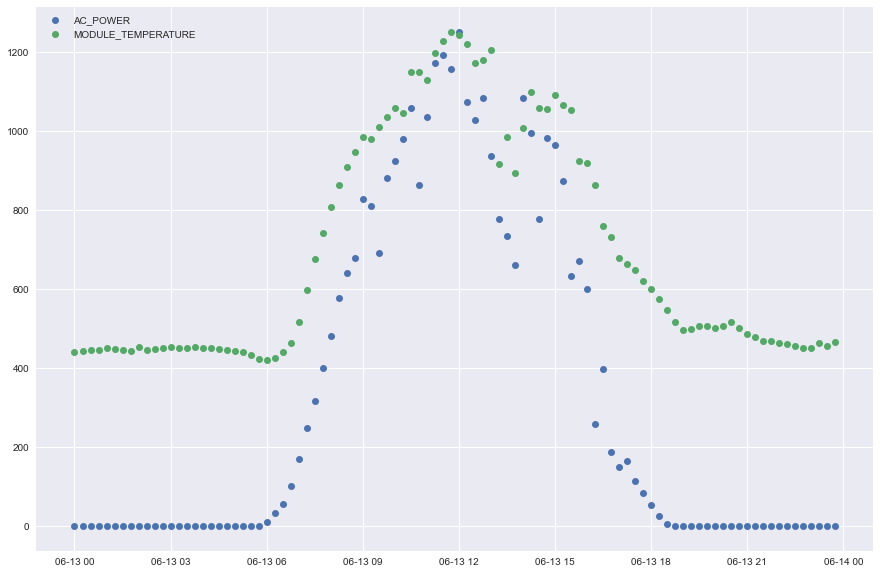

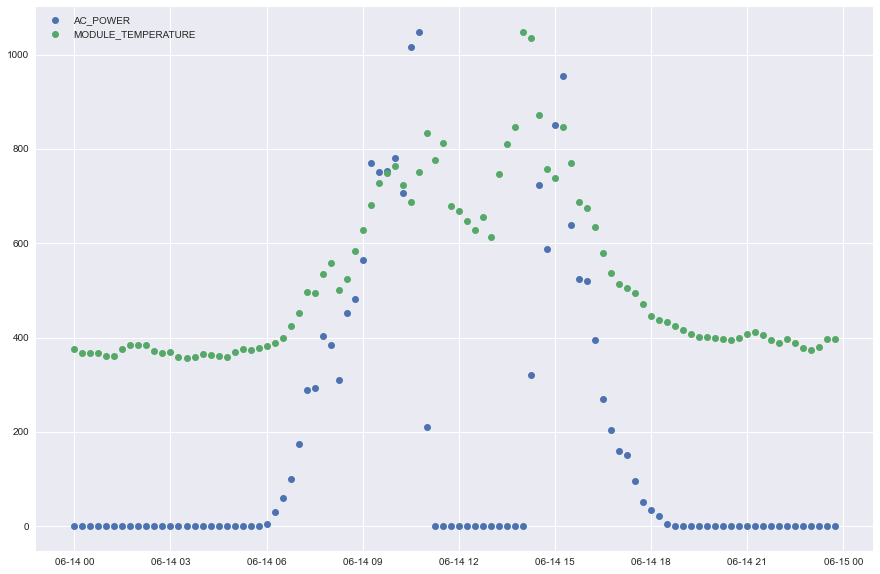

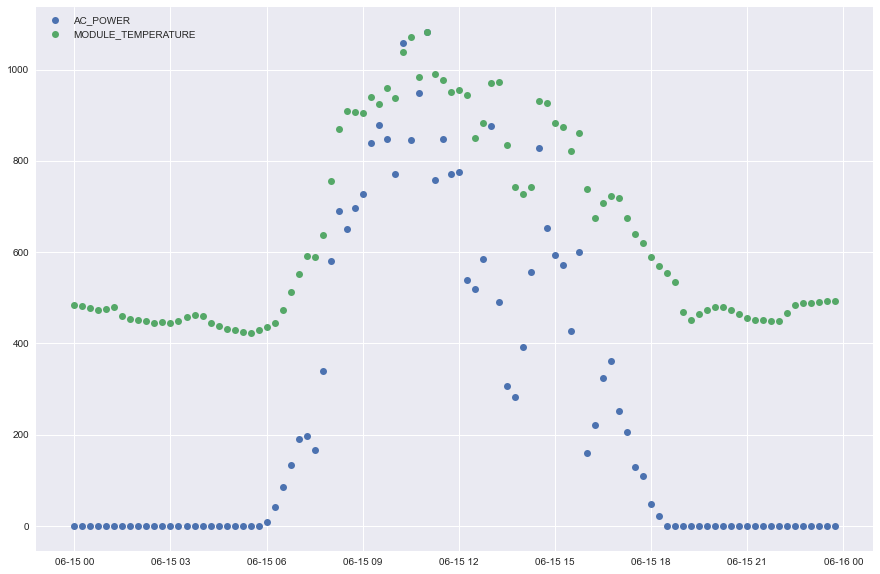

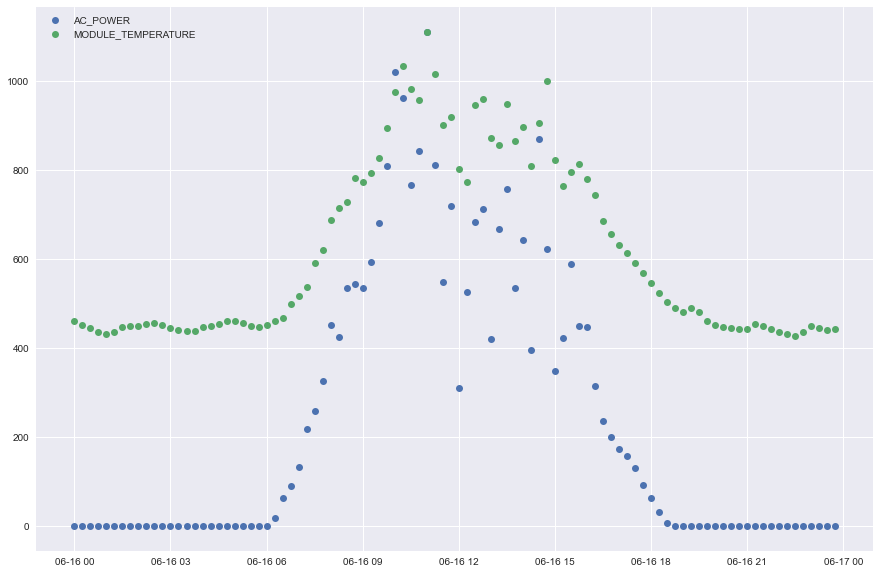

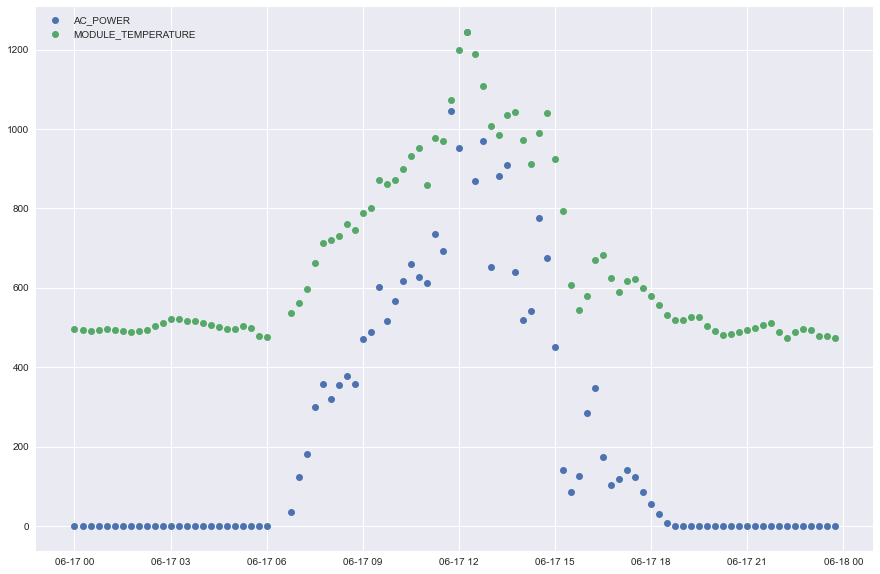

In [12]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'AC_POWER', 'MODULE_TEMPERATURE')

## Plot module temperature vs DC for a number of inverters of the same plant

Plotting for the 1BY6WEcLGh8j5v7 source key 


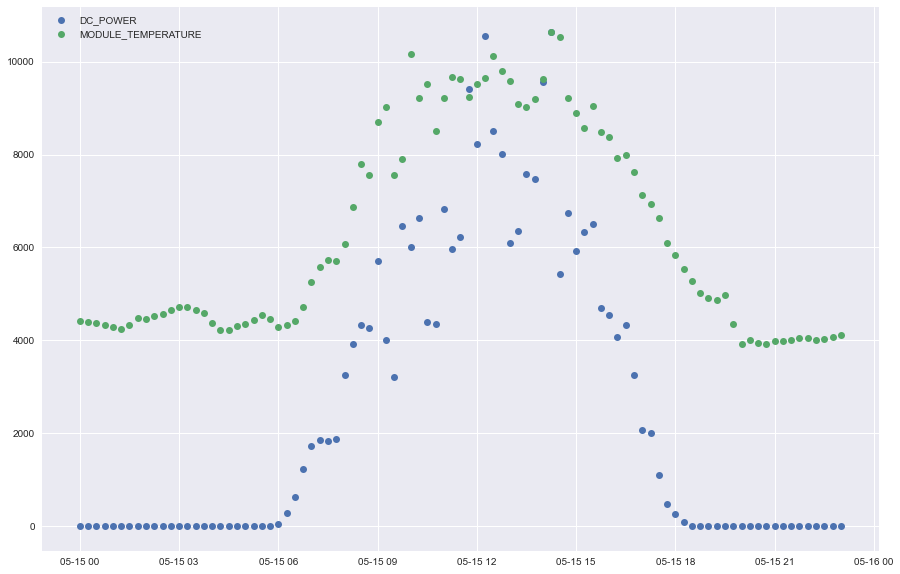

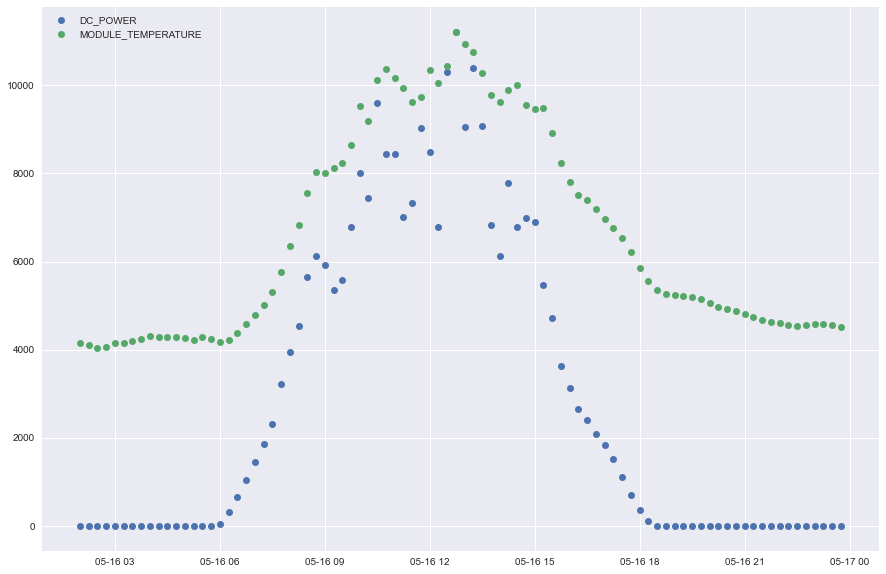

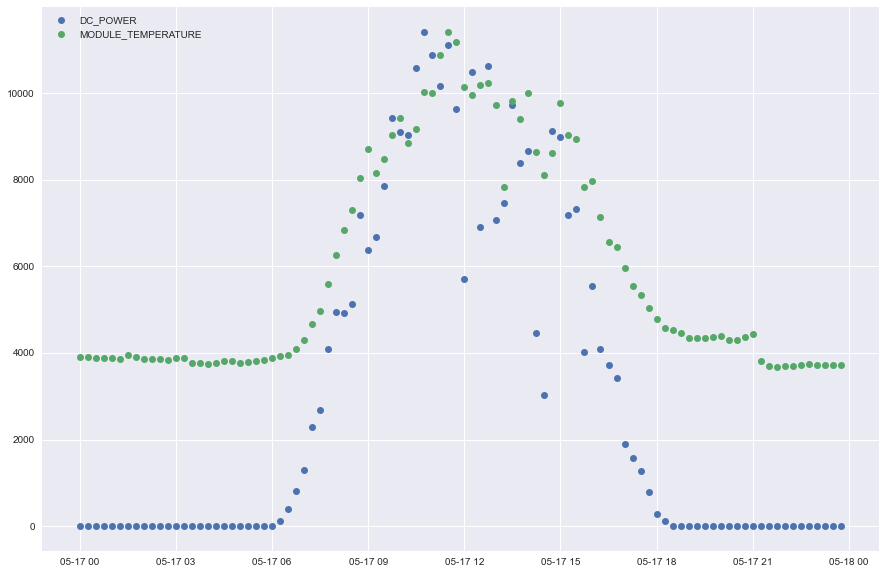

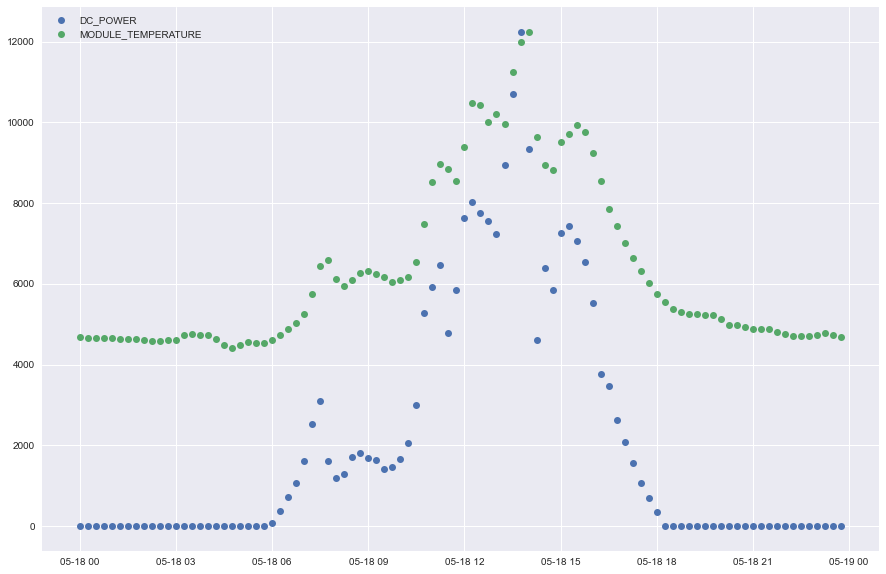

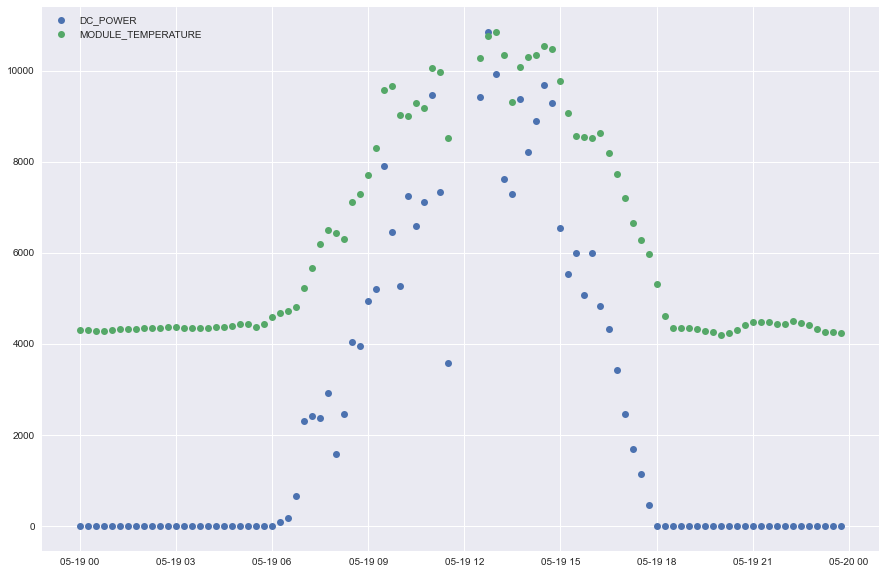

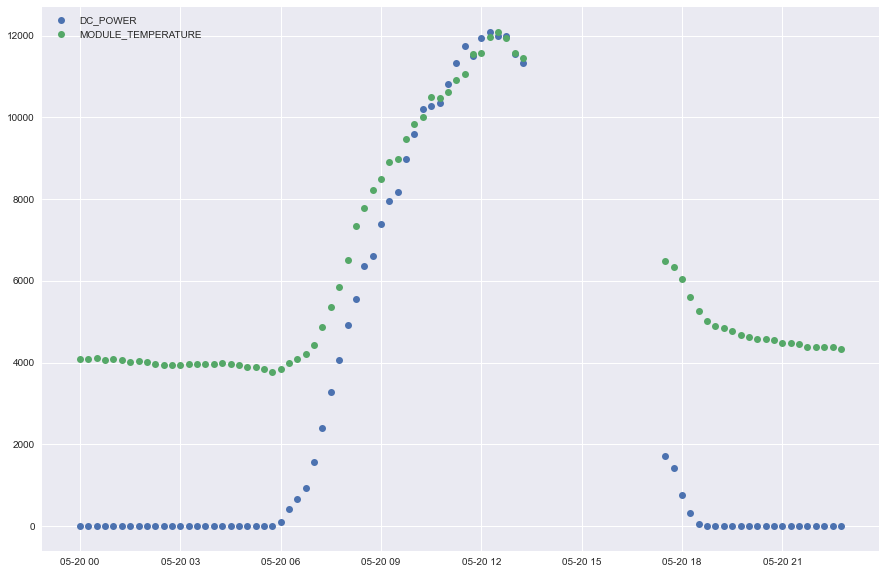

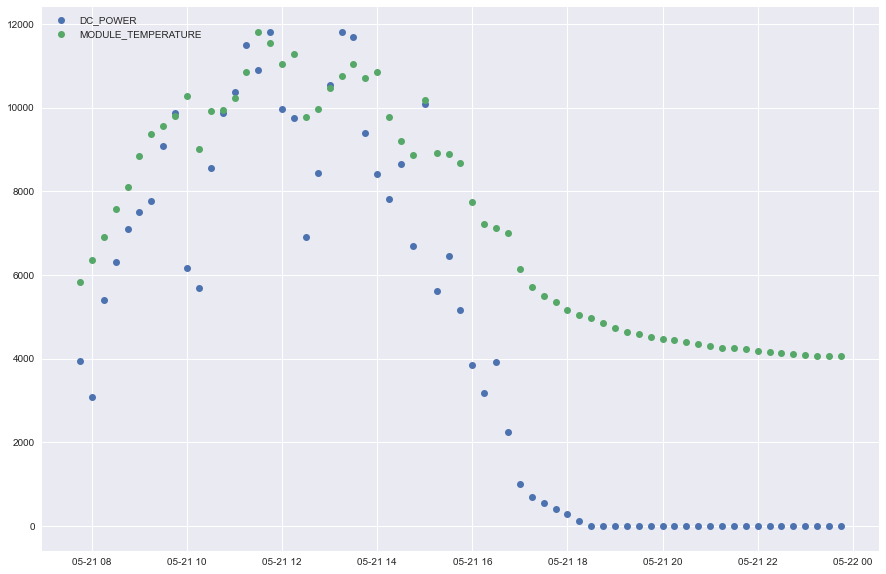

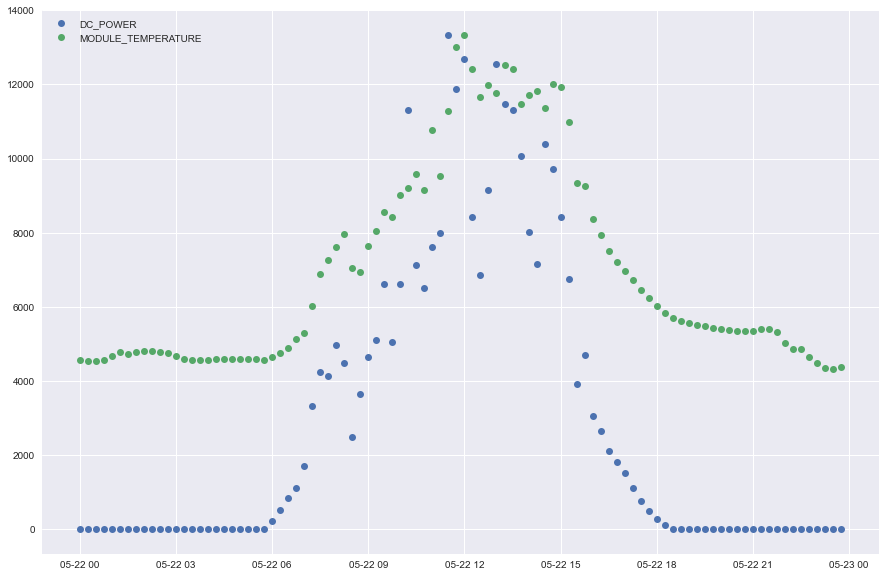

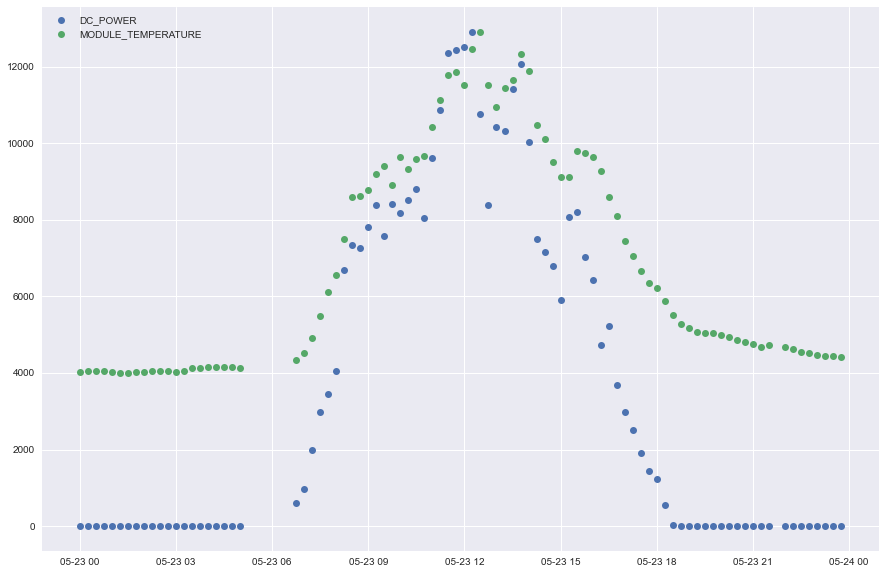

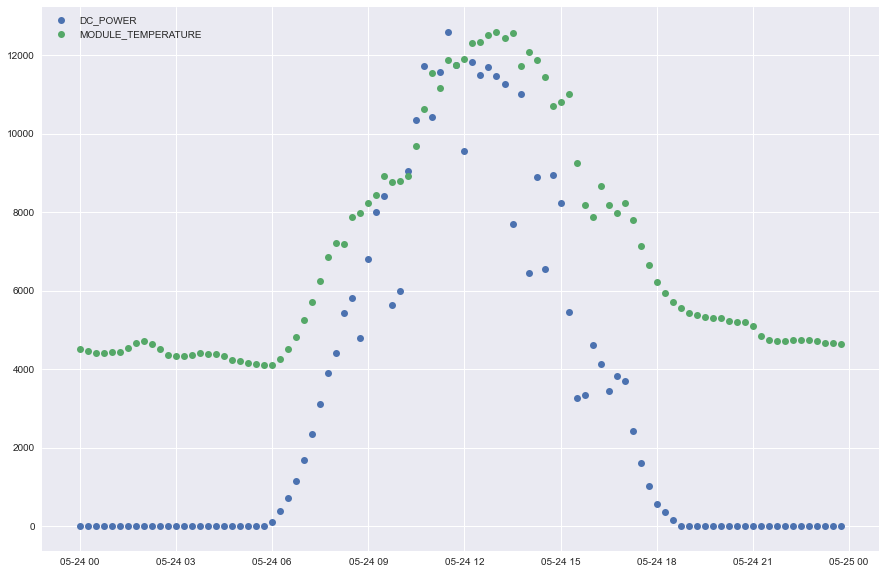

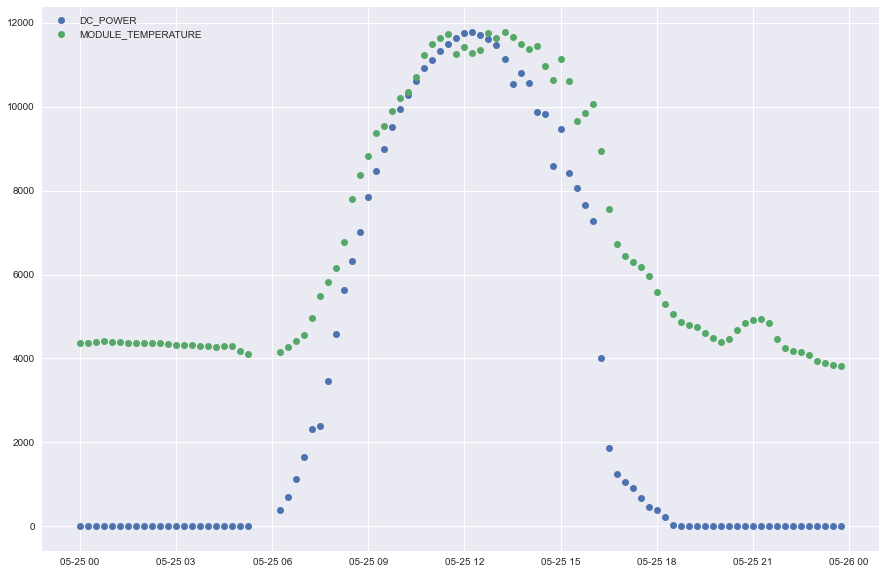

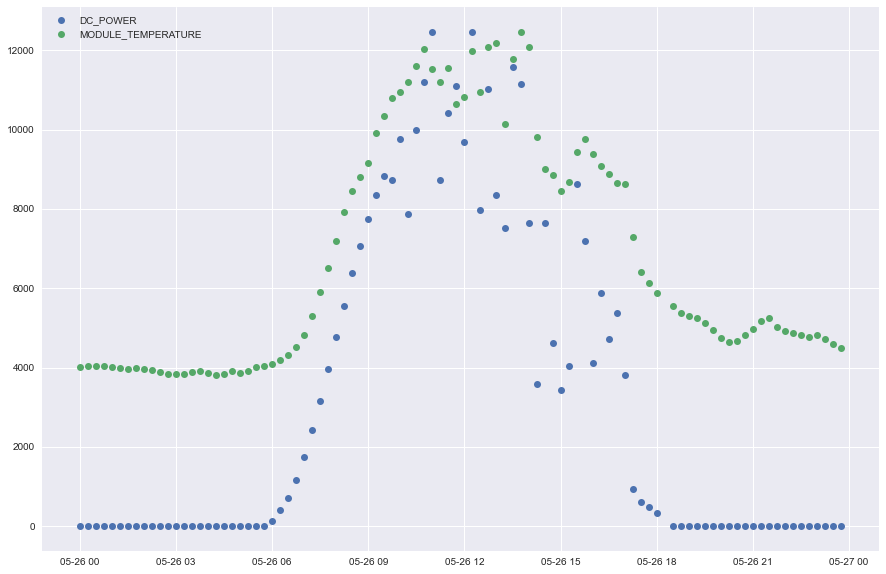

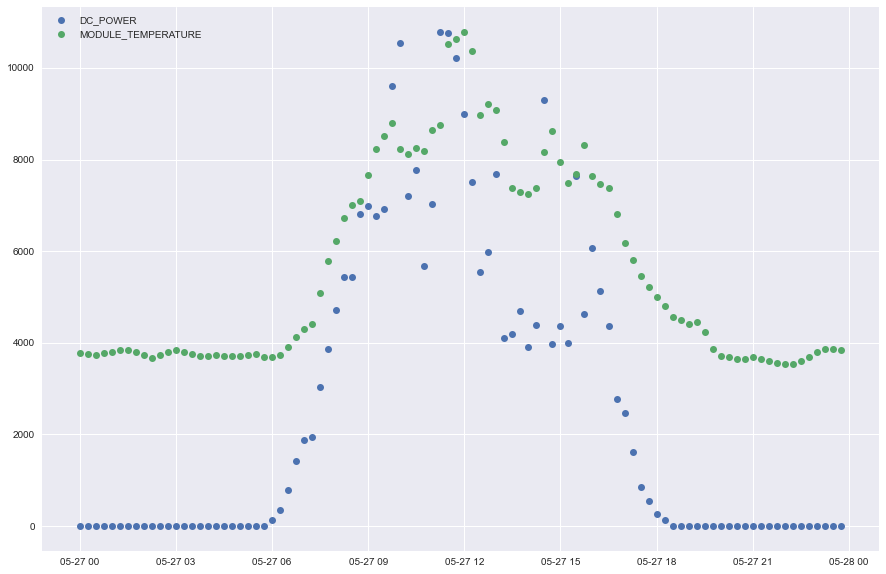

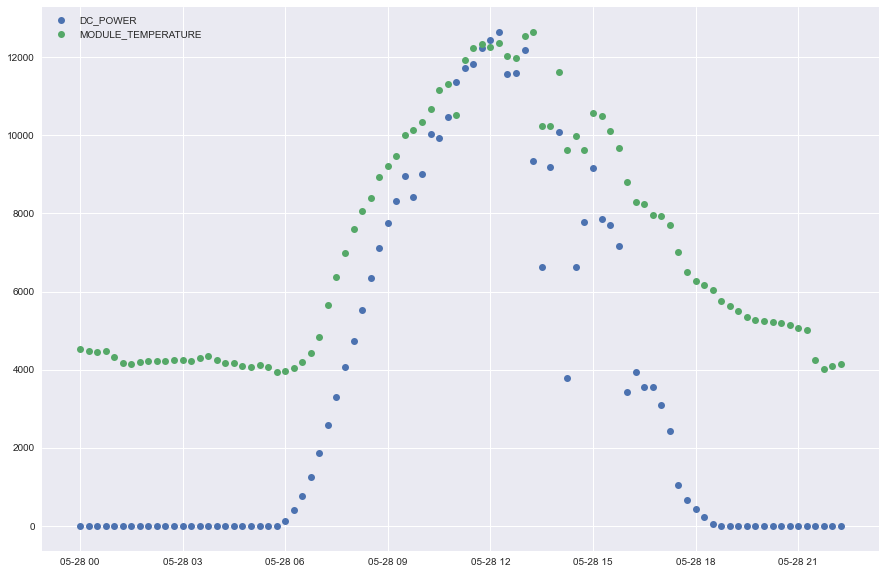

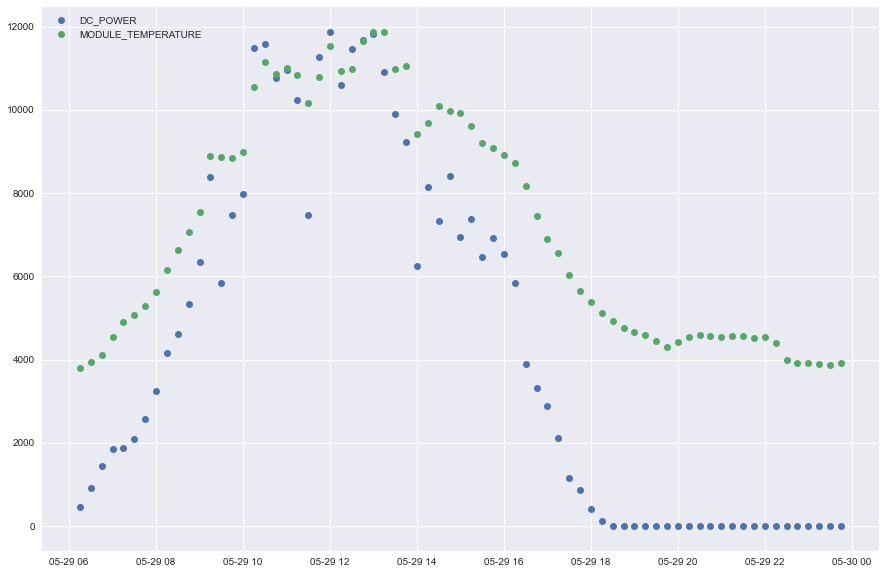

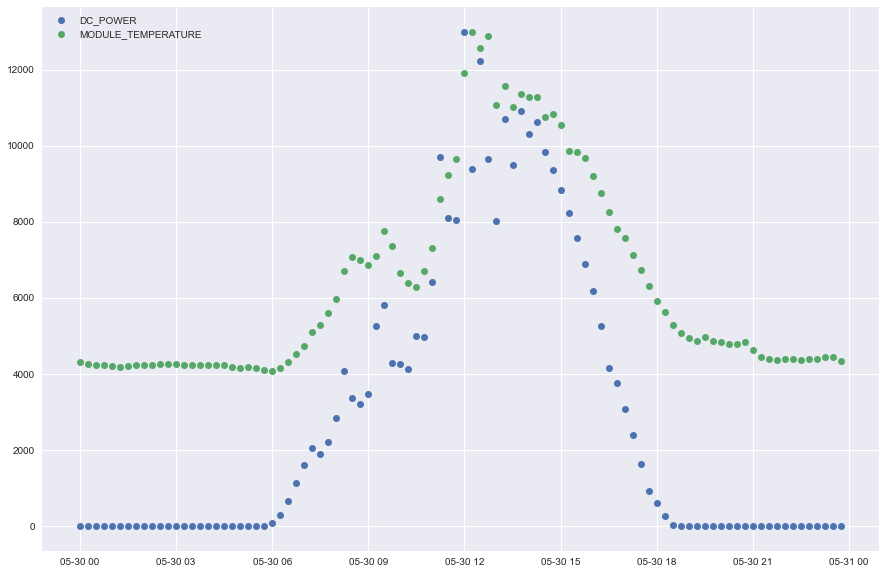

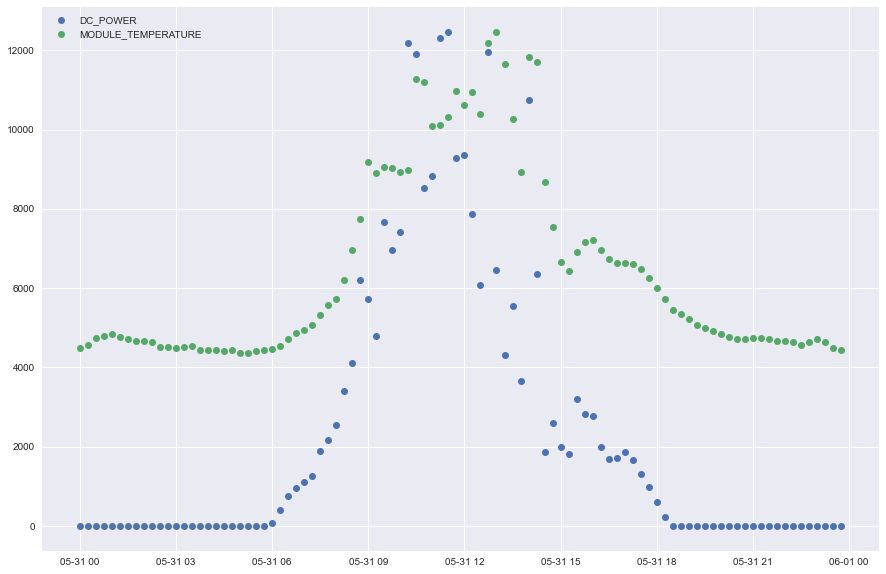

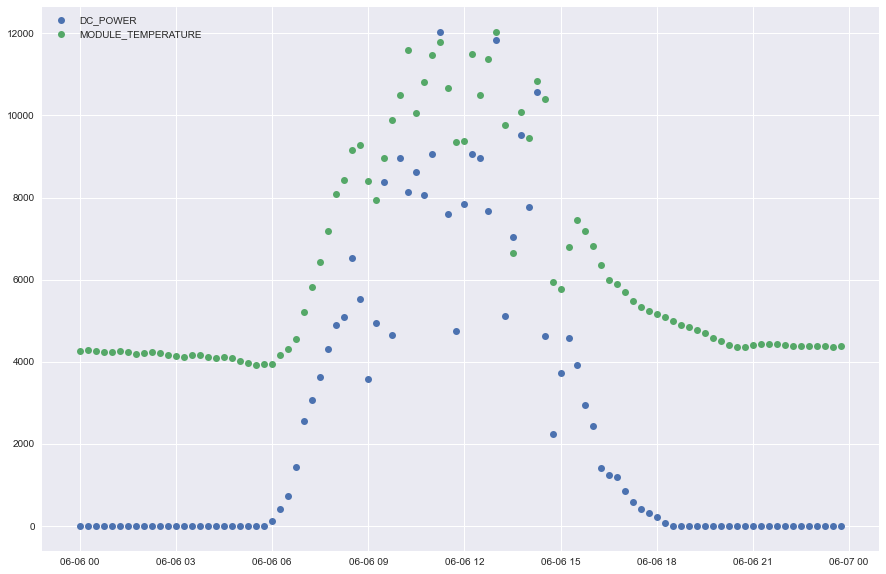

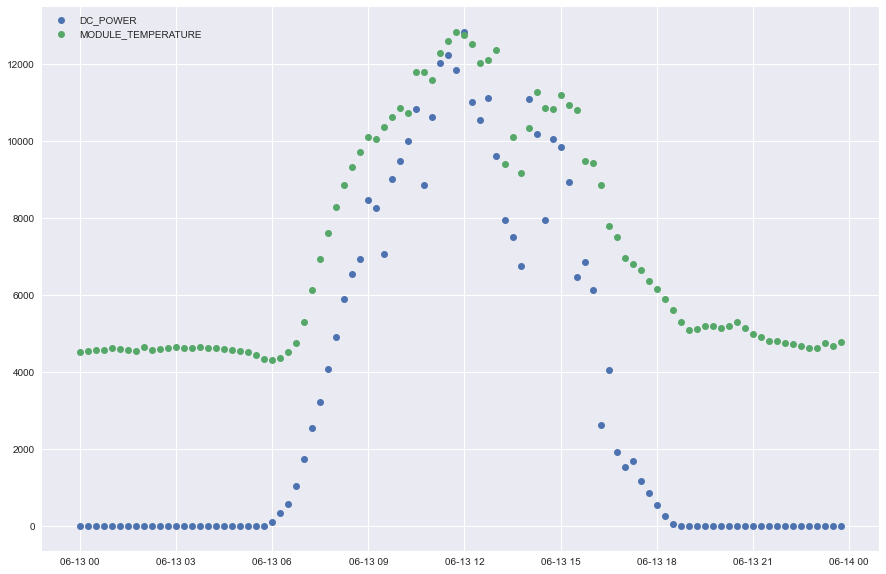

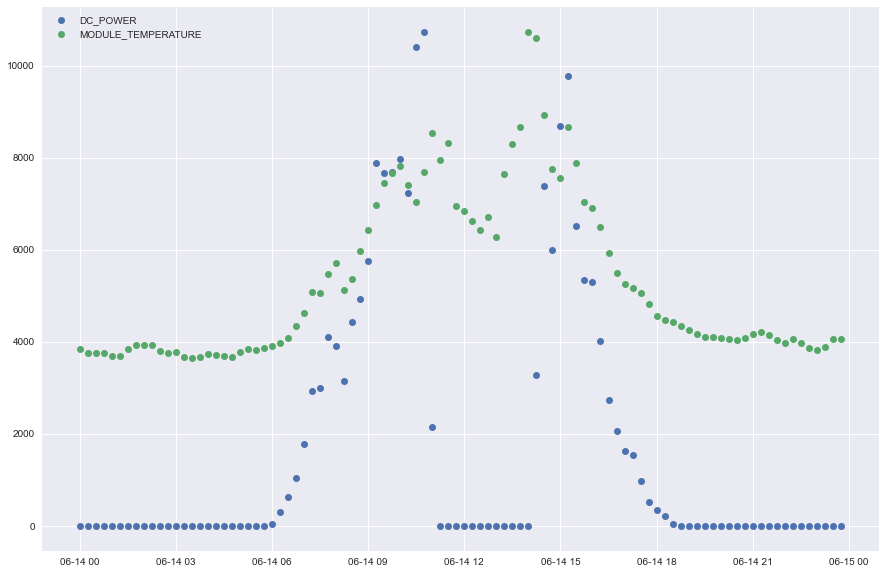

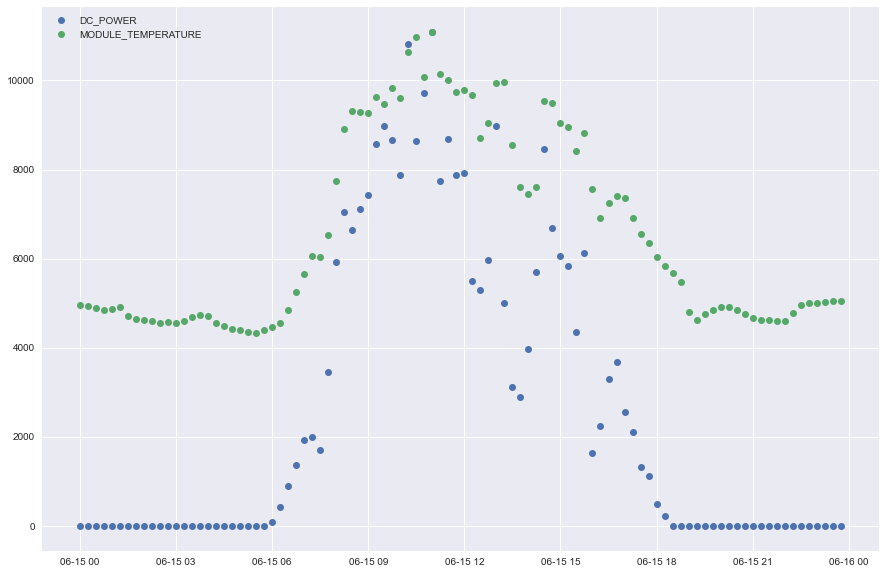

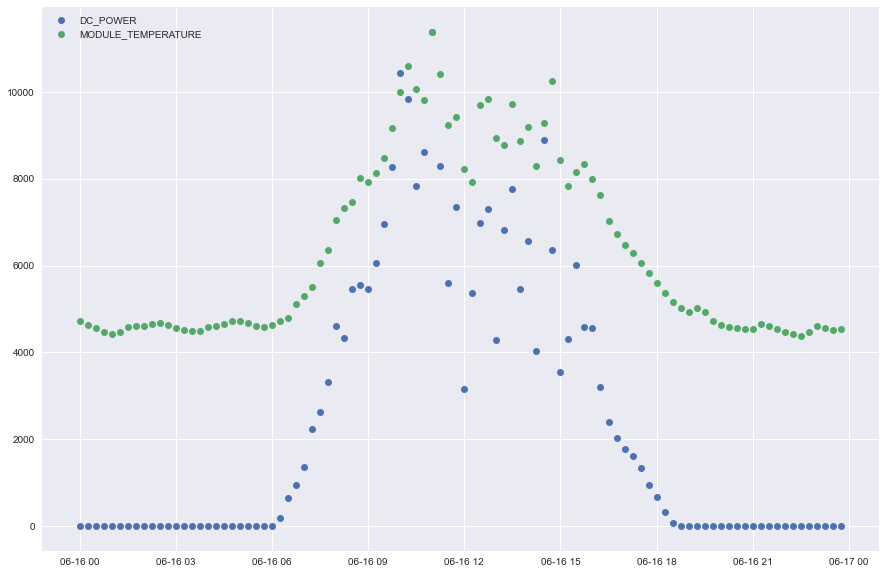

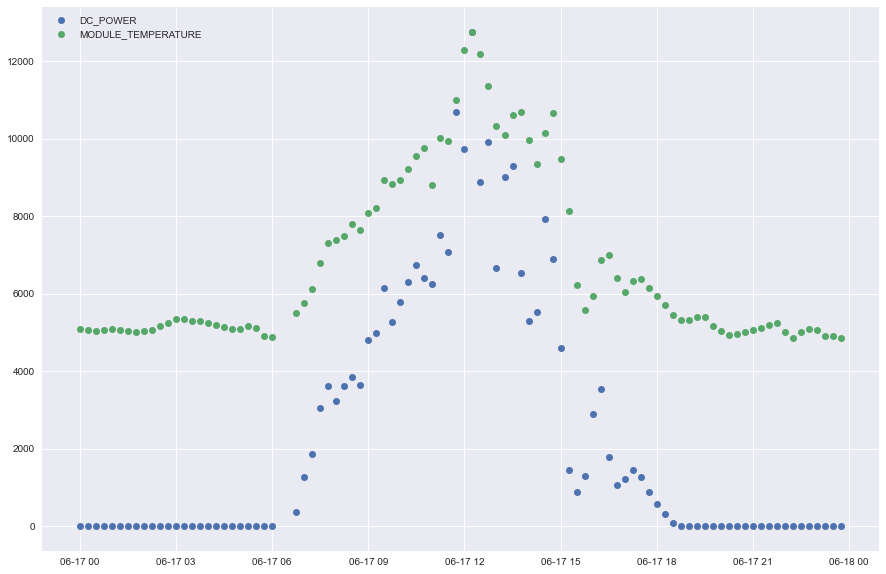

In [13]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DC_POWER', 'MODULE_TEMPERATURE')

## For each day plot DAILY_YIELD against time (one inverter)

Plotting for the 1BY6WEcLGh8j5v7 source key 


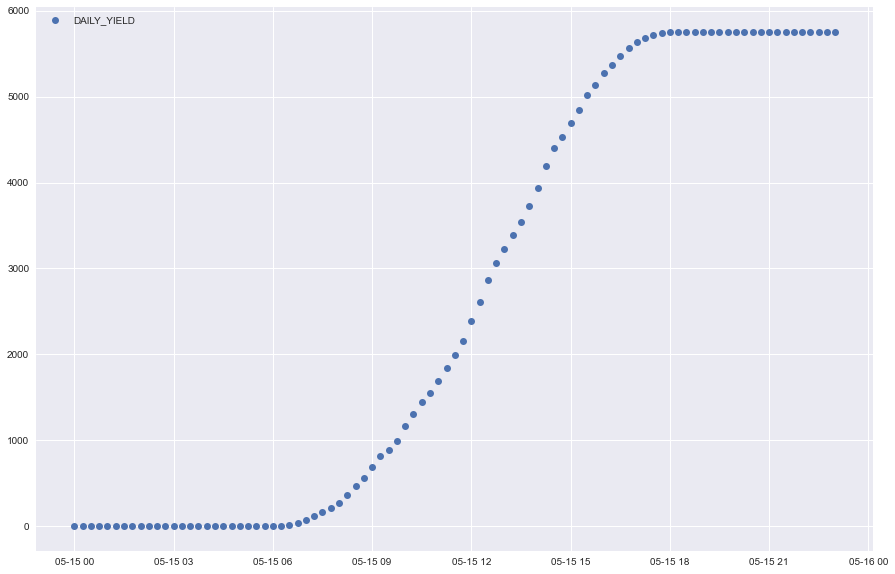

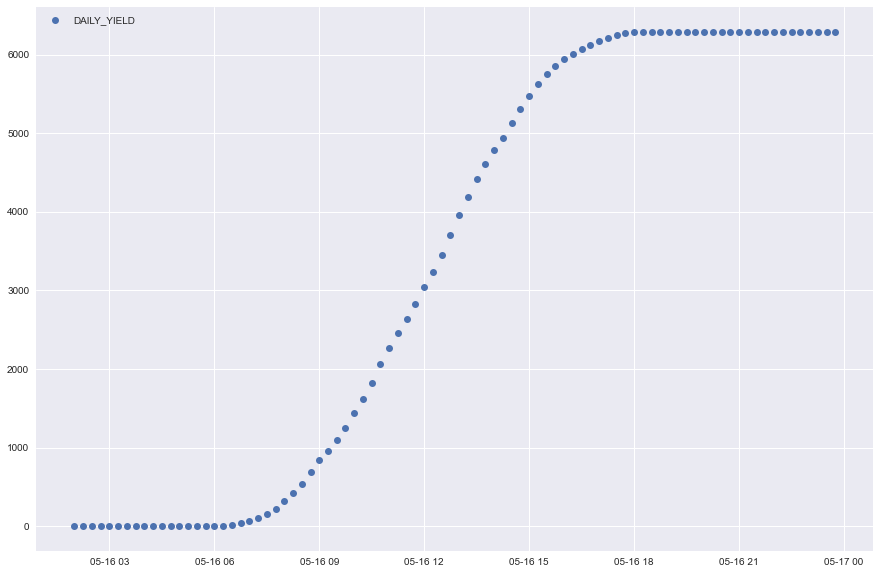

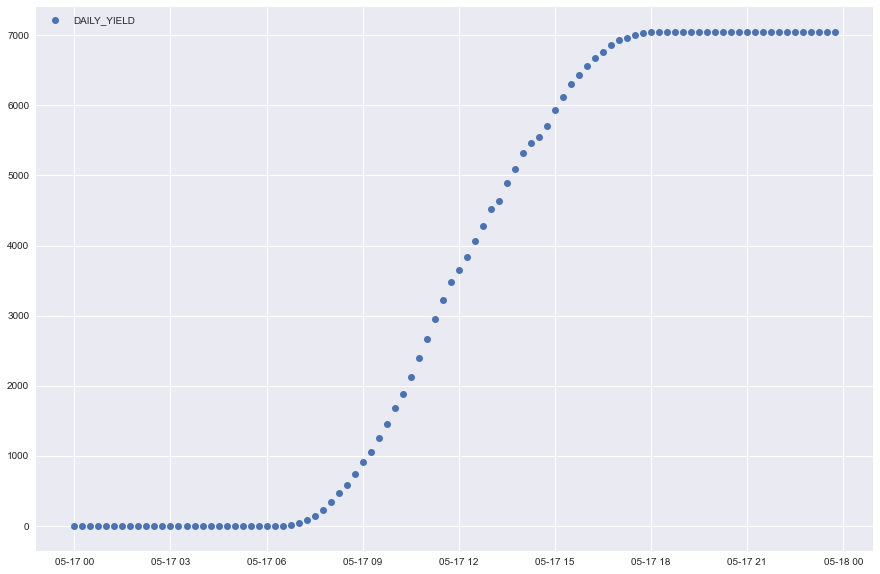

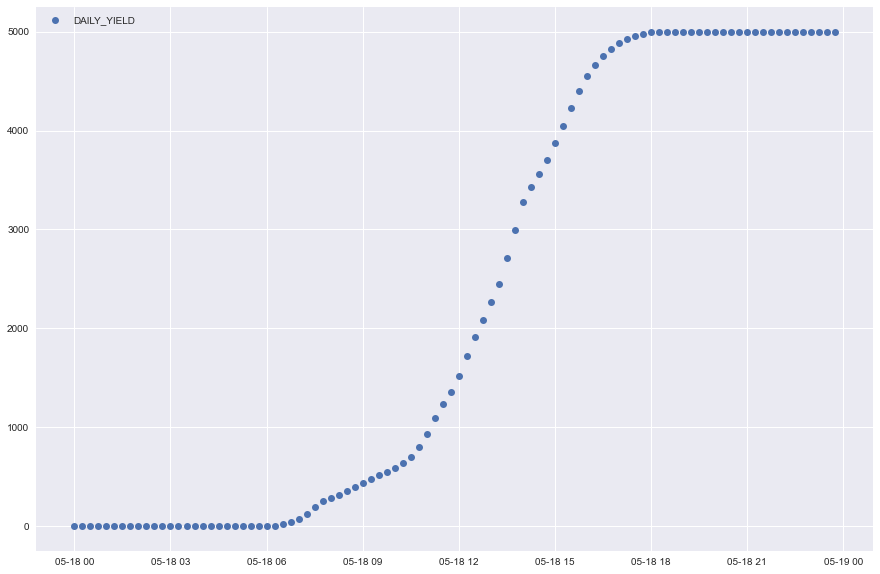

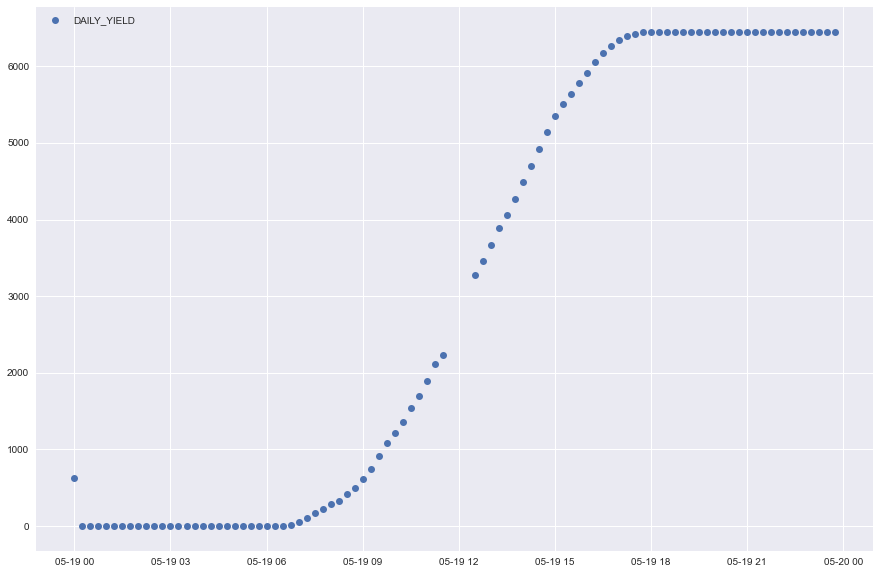

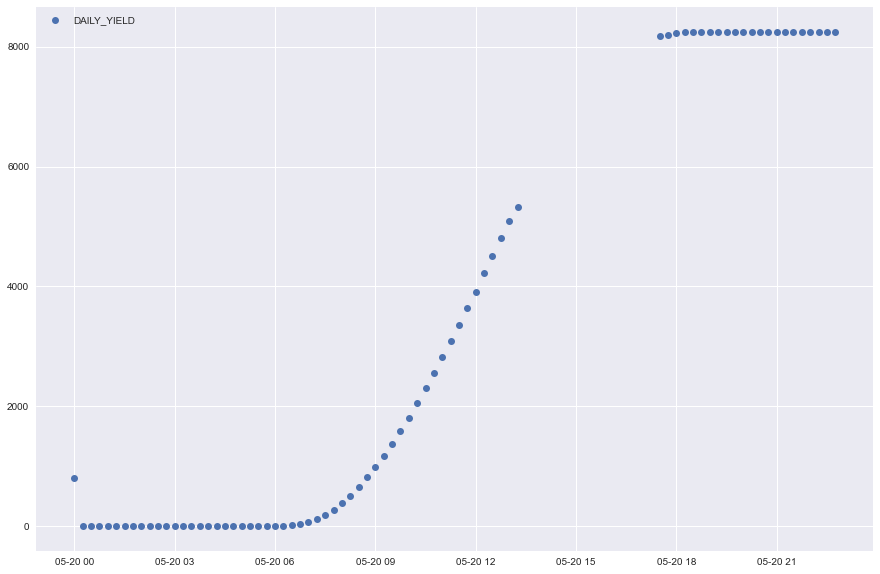

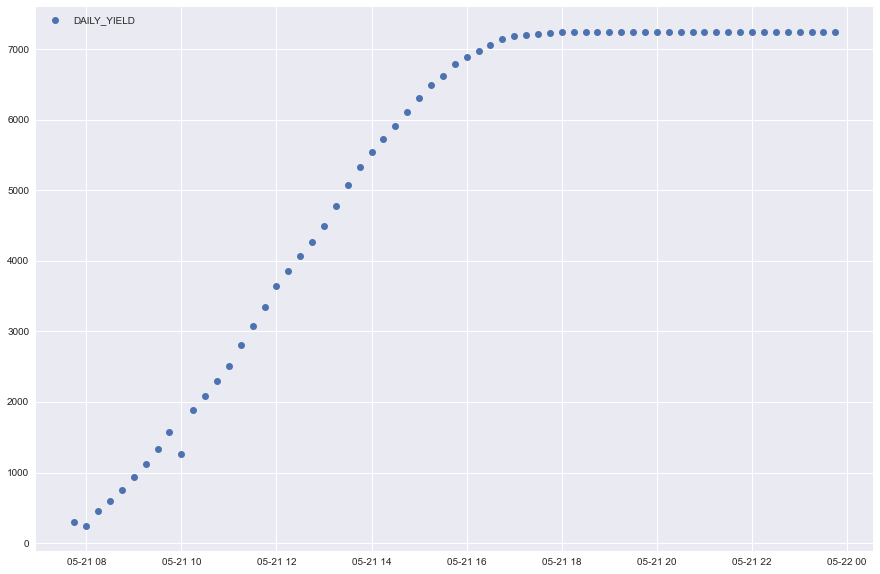

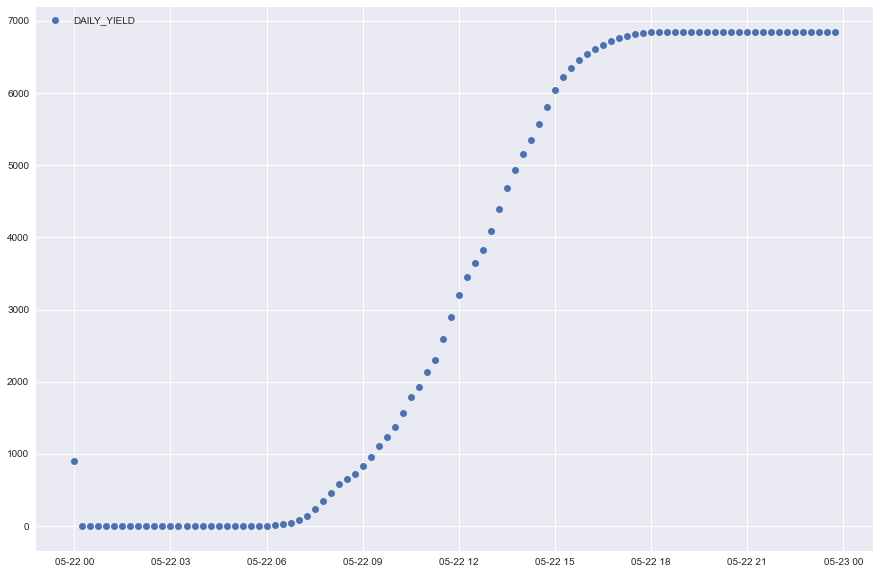

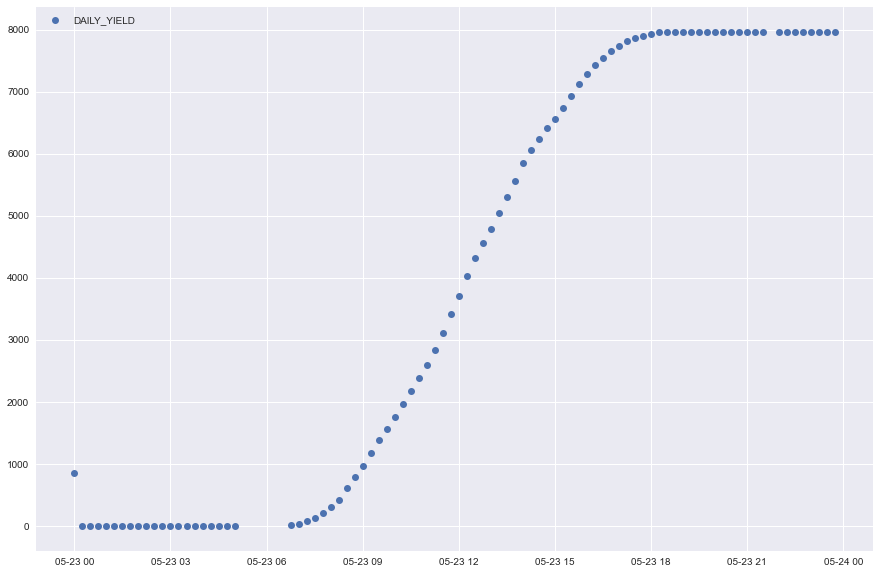

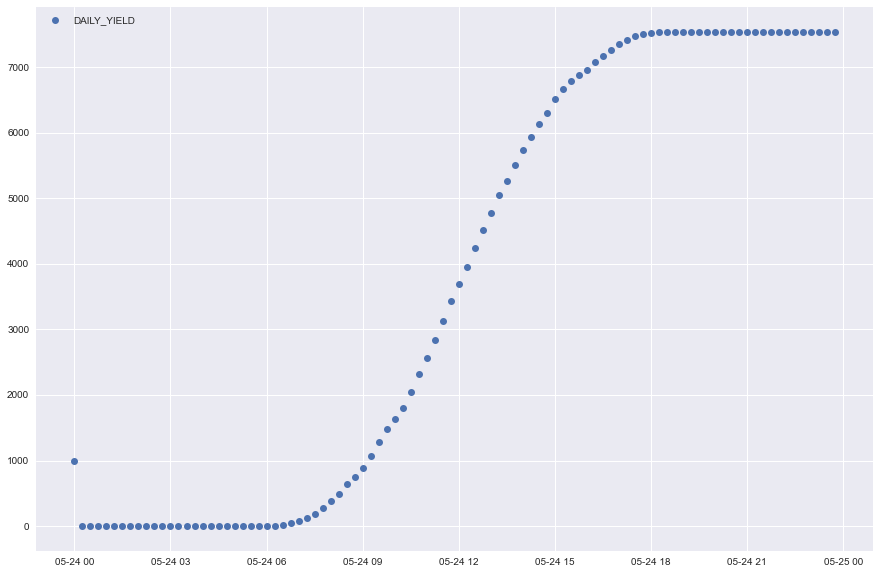

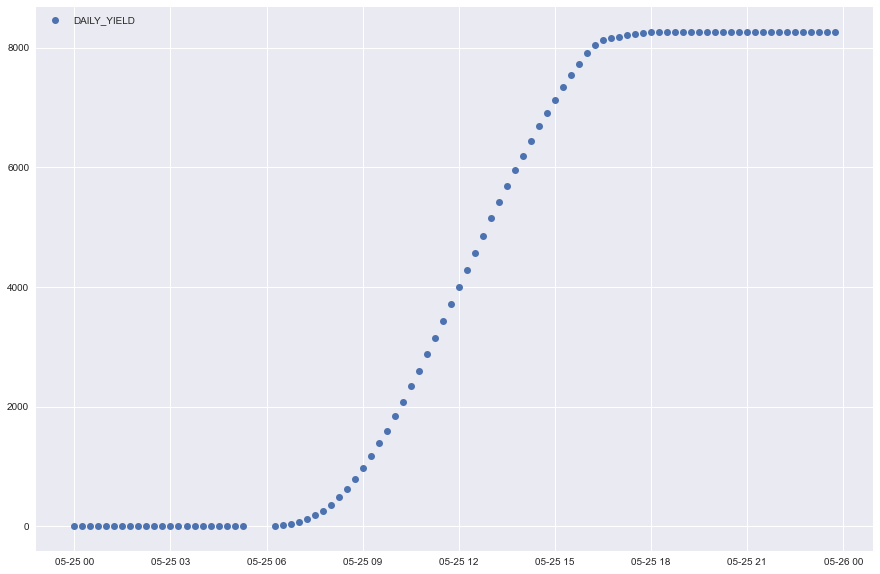

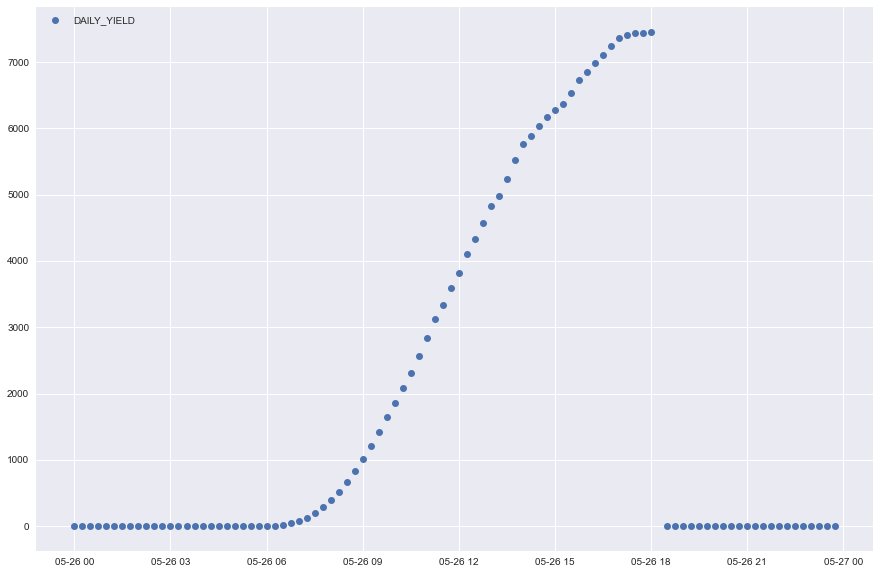

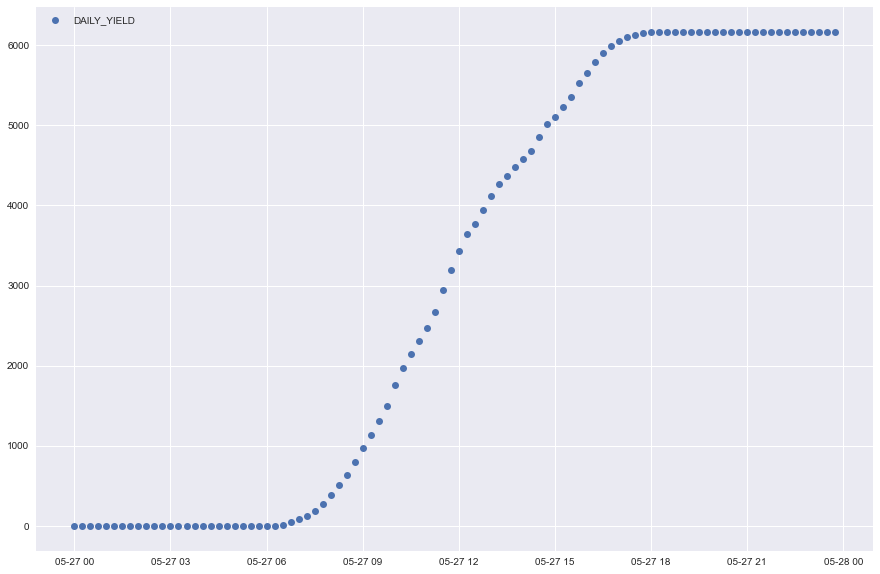

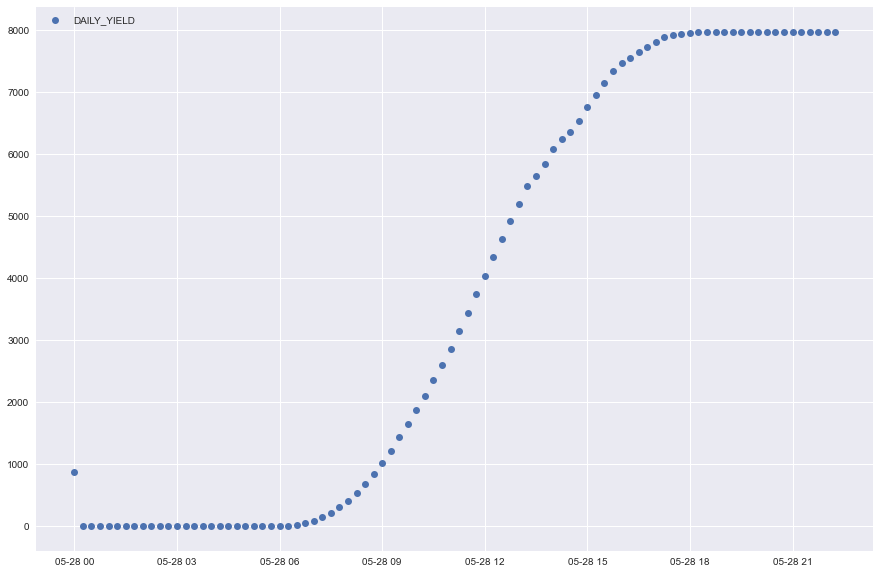

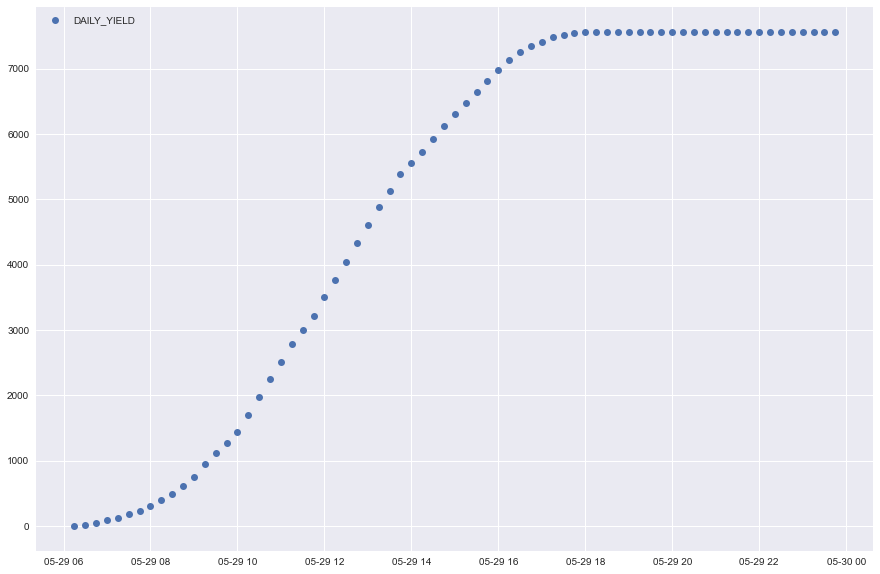

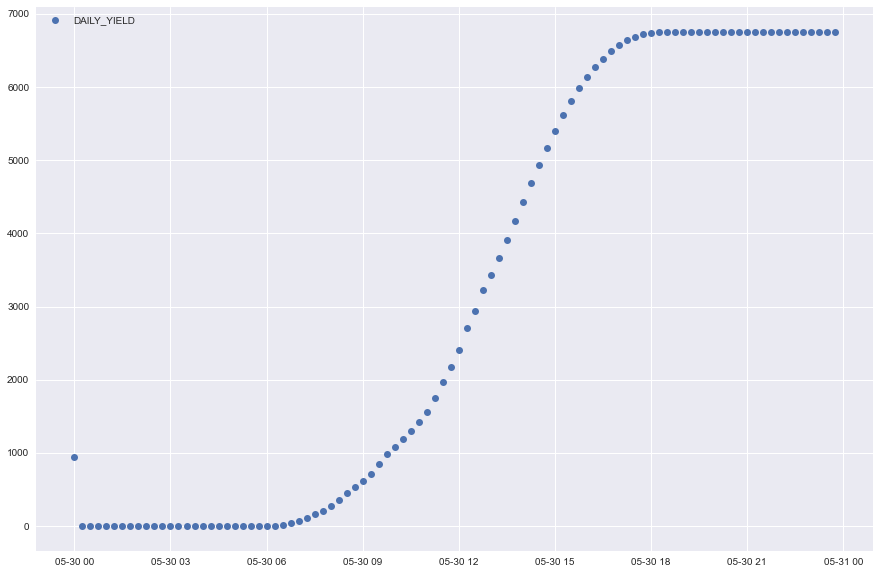

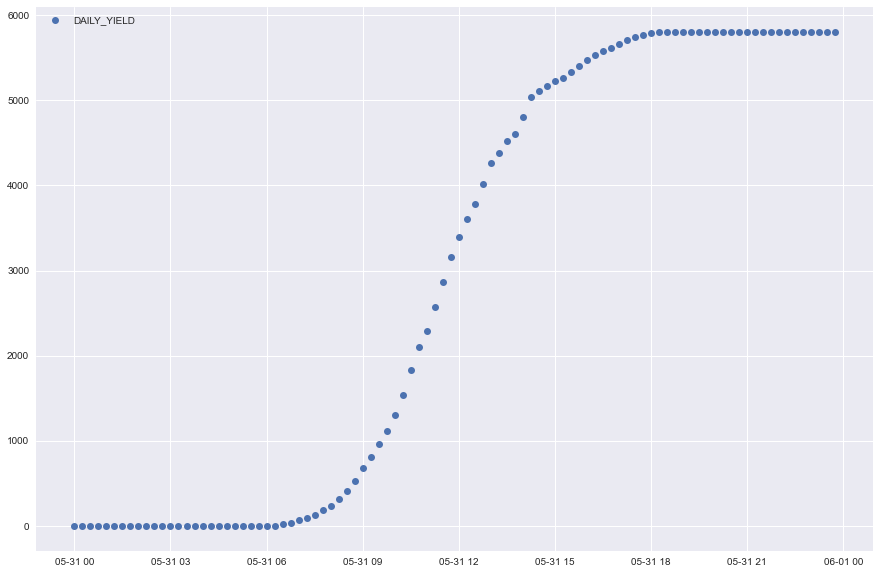

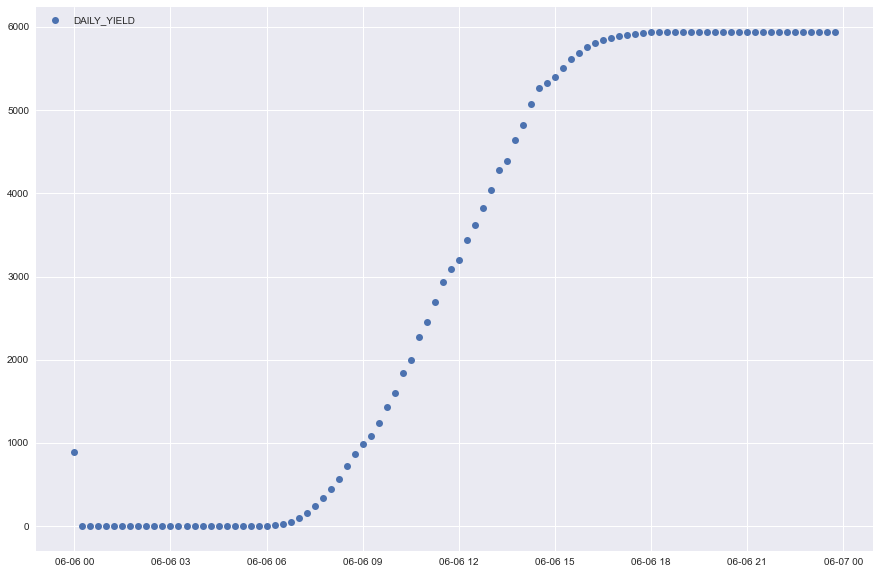

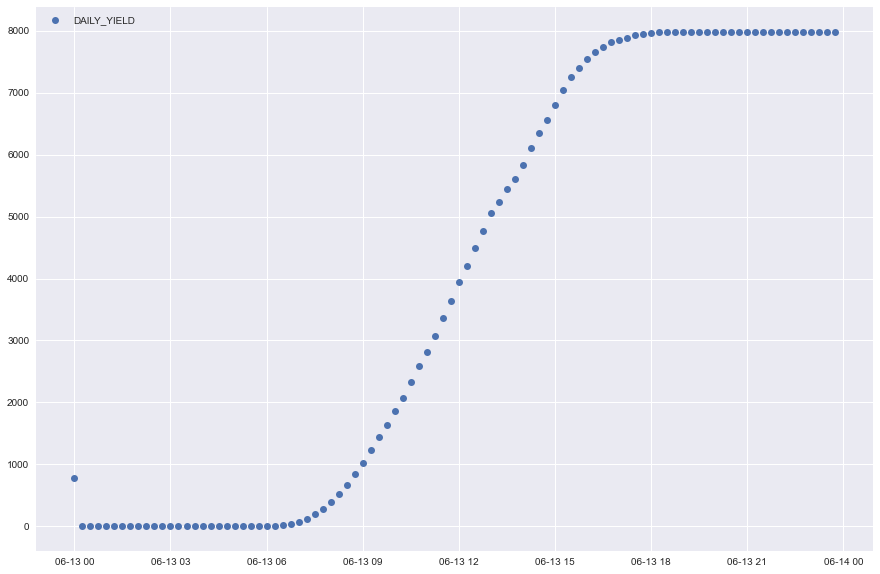

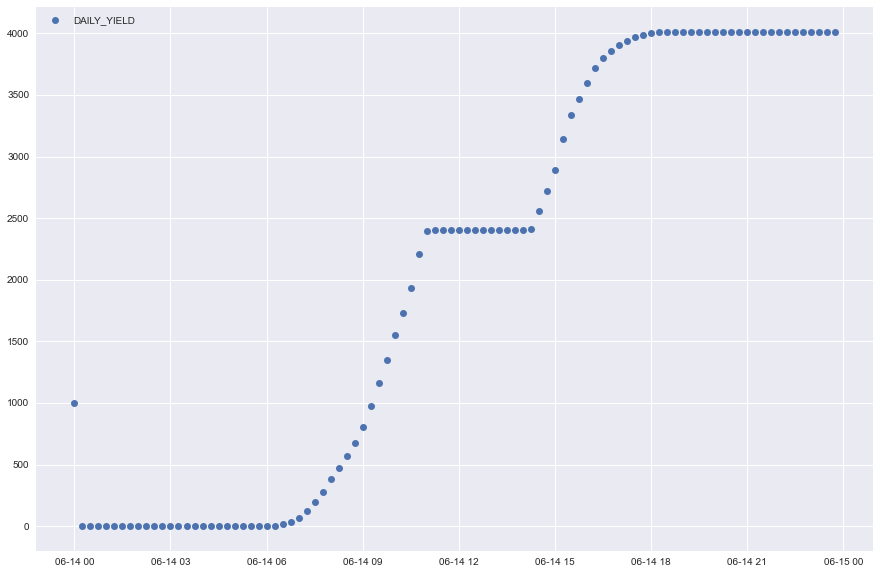

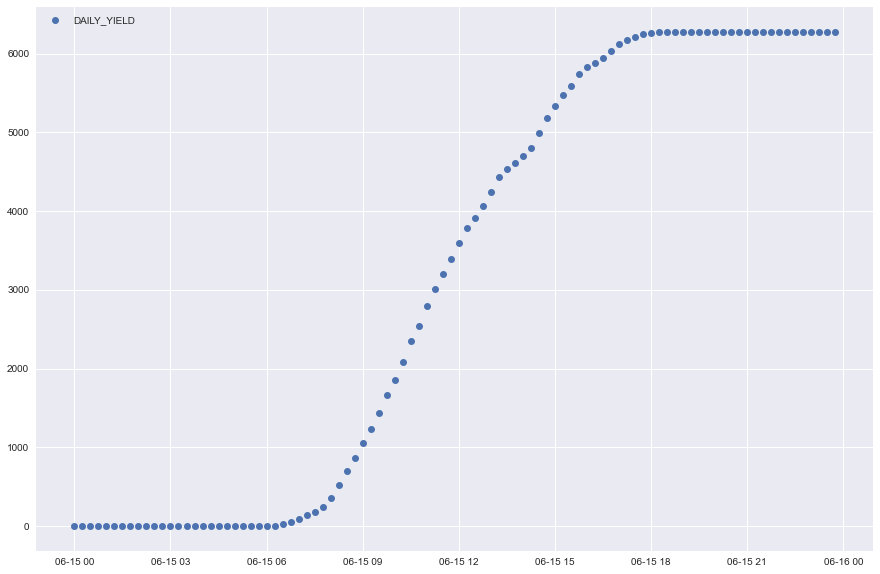

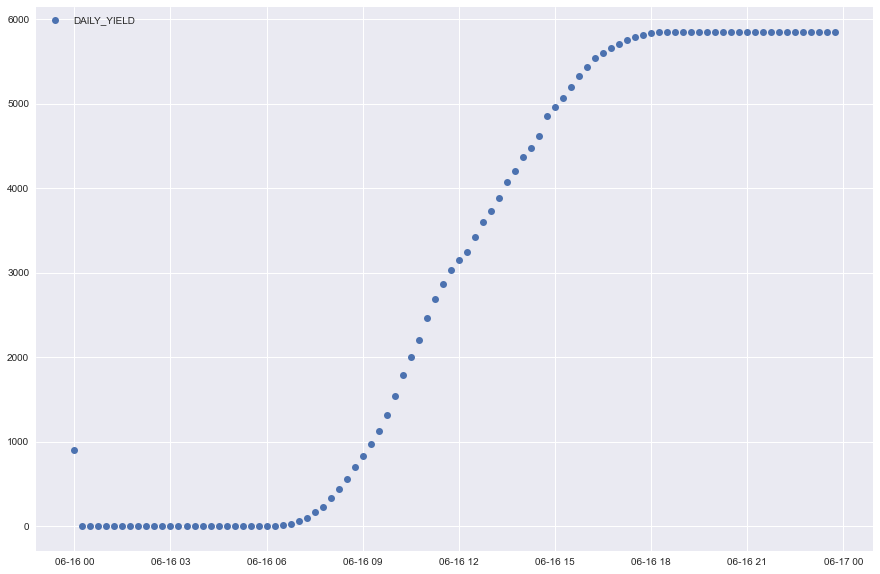

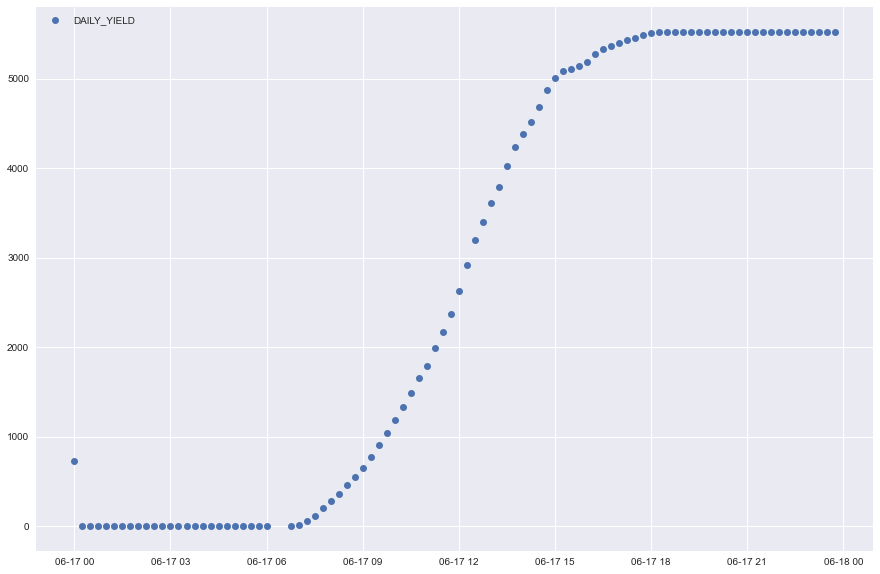

In [14]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    if i > 0:
        break
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    datetime_vs(merged_df, 'DAILY_YIELD')

## For each day plot DAILY_YIELD against time

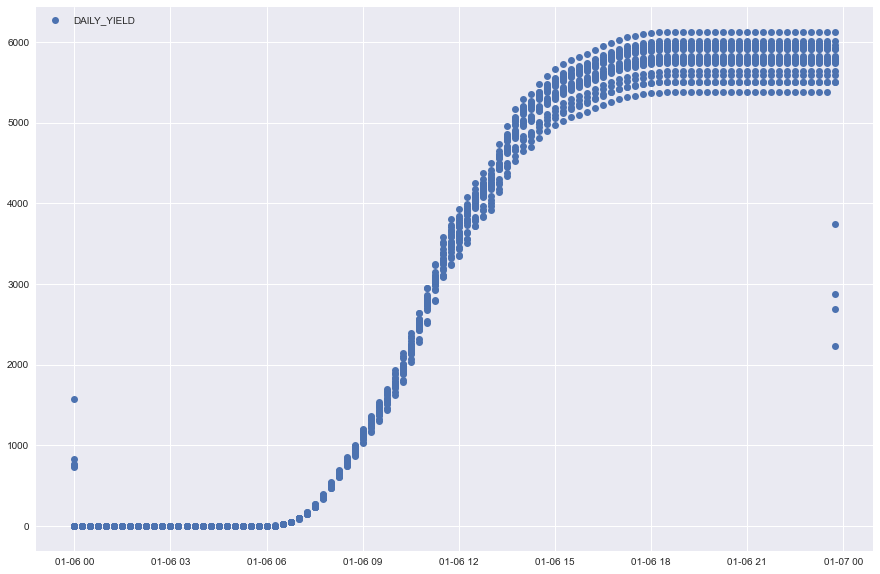

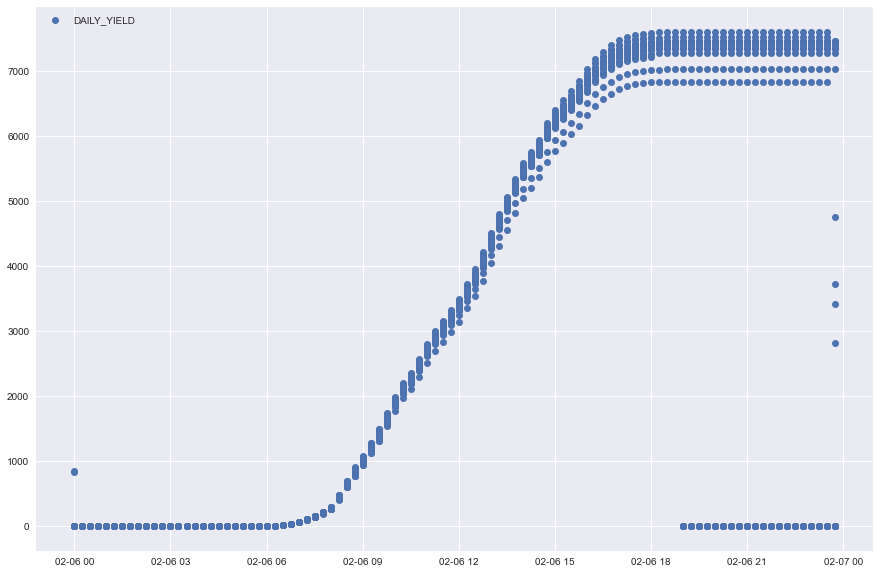

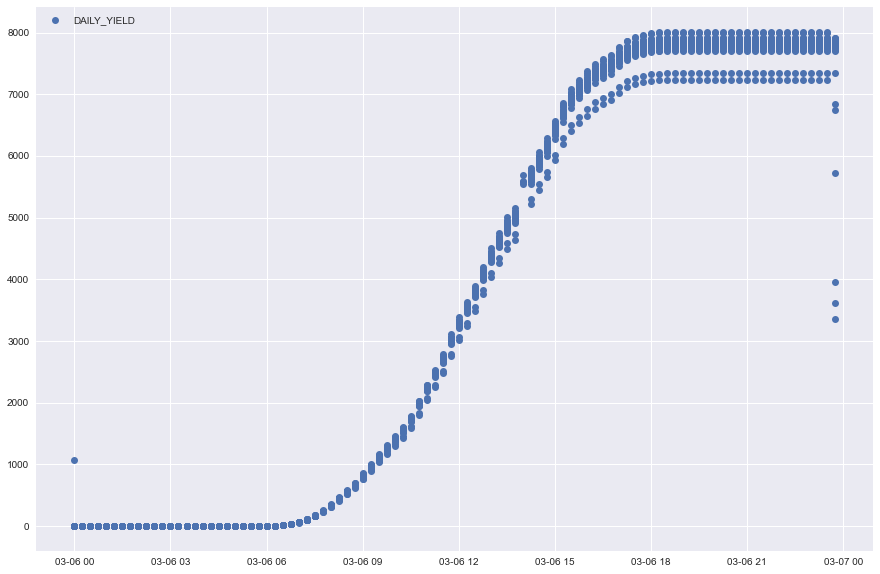

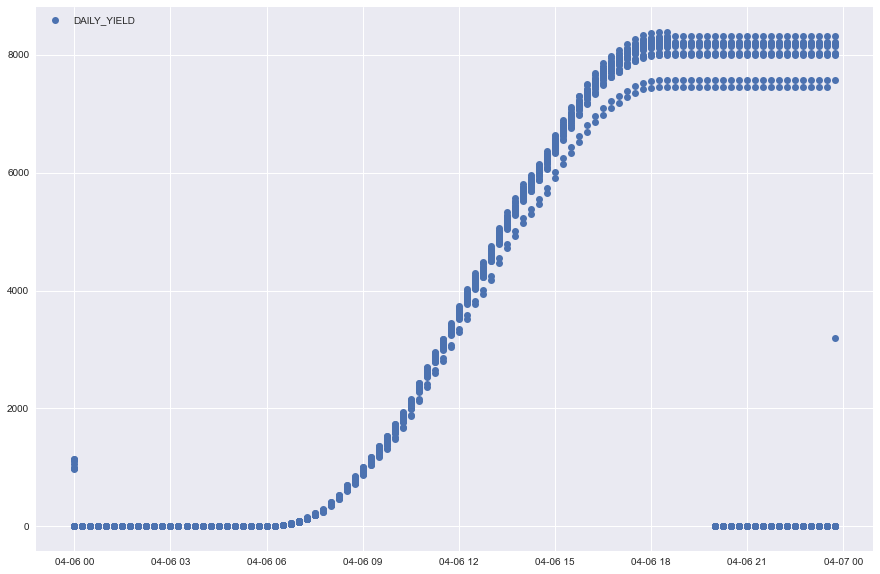

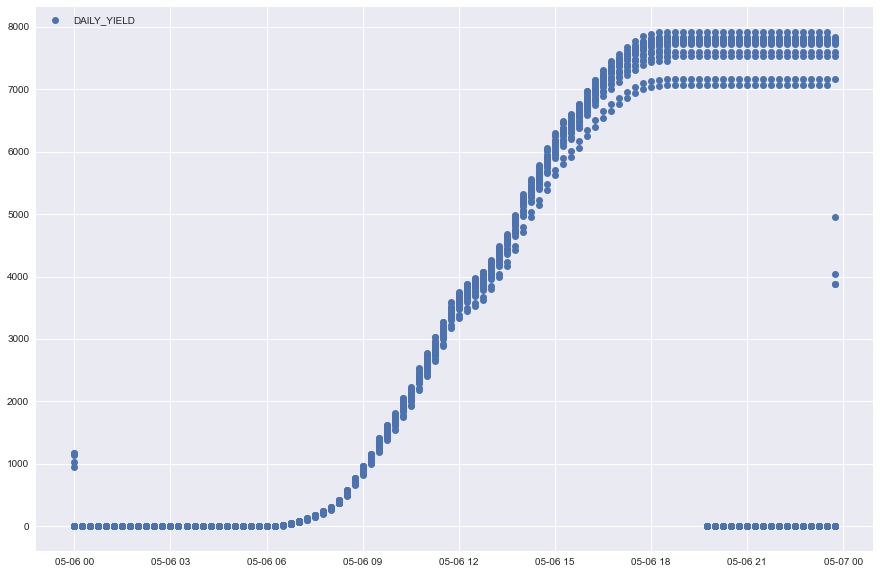

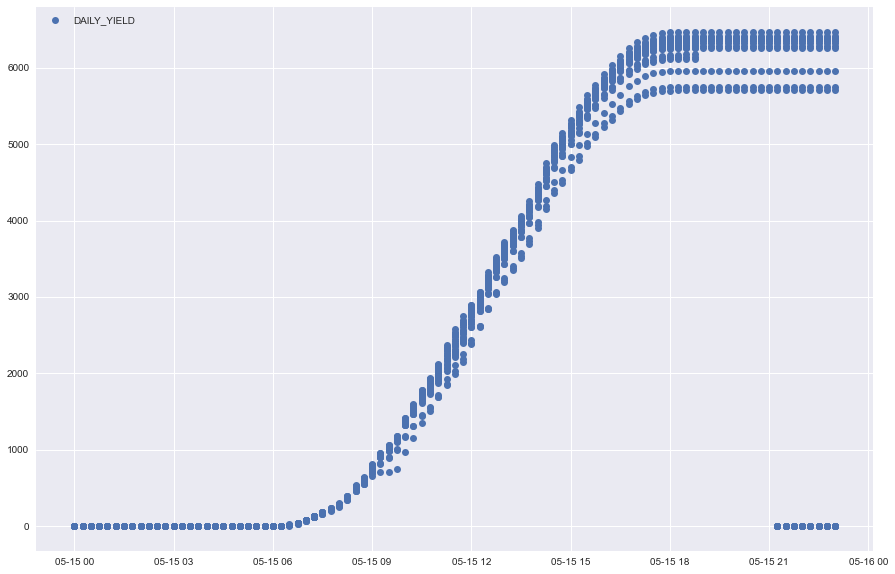

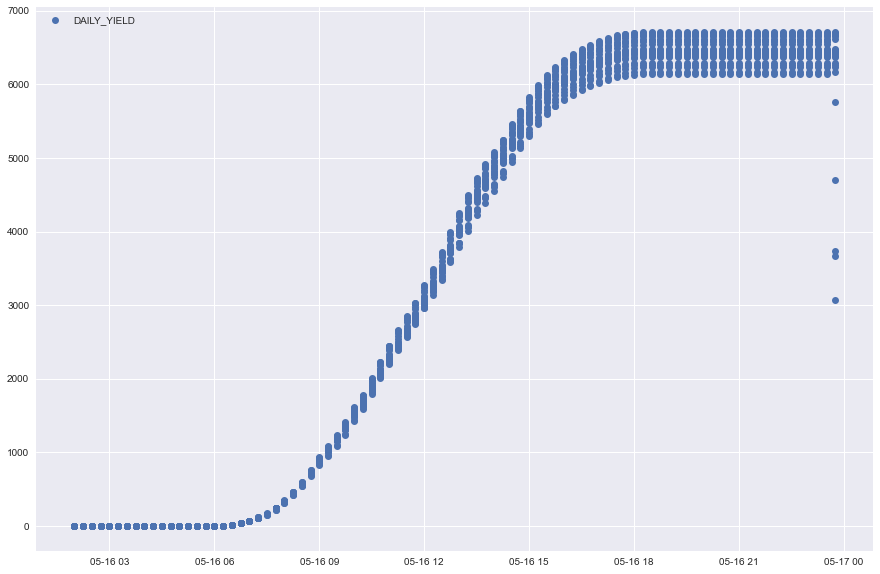

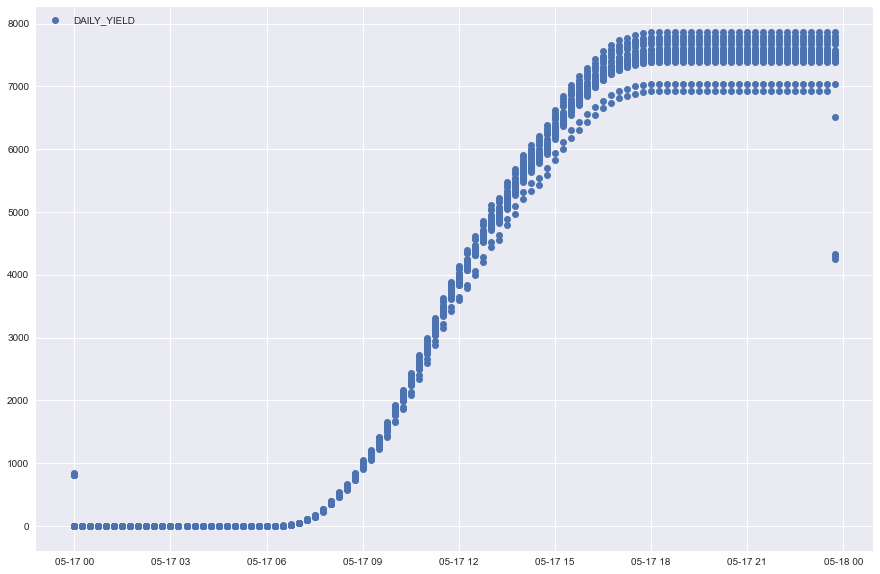

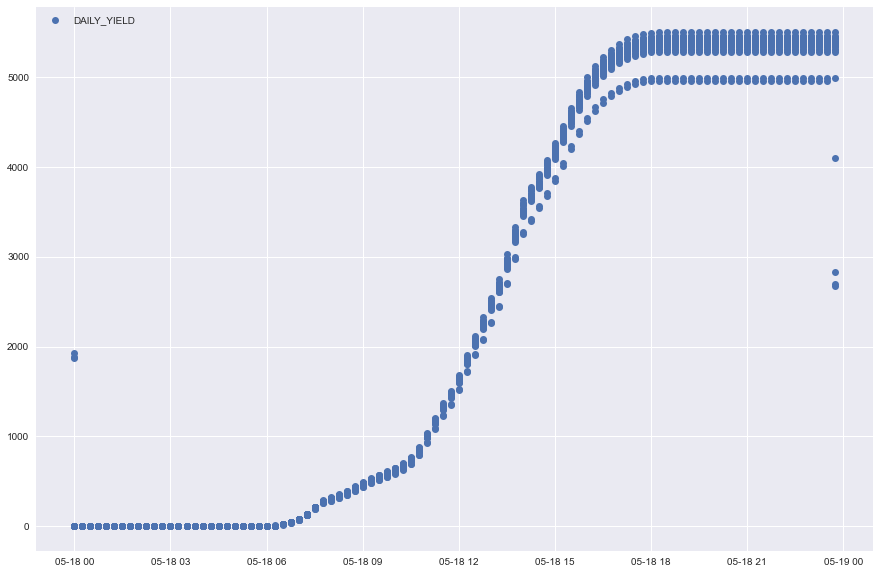

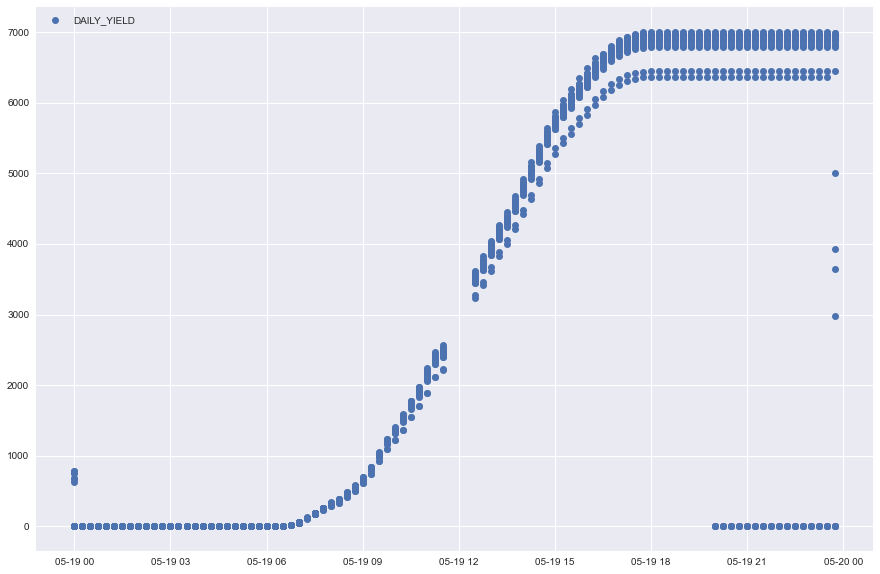

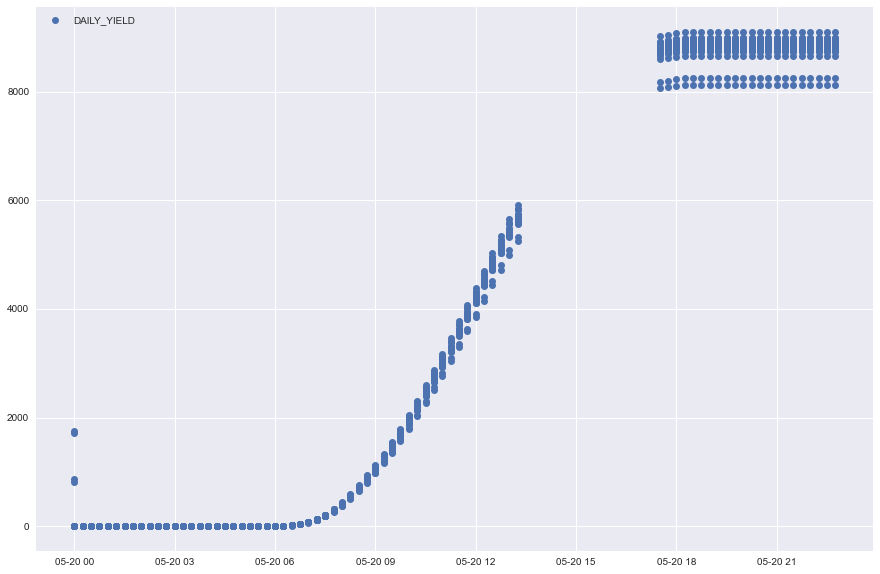

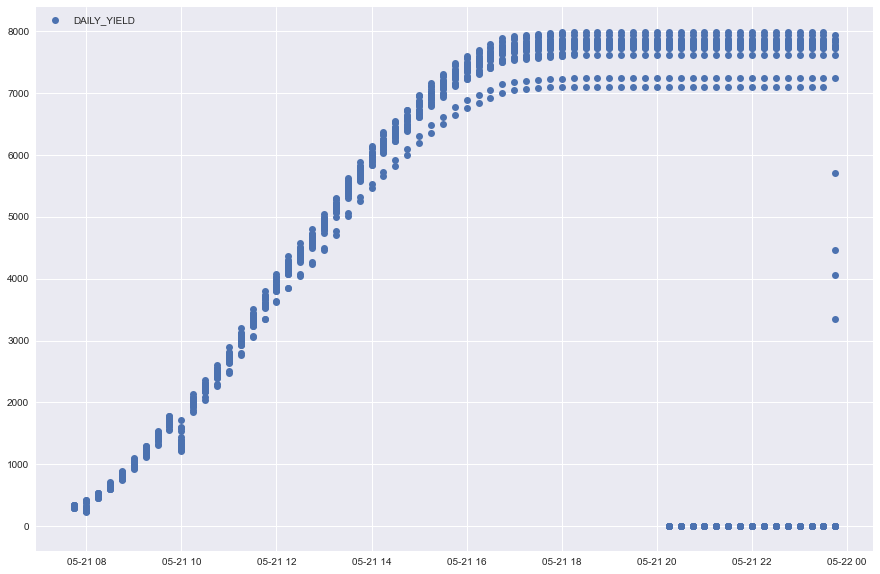

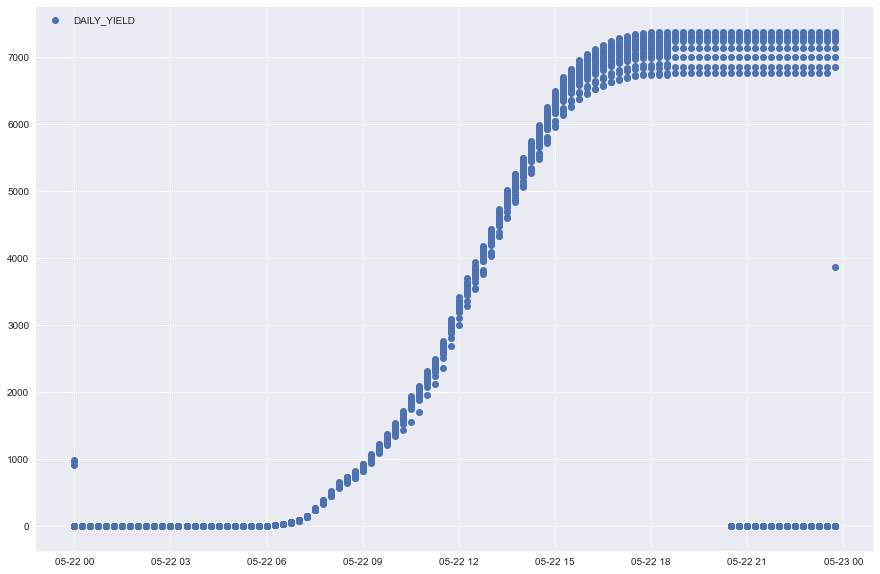

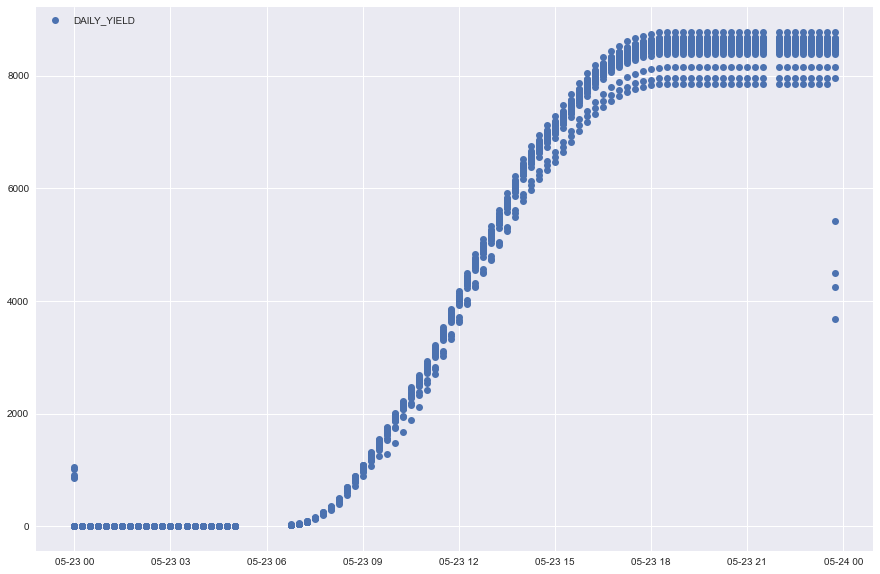

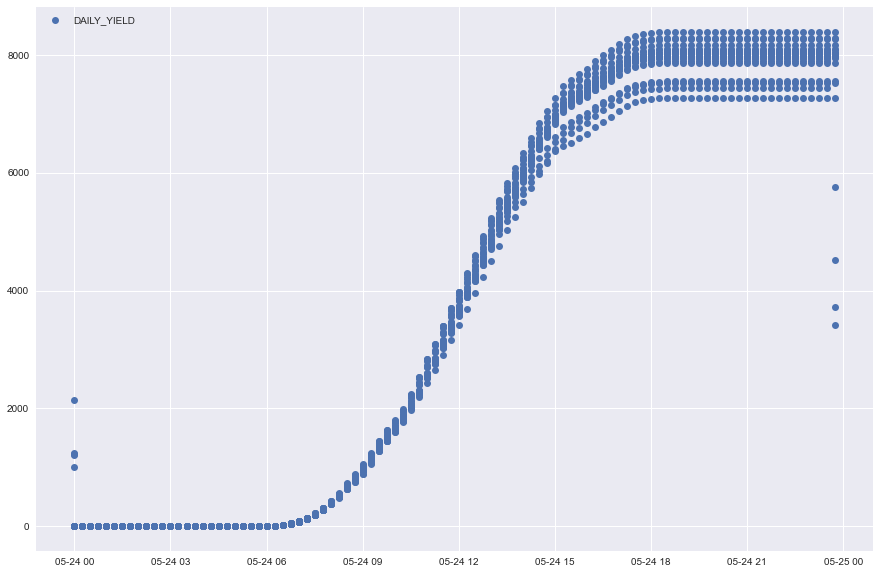

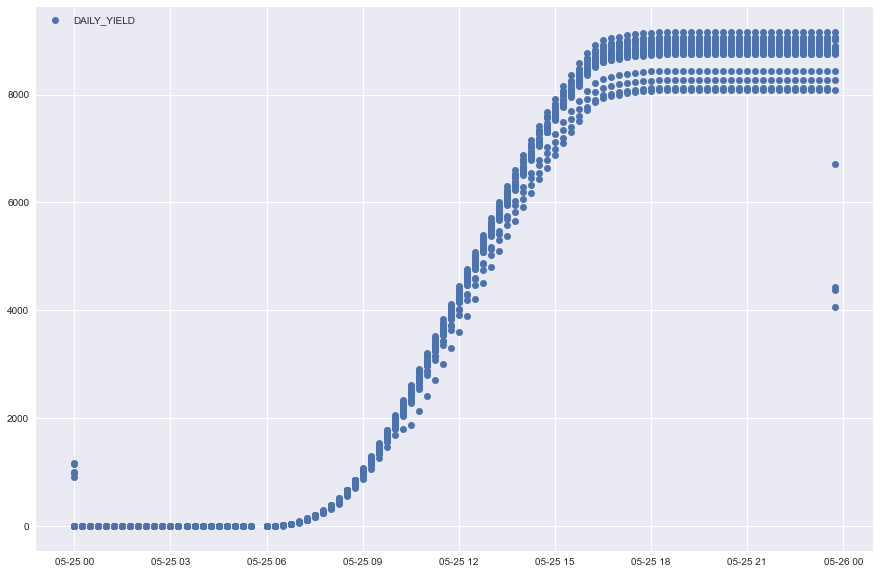

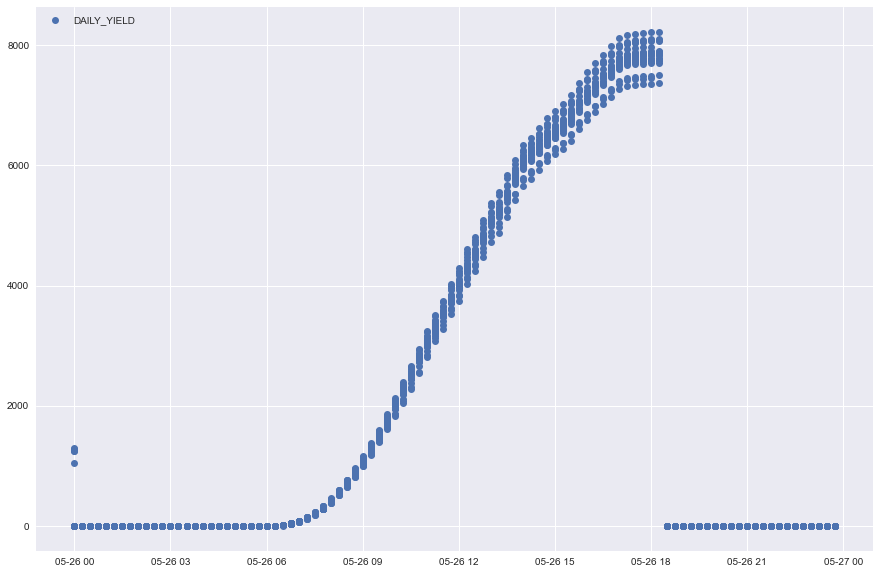

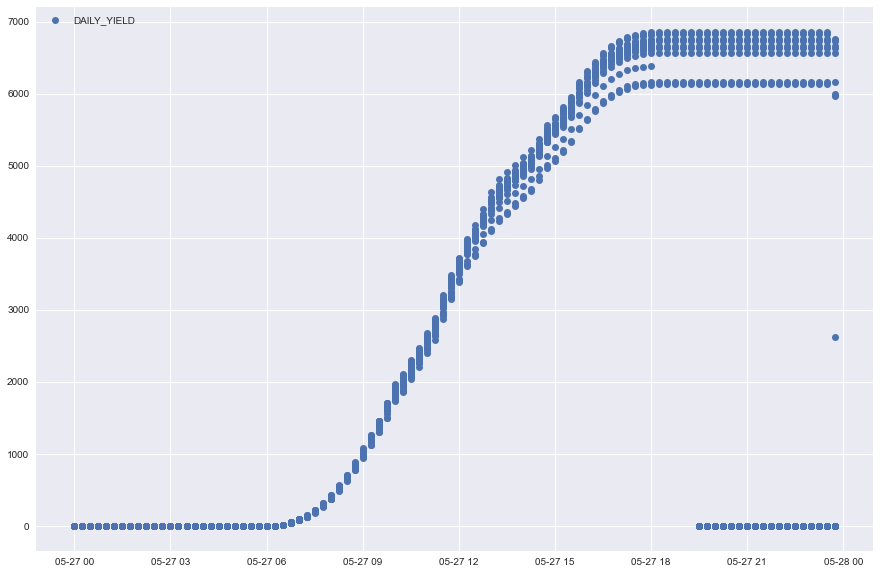

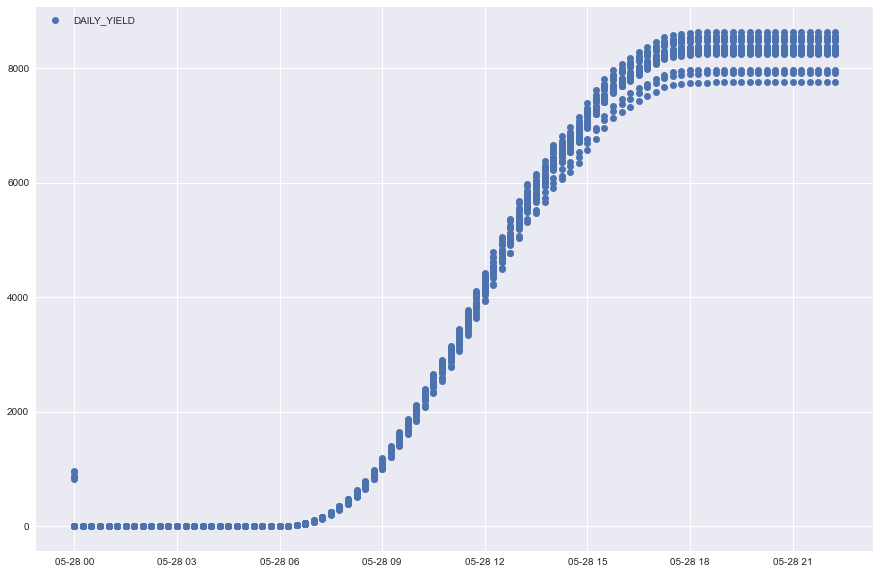

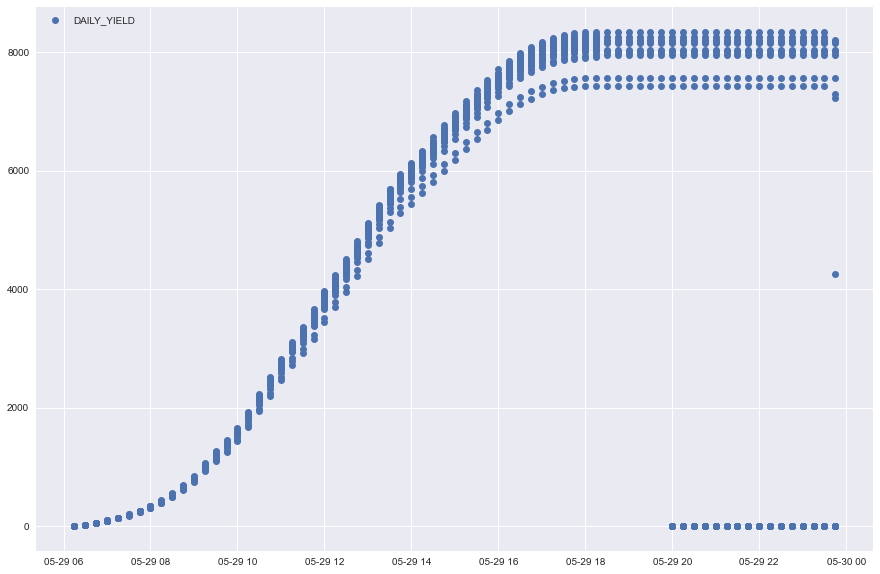

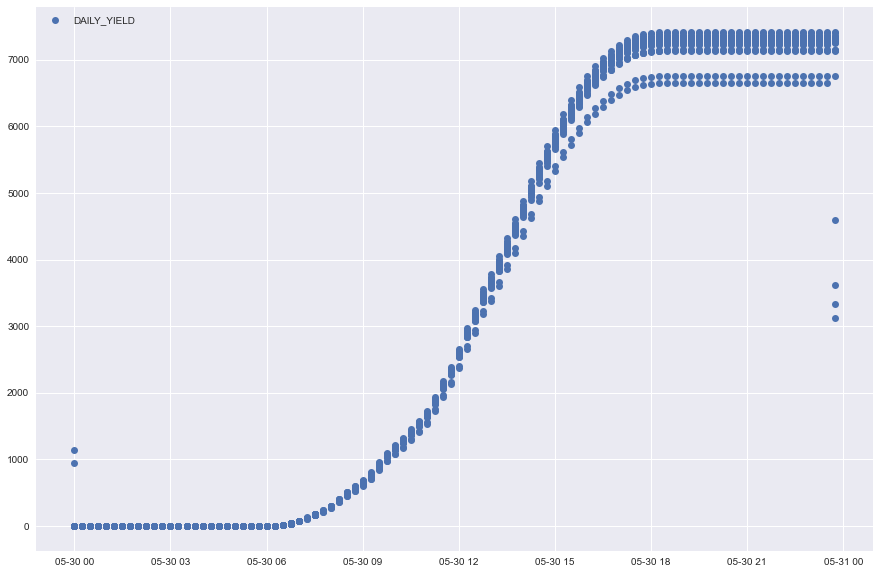

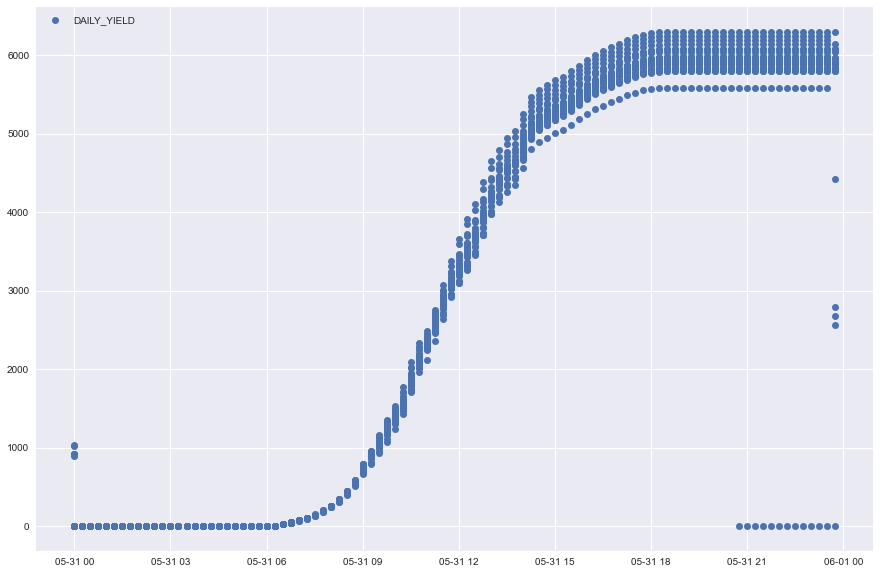

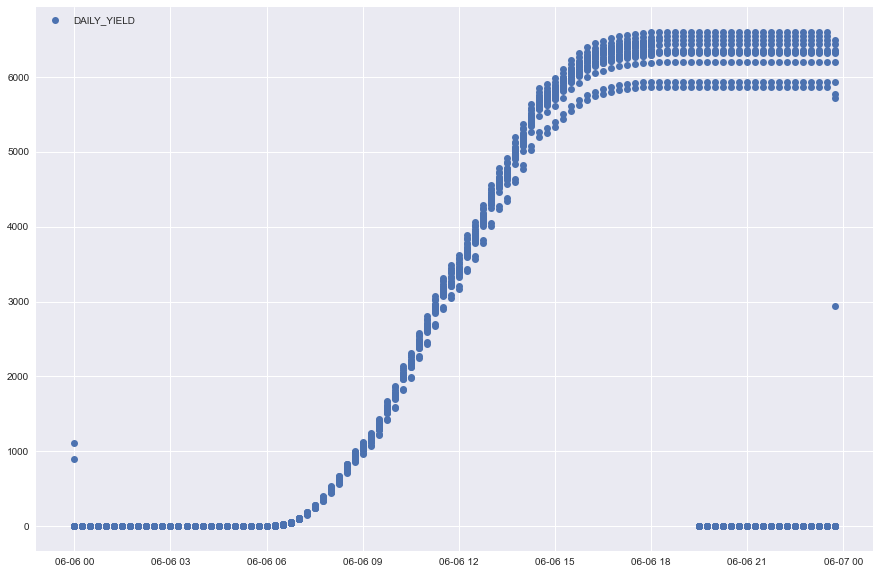

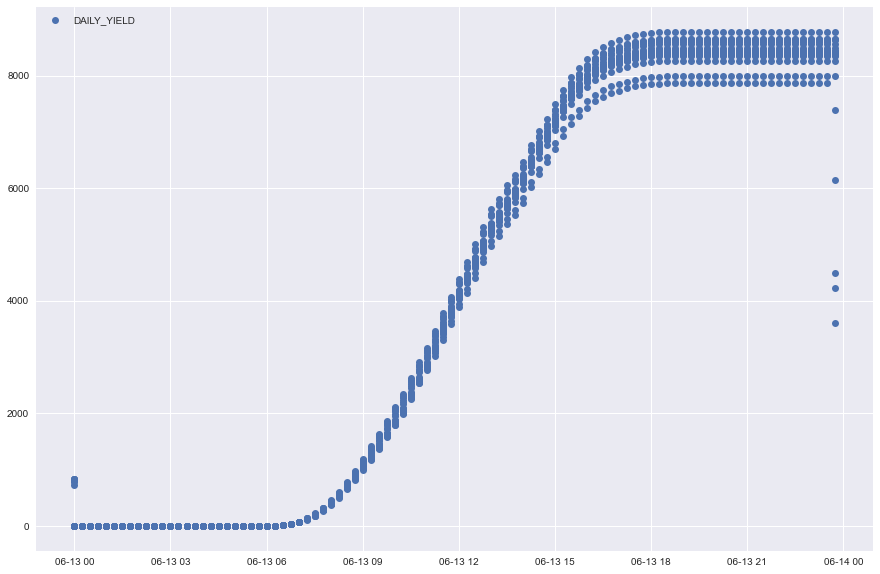

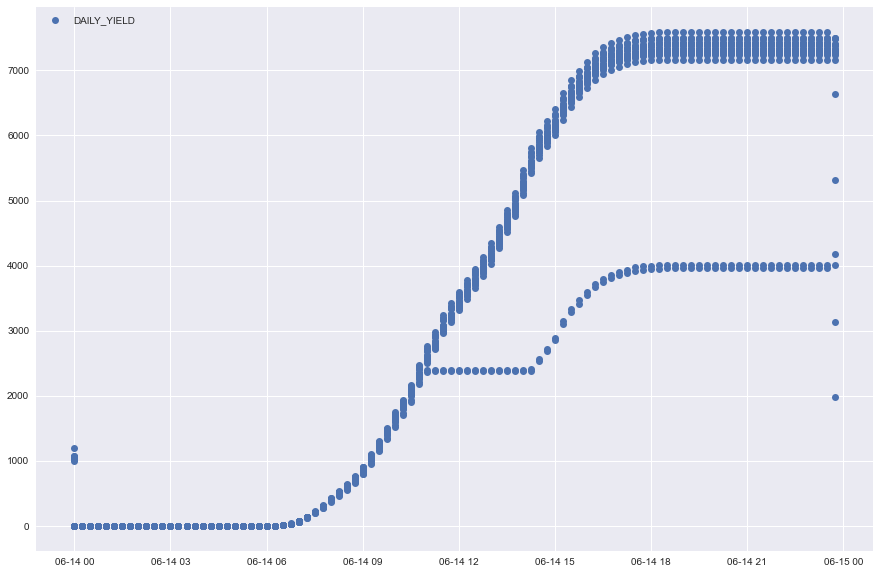

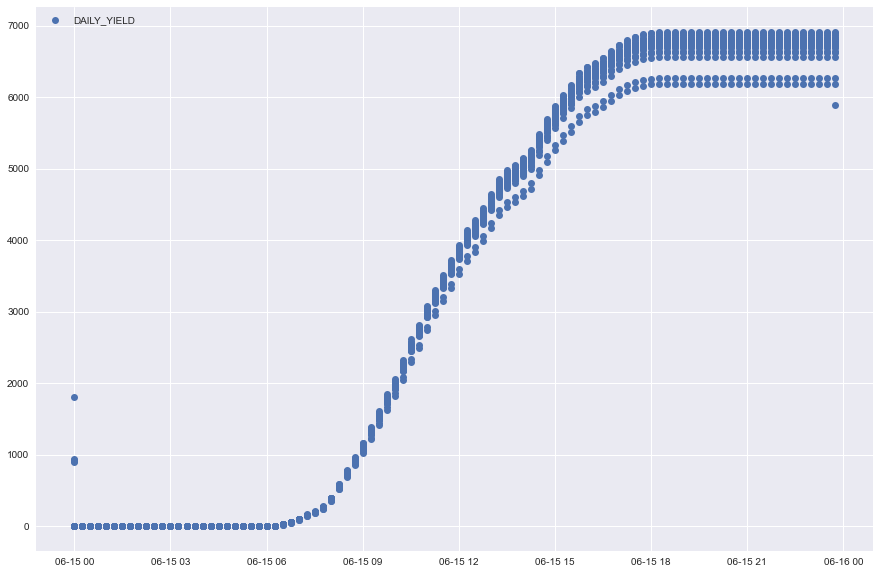

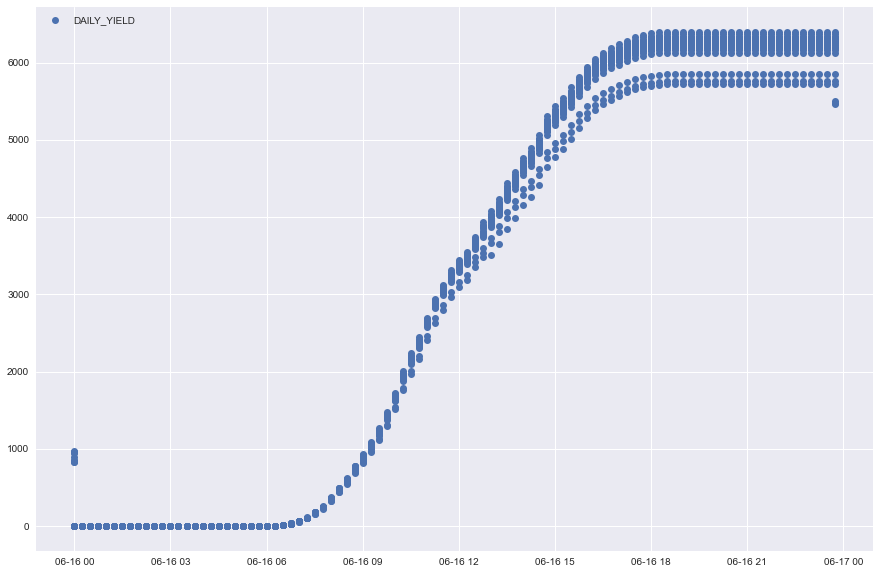

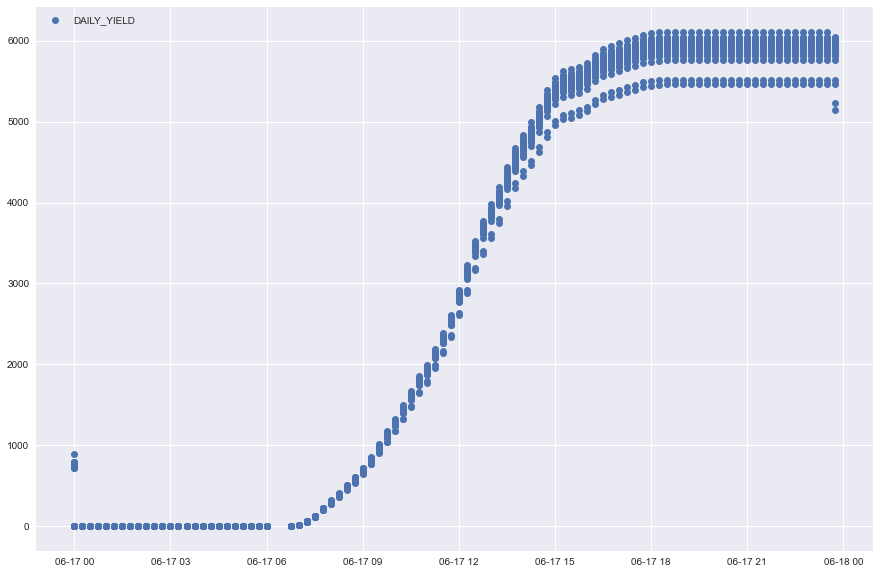

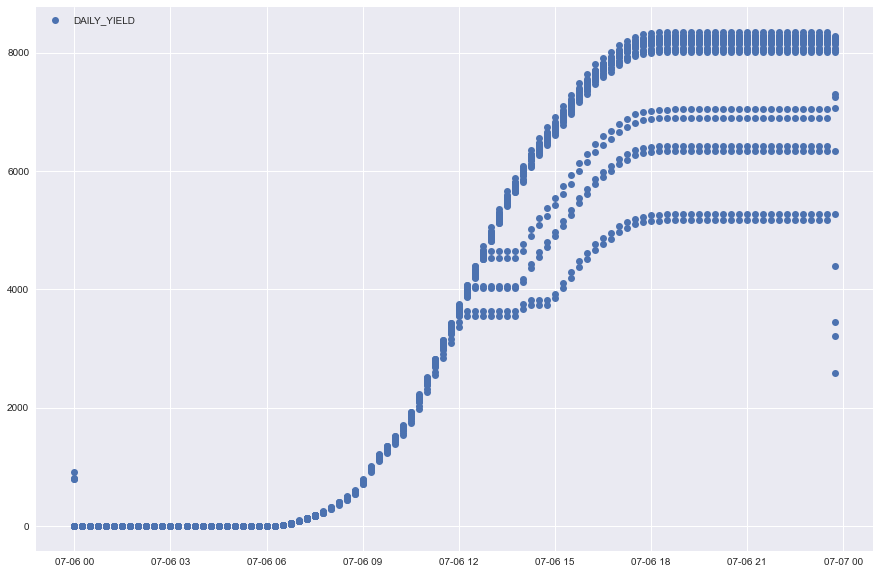

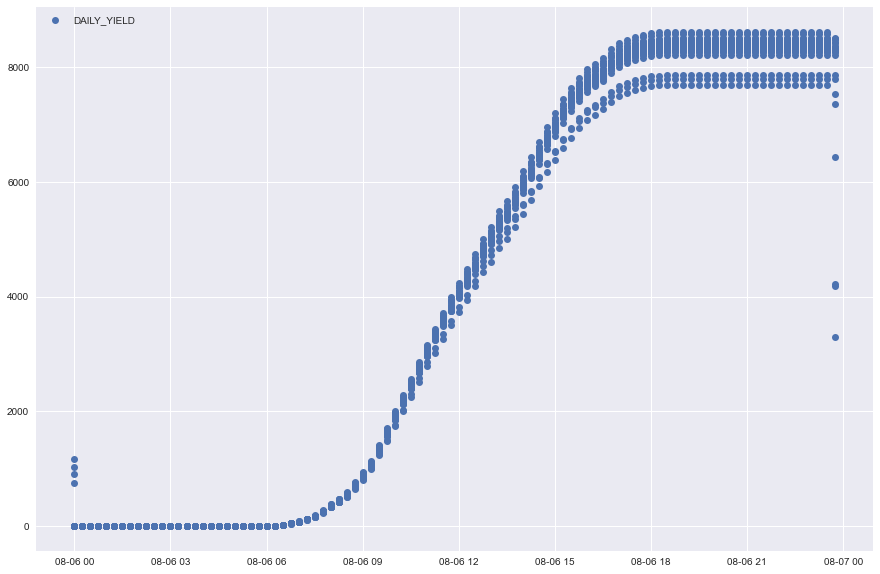

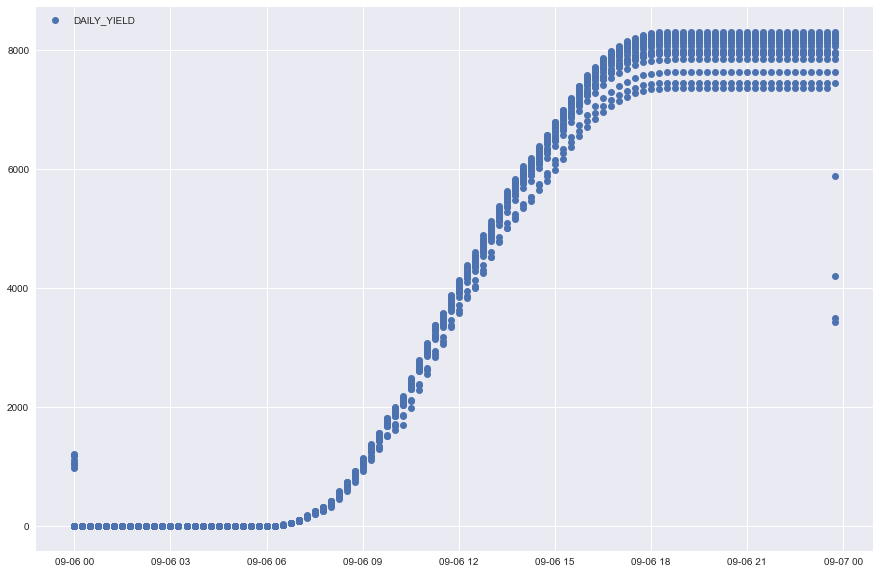

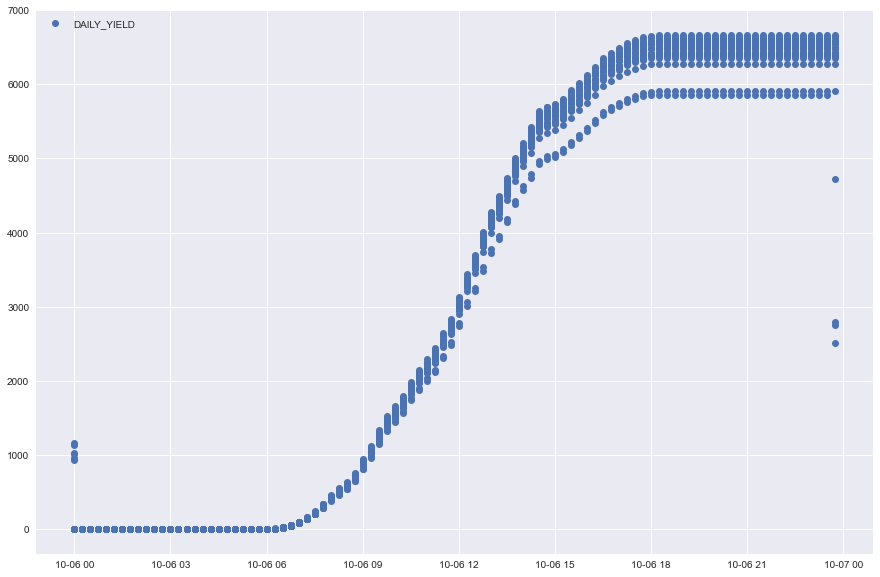

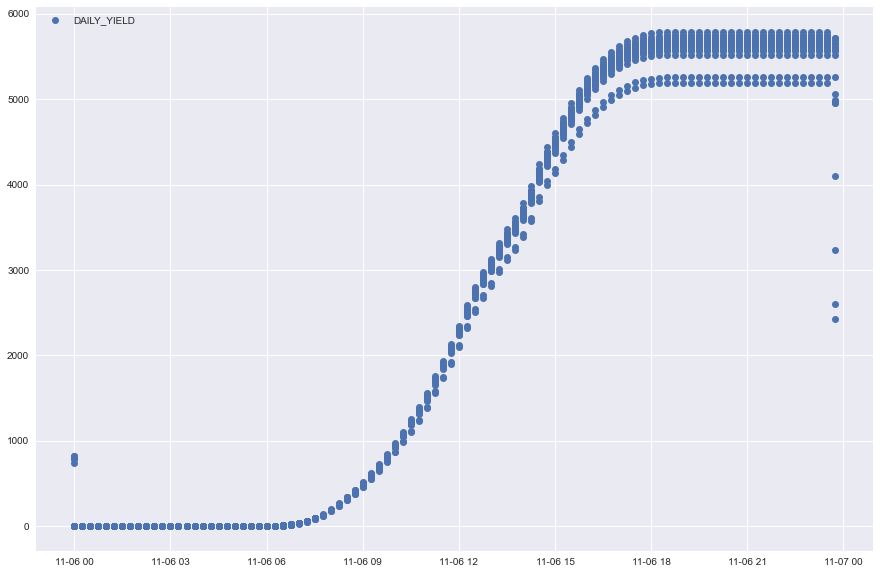

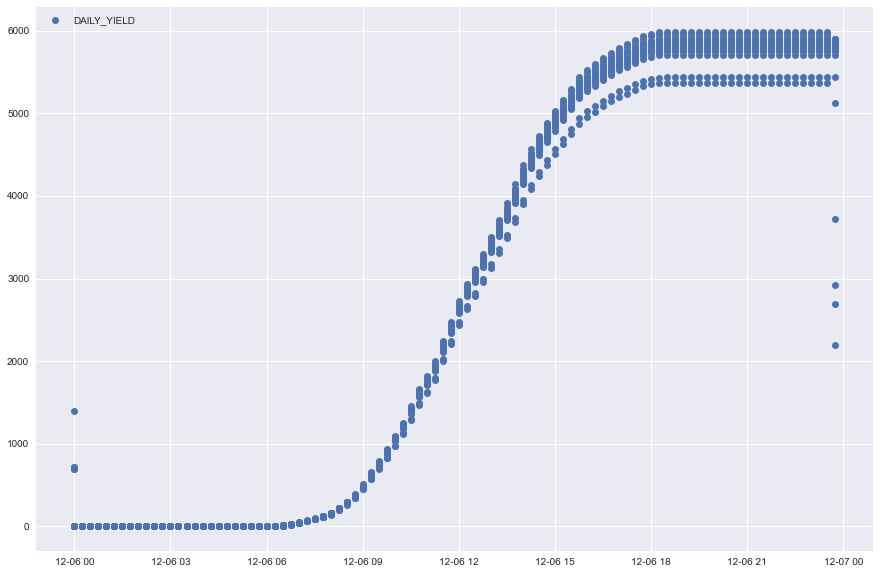

In [15]:
datetime_vs(plant_gen, 'DAILY_YIELD')

## Calculate average daily temperature and total solar irradiance in the day and plot these values against the
daily yield (just the final value in the day) for a number of inverters

Plotting for the 1BY6WEcLGh8j5v7 source key 


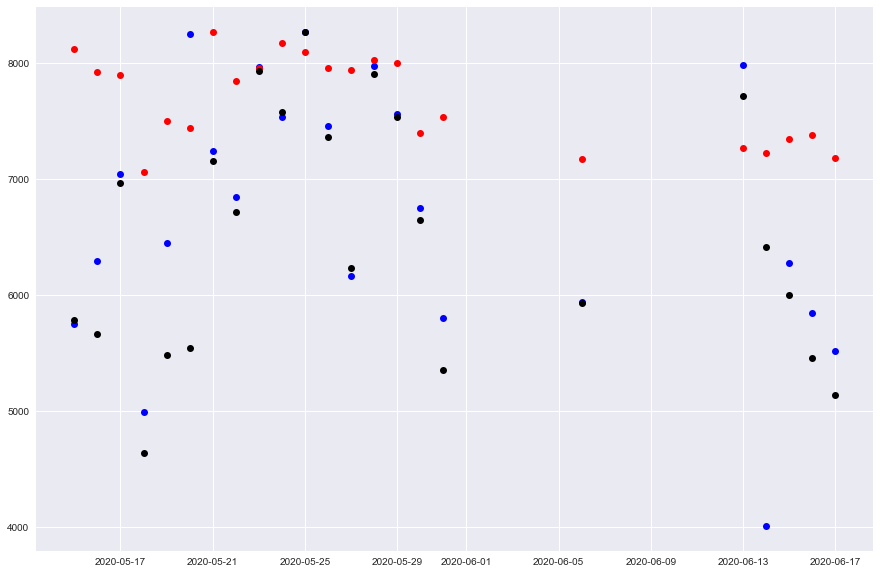

Plotting for the 1IF53ai7Xc0U56Y source key 


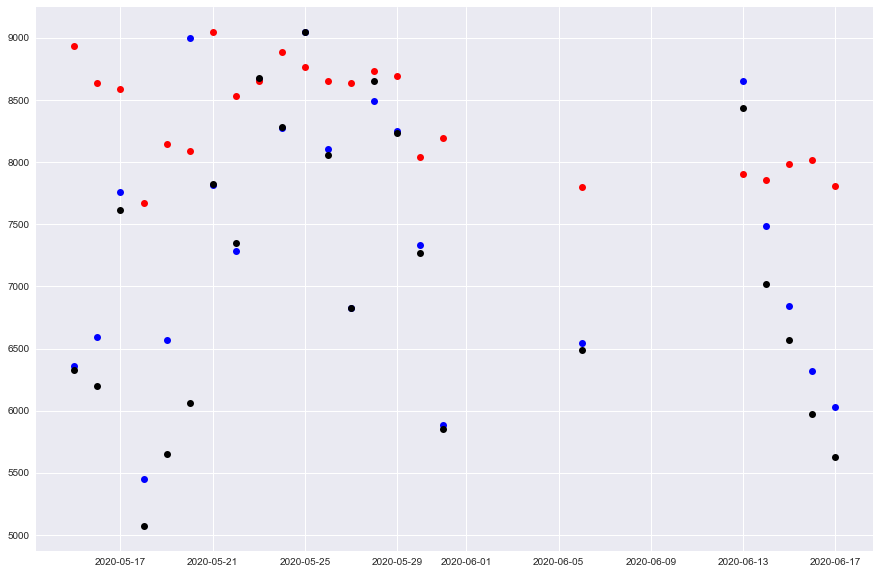

Plotting for the 3PZuoBAID5Wc2HD source key 


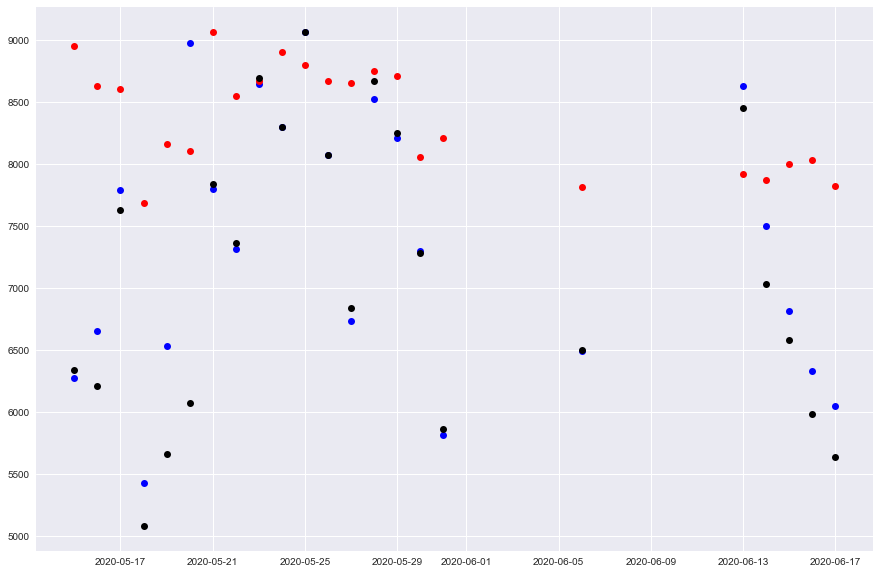

Plotting for the 7JYdWkrLSPkdwr4 source key 


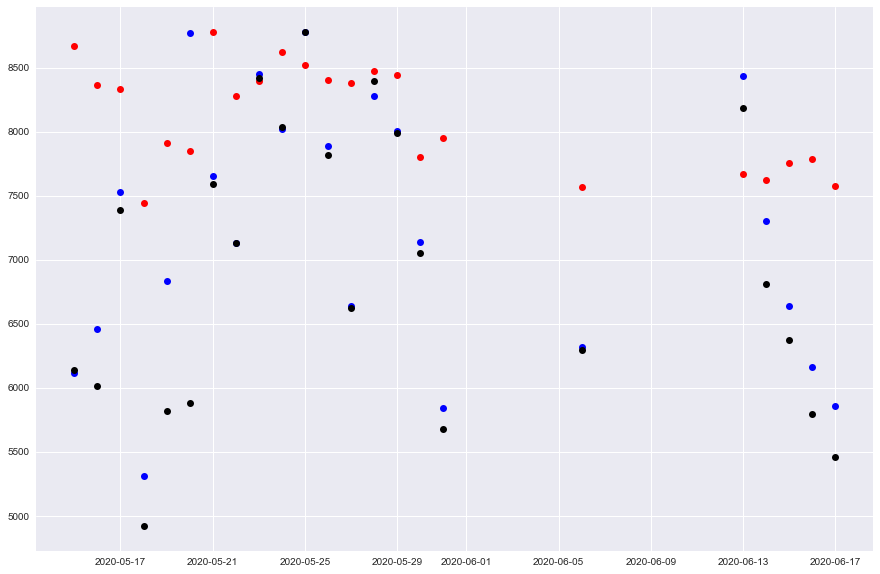

Plotting for the McdE0feGgRqW7Ca source key 


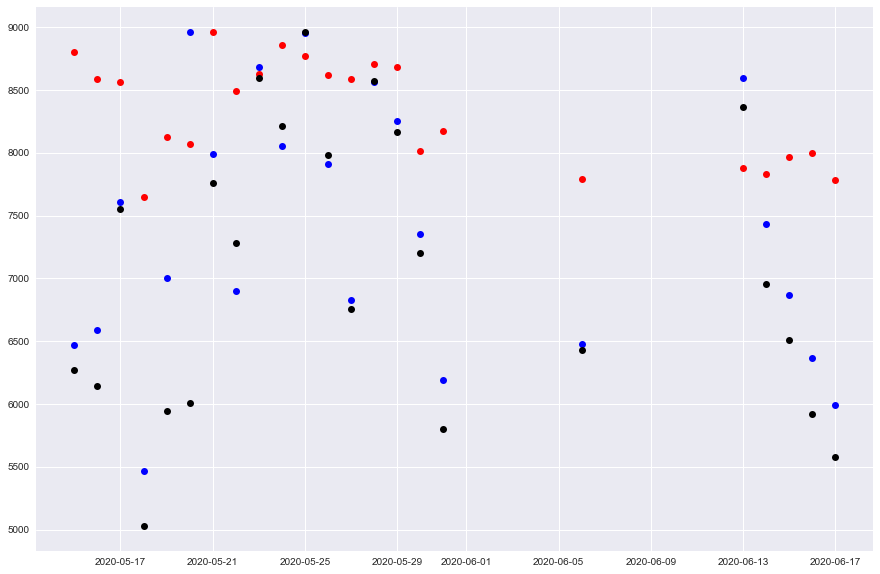

Plotting for the VHMLBKoKgIrUVDU source key 


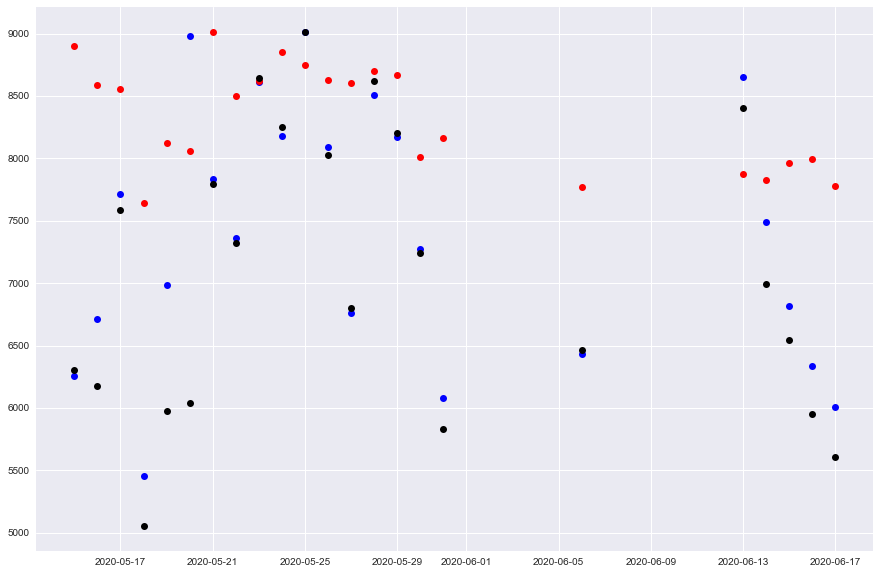

Plotting for the WRmjgnKYAwPKWDb source key 


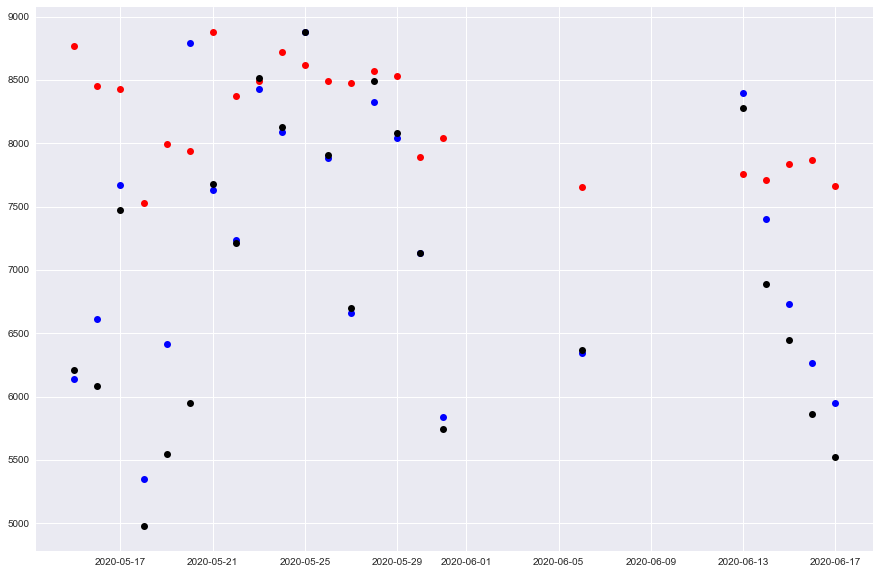

Plotting for the ZnxXDlPa8U1GXgE source key 


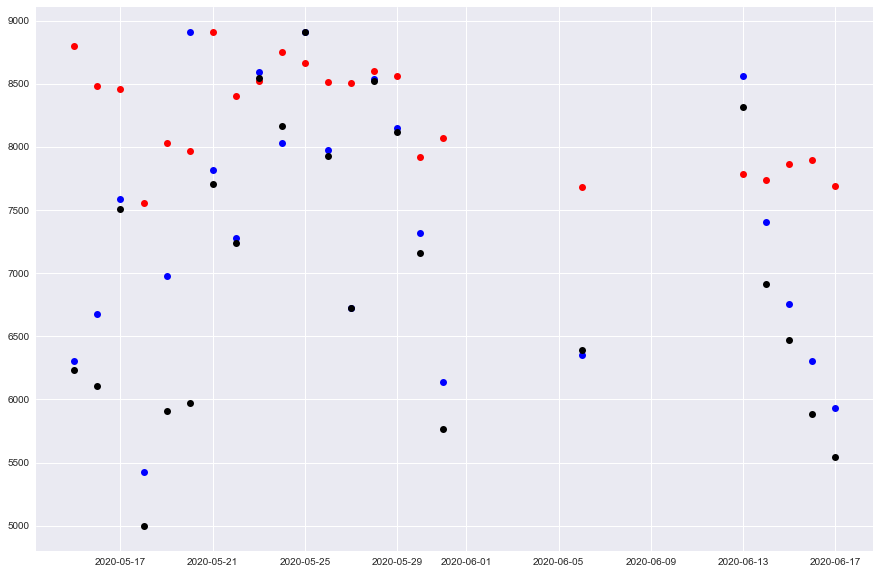

Plotting for the ZoEaEvLYb1n2sOq source key 


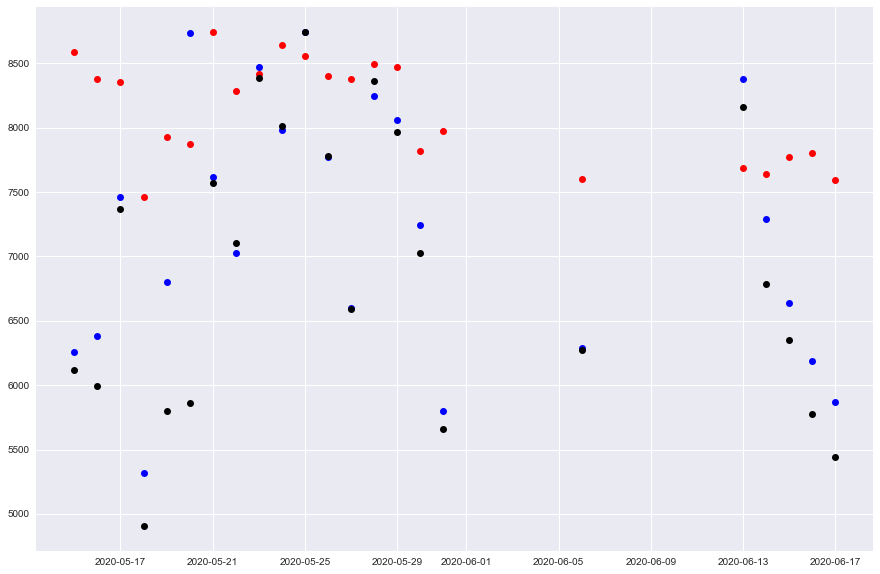

Plotting for the adLQvlD726eNBSB source key 


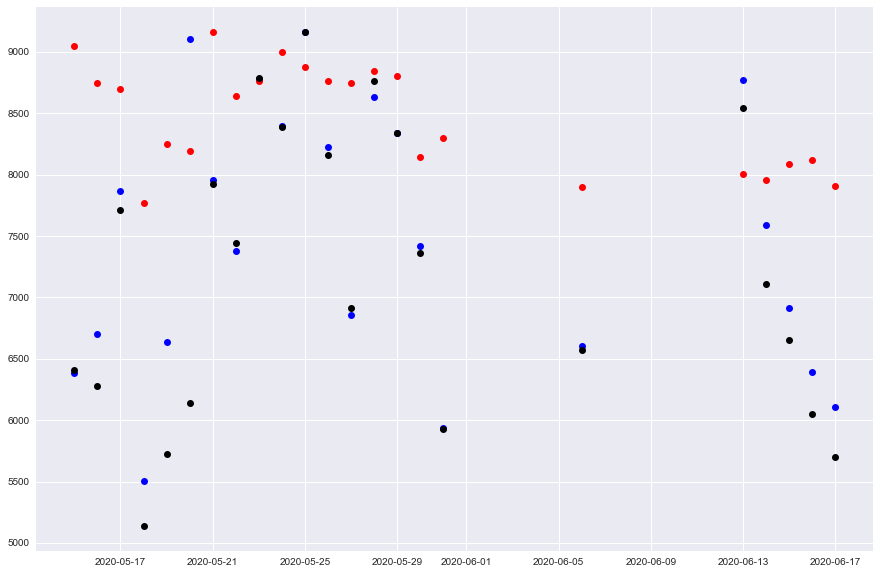

Plotting for the bvBOhCH3iADSZry source key 


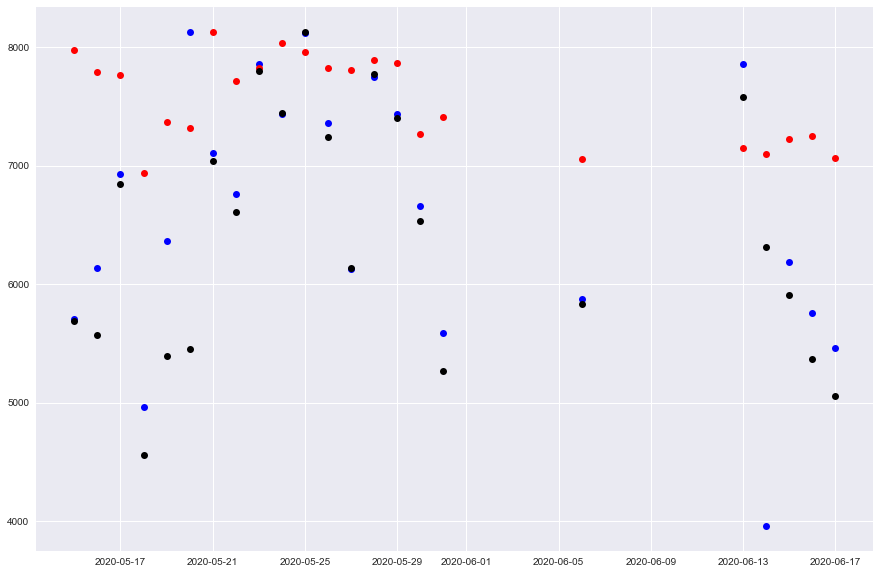

Plotting for the iCRJl6heRkivqQ3 source key 


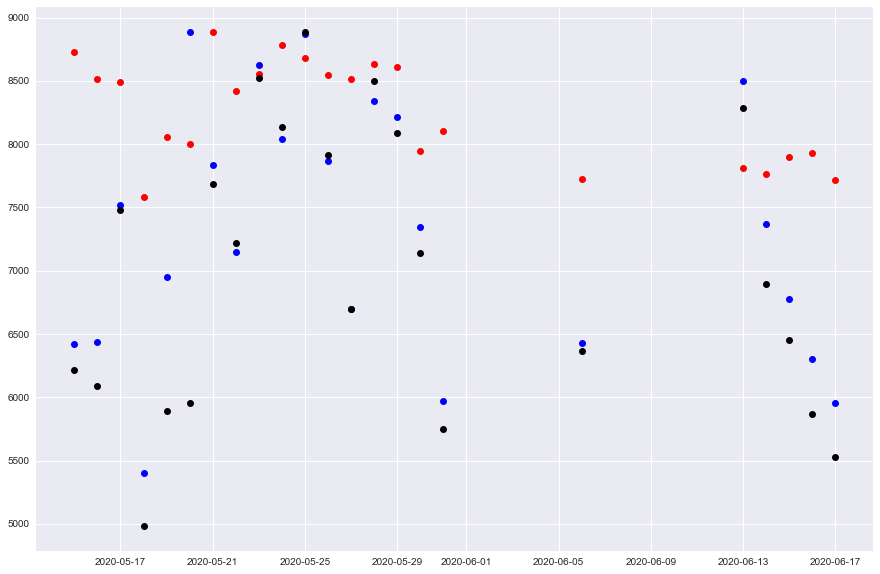

Plotting for the ih0vzX44oOqAx2f source key 


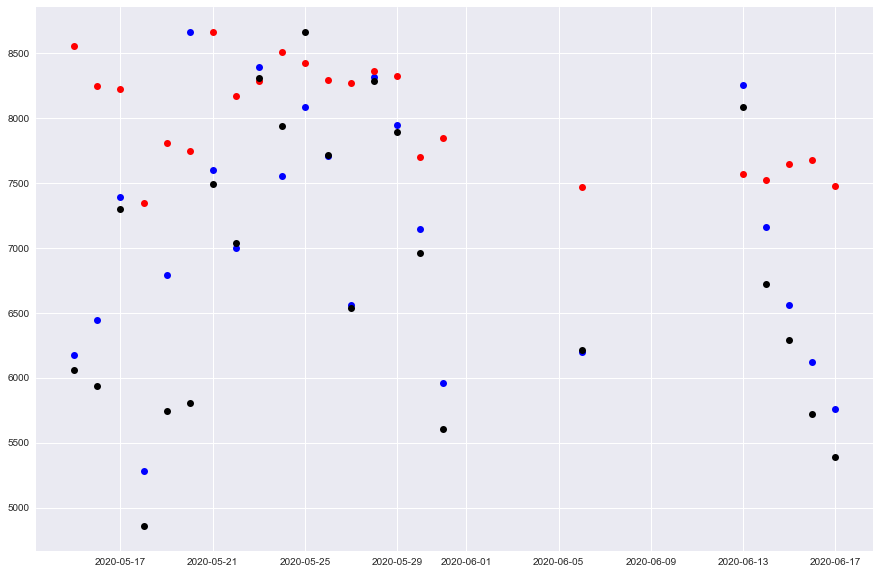

Plotting for the pkci93gMrogZuBj source key 


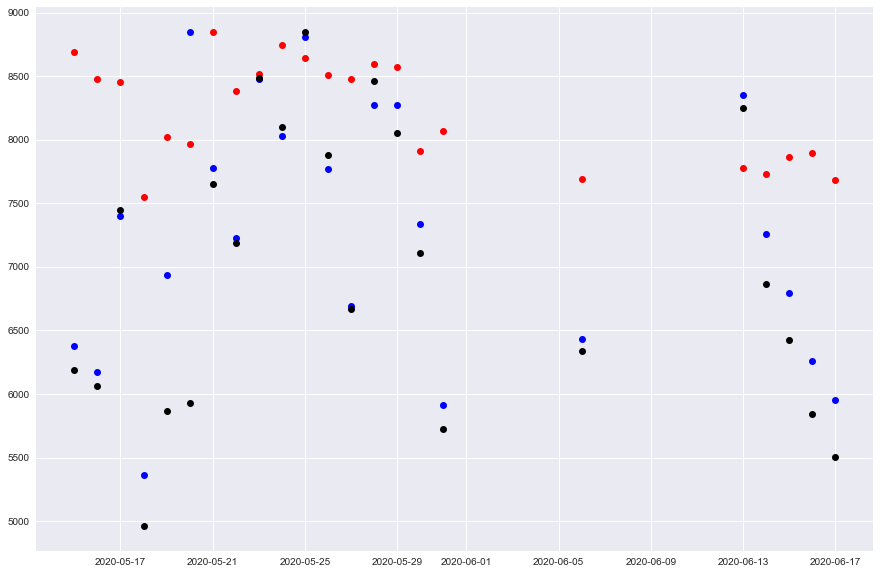

Plotting for the rGa61gmuvPhdLxV source key 


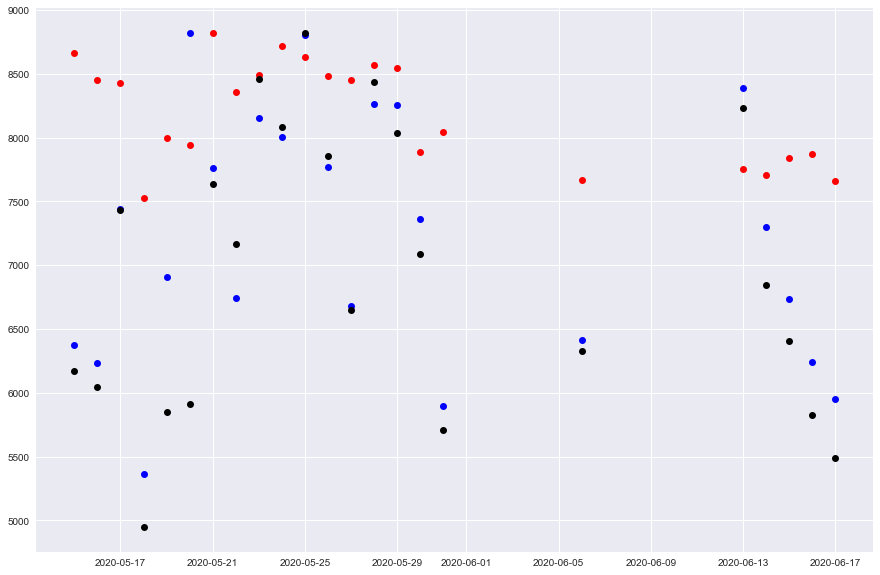

Plotting for the sjndEbLyjtCKgGv source key 


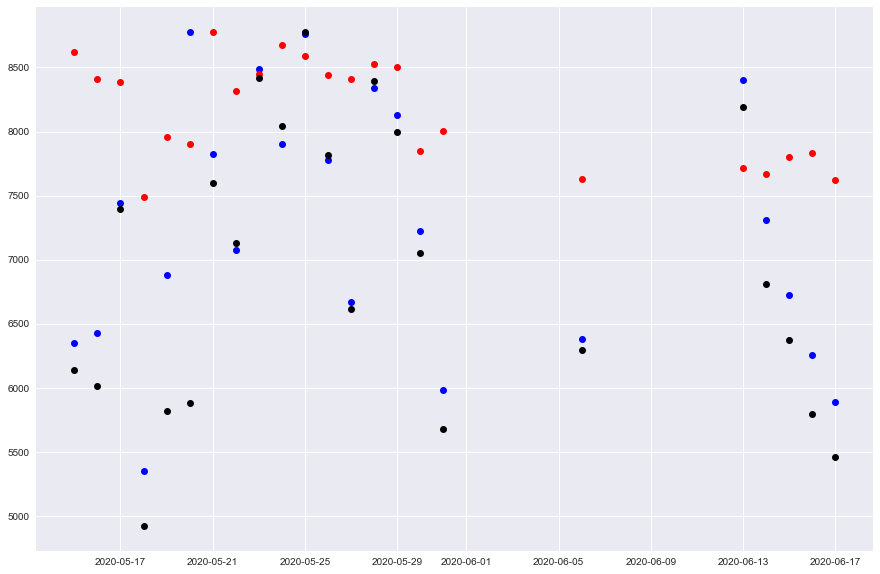

Plotting for the uHbuxQJl8lW7ozc source key 


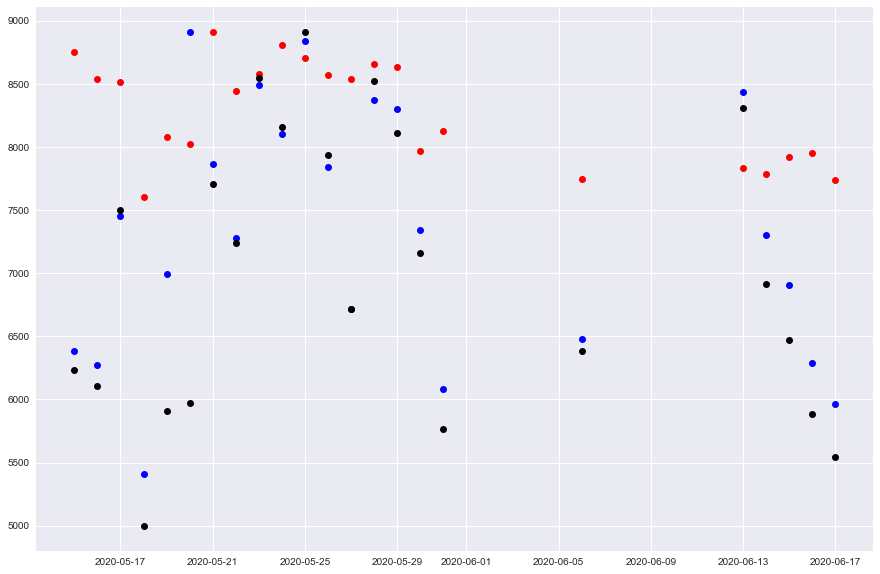

Plotting for the wCURE6d3bPkepu2 source key 


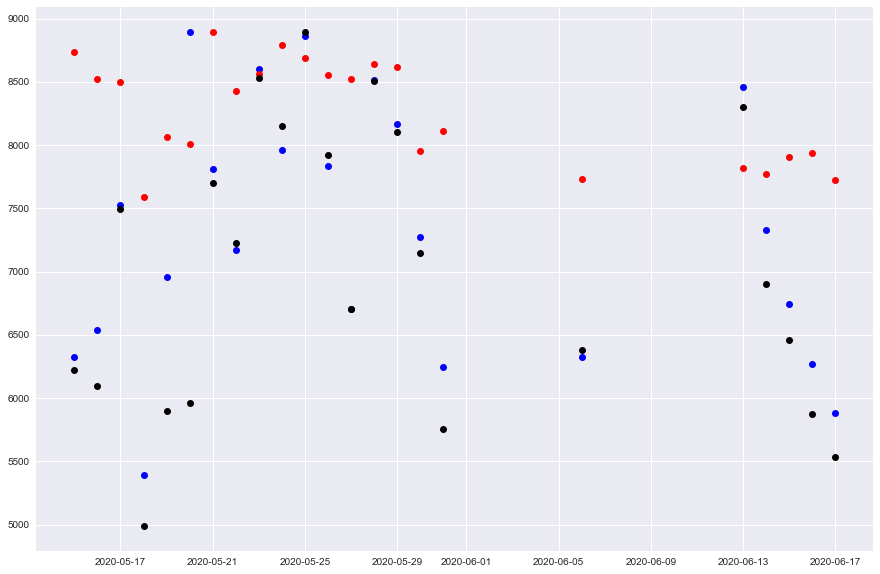

Plotting for the z9Y9gH1T5YWrNuG source key 


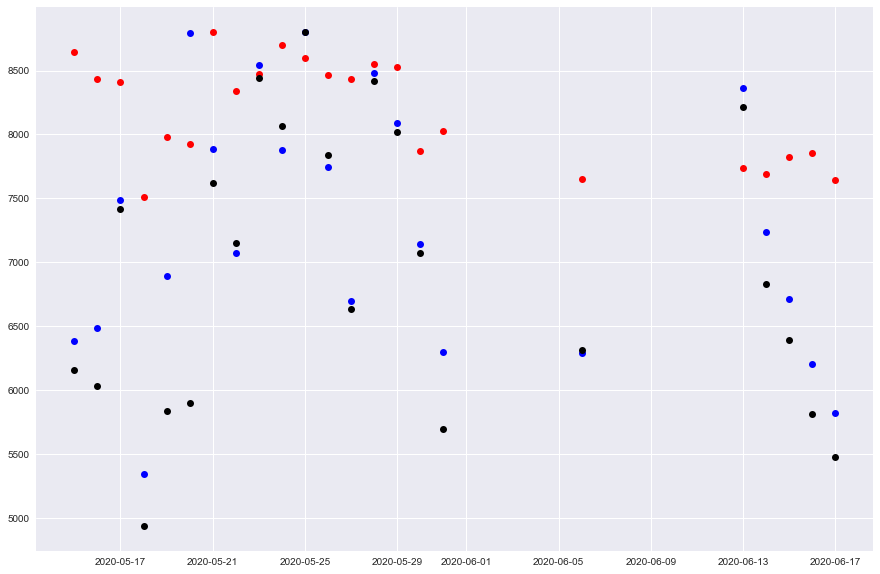

Plotting for the zBIq5rxdHJRwDNY source key 


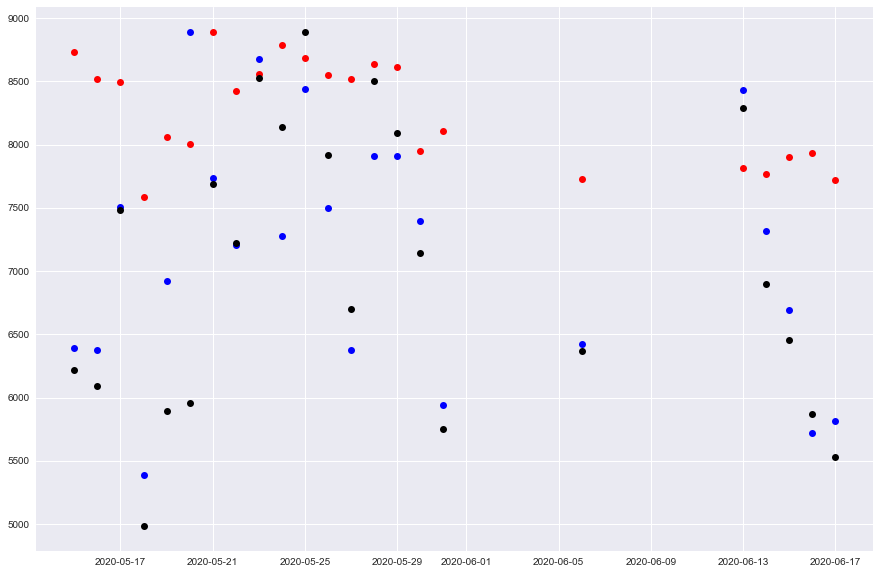

Plotting for the zVJPv84UY57bAof source key 


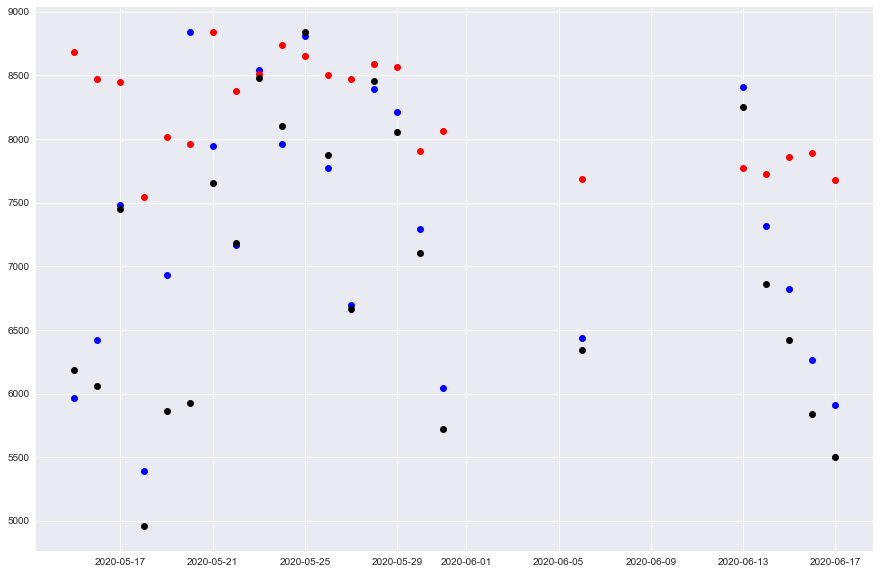

Plotting for the YxYtjZvoooNbGkE source key 


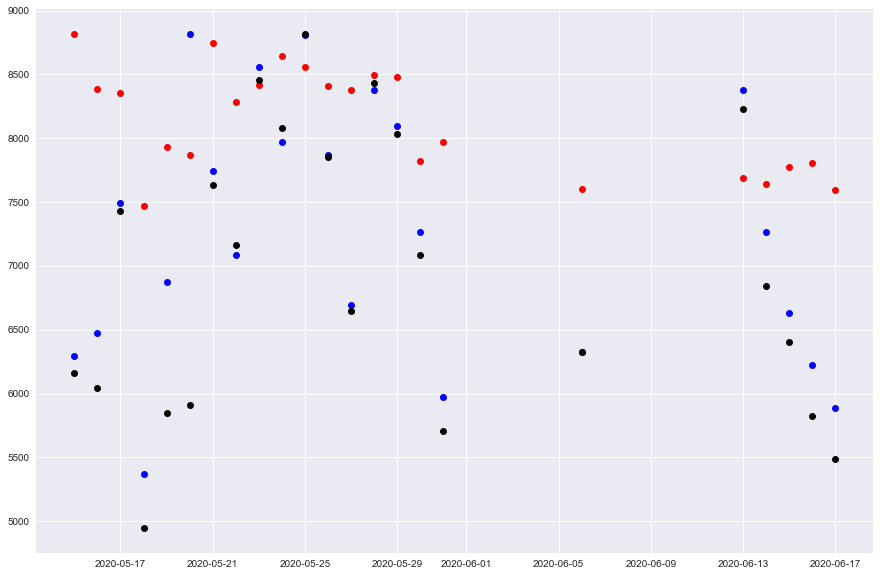

In [5]:
for i, source_key in enumerate(plant_gen.SOURCE_KEY.unique()):
    print(f'Plotting for the {source_key} source key ')
    merged_df = pd.merge(plant_gen[plant_gen['SOURCE_KEY'] == source_key], plant_weat, how='inner', on='DATE_TIME')
    agg_df = merged_df.set_index('DATE_TIME').resample('D').agg({'IRRADIATION': 'sum', 'DAILY_YIELD': 'max', 'AMBIENT_TEMPERATURE': 'mean'})
    agg_df.dropna(inplace=True)
    plt.figure(figsize=(15, 10))
    plt.plot_date(agg_df.index, agg_df['DAILY_YIELD'], color='blue')
    plt.plot_date(agg_df.index, agg_df['AMBIENT_TEMPERATURE'] * (agg_df['DAILY_YIELD'].max() / agg_df['AMBIENT_TEMPERATURE'].max()), color='red')
    plt.plot_date(agg_df.index, agg_df['IRRADIATION'] * (agg_df['DAILY_YIELD'].max() / agg_df['IRRADIATION'].max()), color='black')
    plt.show()